In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import Callback
import numpy as np
import matplotlib.pyplot as plt
import time
from keras.models import load_model

import os

In [2]:
save_path = ('figures/1a4')
if not os.path.isdir(save_path):
    os.makedirs(save_path)

In [3]:
def scale(X, X_min, X_max):
    return (X - X_min)/(X_max-X_min)

In [4]:
NUM_CLASSES = 3

no_folds = 5

l_r = 0.01
epochs = 1000

d_p = [0, 10**-3, 10**-6, 10**-9, 10**-12 ]

batch_sizes = 8
num_neurons = 20

seed = 10
np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
train_input = np.genfromtxt('ctg_data_cleaned.csv', delimiter= ',')

X, Y = train_input[1:, :21], train_input[1:,-1].astype(int)

X = scale(X, np.min(X, axis=0), np.max(X, axis=0))
Y = Y-1

no_data = len(X)

idx = np.arange(no_data)
np.random.shuffle(idx)

trainX, trainY= X[idx],Y[idx]

In [6]:
testX = trainX[-638:]
testY = trainY[-638:]

trainX = trainX[:1488]
trainY = trainY[:1488]


no_data = len(trainX)
print(no_data)

1488


In [7]:
nf = no_data//no_folds

Epoch 1/1000
149/149 - 0s - loss: 0.7541 - accuracy: 0.7708 - val_loss: 0.6229 - val_accuracy: 0.7946
Epoch 2/1000
149/149 - 0s - loss: 0.6459 - accuracy: 0.7708 - val_loss: 0.5920 - val_accuracy: 0.7946
Epoch 3/1000
149/149 - 0s - loss: 0.6194 - accuracy: 0.7708 - val_loss: 0.5669 - val_accuracy: 0.7946
Epoch 4/1000
149/149 - 0s - loss: 0.5950 - accuracy: 0.7708 - val_loss: 0.5455 - val_accuracy: 0.7946
Epoch 5/1000
149/149 - 0s - loss: 0.5721 - accuracy: 0.7708 - val_loss: 0.5253 - val_accuracy: 0.7946
Epoch 6/1000
149/149 - 0s - loss: 0.5497 - accuracy: 0.7708 - val_loss: 0.5077 - val_accuracy: 0.7946
Epoch 7/1000
149/149 - 0s - loss: 0.5285 - accuracy: 0.7708 - val_loss: 0.4895 - val_accuracy: 0.8013
Epoch 8/1000
149/149 - 0s - loss: 0.5086 - accuracy: 0.7775 - val_loss: 0.4700 - val_accuracy: 0.8013
Epoch 9/1000
149/149 - 0s - loss: 0.4904 - accuracy: 0.7825 - val_loss: 0.4539 - val_accuracy: 0.8114
Epoch 10/1000
149/149 - 0s - loss: 0.4726 - accuracy: 0.7935 - val_loss: 0.4394 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2542 - accuracy: 0.8950 - val_loss: 0.2540 - val_accuracy: 0.8990
Epoch 82/1000
149/149 - 0s - loss: 0.2547 - accuracy: 0.8925 - val_loss: 0.2539 - val_accuracy: 0.8956
Epoch 83/1000
149/149 - 0s - loss: 0.2541 - accuracy: 0.8925 - val_loss: 0.2585 - val_accuracy: 0.8923
Epoch 84/1000
149/149 - 0s - loss: 0.2544 - accuracy: 0.8959 - val_loss: 0.2550 - val_accuracy: 0.8923
Epoch 85/1000
149/149 - 0s - loss: 0.2531 - accuracy: 0.8900 - val_loss: 0.2521 - val_accuracy: 0.8956
Epoch 86/1000
149/149 - 0s - loss: 0.2535 - accuracy: 0.8967 - val_loss: 0.2548 - val_accuracy: 0.8923
Epoch 87/1000
149/149 - 0s - loss: 0.2537 - accuracy: 0.8900 - val_loss: 0.2513 - val_accuracy: 0.8923
Epoch 88/1000
149/149 - 0s - loss: 0.2516 - accuracy: 0.8976 - val_loss: 0.2540 - val_accuracy: 0.8956
Epoch 89/1000
149/149 - 0s - loss: 0.2526 - accuracy: 0.8950 - val_loss: 0.2522 - val_accuracy: 0.8990
Epoch 90/1000
149/149 - 0s - loss: 0.2527 - accuracy: 0.8908 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2354 - accuracy: 0.8984 - val_loss: 0.2433 - val_accuracy: 0.8923
Epoch 161/1000
149/149 - 0s - loss: 0.2355 - accuracy: 0.8984 - val_loss: 0.2446 - val_accuracy: 0.9024
Epoch 162/1000
149/149 - 0s - loss: 0.2335 - accuracy: 0.9018 - val_loss: 0.2425 - val_accuracy: 0.8990
Epoch 163/1000
149/149 - 0s - loss: 0.2339 - accuracy: 0.9018 - val_loss: 0.2423 - val_accuracy: 0.8990
Epoch 164/1000
149/149 - 0s - loss: 0.2342 - accuracy: 0.9018 - val_loss: 0.2438 - val_accuracy: 0.8923
Epoch 165/1000
149/149 - 0s - loss: 0.2336 - accuracy: 0.9043 - val_loss: 0.2478 - val_accuracy: 0.8990
Epoch 166/1000
149/149 - 0s - loss: 0.2329 - accuracy: 0.9026 - val_loss: 0.2441 - val_accuracy: 0.8889
Epoch 167/1000
149/149 - 0s - loss: 0.2333 - accuracy: 0.9034 - val_loss: 0.2429 - val_accuracy: 0.8923
Epoch 168/1000
149/149 - 0s - loss: 0.2341 - accuracy: 0.9034 - val_loss: 0.2433 - val_accuracy: 0.8990
Epoch 169/1000
149/149 - 0s - loss: 0.2330 - accuracy: 0.8992 - 

Epoch 239/1000
149/149 - 0s - loss: 0.2213 - accuracy: 0.9034 - val_loss: 0.2412 - val_accuracy: 0.8956
Epoch 240/1000
149/149 - 0s - loss: 0.2206 - accuracy: 0.9076 - val_loss: 0.2518 - val_accuracy: 0.9125
Epoch 241/1000
149/149 - 0s - loss: 0.2231 - accuracy: 0.9060 - val_loss: 0.2417 - val_accuracy: 0.9125
Epoch 242/1000
149/149 - 0s - loss: 0.2211 - accuracy: 0.9009 - val_loss: 0.2451 - val_accuracy: 0.8990
Epoch 243/1000
149/149 - 0s - loss: 0.2223 - accuracy: 0.9076 - val_loss: 0.2393 - val_accuracy: 0.9024
Epoch 244/1000
149/149 - 0s - loss: 0.2227 - accuracy: 0.9051 - val_loss: 0.2399 - val_accuracy: 0.8990
Epoch 245/1000
149/149 - 0s - loss: 0.2209 - accuracy: 0.9060 - val_loss: 0.2414 - val_accuracy: 0.9158
Epoch 246/1000
149/149 - 0s - loss: 0.2218 - accuracy: 0.9068 - val_loss: 0.2425 - val_accuracy: 0.8889
Epoch 247/1000
149/149 - 0s - loss: 0.2200 - accuracy: 0.9076 - val_loss: 0.2374 - val_accuracy: 0.9057
Epoch 248/1000
149/149 - 0s - loss: 0.2212 - accuracy: 0.9060 - 

Epoch 318/1000
149/149 - 0s - loss: 0.2119 - accuracy: 0.9068 - val_loss: 0.2362 - val_accuracy: 0.8923
Epoch 319/1000
149/149 - 0s - loss: 0.2129 - accuracy: 0.9110 - val_loss: 0.2398 - val_accuracy: 0.9057
Epoch 320/1000
149/149 - 0s - loss: 0.2124 - accuracy: 0.9085 - val_loss: 0.2404 - val_accuracy: 0.8956
Epoch 321/1000
149/149 - 0s - loss: 0.2111 - accuracy: 0.9144 - val_loss: 0.2448 - val_accuracy: 0.8956
Epoch 322/1000
149/149 - 0s - loss: 0.2127 - accuracy: 0.9076 - val_loss: 0.2411 - val_accuracy: 0.8956
Epoch 323/1000
149/149 - 0s - loss: 0.2113 - accuracy: 0.9085 - val_loss: 0.2433 - val_accuracy: 0.8990
Epoch 324/1000
149/149 - 0s - loss: 0.2122 - accuracy: 0.9076 - val_loss: 0.2401 - val_accuracy: 0.8990
Epoch 325/1000
149/149 - 0s - loss: 0.2131 - accuracy: 0.9076 - val_loss: 0.2389 - val_accuracy: 0.8990
Epoch 326/1000
149/149 - 0s - loss: 0.2131 - accuracy: 0.9093 - val_loss: 0.2398 - val_accuracy: 0.8956
Epoch 327/1000
149/149 - 0s - loss: 0.2118 - accuracy: 0.9102 - 

Epoch 397/1000
149/149 - 0s - loss: 0.2029 - accuracy: 0.9127 - val_loss: 0.2385 - val_accuracy: 0.9091
Epoch 398/1000
149/149 - 0s - loss: 0.2041 - accuracy: 0.9118 - val_loss: 0.2378 - val_accuracy: 0.8923
Epoch 399/1000
149/149 - 0s - loss: 0.2043 - accuracy: 0.9110 - val_loss: 0.2362 - val_accuracy: 0.8923
Epoch 400/1000
149/149 - 0s - loss: 0.2017 - accuracy: 0.9186 - val_loss: 0.2374 - val_accuracy: 0.9024
Epoch 401/1000
149/149 - 0s - loss: 0.2038 - accuracy: 0.9152 - val_loss: 0.2358 - val_accuracy: 0.8889
Epoch 402/1000
149/149 - 0s - loss: 0.2043 - accuracy: 0.9102 - val_loss: 0.2365 - val_accuracy: 0.8990
Epoch 403/1000
149/149 - 0s - loss: 0.2024 - accuracy: 0.9118 - val_loss: 0.2370 - val_accuracy: 0.8889
Epoch 404/1000
149/149 - 0s - loss: 0.2016 - accuracy: 0.9135 - val_loss: 0.2392 - val_accuracy: 0.9057
Epoch 405/1000
149/149 - 0s - loss: 0.2026 - accuracy: 0.9110 - val_loss: 0.2355 - val_accuracy: 0.9024
Epoch 406/1000
149/149 - 0s - loss: 0.2026 - accuracy: 0.9127 - 

Epoch 476/1000
149/149 - 0s - loss: 0.1954 - accuracy: 0.9169 - val_loss: 0.2344 - val_accuracy: 0.9057
Epoch 477/1000
149/149 - 0s - loss: 0.1948 - accuracy: 0.9160 - val_loss: 0.2385 - val_accuracy: 0.8889
Epoch 478/1000
149/149 - 0s - loss: 0.1955 - accuracy: 0.9186 - val_loss: 0.2330 - val_accuracy: 0.8889
Epoch 479/1000
149/149 - 0s - loss: 0.1954 - accuracy: 0.9177 - val_loss: 0.2359 - val_accuracy: 0.8923
Epoch 480/1000
149/149 - 0s - loss: 0.1934 - accuracy: 0.9228 - val_loss: 0.2341 - val_accuracy: 0.8889
Epoch 481/1000
149/149 - 0s - loss: 0.1933 - accuracy: 0.9152 - val_loss: 0.2404 - val_accuracy: 0.9091
Epoch 482/1000
149/149 - 0s - loss: 0.1945 - accuracy: 0.9144 - val_loss: 0.2341 - val_accuracy: 0.8889
Epoch 483/1000
149/149 - 0s - loss: 0.1938 - accuracy: 0.9219 - val_loss: 0.2340 - val_accuracy: 0.8956
Epoch 484/1000
149/149 - 0s - loss: 0.1932 - accuracy: 0.9152 - val_loss: 0.2398 - val_accuracy: 0.9091
Epoch 485/1000
149/149 - 0s - loss: 0.1949 - accuracy: 0.9160 - 

Epoch 555/1000
149/149 - 0s - loss: 0.1861 - accuracy: 0.9177 - val_loss: 0.2334 - val_accuracy: 0.8923
Epoch 556/1000
149/149 - 0s - loss: 0.1871 - accuracy: 0.9144 - val_loss: 0.2378 - val_accuracy: 0.8923
Epoch 557/1000
149/149 - 0s - loss: 0.1870 - accuracy: 0.9169 - val_loss: 0.2383 - val_accuracy: 0.9091
Epoch 558/1000
149/149 - 0s - loss: 0.1880 - accuracy: 0.9169 - val_loss: 0.2358 - val_accuracy: 0.9024
Epoch 559/1000
149/149 - 0s - loss: 0.1870 - accuracy: 0.9169 - val_loss: 0.2335 - val_accuracy: 0.8923
Epoch 560/1000
149/149 - 0s - loss: 0.1868 - accuracy: 0.9202 - val_loss: 0.2323 - val_accuracy: 0.9057
Epoch 561/1000
149/149 - 0s - loss: 0.1863 - accuracy: 0.9169 - val_loss: 0.2385 - val_accuracy: 0.8889
Epoch 562/1000
149/149 - 0s - loss: 0.1872 - accuracy: 0.9194 - val_loss: 0.2330 - val_accuracy: 0.8889
Epoch 563/1000
149/149 - 0s - loss: 0.1862 - accuracy: 0.9186 - val_loss: 0.2335 - val_accuracy: 0.8923
Epoch 564/1000
149/149 - 0s - loss: 0.1862 - accuracy: 0.9228 - 

Epoch 634/1000
149/149 - 0s - loss: 0.1807 - accuracy: 0.9169 - val_loss: 0.2327 - val_accuracy: 0.8990
Epoch 635/1000
149/149 - 0s - loss: 0.1798 - accuracy: 0.9177 - val_loss: 0.2386 - val_accuracy: 0.8990
Epoch 636/1000
149/149 - 0s - loss: 0.1809 - accuracy: 0.9219 - val_loss: 0.2350 - val_accuracy: 0.9024
Epoch 637/1000
149/149 - 0s - loss: 0.1808 - accuracy: 0.9219 - val_loss: 0.2406 - val_accuracy: 0.8956
Epoch 638/1000
149/149 - 0s - loss: 0.1793 - accuracy: 0.9253 - val_loss: 0.2411 - val_accuracy: 0.8956
Epoch 639/1000
149/149 - 0s - loss: 0.1810 - accuracy: 0.9228 - val_loss: 0.2346 - val_accuracy: 0.9024
Epoch 640/1000
149/149 - 0s - loss: 0.1803 - accuracy: 0.9244 - val_loss: 0.2336 - val_accuracy: 0.8990
Epoch 641/1000
149/149 - 0s - loss: 0.1802 - accuracy: 0.9253 - val_loss: 0.2320 - val_accuracy: 0.8923
Epoch 642/1000
149/149 - 0s - loss: 0.1806 - accuracy: 0.9236 - val_loss: 0.2357 - val_accuracy: 0.8956
Epoch 643/1000
149/149 - 0s - loss: 0.1789 - accuracy: 0.9236 - 

Epoch 713/1000
149/149 - 0s - loss: 0.1752 - accuracy: 0.9244 - val_loss: 0.2380 - val_accuracy: 0.8990
Epoch 714/1000
149/149 - 0s - loss: 0.1739 - accuracy: 0.9261 - val_loss: 0.2333 - val_accuracy: 0.8990
Epoch 715/1000
149/149 - 0s - loss: 0.1748 - accuracy: 0.9211 - val_loss: 0.2332 - val_accuracy: 0.9057
Epoch 716/1000
149/149 - 0s - loss: 0.1758 - accuracy: 0.9228 - val_loss: 0.2334 - val_accuracy: 0.8889
Epoch 717/1000
149/149 - 0s - loss: 0.1714 - accuracy: 0.9278 - val_loss: 0.2440 - val_accuracy: 0.8923
Epoch 718/1000
149/149 - 0s - loss: 0.1761 - accuracy: 0.9211 - val_loss: 0.2330 - val_accuracy: 0.8923
Epoch 719/1000
149/149 - 0s - loss: 0.1721 - accuracy: 0.9303 - val_loss: 0.2381 - val_accuracy: 0.8923
Epoch 720/1000
149/149 - 0s - loss: 0.1761 - accuracy: 0.9253 - val_loss: 0.2383 - val_accuracy: 0.8923
Epoch 721/1000
149/149 - 0s - loss: 0.1733 - accuracy: 0.9261 - val_loss: 0.2369 - val_accuracy: 0.8990
Epoch 722/1000
149/149 - 0s - loss: 0.1749 - accuracy: 0.9253 - 

Epoch 792/1000
149/149 - 0s - loss: 0.1718 - accuracy: 0.9253 - val_loss: 0.2352 - val_accuracy: 0.8889
Epoch 793/1000
149/149 - 0s - loss: 0.1707 - accuracy: 0.9303 - val_loss: 0.2345 - val_accuracy: 0.9057
Epoch 794/1000
149/149 - 0s - loss: 0.1723 - accuracy: 0.9270 - val_loss: 0.2351 - val_accuracy: 0.8990
Epoch 795/1000
149/149 - 0s - loss: 0.1707 - accuracy: 0.9270 - val_loss: 0.2350 - val_accuracy: 0.9024
Epoch 796/1000
149/149 - 0s - loss: 0.1701 - accuracy: 0.9253 - val_loss: 0.2433 - val_accuracy: 0.8923
Epoch 797/1000
149/149 - 0s - loss: 0.1708 - accuracy: 0.9312 - val_loss: 0.2319 - val_accuracy: 0.8923
Epoch 798/1000
149/149 - 0s - loss: 0.1703 - accuracy: 0.9303 - val_loss: 0.2405 - val_accuracy: 0.8923
Epoch 799/1000
149/149 - 0s - loss: 0.1692 - accuracy: 0.9278 - val_loss: 0.2377 - val_accuracy: 0.9091
Epoch 800/1000
149/149 - 0s - loss: 0.1693 - accuracy: 0.9261 - val_loss: 0.2305 - val_accuracy: 0.8990
Epoch 801/1000
149/149 - 0s - loss: 0.1703 - accuracy: 0.9270 - 

Epoch 871/1000
149/149 - 0s - loss: 0.1672 - accuracy: 0.9270 - val_loss: 0.2372 - val_accuracy: 0.8990
Epoch 872/1000
149/149 - 0s - loss: 0.1667 - accuracy: 0.9320 - val_loss: 0.2320 - val_accuracy: 0.9024
Epoch 873/1000
149/149 - 0s - loss: 0.1664 - accuracy: 0.9320 - val_loss: 0.2347 - val_accuracy: 0.8956
Epoch 874/1000
149/149 - 0s - loss: 0.1664 - accuracy: 0.9312 - val_loss: 0.2336 - val_accuracy: 0.8990
Epoch 875/1000
149/149 - 0s - loss: 0.1662 - accuracy: 0.9328 - val_loss: 0.2399 - val_accuracy: 0.8990
Epoch 876/1000
149/149 - 0s - loss: 0.1668 - accuracy: 0.9328 - val_loss: 0.2345 - val_accuracy: 0.9057
Epoch 877/1000
149/149 - 0s - loss: 0.1672 - accuracy: 0.9278 - val_loss: 0.2318 - val_accuracy: 0.9057
Epoch 878/1000
149/149 - 0s - loss: 0.1665 - accuracy: 0.9286 - val_loss: 0.2388 - val_accuracy: 0.9057
Epoch 879/1000
149/149 - 0s - loss: 0.1663 - accuracy: 0.9295 - val_loss: 0.2368 - val_accuracy: 0.9057
Epoch 880/1000
149/149 - 0s - loss: 0.1671 - accuracy: 0.9295 - 

Epoch 950/1000
149/149 - 0s - loss: 0.1638 - accuracy: 0.9328 - val_loss: 0.2344 - val_accuracy: 0.8990
Epoch 951/1000
149/149 - 0s - loss: 0.1621 - accuracy: 0.9312 - val_loss: 0.2376 - val_accuracy: 0.8956
Epoch 952/1000
149/149 - 0s - loss: 0.1632 - accuracy: 0.9345 - val_loss: 0.2354 - val_accuracy: 0.9024
Epoch 953/1000
149/149 - 0s - loss: 0.1649 - accuracy: 0.9303 - val_loss: 0.2351 - val_accuracy: 0.9057
Epoch 954/1000
149/149 - 0s - loss: 0.1603 - accuracy: 0.9345 - val_loss: 0.2326 - val_accuracy: 0.9024
Epoch 955/1000
149/149 - 0s - loss: 0.1646 - accuracy: 0.9345 - val_loss: 0.2355 - val_accuracy: 0.8923
Epoch 956/1000
149/149 - 0s - loss: 0.1608 - accuracy: 0.9303 - val_loss: 0.2353 - val_accuracy: 0.8923
Epoch 957/1000
149/149 - 0s - loss: 0.1628 - accuracy: 0.9286 - val_loss: 0.2377 - val_accuracy: 0.8956
Epoch 958/1000
149/149 - 0s - loss: 0.1606 - accuracy: 0.9345 - val_loss: 0.2329 - val_accuracy: 0.9024
Epoch 959/1000
149/149 - 0s - loss: 0.1639 - accuracy: 0.9270 - 

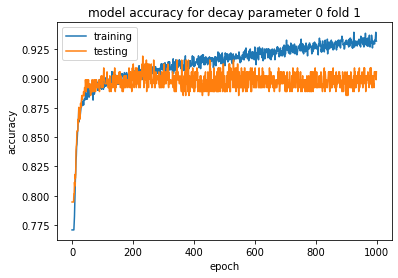

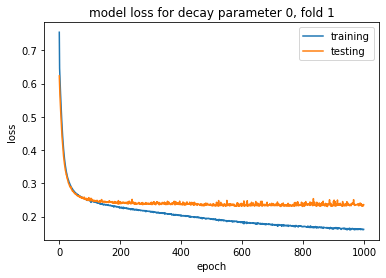

Epoch 1/1000
149/149 - 0s - loss: 0.7689 - accuracy: 0.7557 - val_loss: 0.6697 - val_accuracy: 0.7576
Epoch 2/1000
149/149 - 0s - loss: 0.6201 - accuracy: 0.7800 - val_loss: 0.6203 - val_accuracy: 0.7576
Epoch 3/1000
149/149 - 0s - loss: 0.5856 - accuracy: 0.7800 - val_loss: 0.5840 - val_accuracy: 0.7576
Epoch 4/1000
149/149 - 0s - loss: 0.5580 - accuracy: 0.7800 - val_loss: 0.5521 - val_accuracy: 0.7576
Epoch 5/1000
149/149 - 0s - loss: 0.5331 - accuracy: 0.7800 - val_loss: 0.5227 - val_accuracy: 0.7609
Epoch 6/1000
149/149 - 0s - loss: 0.5099 - accuracy: 0.7825 - val_loss: 0.4966 - val_accuracy: 0.7811
Epoch 7/1000
149/149 - 0s - loss: 0.4900 - accuracy: 0.7876 - val_loss: 0.4741 - val_accuracy: 0.7946
Epoch 8/1000
149/149 - 0s - loss: 0.4721 - accuracy: 0.7985 - val_loss: 0.4546 - val_accuracy: 0.7980
Epoch 9/1000
149/149 - 0s - loss: 0.4567 - accuracy: 0.8086 - val_loss: 0.4359 - val_accuracy: 0.8182
Epoch 10/1000
149/149 - 0s - loss: 0.4415 - accuracy: 0.8195 - val_loss: 0.4198 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2540 - accuracy: 0.8967 - val_loss: 0.2694 - val_accuracy: 0.9091
Epoch 82/1000
149/149 - 0s - loss: 0.2532 - accuracy: 0.8883 - val_loss: 0.2626 - val_accuracy: 0.8990
Epoch 83/1000
149/149 - 0s - loss: 0.2527 - accuracy: 0.8950 - val_loss: 0.2614 - val_accuracy: 0.9125
Epoch 84/1000
149/149 - 0s - loss: 0.2515 - accuracy: 0.8950 - val_loss: 0.2617 - val_accuracy: 0.9091
Epoch 85/1000
149/149 - 0s - loss: 0.2500 - accuracy: 0.8950 - val_loss: 0.2605 - val_accuracy: 0.9091
Epoch 86/1000
149/149 - 0s - loss: 0.2515 - accuracy: 0.8934 - val_loss: 0.2606 - val_accuracy: 0.9158
Epoch 87/1000
149/149 - 0s - loss: 0.2507 - accuracy: 0.8892 - val_loss: 0.2653 - val_accuracy: 0.9091
Epoch 88/1000
149/149 - 0s - loss: 0.2486 - accuracy: 0.8976 - val_loss: 0.2639 - val_accuracy: 0.9057
Epoch 89/1000
149/149 - 0s - loss: 0.2493 - accuracy: 0.8984 - val_loss: 0.2616 - val_accuracy: 0.9125
Epoch 90/1000
149/149 - 0s - loss: 0.2494 - accuracy: 0.8959 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2275 - accuracy: 0.9043 - val_loss: 0.2555 - val_accuracy: 0.9024
Epoch 161/1000
149/149 - 0s - loss: 0.2269 - accuracy: 0.9060 - val_loss: 0.2659 - val_accuracy: 0.9024
Epoch 162/1000
149/149 - 0s - loss: 0.2260 - accuracy: 0.9009 - val_loss: 0.2562 - val_accuracy: 0.8990
Epoch 163/1000
149/149 - 0s - loss: 0.2253 - accuracy: 0.9051 - val_loss: 0.2588 - val_accuracy: 0.9057
Epoch 164/1000
149/149 - 0s - loss: 0.2269 - accuracy: 0.9009 - val_loss: 0.2585 - val_accuracy: 0.9057
Epoch 165/1000
149/149 - 0s - loss: 0.2248 - accuracy: 0.8992 - val_loss: 0.2624 - val_accuracy: 0.8990
Epoch 166/1000
149/149 - 0s - loss: 0.2233 - accuracy: 0.8992 - val_loss: 0.2629 - val_accuracy: 0.8889
Epoch 167/1000
149/149 - 0s - loss: 0.2242 - accuracy: 0.9093 - val_loss: 0.2607 - val_accuracy: 0.8990
Epoch 168/1000
149/149 - 0s - loss: 0.2245 - accuracy: 0.9060 - val_loss: 0.2538 - val_accuracy: 0.9024
Epoch 169/1000
149/149 - 0s - loss: 0.2248 - accuracy: 0.9009 - 

Epoch 239/1000
149/149 - 0s - loss: 0.2090 - accuracy: 0.9102 - val_loss: 0.2511 - val_accuracy: 0.9057
Epoch 240/1000
149/149 - 0s - loss: 0.2091 - accuracy: 0.9127 - val_loss: 0.2619 - val_accuracy: 0.8990
Epoch 241/1000
149/149 - 0s - loss: 0.2106 - accuracy: 0.9085 - val_loss: 0.2540 - val_accuracy: 0.9057
Epoch 242/1000
149/149 - 0s - loss: 0.2082 - accuracy: 0.9068 - val_loss: 0.2478 - val_accuracy: 0.8990
Epoch 243/1000
149/149 - 0s - loss: 0.2097 - accuracy: 0.9051 - val_loss: 0.2542 - val_accuracy: 0.9057
Epoch 244/1000
149/149 - 0s - loss: 0.2102 - accuracy: 0.9068 - val_loss: 0.2537 - val_accuracy: 0.8990
Epoch 245/1000
149/149 - 0s - loss: 0.2076 - accuracy: 0.9068 - val_loss: 0.2489 - val_accuracy: 0.9057
Epoch 246/1000
149/149 - 0s - loss: 0.2095 - accuracy: 0.9085 - val_loss: 0.2529 - val_accuracy: 0.8990
Epoch 247/1000
149/149 - 0s - loss: 0.2071 - accuracy: 0.9018 - val_loss: 0.2625 - val_accuracy: 0.8990
Epoch 248/1000
149/149 - 0s - loss: 0.2077 - accuracy: 0.9076 - 

Epoch 318/1000
149/149 - 0s - loss: 0.1980 - accuracy: 0.9110 - val_loss: 0.2556 - val_accuracy: 0.8956
Epoch 319/1000
149/149 - 0s - loss: 0.1987 - accuracy: 0.9135 - val_loss: 0.2472 - val_accuracy: 0.9024
Epoch 320/1000
149/149 - 0s - loss: 0.1980 - accuracy: 0.9144 - val_loss: 0.2508 - val_accuracy: 0.8956
Epoch 321/1000
149/149 - 0s - loss: 0.1978 - accuracy: 0.9135 - val_loss: 0.2418 - val_accuracy: 0.9024
Epoch 322/1000
149/149 - 0s - loss: 0.1994 - accuracy: 0.9135 - val_loss: 0.2471 - val_accuracy: 0.9024
Epoch 323/1000
149/149 - 0s - loss: 0.1977 - accuracy: 0.9127 - val_loss: 0.2519 - val_accuracy: 0.9024
Epoch 324/1000
149/149 - 0s - loss: 0.1974 - accuracy: 0.9102 - val_loss: 0.2478 - val_accuracy: 0.8956
Epoch 325/1000
149/149 - 0s - loss: 0.1979 - accuracy: 0.9102 - val_loss: 0.2485 - val_accuracy: 0.9024
Epoch 326/1000
149/149 - 0s - loss: 0.1980 - accuracy: 0.9110 - val_loss: 0.2456 - val_accuracy: 0.8990
Epoch 327/1000
149/149 - 0s - loss: 0.1968 - accuracy: 0.9051 - 

Epoch 397/1000
149/149 - 0s - loss: 0.1898 - accuracy: 0.9211 - val_loss: 0.2402 - val_accuracy: 0.8990
Epoch 398/1000
149/149 - 0s - loss: 0.1888 - accuracy: 0.9186 - val_loss: 0.2351 - val_accuracy: 0.9057
Epoch 399/1000
149/149 - 0s - loss: 0.1910 - accuracy: 0.9169 - val_loss: 0.2412 - val_accuracy: 0.8990
Epoch 400/1000
149/149 - 0s - loss: 0.1873 - accuracy: 0.9152 - val_loss: 0.2419 - val_accuracy: 0.8990
Epoch 401/1000
149/149 - 0s - loss: 0.1874 - accuracy: 0.9110 - val_loss: 0.2542 - val_accuracy: 0.8889
Epoch 402/1000
149/149 - 0s - loss: 0.1891 - accuracy: 0.9144 - val_loss: 0.2435 - val_accuracy: 0.8990
Epoch 403/1000
149/149 - 0s - loss: 0.1883 - accuracy: 0.9211 - val_loss: 0.2427 - val_accuracy: 0.8990
Epoch 404/1000
149/149 - 0s - loss: 0.1886 - accuracy: 0.9152 - val_loss: 0.2569 - val_accuracy: 0.8889
Epoch 405/1000
149/149 - 0s - loss: 0.1881 - accuracy: 0.9160 - val_loss: 0.2510 - val_accuracy: 0.8956
Epoch 406/1000
149/149 - 0s - loss: 0.1891 - accuracy: 0.9194 - 

Epoch 476/1000
149/149 - 0s - loss: 0.1829 - accuracy: 0.9211 - val_loss: 0.2395 - val_accuracy: 0.8990
Epoch 477/1000
149/149 - 0s - loss: 0.1798 - accuracy: 0.9244 - val_loss: 0.2316 - val_accuracy: 0.9091
Epoch 478/1000
149/149 - 0s - loss: 0.1821 - accuracy: 0.9219 - val_loss: 0.2416 - val_accuracy: 0.9024
Epoch 479/1000
149/149 - 0s - loss: 0.1814 - accuracy: 0.9211 - val_loss: 0.2363 - val_accuracy: 0.8990
Epoch 480/1000
149/149 - 0s - loss: 0.1796 - accuracy: 0.9278 - val_loss: 0.2590 - val_accuracy: 0.8956
Epoch 481/1000
149/149 - 0s - loss: 0.1816 - accuracy: 0.9194 - val_loss: 0.2360 - val_accuracy: 0.9024
Epoch 482/1000
149/149 - 0s - loss: 0.1798 - accuracy: 0.9186 - val_loss: 0.2523 - val_accuracy: 0.8923
Epoch 483/1000
149/149 - 0s - loss: 0.1804 - accuracy: 0.9236 - val_loss: 0.2444 - val_accuracy: 0.8956
Epoch 484/1000
149/149 - 0s - loss: 0.1818 - accuracy: 0.9186 - val_loss: 0.2355 - val_accuracy: 0.9024
Epoch 485/1000
149/149 - 0s - loss: 0.1823 - accuracy: 0.9211 - 

Epoch 555/1000
149/149 - 0s - loss: 0.1742 - accuracy: 0.9228 - val_loss: 0.2350 - val_accuracy: 0.9125
Epoch 556/1000
149/149 - 0s - loss: 0.1749 - accuracy: 0.9278 - val_loss: 0.2465 - val_accuracy: 0.8990
Epoch 557/1000
149/149 - 0s - loss: 0.1753 - accuracy: 0.9211 - val_loss: 0.2438 - val_accuracy: 0.8923
Epoch 558/1000
149/149 - 0s - loss: 0.1758 - accuracy: 0.9211 - val_loss: 0.2342 - val_accuracy: 0.9125
Epoch 559/1000
149/149 - 0s - loss: 0.1744 - accuracy: 0.9211 - val_loss: 0.2437 - val_accuracy: 0.9057
Epoch 560/1000
149/149 - 0s - loss: 0.1733 - accuracy: 0.9261 - val_loss: 0.2458 - val_accuracy: 0.8956
Epoch 561/1000
149/149 - 0s - loss: 0.1747 - accuracy: 0.9202 - val_loss: 0.2427 - val_accuracy: 0.9125
Epoch 562/1000
149/149 - 0s - loss: 0.1731 - accuracy: 0.9253 - val_loss: 0.2325 - val_accuracy: 0.9158
Epoch 563/1000
149/149 - 0s - loss: 0.1740 - accuracy: 0.9253 - val_loss: 0.2309 - val_accuracy: 0.9091
Epoch 564/1000
149/149 - 0s - loss: 0.1759 - accuracy: 0.9211 - 

Epoch 634/1000
149/149 - 0s - loss: 0.1688 - accuracy: 0.9253 - val_loss: 0.2365 - val_accuracy: 0.9057
Epoch 635/1000
149/149 - 0s - loss: 0.1680 - accuracy: 0.9303 - val_loss: 0.2355 - val_accuracy: 0.9192
Epoch 636/1000
149/149 - 0s - loss: 0.1685 - accuracy: 0.9244 - val_loss: 0.2297 - val_accuracy: 0.9158
Epoch 637/1000
149/149 - 0s - loss: 0.1691 - accuracy: 0.9228 - val_loss: 0.2300 - val_accuracy: 0.9192
Epoch 638/1000
149/149 - 0s - loss: 0.1670 - accuracy: 0.9278 - val_loss: 0.2382 - val_accuracy: 0.9091
Epoch 639/1000
149/149 - 0s - loss: 0.1690 - accuracy: 0.9278 - val_loss: 0.2293 - val_accuracy: 0.9125
Epoch 640/1000
149/149 - 0s - loss: 0.1677 - accuracy: 0.9278 - val_loss: 0.2400 - val_accuracy: 0.8990
Epoch 641/1000
149/149 - 0s - loss: 0.1668 - accuracy: 0.9320 - val_loss: 0.2335 - val_accuracy: 0.9091
Epoch 642/1000
149/149 - 0s - loss: 0.1680 - accuracy: 0.9253 - val_loss: 0.2380 - val_accuracy: 0.9192
Epoch 643/1000
149/149 - 0s - loss: 0.1661 - accuracy: 0.9286 - 

Epoch 713/1000
149/149 - 0s - loss: 0.1628 - accuracy: 0.9353 - val_loss: 0.2343 - val_accuracy: 0.9125
Epoch 714/1000
149/149 - 0s - loss: 0.1624 - accuracy: 0.9328 - val_loss: 0.2365 - val_accuracy: 0.9125
Epoch 715/1000
149/149 - 0s - loss: 0.1630 - accuracy: 0.9320 - val_loss: 0.2376 - val_accuracy: 0.9125
Epoch 716/1000
149/149 - 0s - loss: 0.1622 - accuracy: 0.9345 - val_loss: 0.2309 - val_accuracy: 0.9158
Epoch 717/1000
149/149 - 0s - loss: 0.1635 - accuracy: 0.9286 - val_loss: 0.2287 - val_accuracy: 0.9226
Epoch 718/1000
149/149 - 0s - loss: 0.1628 - accuracy: 0.9295 - val_loss: 0.2306 - val_accuracy: 0.9158
Epoch 719/1000
149/149 - 0s - loss: 0.1599 - accuracy: 0.9312 - val_loss: 0.2384 - val_accuracy: 0.9259
Epoch 720/1000
149/149 - 0s - loss: 0.1629 - accuracy: 0.9261 - val_loss: 0.2405 - val_accuracy: 0.9125
Epoch 721/1000
149/149 - 0s - loss: 0.1619 - accuracy: 0.9345 - val_loss: 0.2363 - val_accuracy: 0.9091
Epoch 722/1000
149/149 - 0s - loss: 0.1627 - accuracy: 0.9345 - 

Epoch 792/1000
149/149 - 0s - loss: 0.1576 - accuracy: 0.9370 - val_loss: 0.2279 - val_accuracy: 0.9091
Epoch 793/1000
149/149 - 0s - loss: 0.1557 - accuracy: 0.9278 - val_loss: 0.2340 - val_accuracy: 0.9158
Epoch 794/1000
149/149 - 0s - loss: 0.1585 - accuracy: 0.9303 - val_loss: 0.2367 - val_accuracy: 0.9192
Epoch 795/1000
149/149 - 0s - loss: 0.1564 - accuracy: 0.9337 - val_loss: 0.2375 - val_accuracy: 0.9158
Epoch 796/1000
149/149 - 0s - loss: 0.1562 - accuracy: 0.9345 - val_loss: 0.2291 - val_accuracy: 0.9226
Epoch 797/1000
149/149 - 0s - loss: 0.1555 - accuracy: 0.9312 - val_loss: 0.2373 - val_accuracy: 0.9192
Epoch 798/1000
149/149 - 0s - loss: 0.1560 - accuracy: 0.9362 - val_loss: 0.2414 - val_accuracy: 0.9091
Epoch 799/1000
149/149 - 0s - loss: 0.1561 - accuracy: 0.9320 - val_loss: 0.2195 - val_accuracy: 0.9259
Epoch 800/1000
149/149 - 0s - loss: 0.1561 - accuracy: 0.9353 - val_loss: 0.2379 - val_accuracy: 0.9158
Epoch 801/1000
149/149 - 0s - loss: 0.1565 - accuracy: 0.9303 - 

Epoch 871/1000
149/149 - 0s - loss: 0.1502 - accuracy: 0.9379 - val_loss: 0.2206 - val_accuracy: 0.9125
Epoch 872/1000
149/149 - 0s - loss: 0.1514 - accuracy: 0.9387 - val_loss: 0.2284 - val_accuracy: 0.9259
Epoch 873/1000
149/149 - 0s - loss: 0.1512 - accuracy: 0.9387 - val_loss: 0.2278 - val_accuracy: 0.9192
Epoch 874/1000
149/149 - 0s - loss: 0.1521 - accuracy: 0.9345 - val_loss: 0.2210 - val_accuracy: 0.9226
Epoch 875/1000
149/149 - 0s - loss: 0.1509 - accuracy: 0.9345 - val_loss: 0.2356 - val_accuracy: 0.9192
Epoch 876/1000
149/149 - 0s - loss: 0.1508 - accuracy: 0.9362 - val_loss: 0.2331 - val_accuracy: 0.9091
Epoch 877/1000
149/149 - 0s - loss: 0.1525 - accuracy: 0.9362 - val_loss: 0.2284 - val_accuracy: 0.9226
Epoch 878/1000
149/149 - 0s - loss: 0.1529 - accuracy: 0.9345 - val_loss: 0.2214 - val_accuracy: 0.9192
Epoch 879/1000
149/149 - 0s - loss: 0.1519 - accuracy: 0.9328 - val_loss: 0.2252 - val_accuracy: 0.9125
Epoch 880/1000
149/149 - 0s - loss: 0.1523 - accuracy: 0.9395 - 

Epoch 950/1000
149/149 - 0s - loss: 0.1469 - accuracy: 0.9387 - val_loss: 0.2372 - val_accuracy: 0.9158
Epoch 951/1000
149/149 - 0s - loss: 0.1477 - accuracy: 0.9404 - val_loss: 0.2438 - val_accuracy: 0.9091
Epoch 952/1000
149/149 - 0s - loss: 0.1462 - accuracy: 0.9421 - val_loss: 0.2428 - val_accuracy: 0.9158
Epoch 953/1000
149/149 - 0s - loss: 0.1475 - accuracy: 0.9412 - val_loss: 0.2368 - val_accuracy: 0.9158
Epoch 954/1000
149/149 - 0s - loss: 0.1455 - accuracy: 0.9404 - val_loss: 0.2274 - val_accuracy: 0.9259
Epoch 955/1000
149/149 - 0s - loss: 0.1477 - accuracy: 0.9404 - val_loss: 0.2369 - val_accuracy: 0.9158
Epoch 956/1000
149/149 - 0s - loss: 0.1452 - accuracy: 0.9421 - val_loss: 0.2572 - val_accuracy: 0.8923
Epoch 957/1000
149/149 - 0s - loss: 0.1463 - accuracy: 0.9370 - val_loss: 0.2236 - val_accuracy: 0.9226
Epoch 958/1000
149/149 - 0s - loss: 0.1468 - accuracy: 0.9421 - val_loss: 0.2253 - val_accuracy: 0.9226
Epoch 959/1000
149/149 - 0s - loss: 0.1472 - accuracy: 0.9412 - 

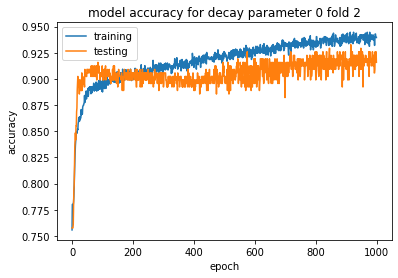

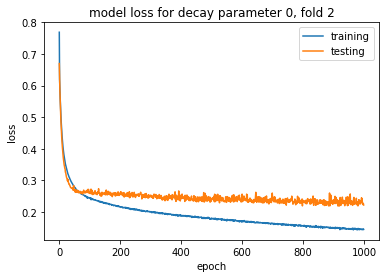

Epoch 1/1000
149/149 - 0s - loss: 0.7211 - accuracy: 0.7708 - val_loss: 0.6077 - val_accuracy: 0.7980
Epoch 2/1000
149/149 - 0s - loss: 0.6376 - accuracy: 0.7699 - val_loss: 0.5768 - val_accuracy: 0.7980
Epoch 3/1000
149/149 - 0s - loss: 0.6100 - accuracy: 0.7699 - val_loss: 0.5516 - val_accuracy: 0.7980
Epoch 4/1000
149/149 - 0s - loss: 0.5852 - accuracy: 0.7699 - val_loss: 0.5319 - val_accuracy: 0.7980
Epoch 5/1000
149/149 - 0s - loss: 0.5620 - accuracy: 0.7699 - val_loss: 0.5073 - val_accuracy: 0.7980
Epoch 6/1000
149/149 - 0s - loss: 0.5405 - accuracy: 0.7708 - val_loss: 0.4911 - val_accuracy: 0.8013
Epoch 7/1000
149/149 - 0s - loss: 0.5214 - accuracy: 0.7767 - val_loss: 0.4719 - val_accuracy: 0.8013
Epoch 8/1000
149/149 - 0s - loss: 0.5041 - accuracy: 0.7859 - val_loss: 0.4541 - val_accuracy: 0.8114
Epoch 9/1000
149/149 - 0s - loss: 0.4884 - accuracy: 0.7901 - val_loss: 0.4412 - val_accuracy: 0.8316
Epoch 10/1000
149/149 - 0s - loss: 0.4736 - accuracy: 0.7960 - val_loss: 0.4263 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2583 - accuracy: 0.8866 - val_loss: 0.2635 - val_accuracy: 0.8822
Epoch 82/1000
149/149 - 0s - loss: 0.2579 - accuracy: 0.8850 - val_loss: 0.2617 - val_accuracy: 0.8822
Epoch 83/1000
149/149 - 0s - loss: 0.2578 - accuracy: 0.8875 - val_loss: 0.2512 - val_accuracy: 0.8822
Epoch 84/1000
149/149 - 0s - loss: 0.2558 - accuracy: 0.8892 - val_loss: 0.2529 - val_accuracy: 0.8822
Epoch 85/1000
149/149 - 0s - loss: 0.2554 - accuracy: 0.8925 - val_loss: 0.2548 - val_accuracy: 0.8855
Epoch 86/1000
149/149 - 0s - loss: 0.2554 - accuracy: 0.8883 - val_loss: 0.2537 - val_accuracy: 0.8855
Epoch 87/1000
149/149 - 0s - loss: 0.2552 - accuracy: 0.8850 - val_loss: 0.2520 - val_accuracy: 0.8788
Epoch 88/1000
149/149 - 0s - loss: 0.2529 - accuracy: 0.8967 - val_loss: 0.2479 - val_accuracy: 0.8855
Epoch 89/1000
149/149 - 0s - loss: 0.2540 - accuracy: 0.8917 - val_loss: 0.2482 - val_accuracy: 0.8788
Epoch 90/1000
149/149 - 0s - loss: 0.2541 - accuracy: 0.8908 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2343 - accuracy: 0.9018 - val_loss: 0.2271 - val_accuracy: 0.8889
Epoch 161/1000
149/149 - 0s - loss: 0.2329 - accuracy: 0.9043 - val_loss: 0.2425 - val_accuracy: 0.8990
Epoch 162/1000
149/149 - 0s - loss: 0.2345 - accuracy: 0.9018 - val_loss: 0.2274 - val_accuracy: 0.8923
Epoch 163/1000
149/149 - 0s - loss: 0.2317 - accuracy: 0.9009 - val_loss: 0.2412 - val_accuracy: 0.8990
Epoch 164/1000
149/149 - 0s - loss: 0.2334 - accuracy: 0.9060 - val_loss: 0.2273 - val_accuracy: 0.8889
Epoch 165/1000
149/149 - 0s - loss: 0.2314 - accuracy: 0.8959 - val_loss: 0.2244 - val_accuracy: 0.8923
Epoch 166/1000
149/149 - 0s - loss: 0.2303 - accuracy: 0.9034 - val_loss: 0.2250 - val_accuracy: 0.9024
Epoch 167/1000
149/149 - 0s - loss: 0.2328 - accuracy: 0.8992 - val_loss: 0.2270 - val_accuracy: 0.8889
Epoch 168/1000
149/149 - 0s - loss: 0.2326 - accuracy: 0.9001 - val_loss: 0.2264 - val_accuracy: 0.8923
Epoch 169/1000
149/149 - 0s - loss: 0.2321 - accuracy: 0.9034 - 

Epoch 239/1000
149/149 - 0s - loss: 0.2195 - accuracy: 0.9068 - val_loss: 0.2241 - val_accuracy: 0.9125
Epoch 240/1000
149/149 - 0s - loss: 0.2211 - accuracy: 0.9051 - val_loss: 0.2251 - val_accuracy: 0.9125
Epoch 241/1000
149/149 - 0s - loss: 0.2216 - accuracy: 0.9043 - val_loss: 0.2211 - val_accuracy: 0.9091
Epoch 242/1000
149/149 - 0s - loss: 0.2202 - accuracy: 0.9026 - val_loss: 0.2159 - val_accuracy: 0.8990
Epoch 243/1000
149/149 - 0s - loss: 0.2208 - accuracy: 0.9018 - val_loss: 0.2201 - val_accuracy: 0.9024
Epoch 244/1000
149/149 - 0s - loss: 0.2212 - accuracy: 0.9034 - val_loss: 0.2173 - val_accuracy: 0.8990
Epoch 245/1000
149/149 - 0s - loss: 0.2203 - accuracy: 0.9051 - val_loss: 0.2174 - val_accuracy: 0.8956
Epoch 246/1000
149/149 - 0s - loss: 0.2206 - accuracy: 0.9009 - val_loss: 0.2182 - val_accuracy: 0.9024
Epoch 247/1000
149/149 - 0s - loss: 0.2183 - accuracy: 0.9093 - val_loss: 0.2241 - val_accuracy: 0.9125
Epoch 248/1000
149/149 - 0s - loss: 0.2198 - accuracy: 0.9060 - 

Epoch 318/1000
149/149 - 0s - loss: 0.2121 - accuracy: 0.9076 - val_loss: 0.2105 - val_accuracy: 0.9091
Epoch 319/1000
149/149 - 0s - loss: 0.2122 - accuracy: 0.9060 - val_loss: 0.2122 - val_accuracy: 0.9024
Epoch 320/1000
149/149 - 0s - loss: 0.2117 - accuracy: 0.9060 - val_loss: 0.2120 - val_accuracy: 0.9024
Epoch 321/1000
149/149 - 0s - loss: 0.2113 - accuracy: 0.9051 - val_loss: 0.2167 - val_accuracy: 0.9192
Epoch 322/1000
149/149 - 0s - loss: 0.2119 - accuracy: 0.9043 - val_loss: 0.2131 - val_accuracy: 0.9125
Epoch 323/1000
149/149 - 0s - loss: 0.2115 - accuracy: 0.9026 - val_loss: 0.2099 - val_accuracy: 0.9125
Epoch 324/1000
149/149 - 0s - loss: 0.2113 - accuracy: 0.9068 - val_loss: 0.2132 - val_accuracy: 0.9125
Epoch 325/1000
149/149 - 0s - loss: 0.2107 - accuracy: 0.9043 - val_loss: 0.2104 - val_accuracy: 0.9125
Epoch 326/1000
149/149 - 0s - loss: 0.2115 - accuracy: 0.9068 - val_loss: 0.2102 - val_accuracy: 0.9125
Epoch 327/1000
149/149 - 0s - loss: 0.2104 - accuracy: 0.9018 - 

Epoch 397/1000
149/149 - 0s - loss: 0.2032 - accuracy: 0.9068 - val_loss: 0.2152 - val_accuracy: 0.9226
Epoch 398/1000
149/149 - 0s - loss: 0.2031 - accuracy: 0.9085 - val_loss: 0.2095 - val_accuracy: 0.9158
Epoch 399/1000
149/149 - 0s - loss: 0.2031 - accuracy: 0.9051 - val_loss: 0.2066 - val_accuracy: 0.9226
Epoch 400/1000
149/149 - 0s - loss: 0.2021 - accuracy: 0.9076 - val_loss: 0.2059 - val_accuracy: 0.9226
Epoch 401/1000
149/149 - 0s - loss: 0.2023 - accuracy: 0.9076 - val_loss: 0.2058 - val_accuracy: 0.9226
Epoch 402/1000
149/149 - 0s - loss: 0.2023 - accuracy: 0.9068 - val_loss: 0.2078 - val_accuracy: 0.9226
Epoch 403/1000
149/149 - 0s - loss: 0.2026 - accuracy: 0.9102 - val_loss: 0.2085 - val_accuracy: 0.9192
Epoch 404/1000
149/149 - 0s - loss: 0.2015 - accuracy: 0.9102 - val_loss: 0.2169 - val_accuracy: 0.9259
Epoch 405/1000
149/149 - 0s - loss: 0.2004 - accuracy: 0.9110 - val_loss: 0.2170 - val_accuracy: 0.9158
Epoch 406/1000
149/149 - 0s - loss: 0.2027 - accuracy: 0.9102 - 

Epoch 476/1000
149/149 - 0s - loss: 0.1957 - accuracy: 0.9051 - val_loss: 0.2073 - val_accuracy: 0.9192
Epoch 477/1000
149/149 - 0s - loss: 0.1933 - accuracy: 0.9102 - val_loss: 0.2100 - val_accuracy: 0.9226
Epoch 478/1000
149/149 - 0s - loss: 0.1942 - accuracy: 0.9118 - val_loss: 0.2080 - val_accuracy: 0.9158
Epoch 479/1000
149/149 - 0s - loss: 0.1940 - accuracy: 0.9076 - val_loss: 0.2067 - val_accuracy: 0.9226
Epoch 480/1000
149/149 - 0s - loss: 0.1936 - accuracy: 0.9152 - val_loss: 0.2141 - val_accuracy: 0.9192
Epoch 481/1000
149/149 - 0s - loss: 0.1942 - accuracy: 0.9085 - val_loss: 0.2100 - val_accuracy: 0.9158
Epoch 482/1000
149/149 - 0s - loss: 0.1908 - accuracy: 0.9102 - val_loss: 0.2026 - val_accuracy: 0.9293
Epoch 483/1000
149/149 - 0s - loss: 0.1939 - accuracy: 0.9076 - val_loss: 0.2098 - val_accuracy: 0.9192
Epoch 484/1000
149/149 - 0s - loss: 0.1940 - accuracy: 0.9118 - val_loss: 0.2095 - val_accuracy: 0.9192
Epoch 485/1000
149/149 - 0s - loss: 0.1930 - accuracy: 0.9135 - 

Epoch 555/1000
149/149 - 0s - loss: 0.1853 - accuracy: 0.9160 - val_loss: 0.2031 - val_accuracy: 0.9158
Epoch 556/1000
149/149 - 0s - loss: 0.1874 - accuracy: 0.9102 - val_loss: 0.2060 - val_accuracy: 0.9125
Epoch 557/1000
149/149 - 0s - loss: 0.1876 - accuracy: 0.9118 - val_loss: 0.2031 - val_accuracy: 0.9192
Epoch 558/1000
149/149 - 0s - loss: 0.1867 - accuracy: 0.9110 - val_loss: 0.2179 - val_accuracy: 0.9158
Epoch 559/1000
149/149 - 0s - loss: 0.1863 - accuracy: 0.9135 - val_loss: 0.2014 - val_accuracy: 0.9226
Epoch 560/1000
149/149 - 0s - loss: 0.1852 - accuracy: 0.9135 - val_loss: 0.2094 - val_accuracy: 0.9158
Epoch 561/1000
149/149 - 0s - loss: 0.1870 - accuracy: 0.9110 - val_loss: 0.2019 - val_accuracy: 0.9293
Epoch 562/1000
149/149 - 0s - loss: 0.1860 - accuracy: 0.9177 - val_loss: 0.2064 - val_accuracy: 0.9158
Epoch 563/1000
149/149 - 0s - loss: 0.1848 - accuracy: 0.9085 - val_loss: 0.2089 - val_accuracy: 0.9293
Epoch 564/1000
149/149 - 0s - loss: 0.1871 - accuracy: 0.9135 - 

Epoch 634/1000
149/149 - 0s - loss: 0.1804 - accuracy: 0.9127 - val_loss: 0.2020 - val_accuracy: 0.9192
Epoch 635/1000
149/149 - 0s - loss: 0.1808 - accuracy: 0.9144 - val_loss: 0.2019 - val_accuracy: 0.9192
Epoch 636/1000
149/149 - 0s - loss: 0.1795 - accuracy: 0.9194 - val_loss: 0.2031 - val_accuracy: 0.9125
Epoch 637/1000
149/149 - 0s - loss: 0.1799 - accuracy: 0.9169 - val_loss: 0.2015 - val_accuracy: 0.9327
Epoch 638/1000
149/149 - 0s - loss: 0.1788 - accuracy: 0.9186 - val_loss: 0.2131 - val_accuracy: 0.9125
Epoch 639/1000
149/149 - 0s - loss: 0.1820 - accuracy: 0.9152 - val_loss: 0.2030 - val_accuracy: 0.9125
Epoch 640/1000
149/149 - 0s - loss: 0.1799 - accuracy: 0.9135 - val_loss: 0.2058 - val_accuracy: 0.9192
Epoch 641/1000
149/149 - 0s - loss: 0.1810 - accuracy: 0.9135 - val_loss: 0.2052 - val_accuracy: 0.9125
Epoch 642/1000
149/149 - 0s - loss: 0.1806 - accuracy: 0.9152 - val_loss: 0.2023 - val_accuracy: 0.9192
Epoch 643/1000
149/149 - 0s - loss: 0.1791 - accuracy: 0.9270 - 

Epoch 713/1000
149/149 - 0s - loss: 0.1754 - accuracy: 0.9202 - val_loss: 0.2009 - val_accuracy: 0.9259
Epoch 714/1000
149/149 - 0s - loss: 0.1753 - accuracy: 0.9211 - val_loss: 0.2027 - val_accuracy: 0.9125
Epoch 715/1000
149/149 - 0s - loss: 0.1762 - accuracy: 0.9186 - val_loss: 0.2040 - val_accuracy: 0.9091
Epoch 716/1000
149/149 - 0s - loss: 0.1750 - accuracy: 0.9244 - val_loss: 0.2004 - val_accuracy: 0.9192
Epoch 717/1000
149/149 - 0s - loss: 0.1753 - accuracy: 0.9186 - val_loss: 0.2021 - val_accuracy: 0.9226
Epoch 718/1000
149/149 - 0s - loss: 0.1746 - accuracy: 0.9194 - val_loss: 0.2005 - val_accuracy: 0.9226
Epoch 719/1000
149/149 - 0s - loss: 0.1733 - accuracy: 0.9253 - val_loss: 0.2015 - val_accuracy: 0.9293
Epoch 720/1000
149/149 - 0s - loss: 0.1767 - accuracy: 0.9152 - val_loss: 0.1995 - val_accuracy: 0.9226
Epoch 721/1000
149/149 - 0s - loss: 0.1742 - accuracy: 0.9228 - val_loss: 0.2003 - val_accuracy: 0.9226
Epoch 722/1000
149/149 - 0s - loss: 0.1754 - accuracy: 0.9202 - 

Epoch 792/1000
149/149 - 0s - loss: 0.1705 - accuracy: 0.9244 - val_loss: 0.1997 - val_accuracy: 0.9192
Epoch 793/1000
149/149 - 0s - loss: 0.1693 - accuracy: 0.9286 - val_loss: 0.2012 - val_accuracy: 0.9226
Epoch 794/1000
149/149 - 0s - loss: 0.1705 - accuracy: 0.9177 - val_loss: 0.1994 - val_accuracy: 0.9158
Epoch 795/1000
149/149 - 0s - loss: 0.1686 - accuracy: 0.9211 - val_loss: 0.2004 - val_accuracy: 0.9158
Epoch 796/1000
149/149 - 0s - loss: 0.1696 - accuracy: 0.9244 - val_loss: 0.2001 - val_accuracy: 0.9192
Epoch 797/1000
149/149 - 0s - loss: 0.1691 - accuracy: 0.9278 - val_loss: 0.2001 - val_accuracy: 0.9192
Epoch 798/1000
149/149 - 0s - loss: 0.1696 - accuracy: 0.9244 - val_loss: 0.2050 - val_accuracy: 0.9091
Epoch 799/1000
149/149 - 0s - loss: 0.1698 - accuracy: 0.9244 - val_loss: 0.2070 - val_accuracy: 0.9192
Epoch 800/1000
149/149 - 0s - loss: 0.1693 - accuracy: 0.9278 - val_loss: 0.2025 - val_accuracy: 0.9192
Epoch 801/1000
149/149 - 0s - loss: 0.1695 - accuracy: 0.9278 - 

Epoch 871/1000
149/149 - 0s - loss: 0.1655 - accuracy: 0.9303 - val_loss: 0.2008 - val_accuracy: 0.9125
Epoch 872/1000
149/149 - 0s - loss: 0.1658 - accuracy: 0.9303 - val_loss: 0.1998 - val_accuracy: 0.9158
Epoch 873/1000
149/149 - 0s - loss: 0.1657 - accuracy: 0.9261 - val_loss: 0.2011 - val_accuracy: 0.9192
Epoch 874/1000
149/149 - 0s - loss: 0.1646 - accuracy: 0.9328 - val_loss: 0.2035 - val_accuracy: 0.9125
Epoch 875/1000
149/149 - 0s - loss: 0.1659 - accuracy: 0.9303 - val_loss: 0.2119 - val_accuracy: 0.9091
Epoch 876/1000
149/149 - 0s - loss: 0.1645 - accuracy: 0.9270 - val_loss: 0.2024 - val_accuracy: 0.9091
Epoch 877/1000
149/149 - 0s - loss: 0.1649 - accuracy: 0.9228 - val_loss: 0.2127 - val_accuracy: 0.9057
Epoch 878/1000
149/149 - 0s - loss: 0.1654 - accuracy: 0.9320 - val_loss: 0.2006 - val_accuracy: 0.9192
Epoch 879/1000
149/149 - 0s - loss: 0.1655 - accuracy: 0.9261 - val_loss: 0.2099 - val_accuracy: 0.9091
Epoch 880/1000
149/149 - 0s - loss: 0.1660 - accuracy: 0.9286 - 

Epoch 950/1000
149/149 - 0s - loss: 0.1615 - accuracy: 0.9278 - val_loss: 0.2003 - val_accuracy: 0.9192
Epoch 951/1000
149/149 - 0s - loss: 0.1630 - accuracy: 0.9295 - val_loss: 0.2053 - val_accuracy: 0.9057
Epoch 952/1000
149/149 - 0s - loss: 0.1622 - accuracy: 0.9286 - val_loss: 0.2047 - val_accuracy: 0.9024
Epoch 953/1000
149/149 - 0s - loss: 0.1610 - accuracy: 0.9295 - val_loss: 0.2007 - val_accuracy: 0.9192
Epoch 954/1000
149/149 - 0s - loss: 0.1606 - accuracy: 0.9337 - val_loss: 0.2056 - val_accuracy: 0.9192
Epoch 955/1000
149/149 - 0s - loss: 0.1619 - accuracy: 0.9328 - val_loss: 0.2050 - val_accuracy: 0.9192
Epoch 956/1000
149/149 - 0s - loss: 0.1615 - accuracy: 0.9345 - val_loss: 0.2003 - val_accuracy: 0.9158
Epoch 957/1000
149/149 - 0s - loss: 0.1622 - accuracy: 0.9312 - val_loss: 0.2018 - val_accuracy: 0.9226
Epoch 958/1000
149/149 - 0s - loss: 0.1624 - accuracy: 0.9303 - val_loss: 0.2020 - val_accuracy: 0.9125
Epoch 959/1000
149/149 - 0s - loss: 0.1620 - accuracy: 0.9312 - 

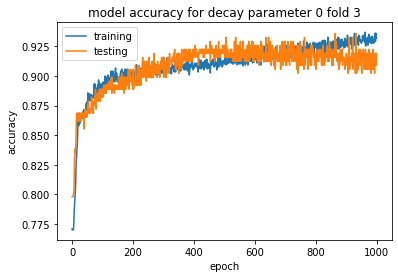

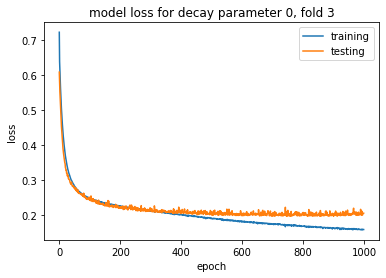

Epoch 1/1000
149/149 - 0s - loss: 0.8521 - accuracy: 0.6742 - val_loss: 0.7164 - val_accuracy: 0.7441
Epoch 2/1000
149/149 - 0s - loss: 0.6306 - accuracy: 0.7834 - val_loss: 0.6872 - val_accuracy: 0.7441
Epoch 3/1000
149/149 - 0s - loss: 0.6022 - accuracy: 0.7834 - val_loss: 0.6643 - val_accuracy: 0.7441
Epoch 4/1000
149/149 - 0s - loss: 0.5787 - accuracy: 0.7834 - val_loss: 0.6423 - val_accuracy: 0.7441
Epoch 5/1000
149/149 - 0s - loss: 0.5580 - accuracy: 0.7834 - val_loss: 0.6254 - val_accuracy: 0.7441
Epoch 6/1000
149/149 - 0s - loss: 0.5360 - accuracy: 0.7834 - val_loss: 0.6039 - val_accuracy: 0.7441
Epoch 7/1000
149/149 - 0s - loss: 0.5154 - accuracy: 0.7834 - val_loss: 0.5860 - val_accuracy: 0.7441
Epoch 8/1000
149/149 - 0s - loss: 0.4953 - accuracy: 0.7842 - val_loss: 0.5704 - val_accuracy: 0.7475
Epoch 9/1000
149/149 - 0s - loss: 0.4757 - accuracy: 0.7909 - val_loss: 0.5517 - val_accuracy: 0.7576
Epoch 10/1000
149/149 - 0s - loss: 0.4578 - accuracy: 0.7976 - val_loss: 0.5385 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2396 - accuracy: 0.9051 - val_loss: 0.3378 - val_accuracy: 0.8350
Epoch 82/1000
149/149 - 0s - loss: 0.2380 - accuracy: 0.9026 - val_loss: 0.3284 - val_accuracy: 0.8316
Epoch 83/1000
149/149 - 0s - loss: 0.2381 - accuracy: 0.9060 - val_loss: 0.3458 - val_accuracy: 0.8451
Epoch 84/1000
149/149 - 0s - loss: 0.2376 - accuracy: 0.9026 - val_loss: 0.3414 - val_accuracy: 0.8485
Epoch 85/1000
149/149 - 0s - loss: 0.2365 - accuracy: 0.9051 - val_loss: 0.3315 - val_accuracy: 0.8384
Epoch 86/1000
149/149 - 0s - loss: 0.2363 - accuracy: 0.9018 - val_loss: 0.3287 - val_accuracy: 0.8350
Epoch 87/1000
149/149 - 0s - loss: 0.2361 - accuracy: 0.9093 - val_loss: 0.3347 - val_accuracy: 0.8350
Epoch 88/1000
149/149 - 0s - loss: 0.2355 - accuracy: 0.9060 - val_loss: 0.3387 - val_accuracy: 0.8384
Epoch 89/1000
149/149 - 0s - loss: 0.2346 - accuracy: 0.9093 - val_loss: 0.3302 - val_accuracy: 0.8384
Epoch 90/1000
149/149 - 0s - loss: 0.2345 - accuracy: 0.9068 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2134 - accuracy: 0.9127 - val_loss: 0.3258 - val_accuracy: 0.8384
Epoch 161/1000
149/149 - 0s - loss: 0.2132 - accuracy: 0.9118 - val_loss: 0.3146 - val_accuracy: 0.8485
Epoch 162/1000
149/149 - 0s - loss: 0.2129 - accuracy: 0.9102 - val_loss: 0.3241 - val_accuracy: 0.8418
Epoch 163/1000
149/149 - 0s - loss: 0.2122 - accuracy: 0.9152 - val_loss: 0.3144 - val_accuracy: 0.8451
Epoch 164/1000
149/149 - 0s - loss: 0.2123 - accuracy: 0.9152 - val_loss: 0.3286 - val_accuracy: 0.8384
Epoch 165/1000
149/149 - 0s - loss: 0.2117 - accuracy: 0.9118 - val_loss: 0.3315 - val_accuracy: 0.8350
Epoch 166/1000
149/149 - 0s - loss: 0.2115 - accuracy: 0.9127 - val_loss: 0.3360 - val_accuracy: 0.8350
Epoch 167/1000
149/149 - 0s - loss: 0.2121 - accuracy: 0.9144 - val_loss: 0.3144 - val_accuracy: 0.8485
Epoch 168/1000
149/149 - 0s - loss: 0.2121 - accuracy: 0.9152 - val_loss: 0.3186 - val_accuracy: 0.8451
Epoch 169/1000
149/149 - 0s - loss: 0.2114 - accuracy: 0.9144 - 

Epoch 239/1000
149/149 - 0s - loss: 0.1981 - accuracy: 0.9219 - val_loss: 0.3189 - val_accuracy: 0.8519
Epoch 240/1000
149/149 - 0s - loss: 0.1993 - accuracy: 0.9194 - val_loss: 0.3272 - val_accuracy: 0.8384
Epoch 241/1000
149/149 - 0s - loss: 0.1996 - accuracy: 0.9169 - val_loss: 0.3196 - val_accuracy: 0.8552
Epoch 242/1000
149/149 - 0s - loss: 0.1989 - accuracy: 0.9186 - val_loss: 0.3355 - val_accuracy: 0.8350
Epoch 243/1000
149/149 - 0s - loss: 0.1992 - accuracy: 0.9202 - val_loss: 0.3216 - val_accuracy: 0.8519
Epoch 244/1000
149/149 - 0s - loss: 0.1990 - accuracy: 0.9186 - val_loss: 0.3367 - val_accuracy: 0.8350
Epoch 245/1000
149/149 - 0s - loss: 0.1993 - accuracy: 0.9186 - val_loss: 0.3271 - val_accuracy: 0.8384
Epoch 246/1000
149/149 - 0s - loss: 0.1991 - accuracy: 0.9169 - val_loss: 0.3247 - val_accuracy: 0.8485
Epoch 247/1000
149/149 - 0s - loss: 0.1977 - accuracy: 0.9186 - val_loss: 0.3260 - val_accuracy: 0.8418
Epoch 248/1000
149/149 - 0s - loss: 0.1981 - accuracy: 0.9186 - 

Epoch 318/1000
149/149 - 0s - loss: 0.1903 - accuracy: 0.9211 - val_loss: 0.3168 - val_accuracy: 0.8620
Epoch 319/1000
149/149 - 0s - loss: 0.1905 - accuracy: 0.9228 - val_loss: 0.3184 - val_accuracy: 0.8586
Epoch 320/1000
149/149 - 0s - loss: 0.1900 - accuracy: 0.9228 - val_loss: 0.3282 - val_accuracy: 0.8485
Epoch 321/1000
149/149 - 0s - loss: 0.1891 - accuracy: 0.9219 - val_loss: 0.3156 - val_accuracy: 0.8620
Epoch 322/1000
149/149 - 0s - loss: 0.1898 - accuracy: 0.9186 - val_loss: 0.3160 - val_accuracy: 0.8620
Epoch 323/1000
149/149 - 0s - loss: 0.1889 - accuracy: 0.9152 - val_loss: 0.3193 - val_accuracy: 0.8586
Epoch 324/1000
149/149 - 0s - loss: 0.1893 - accuracy: 0.9228 - val_loss: 0.3137 - val_accuracy: 0.8620
Epoch 325/1000
149/149 - 0s - loss: 0.1889 - accuracy: 0.9244 - val_loss: 0.3152 - val_accuracy: 0.8586
Epoch 326/1000
149/149 - 0s - loss: 0.1888 - accuracy: 0.9261 - val_loss: 0.3248 - val_accuracy: 0.8519
Epoch 327/1000
149/149 - 0s - loss: 0.1885 - accuracy: 0.9186 - 

Epoch 397/1000
149/149 - 0s - loss: 0.1805 - accuracy: 0.9228 - val_loss: 0.3044 - val_accuracy: 0.8519
Epoch 398/1000
149/149 - 0s - loss: 0.1824 - accuracy: 0.9236 - val_loss: 0.3188 - val_accuracy: 0.8620
Epoch 399/1000
149/149 - 0s - loss: 0.1812 - accuracy: 0.9236 - val_loss: 0.3126 - val_accuracy: 0.8586
Epoch 400/1000
149/149 - 0s - loss: 0.1809 - accuracy: 0.9244 - val_loss: 0.3111 - val_accuracy: 0.8586
Epoch 401/1000
149/149 - 0s - loss: 0.1806 - accuracy: 0.9261 - val_loss: 0.3189 - val_accuracy: 0.8552
Epoch 402/1000
149/149 - 0s - loss: 0.1811 - accuracy: 0.9211 - val_loss: 0.3180 - val_accuracy: 0.8620
Epoch 403/1000
149/149 - 0s - loss: 0.1812 - accuracy: 0.9244 - val_loss: 0.3149 - val_accuracy: 0.8620
Epoch 404/1000
149/149 - 0s - loss: 0.1811 - accuracy: 0.9295 - val_loss: 0.3043 - val_accuracy: 0.8586
Epoch 405/1000
149/149 - 0s - loss: 0.1796 - accuracy: 0.9270 - val_loss: 0.3023 - val_accuracy: 0.8620
Epoch 406/1000
149/149 - 0s - loss: 0.1809 - accuracy: 0.9244 - 

Epoch 476/1000
149/149 - 0s - loss: 0.1744 - accuracy: 0.9261 - val_loss: 0.3133 - val_accuracy: 0.8620
Epoch 477/1000
149/149 - 0s - loss: 0.1722 - accuracy: 0.9278 - val_loss: 0.3062 - val_accuracy: 0.8721
Epoch 478/1000
149/149 - 0s - loss: 0.1740 - accuracy: 0.9253 - val_loss: 0.3044 - val_accuracy: 0.8687
Epoch 479/1000
149/149 - 0s - loss: 0.1725 - accuracy: 0.9270 - val_loss: 0.3175 - val_accuracy: 0.8586
Epoch 480/1000
149/149 - 0s - loss: 0.1732 - accuracy: 0.9295 - val_loss: 0.3062 - val_accuracy: 0.8687
Epoch 481/1000
149/149 - 0s - loss: 0.1738 - accuracy: 0.9303 - val_loss: 0.3024 - val_accuracy: 0.8653
Epoch 482/1000
149/149 - 0s - loss: 0.1706 - accuracy: 0.9286 - val_loss: 0.3227 - val_accuracy: 0.8687
Epoch 483/1000
149/149 - 0s - loss: 0.1728 - accuracy: 0.9236 - val_loss: 0.3148 - val_accuracy: 0.8620
Epoch 484/1000
149/149 - 0s - loss: 0.1725 - accuracy: 0.9286 - val_loss: 0.3021 - val_accuracy: 0.8653
Epoch 485/1000
149/149 - 0s - loss: 0.1725 - accuracy: 0.9303 - 

Epoch 555/1000
149/149 - 0s - loss: 0.1666 - accuracy: 0.9270 - val_loss: 0.3046 - val_accuracy: 0.8620
Epoch 556/1000
149/149 - 0s - loss: 0.1661 - accuracy: 0.9286 - val_loss: 0.2976 - val_accuracy: 0.8687
Epoch 557/1000
149/149 - 0s - loss: 0.1666 - accuracy: 0.9312 - val_loss: 0.3149 - val_accuracy: 0.8687
Epoch 558/1000
149/149 - 0s - loss: 0.1665 - accuracy: 0.9295 - val_loss: 0.2969 - val_accuracy: 0.8653
Epoch 559/1000
149/149 - 0s - loss: 0.1669 - accuracy: 0.9270 - val_loss: 0.3199 - val_accuracy: 0.8687
Epoch 560/1000
149/149 - 0s - loss: 0.1673 - accuracy: 0.9244 - val_loss: 0.3043 - val_accuracy: 0.8653
Epoch 561/1000
149/149 - 0s - loss: 0.1662 - accuracy: 0.9312 - val_loss: 0.3053 - val_accuracy: 0.8653
Epoch 562/1000
149/149 - 0s - loss: 0.1651 - accuracy: 0.9286 - val_loss: 0.3059 - val_accuracy: 0.8653
Epoch 563/1000
149/149 - 0s - loss: 0.1661 - accuracy: 0.9286 - val_loss: 0.3221 - val_accuracy: 0.8687
Epoch 564/1000
149/149 - 0s - loss: 0.1647 - accuracy: 0.9345 - 

Epoch 634/1000
149/149 - 0s - loss: 0.1602 - accuracy: 0.9328 - val_loss: 0.2982 - val_accuracy: 0.8653
Epoch 635/1000
149/149 - 0s - loss: 0.1601 - accuracy: 0.9320 - val_loss: 0.3028 - val_accuracy: 0.8687
Epoch 636/1000
149/149 - 0s - loss: 0.1591 - accuracy: 0.9353 - val_loss: 0.3047 - val_accuracy: 0.8653
Epoch 637/1000
149/149 - 0s - loss: 0.1594 - accuracy: 0.9295 - val_loss: 0.3039 - val_accuracy: 0.8620
Epoch 638/1000
149/149 - 0s - loss: 0.1602 - accuracy: 0.9286 - val_loss: 0.2993 - val_accuracy: 0.8687
Epoch 639/1000
149/149 - 0s - loss: 0.1601 - accuracy: 0.9312 - val_loss: 0.3050 - val_accuracy: 0.8653
Epoch 640/1000
149/149 - 0s - loss: 0.1586 - accuracy: 0.9320 - val_loss: 0.2955 - val_accuracy: 0.8620
Epoch 641/1000
149/149 - 0s - loss: 0.1605 - accuracy: 0.9270 - val_loss: 0.3033 - val_accuracy: 0.8687
Epoch 642/1000
149/149 - 0s - loss: 0.1604 - accuracy: 0.9303 - val_loss: 0.2923 - val_accuracy: 0.8620
Epoch 643/1000
149/149 - 0s - loss: 0.1596 - accuracy: 0.9312 - 

Epoch 713/1000
149/149 - 0s - loss: 0.1534 - accuracy: 0.9337 - val_loss: 0.3033 - val_accuracy: 0.8721
Epoch 714/1000
149/149 - 0s - loss: 0.1519 - accuracy: 0.9337 - val_loss: 0.2944 - val_accuracy: 0.8653
Epoch 715/1000
149/149 - 0s - loss: 0.1527 - accuracy: 0.9362 - val_loss: 0.2864 - val_accuracy: 0.8586
Epoch 716/1000
149/149 - 0s - loss: 0.1528 - accuracy: 0.9379 - val_loss: 0.2968 - val_accuracy: 0.8620
Epoch 717/1000
149/149 - 0s - loss: 0.1535 - accuracy: 0.9303 - val_loss: 0.3020 - val_accuracy: 0.8721
Epoch 718/1000
149/149 - 0s - loss: 0.1527 - accuracy: 0.9337 - val_loss: 0.2952 - val_accuracy: 0.8754
Epoch 719/1000
149/149 - 0s - loss: 0.1509 - accuracy: 0.9286 - val_loss: 0.3130 - val_accuracy: 0.8620
Epoch 720/1000
149/149 - 0s - loss: 0.1528 - accuracy: 0.9295 - val_loss: 0.2959 - val_accuracy: 0.8754
Epoch 721/1000
149/149 - 0s - loss: 0.1522 - accuracy: 0.9312 - val_loss: 0.2863 - val_accuracy: 0.8620
Epoch 722/1000
149/149 - 0s - loss: 0.1518 - accuracy: 0.9395 - 

Epoch 792/1000
149/149 - 0s - loss: 0.1476 - accuracy: 0.9345 - val_loss: 0.2964 - val_accuracy: 0.8586
Epoch 793/1000
149/149 - 0s - loss: 0.1458 - accuracy: 0.9412 - val_loss: 0.3017 - val_accuracy: 0.8721
Epoch 794/1000
149/149 - 0s - loss: 0.1464 - accuracy: 0.9429 - val_loss: 0.2974 - val_accuracy: 0.8721
Epoch 795/1000
149/149 - 0s - loss: 0.1447 - accuracy: 0.9370 - val_loss: 0.3051 - val_accuracy: 0.8687
Epoch 796/1000
149/149 - 0s - loss: 0.1455 - accuracy: 0.9379 - val_loss: 0.2992 - val_accuracy: 0.8721
Epoch 797/1000
149/149 - 0s - loss: 0.1450 - accuracy: 0.9412 - val_loss: 0.2971 - val_accuracy: 0.8721
Epoch 798/1000
149/149 - 0s - loss: 0.1447 - accuracy: 0.9328 - val_loss: 0.2942 - val_accuracy: 0.8620
Epoch 799/1000
149/149 - 0s - loss: 0.1442 - accuracy: 0.9370 - val_loss: 0.3095 - val_accuracy: 0.8721
Epoch 800/1000
149/149 - 0s - loss: 0.1450 - accuracy: 0.9387 - val_loss: 0.2943 - val_accuracy: 0.8653
Epoch 801/1000
149/149 - 0s - loss: 0.1451 - accuracy: 0.9387 - 

Epoch 871/1000
149/149 - 0s - loss: 0.1382 - accuracy: 0.9395 - val_loss: 0.2907 - val_accuracy: 0.8620
Epoch 872/1000
149/149 - 0s - loss: 0.1394 - accuracy: 0.9437 - val_loss: 0.2894 - val_accuracy: 0.8620
Epoch 873/1000
149/149 - 0s - loss: 0.1391 - accuracy: 0.9412 - val_loss: 0.3205 - val_accuracy: 0.8653
Epoch 874/1000
149/149 - 0s - loss: 0.1387 - accuracy: 0.9362 - val_loss: 0.2886 - val_accuracy: 0.8754
Epoch 875/1000
149/149 - 0s - loss: 0.1393 - accuracy: 0.9412 - val_loss: 0.2855 - val_accuracy: 0.8721
Epoch 876/1000
149/149 - 0s - loss: 0.1382 - accuracy: 0.9379 - val_loss: 0.2875 - val_accuracy: 0.8653
Epoch 877/1000
149/149 - 0s - loss: 0.1385 - accuracy: 0.9446 - val_loss: 0.2888 - val_accuracy: 0.8653
Epoch 878/1000
149/149 - 0s - loss: 0.1386 - accuracy: 0.9412 - val_loss: 0.2989 - val_accuracy: 0.8653
Epoch 879/1000
149/149 - 0s - loss: 0.1394 - accuracy: 0.9446 - val_loss: 0.2912 - val_accuracy: 0.8653
Epoch 880/1000
149/149 - 0s - loss: 0.1379 - accuracy: 0.9454 - 

Epoch 950/1000
149/149 - 0s - loss: 0.1330 - accuracy: 0.9454 - val_loss: 0.3197 - val_accuracy: 0.8687
Epoch 951/1000
149/149 - 0s - loss: 0.1359 - accuracy: 0.9404 - val_loss: 0.2915 - val_accuracy: 0.8620
Epoch 952/1000
149/149 - 0s - loss: 0.1348 - accuracy: 0.9404 - val_loss: 0.2913 - val_accuracy: 0.8620
Epoch 953/1000
149/149 - 0s - loss: 0.1338 - accuracy: 0.9446 - val_loss: 0.2944 - val_accuracy: 0.8653
Epoch 954/1000
149/149 - 0s - loss: 0.1330 - accuracy: 0.9446 - val_loss: 0.3050 - val_accuracy: 0.8687
Epoch 955/1000
149/149 - 0s - loss: 0.1324 - accuracy: 0.9479 - val_loss: 0.3130 - val_accuracy: 0.8721
Epoch 956/1000
149/149 - 0s - loss: 0.1335 - accuracy: 0.9395 - val_loss: 0.3069 - val_accuracy: 0.8721
Epoch 957/1000
149/149 - 0s - loss: 0.1347 - accuracy: 0.9479 - val_loss: 0.2932 - val_accuracy: 0.8653
Epoch 958/1000
149/149 - 0s - loss: 0.1332 - accuracy: 0.9454 - val_loss: 0.2892 - val_accuracy: 0.8687
Epoch 959/1000
149/149 - 0s - loss: 0.1338 - accuracy: 0.9437 - 

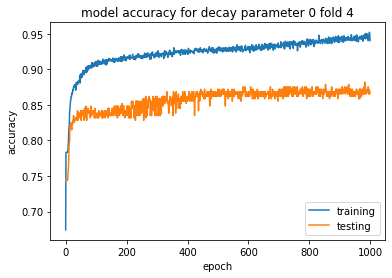

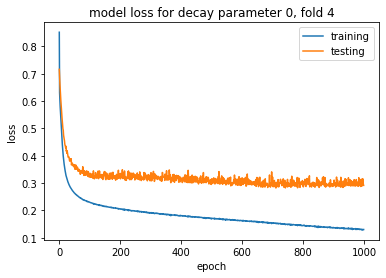

Epoch 1/1000
149/149 - 0s - loss: 0.7250 - accuracy: 0.7733 - val_loss: 0.6420 - val_accuracy: 0.7845
Epoch 2/1000
149/149 - 0s - loss: 0.6475 - accuracy: 0.7733 - val_loss: 0.6189 - val_accuracy: 0.7845
Epoch 3/1000
149/149 - 0s - loss: 0.6251 - accuracy: 0.7733 - val_loss: 0.5996 - val_accuracy: 0.7845
Epoch 4/1000
149/149 - 0s - loss: 0.6036 - accuracy: 0.7733 - val_loss: 0.5829 - val_accuracy: 0.7845
Epoch 5/1000
149/149 - 0s - loss: 0.5847 - accuracy: 0.7733 - val_loss: 0.5627 - val_accuracy: 0.7845
Epoch 6/1000
149/149 - 0s - loss: 0.5648 - accuracy: 0.7733 - val_loss: 0.5470 - val_accuracy: 0.7845
Epoch 7/1000
149/149 - 0s - loss: 0.5464 - accuracy: 0.7733 - val_loss: 0.5286 - val_accuracy: 0.7845
Epoch 8/1000
149/149 - 0s - loss: 0.5281 - accuracy: 0.7733 - val_loss: 0.5126 - val_accuracy: 0.7845
Epoch 9/1000
149/149 - 0s - loss: 0.5116 - accuracy: 0.7741 - val_loss: 0.4980 - val_accuracy: 0.7845
Epoch 10/1000
149/149 - 0s - loss: 0.4955 - accuracy: 0.7741 - val_loss: 0.4821 - 

Epoch 79/1000
149/149 - 0s - loss: 0.2567 - accuracy: 0.8934 - val_loss: 0.2560 - val_accuracy: 0.9125
Epoch 80/1000
149/149 - 0s - loss: 0.2567 - accuracy: 0.8934 - val_loss: 0.2555 - val_accuracy: 0.9125
Epoch 81/1000
149/149 - 0s - loss: 0.2566 - accuracy: 0.8925 - val_loss: 0.2581 - val_accuracy: 0.9125
Epoch 82/1000
149/149 - 0s - loss: 0.2555 - accuracy: 0.8984 - val_loss: 0.2608 - val_accuracy: 0.8990
Epoch 83/1000
149/149 - 0s - loss: 0.2566 - accuracy: 0.8925 - val_loss: 0.2550 - val_accuracy: 0.9125
Epoch 84/1000
149/149 - 0s - loss: 0.2559 - accuracy: 0.8942 - val_loss: 0.2531 - val_accuracy: 0.9091
Epoch 85/1000
149/149 - 0s - loss: 0.2546 - accuracy: 0.8925 - val_loss: 0.2529 - val_accuracy: 0.9125
Epoch 86/1000
149/149 - 0s - loss: 0.2551 - accuracy: 0.8992 - val_loss: 0.2522 - val_accuracy: 0.9125
Epoch 87/1000
149/149 - 0s - loss: 0.2549 - accuracy: 0.8976 - val_loss: 0.2548 - val_accuracy: 0.9091
Epoch 88/1000
149/149 - 0s - loss: 0.2542 - accuracy: 0.8942 - val_loss: 

Epoch 158/1000
149/149 - 0s - loss: 0.2373 - accuracy: 0.9018 - val_loss: 0.2307 - val_accuracy: 0.9158
Epoch 159/1000
149/149 - 0s - loss: 0.2364 - accuracy: 0.9018 - val_loss: 0.2315 - val_accuracy: 0.9125
Epoch 160/1000
149/149 - 0s - loss: 0.2371 - accuracy: 0.9034 - val_loss: 0.2294 - val_accuracy: 0.9158
Epoch 161/1000
149/149 - 0s - loss: 0.2363 - accuracy: 0.9034 - val_loss: 0.2350 - val_accuracy: 0.8889
Epoch 162/1000
149/149 - 0s - loss: 0.2365 - accuracy: 0.8976 - val_loss: 0.2289 - val_accuracy: 0.9091
Epoch 163/1000
149/149 - 0s - loss: 0.2351 - accuracy: 0.9001 - val_loss: 0.2385 - val_accuracy: 0.8889
Epoch 164/1000
149/149 - 0s - loss: 0.2359 - accuracy: 0.8976 - val_loss: 0.2310 - val_accuracy: 0.9125
Epoch 165/1000
149/149 - 0s - loss: 0.2354 - accuracy: 0.9026 - val_loss: 0.2304 - val_accuracy: 0.8990
Epoch 166/1000
149/149 - 0s - loss: 0.2339 - accuracy: 0.9018 - val_loss: 0.2321 - val_accuracy: 0.9125
Epoch 167/1000
149/149 - 0s - loss: 0.2352 - accuracy: 0.9026 - 

Epoch 237/1000
149/149 - 0s - loss: 0.2228 - accuracy: 0.9076 - val_loss: 0.2225 - val_accuracy: 0.8889
Epoch 238/1000
149/149 - 0s - loss: 0.2241 - accuracy: 0.9068 - val_loss: 0.2222 - val_accuracy: 0.8923
Epoch 239/1000
149/149 - 0s - loss: 0.2222 - accuracy: 0.9043 - val_loss: 0.2158 - val_accuracy: 0.9125
Epoch 240/1000
149/149 - 0s - loss: 0.2230 - accuracy: 0.9001 - val_loss: 0.2172 - val_accuracy: 0.9057
Epoch 241/1000
149/149 - 0s - loss: 0.2228 - accuracy: 0.9043 - val_loss: 0.2161 - val_accuracy: 0.9125
Epoch 242/1000
149/149 - 0s - loss: 0.2225 - accuracy: 0.9001 - val_loss: 0.2148 - val_accuracy: 0.9125
Epoch 243/1000
149/149 - 0s - loss: 0.2228 - accuracy: 0.9018 - val_loss: 0.2168 - val_accuracy: 0.9158
Epoch 244/1000
149/149 - 0s - loss: 0.2240 - accuracy: 0.9018 - val_loss: 0.2153 - val_accuracy: 0.9125
Epoch 245/1000
149/149 - 0s - loss: 0.2224 - accuracy: 0.9026 - val_loss: 0.2143 - val_accuracy: 0.9125
Epoch 246/1000
149/149 - 0s - loss: 0.2218 - accuracy: 0.8976 - 

Epoch 316/1000
149/149 - 0s - loss: 0.2107 - accuracy: 0.9060 - val_loss: 0.2068 - val_accuracy: 0.9192
Epoch 317/1000
149/149 - 0s - loss: 0.2106 - accuracy: 0.9093 - val_loss: 0.2074 - val_accuracy: 0.9259
Epoch 318/1000
149/149 - 0s - loss: 0.2110 - accuracy: 0.9093 - val_loss: 0.2095 - val_accuracy: 0.9158
Epoch 319/1000
149/149 - 0s - loss: 0.2102 - accuracy: 0.9060 - val_loss: 0.2107 - val_accuracy: 0.9057
Epoch 320/1000
149/149 - 0s - loss: 0.2114 - accuracy: 0.9060 - val_loss: 0.2092 - val_accuracy: 0.9192
Epoch 321/1000
149/149 - 0s - loss: 0.2099 - accuracy: 0.9051 - val_loss: 0.2122 - val_accuracy: 0.9057
Epoch 322/1000
149/149 - 0s - loss: 0.2095 - accuracy: 0.9085 - val_loss: 0.2136 - val_accuracy: 0.9057
Epoch 323/1000
149/149 - 0s - loss: 0.2093 - accuracy: 0.9102 - val_loss: 0.2069 - val_accuracy: 0.9192
Epoch 324/1000
149/149 - 0s - loss: 0.2098 - accuracy: 0.9093 - val_loss: 0.2077 - val_accuracy: 0.9158
Epoch 325/1000
149/149 - 0s - loss: 0.2081 - accuracy: 0.9110 - 

Epoch 395/1000
149/149 - 0s - loss: 0.1974 - accuracy: 0.9110 - val_loss: 0.2033 - val_accuracy: 0.9125
Epoch 396/1000
149/149 - 0s - loss: 0.1974 - accuracy: 0.9093 - val_loss: 0.2047 - val_accuracy: 0.9158
Epoch 397/1000
149/149 - 0s - loss: 0.1971 - accuracy: 0.9127 - val_loss: 0.2133 - val_accuracy: 0.9091
Epoch 398/1000
149/149 - 0s - loss: 0.1991 - accuracy: 0.9127 - val_loss: 0.2014 - val_accuracy: 0.9259
Epoch 399/1000
149/149 - 0s - loss: 0.1983 - accuracy: 0.9060 - val_loss: 0.2034 - val_accuracy: 0.9125
Epoch 400/1000
149/149 - 0s - loss: 0.1968 - accuracy: 0.9127 - val_loss: 0.2019 - val_accuracy: 0.9192
Epoch 401/1000
149/149 - 0s - loss: 0.1972 - accuracy: 0.9110 - val_loss: 0.2010 - val_accuracy: 0.9259
Epoch 402/1000
149/149 - 0s - loss: 0.1977 - accuracy: 0.9118 - val_loss: 0.2027 - val_accuracy: 0.9226
Epoch 403/1000
149/149 - 0s - loss: 0.1986 - accuracy: 0.9093 - val_loss: 0.2047 - val_accuracy: 0.9158
Epoch 404/1000
149/149 - 0s - loss: 0.1978 - accuracy: 0.9144 - 

Epoch 474/1000
149/149 - 0s - loss: 0.1874 - accuracy: 0.9186 - val_loss: 0.1985 - val_accuracy: 0.9192
Epoch 475/1000
149/149 - 0s - loss: 0.1870 - accuracy: 0.9211 - val_loss: 0.2001 - val_accuracy: 0.9192
Epoch 476/1000
149/149 - 0s - loss: 0.1882 - accuracy: 0.9160 - val_loss: 0.1985 - val_accuracy: 0.9158
Epoch 477/1000
149/149 - 0s - loss: 0.1844 - accuracy: 0.9186 - val_loss: 0.2040 - val_accuracy: 0.9057
Epoch 478/1000
149/149 - 0s - loss: 0.1870 - accuracy: 0.9093 - val_loss: 0.2009 - val_accuracy: 0.9125
Epoch 479/1000
149/149 - 0s - loss: 0.1869 - accuracy: 0.9186 - val_loss: 0.2010 - val_accuracy: 0.9192
Epoch 480/1000
149/149 - 0s - loss: 0.1866 - accuracy: 0.9118 - val_loss: 0.1967 - val_accuracy: 0.9259
Epoch 481/1000
149/149 - 0s - loss: 0.1876 - accuracy: 0.9186 - val_loss: 0.1988 - val_accuracy: 0.9226
Epoch 482/1000
149/149 - 0s - loss: 0.1862 - accuracy: 0.9160 - val_loss: 0.1946 - val_accuracy: 0.9226
Epoch 483/1000
149/149 - 0s - loss: 0.1854 - accuracy: 0.9160 - 

Epoch 553/1000
149/149 - 0s - loss: 0.1778 - accuracy: 0.9219 - val_loss: 0.1950 - val_accuracy: 0.9192
Epoch 554/1000
149/149 - 0s - loss: 0.1781 - accuracy: 0.9211 - val_loss: 0.1942 - val_accuracy: 0.9226
Epoch 555/1000
149/149 - 0s - loss: 0.1783 - accuracy: 0.9211 - val_loss: 0.1944 - val_accuracy: 0.9192
Epoch 556/1000
149/149 - 0s - loss: 0.1772 - accuracy: 0.9228 - val_loss: 0.1936 - val_accuracy: 0.9226
Epoch 557/1000
149/149 - 0s - loss: 0.1776 - accuracy: 0.9228 - val_loss: 0.1933 - val_accuracy: 0.9293
Epoch 558/1000
149/149 - 0s - loss: 0.1774 - accuracy: 0.9202 - val_loss: 0.1989 - val_accuracy: 0.9192
Epoch 559/1000
149/149 - 0s - loss: 0.1779 - accuracy: 0.9228 - val_loss: 0.1995 - val_accuracy: 0.9125
Epoch 560/1000
149/149 - 0s - loss: 0.1763 - accuracy: 0.9194 - val_loss: 0.2006 - val_accuracy: 0.9192
Epoch 561/1000
149/149 - 0s - loss: 0.1768 - accuracy: 0.9236 - val_loss: 0.1940 - val_accuracy: 0.9226
Epoch 562/1000
149/149 - 0s - loss: 0.1765 - accuracy: 0.9177 - 

Epoch 632/1000
149/149 - 0s - loss: 0.1694 - accuracy: 0.9253 - val_loss: 0.1958 - val_accuracy: 0.9192
Epoch 633/1000
149/149 - 0s - loss: 0.1693 - accuracy: 0.9236 - val_loss: 0.1915 - val_accuracy: 0.9226
Epoch 634/1000
149/149 - 0s - loss: 0.1698 - accuracy: 0.9261 - val_loss: 0.1913 - val_accuracy: 0.9226
Epoch 635/1000
149/149 - 0s - loss: 0.1697 - accuracy: 0.9270 - val_loss: 0.1919 - val_accuracy: 0.9259
Epoch 636/1000
149/149 - 0s - loss: 0.1698 - accuracy: 0.9261 - val_loss: 0.1948 - val_accuracy: 0.9192
Epoch 637/1000
149/149 - 0s - loss: 0.1679 - accuracy: 0.9328 - val_loss: 0.1930 - val_accuracy: 0.9226
Epoch 638/1000
149/149 - 0s - loss: 0.1683 - accuracy: 0.9312 - val_loss: 0.1911 - val_accuracy: 0.9226
Epoch 639/1000
149/149 - 0s - loss: 0.1691 - accuracy: 0.9295 - val_loss: 0.1940 - val_accuracy: 0.9192
Epoch 640/1000
149/149 - 0s - loss: 0.1689 - accuracy: 0.9261 - val_loss: 0.2001 - val_accuracy: 0.9192
Epoch 641/1000
149/149 - 0s - loss: 0.1681 - accuracy: 0.9278 - 

Epoch 711/1000
149/149 - 0s - loss: 0.1631 - accuracy: 0.9337 - val_loss: 0.1953 - val_accuracy: 0.9192
Epoch 712/1000
149/149 - 0s - loss: 0.1628 - accuracy: 0.9278 - val_loss: 0.2010 - val_accuracy: 0.9192
Epoch 713/1000
149/149 - 0s - loss: 0.1633 - accuracy: 0.9312 - val_loss: 0.1983 - val_accuracy: 0.9192
Epoch 714/1000
149/149 - 0s - loss: 0.1628 - accuracy: 0.9261 - val_loss: 0.1875 - val_accuracy: 0.9226
Epoch 715/1000
149/149 - 0s - loss: 0.1627 - accuracy: 0.9261 - val_loss: 0.1880 - val_accuracy: 0.9226
Epoch 716/1000
149/149 - 0s - loss: 0.1628 - accuracy: 0.9278 - val_loss: 0.1902 - val_accuracy: 0.9226
Epoch 717/1000
149/149 - 0s - loss: 0.1632 - accuracy: 0.9312 - val_loss: 0.1963 - val_accuracy: 0.9192
Epoch 718/1000
149/149 - 0s - loss: 0.1610 - accuracy: 0.9303 - val_loss: 0.1891 - val_accuracy: 0.9226
Epoch 719/1000
149/149 - 0s - loss: 0.1596 - accuracy: 0.9320 - val_loss: 0.1920 - val_accuracy: 0.9091
Epoch 720/1000
149/149 - 0s - loss: 0.1615 - accuracy: 0.9270 - 

Epoch 790/1000
149/149 - 0s - loss: 0.1562 - accuracy: 0.9345 - val_loss: 0.1910 - val_accuracy: 0.9158
Epoch 791/1000
149/149 - 0s - loss: 0.1567 - accuracy: 0.9312 - val_loss: 0.1891 - val_accuracy: 0.9192
Epoch 792/1000
149/149 - 0s - loss: 0.1575 - accuracy: 0.9295 - val_loss: 0.1990 - val_accuracy: 0.9226
Epoch 793/1000
149/149 - 0s - loss: 0.1569 - accuracy: 0.9353 - val_loss: 0.1885 - val_accuracy: 0.9226
Epoch 794/1000
149/149 - 0s - loss: 0.1545 - accuracy: 0.9337 - val_loss: 0.1914 - val_accuracy: 0.9158
Epoch 795/1000
149/149 - 0s - loss: 0.1558 - accuracy: 0.9345 - val_loss: 0.1909 - val_accuracy: 0.9158
Epoch 796/1000
149/149 - 0s - loss: 0.1565 - accuracy: 0.9328 - val_loss: 0.1852 - val_accuracy: 0.9158
Epoch 797/1000
149/149 - 0s - loss: 0.1553 - accuracy: 0.9337 - val_loss: 0.1868 - val_accuracy: 0.9259
Epoch 798/1000
149/149 - 0s - loss: 0.1542 - accuracy: 0.9362 - val_loss: 0.1877 - val_accuracy: 0.9158
Epoch 799/1000
149/149 - 0s - loss: 0.1541 - accuracy: 0.9379 - 

Epoch 869/1000
149/149 - 0s - loss: 0.1503 - accuracy: 0.9370 - val_loss: 0.1961 - val_accuracy: 0.9125
Epoch 870/1000
149/149 - 0s - loss: 0.1499 - accuracy: 0.9337 - val_loss: 0.2111 - val_accuracy: 0.9158
Epoch 871/1000
149/149 - 0s - loss: 0.1522 - accuracy: 0.9337 - val_loss: 0.1898 - val_accuracy: 0.9158
Epoch 872/1000
149/149 - 0s - loss: 0.1508 - accuracy: 0.9320 - val_loss: 0.1858 - val_accuracy: 0.9125
Epoch 873/1000
149/149 - 0s - loss: 0.1504 - accuracy: 0.9362 - val_loss: 0.1869 - val_accuracy: 0.9158
Epoch 874/1000
149/149 - 0s - loss: 0.1505 - accuracy: 0.9387 - val_loss: 0.1896 - val_accuracy: 0.9192
Epoch 875/1000
149/149 - 0s - loss: 0.1501 - accuracy: 0.9404 - val_loss: 0.2008 - val_accuracy: 0.9192
Epoch 876/1000
149/149 - 0s - loss: 0.1502 - accuracy: 0.9345 - val_loss: 0.1858 - val_accuracy: 0.9192
Epoch 877/1000
149/149 - 0s - loss: 0.1506 - accuracy: 0.9370 - val_loss: 0.1883 - val_accuracy: 0.9259
Epoch 878/1000
149/149 - 0s - loss: 0.1501 - accuracy: 0.9345 - 

Epoch 948/1000
149/149 - 0s - loss: 0.1444 - accuracy: 0.9404 - val_loss: 0.2145 - val_accuracy: 0.9158
Epoch 949/1000
149/149 - 0s - loss: 0.1481 - accuracy: 0.9370 - val_loss: 0.1904 - val_accuracy: 0.9125
Epoch 950/1000
149/149 - 0s - loss: 0.1430 - accuracy: 0.9412 - val_loss: 0.1894 - val_accuracy: 0.9158
Epoch 951/1000
149/149 - 0s - loss: 0.1463 - accuracy: 0.9353 - val_loss: 0.1959 - val_accuracy: 0.9158
Epoch 952/1000
149/149 - 0s - loss: 0.1474 - accuracy: 0.9387 - val_loss: 0.1942 - val_accuracy: 0.9259
Epoch 953/1000
149/149 - 0s - loss: 0.1442 - accuracy: 0.9412 - val_loss: 0.1882 - val_accuracy: 0.9192
Epoch 954/1000
149/149 - 0s - loss: 0.1449 - accuracy: 0.9387 - val_loss: 0.2017 - val_accuracy: 0.9192
Epoch 955/1000
149/149 - 0s - loss: 0.1459 - accuracy: 0.9337 - val_loss: 0.1870 - val_accuracy: 0.9125
Epoch 956/1000
149/149 - 0s - loss: 0.1453 - accuracy: 0.9404 - val_loss: 0.1885 - val_accuracy: 0.9158
Epoch 957/1000
149/149 - 0s - loss: 0.1466 - accuracy: 0.9353 - 

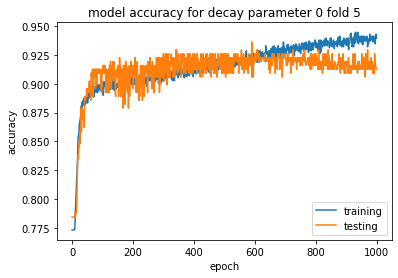

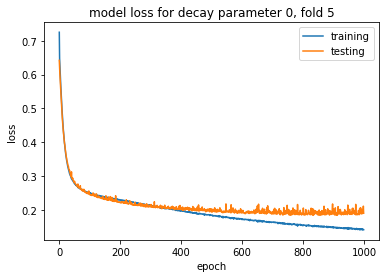

Epoch 1/1000
149/149 - 0s - loss: 0.8230 - accuracy: 0.7120 - val_loss: 0.6344 - val_accuracy: 0.7946
Epoch 2/1000
149/149 - 0s - loss: 0.6359 - accuracy: 0.7708 - val_loss: 0.5861 - val_accuracy: 0.7946
Epoch 3/1000
149/149 - 0s - loss: 0.6014 - accuracy: 0.7708 - val_loss: 0.5584 - val_accuracy: 0.7946
Epoch 4/1000
149/149 - 0s - loss: 0.5742 - accuracy: 0.7708 - val_loss: 0.5359 - val_accuracy: 0.7946
Epoch 5/1000
149/149 - 0s - loss: 0.5501 - accuracy: 0.7775 - val_loss: 0.5166 - val_accuracy: 0.7980
Epoch 6/1000
149/149 - 0s - loss: 0.5278 - accuracy: 0.7817 - val_loss: 0.5013 - val_accuracy: 0.8047
Epoch 7/1000
149/149 - 0s - loss: 0.5088 - accuracy: 0.7951 - val_loss: 0.4860 - val_accuracy: 0.8114
Epoch 8/1000
149/149 - 0s - loss: 0.4916 - accuracy: 0.8044 - val_loss: 0.4689 - val_accuracy: 0.8047
Epoch 9/1000
149/149 - 0s - loss: 0.4770 - accuracy: 0.8119 - val_loss: 0.4560 - val_accuracy: 0.8114
Epoch 10/1000
149/149 - 0s - loss: 0.4625 - accuracy: 0.8178 - val_loss: 0.4448 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2835 - accuracy: 0.8984 - val_loss: 0.2844 - val_accuracy: 0.8923
Epoch 82/1000
149/149 - 0s - loss: 0.2842 - accuracy: 0.8900 - val_loss: 0.2834 - val_accuracy: 0.8990
Epoch 83/1000
149/149 - 0s - loss: 0.2835 - accuracy: 0.8934 - val_loss: 0.2880 - val_accuracy: 0.8956
Epoch 84/1000
149/149 - 0s - loss: 0.2836 - accuracy: 0.8950 - val_loss: 0.2850 - val_accuracy: 0.8889
Epoch 85/1000
149/149 - 0s - loss: 0.2823 - accuracy: 0.8959 - val_loss: 0.2822 - val_accuracy: 0.8956
Epoch 86/1000
149/149 - 0s - loss: 0.2829 - accuracy: 0.8959 - val_loss: 0.2855 - val_accuracy: 0.8956
Epoch 87/1000
149/149 - 0s - loss: 0.2828 - accuracy: 0.8917 - val_loss: 0.2813 - val_accuracy: 0.8990
Epoch 88/1000
149/149 - 0s - loss: 0.2808 - accuracy: 0.8967 - val_loss: 0.2828 - val_accuracy: 0.8923
Epoch 89/1000
149/149 - 0s - loss: 0.2818 - accuracy: 0.8942 - val_loss: 0.2813 - val_accuracy: 0.8956
Epoch 90/1000
149/149 - 0s - loss: 0.2818 - accuracy: 0.8934 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2639 - accuracy: 0.9009 - val_loss: 0.2701 - val_accuracy: 0.8956
Epoch 161/1000
149/149 - 0s - loss: 0.2639 - accuracy: 0.8967 - val_loss: 0.2689 - val_accuracy: 0.8956
Epoch 162/1000
149/149 - 0s - loss: 0.2620 - accuracy: 0.8992 - val_loss: 0.2674 - val_accuracy: 0.9024
Epoch 163/1000
149/149 - 0s - loss: 0.2624 - accuracy: 0.9018 - val_loss: 0.2675 - val_accuracy: 0.8956
Epoch 164/1000
149/149 - 0s - loss: 0.2628 - accuracy: 0.8976 - val_loss: 0.2682 - val_accuracy: 0.8923
Epoch 165/1000
149/149 - 0s - loss: 0.2616 - accuracy: 0.9009 - val_loss: 0.2738 - val_accuracy: 0.8990
Epoch 166/1000
149/149 - 0s - loss: 0.2608 - accuracy: 0.9034 - val_loss: 0.2679 - val_accuracy: 0.8990
Epoch 167/1000
149/149 - 0s - loss: 0.2614 - accuracy: 0.9001 - val_loss: 0.2686 - val_accuracy: 0.8956
Epoch 168/1000
149/149 - 0s - loss: 0.2622 - accuracy: 0.9018 - val_loss: 0.2677 - val_accuracy: 0.8956
Epoch 169/1000
149/149 - 0s - loss: 0.2613 - accuracy: 0.8984 - 

Epoch 239/1000
149/149 - 0s - loss: 0.2488 - accuracy: 0.9093 - val_loss: 0.2613 - val_accuracy: 0.8990
Epoch 240/1000
149/149 - 0s - loss: 0.2484 - accuracy: 0.9152 - val_loss: 0.2744 - val_accuracy: 0.9091
Epoch 241/1000
149/149 - 0s - loss: 0.2508 - accuracy: 0.9051 - val_loss: 0.2613 - val_accuracy: 0.9024
Epoch 242/1000
149/149 - 0s - loss: 0.2487 - accuracy: 0.9026 - val_loss: 0.2651 - val_accuracy: 0.9057
Epoch 243/1000
149/149 - 0s - loss: 0.2504 - accuracy: 0.9009 - val_loss: 0.2588 - val_accuracy: 0.8956
Epoch 244/1000
149/149 - 0s - loss: 0.2507 - accuracy: 0.9018 - val_loss: 0.2611 - val_accuracy: 0.9024
Epoch 245/1000
149/149 - 0s - loss: 0.2483 - accuracy: 0.9085 - val_loss: 0.2616 - val_accuracy: 0.9091
Epoch 246/1000
149/149 - 0s - loss: 0.2497 - accuracy: 0.9076 - val_loss: 0.2648 - val_accuracy: 0.9024
Epoch 247/1000
149/149 - 0s - loss: 0.2475 - accuracy: 0.9076 - val_loss: 0.2585 - val_accuracy: 0.8990
Epoch 248/1000
149/149 - 0s - loss: 0.2488 - accuracy: 0.9118 - 

Epoch 318/1000
149/149 - 0s - loss: 0.2413 - accuracy: 0.9076 - val_loss: 0.2552 - val_accuracy: 0.8990
Epoch 319/1000
149/149 - 0s - loss: 0.2422 - accuracy: 0.9110 - val_loss: 0.2563 - val_accuracy: 0.9057
Epoch 320/1000
149/149 - 0s - loss: 0.2416 - accuracy: 0.9118 - val_loss: 0.2608 - val_accuracy: 0.9024
Epoch 321/1000
149/149 - 0s - loss: 0.2407 - accuracy: 0.9093 - val_loss: 0.2609 - val_accuracy: 0.9024
Epoch 322/1000
149/149 - 0s - loss: 0.2423 - accuracy: 0.9060 - val_loss: 0.2583 - val_accuracy: 0.9091
Epoch 323/1000
149/149 - 0s - loss: 0.2408 - accuracy: 0.9076 - val_loss: 0.2607 - val_accuracy: 0.9024
Epoch 324/1000
149/149 - 0s - loss: 0.2418 - accuracy: 0.9076 - val_loss: 0.2556 - val_accuracy: 0.8956
Epoch 325/1000
149/149 - 0s - loss: 0.2425 - accuracy: 0.9110 - val_loss: 0.2569 - val_accuracy: 0.9024
Epoch 326/1000
149/149 - 0s - loss: 0.2429 - accuracy: 0.9118 - val_loss: 0.2579 - val_accuracy: 0.9057
Epoch 327/1000
149/149 - 0s - loss: 0.2410 - accuracy: 0.9060 - 

Epoch 397/1000
149/149 - 0s - loss: 0.2358 - accuracy: 0.9076 - val_loss: 0.2543 - val_accuracy: 0.9057
Epoch 398/1000
149/149 - 0s - loss: 0.2358 - accuracy: 0.9152 - val_loss: 0.2529 - val_accuracy: 0.8956
Epoch 399/1000
149/149 - 0s - loss: 0.2367 - accuracy: 0.9102 - val_loss: 0.2505 - val_accuracy: 0.8956
Epoch 400/1000
149/149 - 0s - loss: 0.2333 - accuracy: 0.9135 - val_loss: 0.2522 - val_accuracy: 0.8990
Epoch 401/1000
149/149 - 0s - loss: 0.2363 - accuracy: 0.9127 - val_loss: 0.2531 - val_accuracy: 0.8990
Epoch 402/1000
149/149 - 0s - loss: 0.2365 - accuracy: 0.9093 - val_loss: 0.2510 - val_accuracy: 0.8956
Epoch 403/1000
149/149 - 0s - loss: 0.2349 - accuracy: 0.9144 - val_loss: 0.2519 - val_accuracy: 0.8956
Epoch 404/1000
149/149 - 0s - loss: 0.2344 - accuracy: 0.9093 - val_loss: 0.2547 - val_accuracy: 0.9057
Epoch 405/1000
149/149 - 0s - loss: 0.2346 - accuracy: 0.9043 - val_loss: 0.2506 - val_accuracy: 0.8990
Epoch 406/1000
149/149 - 0s - loss: 0.2344 - accuracy: 0.9085 - 

Epoch 476/1000
149/149 - 0s - loss: 0.2309 - accuracy: 0.9135 - val_loss: 0.2508 - val_accuracy: 0.9057
Epoch 477/1000
149/149 - 0s - loss: 0.2303 - accuracy: 0.9135 - val_loss: 0.2538 - val_accuracy: 0.8990
Epoch 478/1000
149/149 - 0s - loss: 0.2315 - accuracy: 0.9135 - val_loss: 0.2480 - val_accuracy: 0.8956
Epoch 479/1000
149/149 - 0s - loss: 0.2312 - accuracy: 0.9110 - val_loss: 0.2499 - val_accuracy: 0.8956
Epoch 480/1000
149/149 - 0s - loss: 0.2301 - accuracy: 0.9110 - val_loss: 0.2475 - val_accuracy: 0.8923
Epoch 481/1000
149/149 - 0s - loss: 0.2288 - accuracy: 0.9135 - val_loss: 0.2528 - val_accuracy: 0.9091
Epoch 482/1000
149/149 - 0s - loss: 0.2317 - accuracy: 0.9118 - val_loss: 0.2501 - val_accuracy: 0.8956
Epoch 483/1000
149/149 - 0s - loss: 0.2293 - accuracy: 0.9152 - val_loss: 0.2477 - val_accuracy: 0.8990
Epoch 484/1000
149/149 - 0s - loss: 0.2301 - accuracy: 0.9110 - val_loss: 0.2501 - val_accuracy: 0.8923
Epoch 485/1000
149/149 - 0s - loss: 0.2311 - accuracy: 0.9127 - 

Epoch 555/1000
149/149 - 0s - loss: 0.2254 - accuracy: 0.9160 - val_loss: 0.2475 - val_accuracy: 0.8956
Epoch 556/1000
149/149 - 0s - loss: 0.2265 - accuracy: 0.9160 - val_loss: 0.2499 - val_accuracy: 0.8889
Epoch 557/1000
149/149 - 0s - loss: 0.2272 - accuracy: 0.9102 - val_loss: 0.2495 - val_accuracy: 0.9091
Epoch 558/1000
149/149 - 0s - loss: 0.2277 - accuracy: 0.9135 - val_loss: 0.2482 - val_accuracy: 0.8956
Epoch 559/1000
149/149 - 0s - loss: 0.2273 - accuracy: 0.9144 - val_loss: 0.2495 - val_accuracy: 0.8923
Epoch 560/1000
149/149 - 0s - loss: 0.2269 - accuracy: 0.9144 - val_loss: 0.2448 - val_accuracy: 0.8889
Epoch 561/1000
149/149 - 0s - loss: 0.2264 - accuracy: 0.9110 - val_loss: 0.2547 - val_accuracy: 0.9057
Epoch 562/1000
149/149 - 0s - loss: 0.2271 - accuracy: 0.9110 - val_loss: 0.2480 - val_accuracy: 0.8923
Epoch 563/1000
149/149 - 0s - loss: 0.2257 - accuracy: 0.9219 - val_loss: 0.2456 - val_accuracy: 0.8956
Epoch 564/1000
149/149 - 0s - loss: 0.2273 - accuracy: 0.9152 - 

Epoch 634/1000
149/149 - 0s - loss: 0.2229 - accuracy: 0.9152 - val_loss: 0.2442 - val_accuracy: 0.8956
Epoch 635/1000
149/149 - 0s - loss: 0.2235 - accuracy: 0.9160 - val_loss: 0.2529 - val_accuracy: 0.8990
Epoch 636/1000
149/149 - 0s - loss: 0.2237 - accuracy: 0.9160 - val_loss: 0.2448 - val_accuracy: 0.8855
Epoch 637/1000
149/149 - 0s - loss: 0.2246 - accuracy: 0.9177 - val_loss: 0.2538 - val_accuracy: 0.8956
Epoch 638/1000
149/149 - 0s - loss: 0.2216 - accuracy: 0.9186 - val_loss: 0.2538 - val_accuracy: 0.9158
Epoch 639/1000
149/149 - 0s - loss: 0.2239 - accuracy: 0.9152 - val_loss: 0.2450 - val_accuracy: 0.8923
Epoch 640/1000
149/149 - 0s - loss: 0.2220 - accuracy: 0.9177 - val_loss: 0.2425 - val_accuracy: 0.8923
Epoch 641/1000
149/149 - 0s - loss: 0.2235 - accuracy: 0.9194 - val_loss: 0.2416 - val_accuracy: 0.8923
Epoch 642/1000
149/149 - 0s - loss: 0.2243 - accuracy: 0.9144 - val_loss: 0.2440 - val_accuracy: 0.8923
Epoch 643/1000
149/149 - 0s - loss: 0.2228 - accuracy: 0.9169 - 

Epoch 713/1000
149/149 - 0s - loss: 0.2194 - accuracy: 0.9219 - val_loss: 0.2478 - val_accuracy: 0.8990
Epoch 714/1000
149/149 - 0s - loss: 0.2215 - accuracy: 0.9169 - val_loss: 0.2441 - val_accuracy: 0.8956
Epoch 715/1000
149/149 - 0s - loss: 0.2208 - accuracy: 0.9144 - val_loss: 0.2436 - val_accuracy: 0.9024
Epoch 716/1000
149/149 - 0s - loss: 0.2207 - accuracy: 0.9160 - val_loss: 0.2438 - val_accuracy: 0.8956
Epoch 717/1000
149/149 - 0s - loss: 0.2164 - accuracy: 0.9278 - val_loss: 0.2578 - val_accuracy: 0.8990
Epoch 718/1000
149/149 - 0s - loss: 0.2224 - accuracy: 0.9194 - val_loss: 0.2424 - val_accuracy: 0.8923
Epoch 719/1000
149/149 - 0s - loss: 0.2178 - accuracy: 0.9152 - val_loss: 0.2452 - val_accuracy: 0.8923
Epoch 720/1000
149/149 - 0s - loss: 0.2225 - accuracy: 0.9219 - val_loss: 0.2475 - val_accuracy: 0.8990
Epoch 721/1000
149/149 - 0s - loss: 0.2195 - accuracy: 0.9135 - val_loss: 0.2425 - val_accuracy: 0.8889
Epoch 722/1000
149/149 - 0s - loss: 0.2208 - accuracy: 0.9127 - 

Epoch 792/1000
149/149 - 0s - loss: 0.2201 - accuracy: 0.9194 - val_loss: 0.2409 - val_accuracy: 0.8889
Epoch 793/1000
149/149 - 0s - loss: 0.2191 - accuracy: 0.9177 - val_loss: 0.2396 - val_accuracy: 0.8956
Epoch 794/1000
149/149 - 0s - loss: 0.2211 - accuracy: 0.9160 - val_loss: 0.2409 - val_accuracy: 0.8923
Epoch 795/1000
149/149 - 0s - loss: 0.2176 - accuracy: 0.9169 - val_loss: 0.2409 - val_accuracy: 0.8956
Epoch 796/1000
149/149 - 0s - loss: 0.2190 - accuracy: 0.9186 - val_loss: 0.2446 - val_accuracy: 0.8956
Epoch 797/1000
149/149 - 0s - loss: 0.2183 - accuracy: 0.9169 - val_loss: 0.2411 - val_accuracy: 0.8923
Epoch 798/1000
149/149 - 0s - loss: 0.2190 - accuracy: 0.9169 - val_loss: 0.2493 - val_accuracy: 0.9024
Epoch 799/1000
149/149 - 0s - loss: 0.2183 - accuracy: 0.9160 - val_loss: 0.2447 - val_accuracy: 0.8889
Epoch 800/1000
149/149 - 0s - loss: 0.2166 - accuracy: 0.9160 - val_loss: 0.2390 - val_accuracy: 0.8956
Epoch 801/1000
149/149 - 0s - loss: 0.2189 - accuracy: 0.9211 - 

Epoch 871/1000
149/149 - 0s - loss: 0.2174 - accuracy: 0.9169 - val_loss: 0.2440 - val_accuracy: 0.9024
Epoch 872/1000
149/149 - 0s - loss: 0.2155 - accuracy: 0.9219 - val_loss: 0.2384 - val_accuracy: 0.8889
Epoch 873/1000
149/149 - 0s - loss: 0.2156 - accuracy: 0.9211 - val_loss: 0.2391 - val_accuracy: 0.8956
Epoch 874/1000
149/149 - 0s - loss: 0.2154 - accuracy: 0.9219 - val_loss: 0.2407 - val_accuracy: 0.8923
Epoch 875/1000
149/149 - 0s - loss: 0.2166 - accuracy: 0.9202 - val_loss: 0.2486 - val_accuracy: 0.9192
Epoch 876/1000
149/149 - 0s - loss: 0.2169 - accuracy: 0.9219 - val_loss: 0.2385 - val_accuracy: 0.8923
Epoch 877/1000
149/149 - 0s - loss: 0.2171 - accuracy: 0.9160 - val_loss: 0.2380 - val_accuracy: 0.8956
Epoch 878/1000
149/149 - 0s - loss: 0.2176 - accuracy: 0.9177 - val_loss: 0.2392 - val_accuracy: 0.8923
Epoch 879/1000
149/149 - 0s - loss: 0.2158 - accuracy: 0.9219 - val_loss: 0.2417 - val_accuracy: 0.8956
Epoch 880/1000
149/149 - 0s - loss: 0.2170 - accuracy: 0.9177 - 

Epoch 950/1000
149/149 - 0s - loss: 0.2147 - accuracy: 0.9177 - val_loss: 0.2384 - val_accuracy: 0.8956
Epoch 951/1000
149/149 - 0s - loss: 0.2121 - accuracy: 0.9186 - val_loss: 0.2389 - val_accuracy: 0.8956
Epoch 952/1000
149/149 - 0s - loss: 0.2139 - accuracy: 0.9228 - val_loss: 0.2520 - val_accuracy: 0.9158
Epoch 953/1000
149/149 - 0s - loss: 0.2161 - accuracy: 0.9177 - val_loss: 0.2374 - val_accuracy: 0.8855
Epoch 954/1000
149/149 - 0s - loss: 0.2096 - accuracy: 0.9278 - val_loss: 0.2375 - val_accuracy: 0.8923
Epoch 955/1000
149/149 - 0s - loss: 0.2155 - accuracy: 0.9211 - val_loss: 0.2359 - val_accuracy: 0.8956
Epoch 956/1000
149/149 - 0s - loss: 0.2116 - accuracy: 0.9152 - val_loss: 0.2373 - val_accuracy: 0.8923
Epoch 957/1000
149/149 - 0s - loss: 0.2124 - accuracy: 0.9244 - val_loss: 0.2420 - val_accuracy: 0.8923
Epoch 958/1000
149/149 - 0s - loss: 0.2120 - accuracy: 0.9236 - val_loss: 0.2418 - val_accuracy: 0.8956
Epoch 959/1000
149/149 - 0s - loss: 0.2138 - accuracy: 0.9211 - 

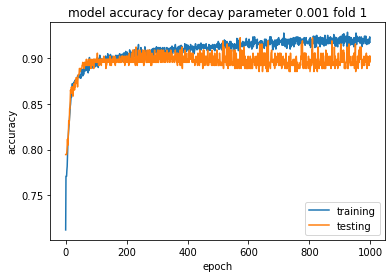

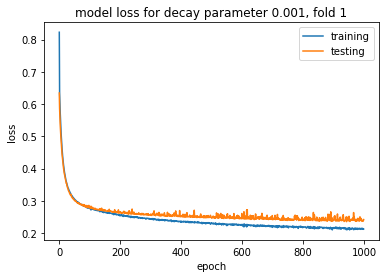

Epoch 1/1000
149/149 - 0s - loss: 0.7935 - accuracy: 0.7086 - val_loss: 0.7129 - val_accuracy: 0.7576
Epoch 2/1000
149/149 - 0s - loss: 0.6686 - accuracy: 0.7800 - val_loss: 0.6787 - val_accuracy: 0.7576
Epoch 3/1000
149/149 - 0s - loss: 0.6415 - accuracy: 0.7800 - val_loss: 0.6507 - val_accuracy: 0.7576
Epoch 4/1000
149/149 - 0s - loss: 0.6173 - accuracy: 0.7809 - val_loss: 0.6226 - val_accuracy: 0.7609
Epoch 5/1000
149/149 - 0s - loss: 0.5939 - accuracy: 0.7809 - val_loss: 0.5956 - val_accuracy: 0.7643
Epoch 6/1000
149/149 - 0s - loss: 0.5709 - accuracy: 0.7817 - val_loss: 0.5690 - val_accuracy: 0.7643
Epoch 7/1000
149/149 - 0s - loss: 0.5490 - accuracy: 0.7817 - val_loss: 0.5453 - val_accuracy: 0.7643
Epoch 8/1000
149/149 - 0s - loss: 0.5294 - accuracy: 0.7851 - val_loss: 0.5229 - val_accuracy: 0.7643
Epoch 9/1000
149/149 - 0s - loss: 0.5114 - accuracy: 0.7859 - val_loss: 0.5015 - val_accuracy: 0.7912
Epoch 10/1000
149/149 - 0s - loss: 0.4944 - accuracy: 0.7968 - val_loss: 0.4820 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2816 - accuracy: 0.8917 - val_loss: 0.2937 - val_accuracy: 0.9125
Epoch 82/1000
149/149 - 0s - loss: 0.2807 - accuracy: 0.8892 - val_loss: 0.2860 - val_accuracy: 0.9091
Epoch 83/1000
149/149 - 0s - loss: 0.2801 - accuracy: 0.8959 - val_loss: 0.2856 - val_accuracy: 0.8990
Epoch 84/1000
149/149 - 0s - loss: 0.2794 - accuracy: 0.8934 - val_loss: 0.2864 - val_accuracy: 0.8990
Epoch 85/1000
149/149 - 0s - loss: 0.2776 - accuracy: 0.8959 - val_loss: 0.2845 - val_accuracy: 0.9057
Epoch 86/1000
149/149 - 0s - loss: 0.2793 - accuracy: 0.8917 - val_loss: 0.2860 - val_accuracy: 0.9091
Epoch 87/1000
149/149 - 0s - loss: 0.2782 - accuracy: 0.8908 - val_loss: 0.2895 - val_accuracy: 0.9125
Epoch 88/1000
149/149 - 0s - loss: 0.2764 - accuracy: 0.8959 - val_loss: 0.2875 - val_accuracy: 0.9091
Epoch 89/1000
149/149 - 0s - loss: 0.2775 - accuracy: 0.8925 - val_loss: 0.2862 - val_accuracy: 0.9091
Epoch 90/1000
149/149 - 0s - loss: 0.2771 - accuracy: 0.8950 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2577 - accuracy: 0.8992 - val_loss: 0.2773 - val_accuracy: 0.9024
Epoch 161/1000
149/149 - 0s - loss: 0.2572 - accuracy: 0.9026 - val_loss: 0.2847 - val_accuracy: 0.9091
Epoch 162/1000
149/149 - 0s - loss: 0.2561 - accuracy: 0.9001 - val_loss: 0.2769 - val_accuracy: 0.9024
Epoch 163/1000
149/149 - 0s - loss: 0.2562 - accuracy: 0.9026 - val_loss: 0.2772 - val_accuracy: 0.9057
Epoch 164/1000
149/149 - 0s - loss: 0.2574 - accuracy: 0.8984 - val_loss: 0.2761 - val_accuracy: 0.9057
Epoch 165/1000
149/149 - 0s - loss: 0.2551 - accuracy: 0.8984 - val_loss: 0.2841 - val_accuracy: 0.8956
Epoch 166/1000
149/149 - 0s - loss: 0.2540 - accuracy: 0.8959 - val_loss: 0.2843 - val_accuracy: 0.8990
Epoch 167/1000
149/149 - 0s - loss: 0.2548 - accuracy: 0.9051 - val_loss: 0.2795 - val_accuracy: 0.8990
Epoch 168/1000
149/149 - 0s - loss: 0.2551 - accuracy: 0.9001 - val_loss: 0.2753 - val_accuracy: 0.8990
Epoch 169/1000
149/149 - 0s - loss: 0.2557 - accuracy: 0.8942 - 

Epoch 239/1000
149/149 - 0s - loss: 0.2420 - accuracy: 0.9009 - val_loss: 0.2657 - val_accuracy: 0.9091
Epoch 240/1000
149/149 - 0s - loss: 0.2416 - accuracy: 0.9110 - val_loss: 0.2812 - val_accuracy: 0.8889
Epoch 241/1000
149/149 - 0s - loss: 0.2436 - accuracy: 0.9085 - val_loss: 0.2703 - val_accuracy: 0.9091
Epoch 242/1000
149/149 - 0s - loss: 0.2420 - accuracy: 0.9043 - val_loss: 0.2641 - val_accuracy: 0.9057
Epoch 243/1000
149/149 - 0s - loss: 0.2427 - accuracy: 0.9026 - val_loss: 0.2711 - val_accuracy: 0.9024
Epoch 244/1000
149/149 - 0s - loss: 0.2436 - accuracy: 0.9018 - val_loss: 0.2700 - val_accuracy: 0.9024
Epoch 245/1000
149/149 - 0s - loss: 0.2401 - accuracy: 0.9060 - val_loss: 0.2612 - val_accuracy: 0.9158
Epoch 246/1000
149/149 - 0s - loss: 0.2433 - accuracy: 0.9034 - val_loss: 0.2731 - val_accuracy: 0.8990
Epoch 247/1000
149/149 - 0s - loss: 0.2400 - accuracy: 0.9068 - val_loss: 0.2771 - val_accuracy: 0.8956
Epoch 248/1000
149/149 - 0s - loss: 0.2414 - accuracy: 0.9068 - 

Epoch 318/1000
149/149 - 0s - loss: 0.2335 - accuracy: 0.9118 - val_loss: 0.2748 - val_accuracy: 0.8855
Epoch 319/1000
149/149 - 0s - loss: 0.2340 - accuracy: 0.9118 - val_loss: 0.2610 - val_accuracy: 0.9091
Epoch 320/1000
149/149 - 0s - loss: 0.2335 - accuracy: 0.9118 - val_loss: 0.2719 - val_accuracy: 0.9057
Epoch 321/1000
149/149 - 0s - loss: 0.2340 - accuracy: 0.9093 - val_loss: 0.2604 - val_accuracy: 0.9024
Epoch 322/1000
149/149 - 0s - loss: 0.2356 - accuracy: 0.9026 - val_loss: 0.2640 - val_accuracy: 0.9057
Epoch 323/1000
149/149 - 0s - loss: 0.2341 - accuracy: 0.9068 - val_loss: 0.2694 - val_accuracy: 0.8923
Epoch 324/1000
149/149 - 0s - loss: 0.2329 - accuracy: 0.9068 - val_loss: 0.2617 - val_accuracy: 0.9057
Epoch 325/1000
149/149 - 0s - loss: 0.2333 - accuracy: 0.9110 - val_loss: 0.2646 - val_accuracy: 0.8990
Epoch 326/1000
149/149 - 0s - loss: 0.2346 - accuracy: 0.9026 - val_loss: 0.2644 - val_accuracy: 0.9024
Epoch 327/1000
149/149 - 0s - loss: 0.2323 - accuracy: 0.9060 - 

Epoch 397/1000
149/149 - 0s - loss: 0.2273 - accuracy: 0.9194 - val_loss: 0.2569 - val_accuracy: 0.9091
Epoch 398/1000
149/149 - 0s - loss: 0.2261 - accuracy: 0.9102 - val_loss: 0.2545 - val_accuracy: 0.9158
Epoch 399/1000
149/149 - 0s - loss: 0.2286 - accuracy: 0.9110 - val_loss: 0.2626 - val_accuracy: 0.8956
Epoch 400/1000
149/149 - 0s - loss: 0.2246 - accuracy: 0.9118 - val_loss: 0.2602 - val_accuracy: 0.8990
Epoch 401/1000
149/149 - 0s - loss: 0.2244 - accuracy: 0.9186 - val_loss: 0.2815 - val_accuracy: 0.8822
Epoch 402/1000
149/149 - 0s - loss: 0.2259 - accuracy: 0.9093 - val_loss: 0.2617 - val_accuracy: 0.9024
Epoch 403/1000
149/149 - 0s - loss: 0.2251 - accuracy: 0.9110 - val_loss: 0.2662 - val_accuracy: 0.8990
Epoch 404/1000
149/149 - 0s - loss: 0.2261 - accuracy: 0.9144 - val_loss: 0.2797 - val_accuracy: 0.8855
Epoch 405/1000
149/149 - 0s - loss: 0.2251 - accuracy: 0.9051 - val_loss: 0.2669 - val_accuracy: 0.8923
Epoch 406/1000
149/149 - 0s - loss: 0.2269 - accuracy: 0.9144 - 

Epoch 476/1000
149/149 - 0s - loss: 0.2212 - accuracy: 0.9186 - val_loss: 0.2588 - val_accuracy: 0.9024
Epoch 477/1000
149/149 - 0s - loss: 0.2188 - accuracy: 0.9228 - val_loss: 0.2502 - val_accuracy: 0.9226
Epoch 478/1000
149/149 - 0s - loss: 0.2199 - accuracy: 0.9228 - val_loss: 0.2615 - val_accuracy: 0.8956
Epoch 479/1000
149/149 - 0s - loss: 0.2205 - accuracy: 0.9177 - val_loss: 0.2541 - val_accuracy: 0.9158
Epoch 480/1000
149/149 - 0s - loss: 0.2192 - accuracy: 0.9152 - val_loss: 0.2783 - val_accuracy: 0.8889
Epoch 481/1000
149/149 - 0s - loss: 0.2206 - accuracy: 0.9152 - val_loss: 0.2534 - val_accuracy: 0.9125
Epoch 482/1000
149/149 - 0s - loss: 0.2188 - accuracy: 0.9093 - val_loss: 0.2790 - val_accuracy: 0.8889
Epoch 483/1000
149/149 - 0s - loss: 0.2191 - accuracy: 0.9144 - val_loss: 0.2642 - val_accuracy: 0.9024
Epoch 484/1000
149/149 - 0s - loss: 0.2210 - accuracy: 0.9127 - val_loss: 0.2516 - val_accuracy: 0.9226
Epoch 485/1000
149/149 - 0s - loss: 0.2213 - accuracy: 0.9127 - 

Epoch 555/1000
149/149 - 0s - loss: 0.2161 - accuracy: 0.9228 - val_loss: 0.2534 - val_accuracy: 0.9158
Epoch 556/1000
149/149 - 0s - loss: 0.2162 - accuracy: 0.9118 - val_loss: 0.2678 - val_accuracy: 0.8956
Epoch 557/1000
149/149 - 0s - loss: 0.2175 - accuracy: 0.9160 - val_loss: 0.2669 - val_accuracy: 0.8990
Epoch 558/1000
149/149 - 0s - loss: 0.2175 - accuracy: 0.9093 - val_loss: 0.2470 - val_accuracy: 0.9192
Epoch 559/1000
149/149 - 0s - loss: 0.2153 - accuracy: 0.9186 - val_loss: 0.2668 - val_accuracy: 0.9024
Epoch 560/1000
149/149 - 0s - loss: 0.2147 - accuracy: 0.9211 - val_loss: 0.2612 - val_accuracy: 0.9024
Epoch 561/1000
149/149 - 0s - loss: 0.2162 - accuracy: 0.9118 - val_loss: 0.2640 - val_accuracy: 0.9057
Epoch 562/1000
149/149 - 0s - loss: 0.2142 - accuracy: 0.9160 - val_loss: 0.2534 - val_accuracy: 0.9192
Epoch 563/1000
149/149 - 0s - loss: 0.2152 - accuracy: 0.9186 - val_loss: 0.2456 - val_accuracy: 0.9192
Epoch 564/1000
149/149 - 0s - loss: 0.2174 - accuracy: 0.9186 - 

Epoch 634/1000
149/149 - 0s - loss: 0.2119 - accuracy: 0.9219 - val_loss: 0.2534 - val_accuracy: 0.9091
Epoch 635/1000
149/149 - 0s - loss: 0.2115 - accuracy: 0.9211 - val_loss: 0.2564 - val_accuracy: 0.9158
Epoch 636/1000
149/149 - 0s - loss: 0.2116 - accuracy: 0.9169 - val_loss: 0.2454 - val_accuracy: 0.9293
Epoch 637/1000
149/149 - 0s - loss: 0.2128 - accuracy: 0.9253 - val_loss: 0.2479 - val_accuracy: 0.9226
Epoch 638/1000
149/149 - 0s - loss: 0.2100 - accuracy: 0.9202 - val_loss: 0.2591 - val_accuracy: 0.9057
Epoch 639/1000
149/149 - 0s - loss: 0.2132 - accuracy: 0.9169 - val_loss: 0.2460 - val_accuracy: 0.9259
Epoch 640/1000
149/149 - 0s - loss: 0.2101 - accuracy: 0.9177 - val_loss: 0.2618 - val_accuracy: 0.8923
Epoch 641/1000
149/149 - 0s - loss: 0.2107 - accuracy: 0.9261 - val_loss: 0.2501 - val_accuracy: 0.9024
Epoch 642/1000
149/149 - 0s - loss: 0.2116 - accuracy: 0.9194 - val_loss: 0.2598 - val_accuracy: 0.9158
Epoch 643/1000
149/149 - 0s - loss: 0.2103 - accuracy: 0.9152 - 

Epoch 713/1000
149/149 - 0s - loss: 0.2083 - accuracy: 0.9186 - val_loss: 0.2502 - val_accuracy: 0.9057
Epoch 714/1000
149/149 - 0s - loss: 0.2089 - accuracy: 0.9202 - val_loss: 0.2492 - val_accuracy: 0.9125
Epoch 715/1000
149/149 - 0s - loss: 0.2098 - accuracy: 0.9135 - val_loss: 0.2540 - val_accuracy: 0.9125
Epoch 716/1000
149/149 - 0s - loss: 0.2074 - accuracy: 0.9244 - val_loss: 0.2482 - val_accuracy: 0.9158
Epoch 717/1000
149/149 - 0s - loss: 0.2105 - accuracy: 0.9177 - val_loss: 0.2481 - val_accuracy: 0.9125
Epoch 718/1000
149/149 - 0s - loss: 0.2095 - accuracy: 0.9177 - val_loss: 0.2469 - val_accuracy: 0.9158
Epoch 719/1000
149/149 - 0s - loss: 0.2070 - accuracy: 0.9186 - val_loss: 0.2580 - val_accuracy: 0.9192
Epoch 720/1000
149/149 - 0s - loss: 0.2091 - accuracy: 0.9211 - val_loss: 0.2576 - val_accuracy: 0.9091
Epoch 721/1000
149/149 - 0s - loss: 0.2089 - accuracy: 0.9228 - val_loss: 0.2604 - val_accuracy: 0.9091
Epoch 722/1000
149/149 - 0s - loss: 0.2096 - accuracy: 0.9228 - 

Epoch 792/1000
149/149 - 0s - loss: 0.2069 - accuracy: 0.9194 - val_loss: 0.2410 - val_accuracy: 0.9192
Epoch 793/1000
149/149 - 0s - loss: 0.2043 - accuracy: 0.9228 - val_loss: 0.2526 - val_accuracy: 0.9057
Epoch 794/1000
149/149 - 0s - loss: 0.2072 - accuracy: 0.9219 - val_loss: 0.2559 - val_accuracy: 0.9125
Epoch 795/1000
149/149 - 0s - loss: 0.2049 - accuracy: 0.9194 - val_loss: 0.2543 - val_accuracy: 0.9057
Epoch 796/1000
149/149 - 0s - loss: 0.2051 - accuracy: 0.9219 - val_loss: 0.2445 - val_accuracy: 0.9226
Epoch 797/1000
149/149 - 0s - loss: 0.2037 - accuracy: 0.9228 - val_loss: 0.2611 - val_accuracy: 0.9024
Epoch 798/1000
149/149 - 0s - loss: 0.2060 - accuracy: 0.9236 - val_loss: 0.2664 - val_accuracy: 0.9057
Epoch 799/1000
149/149 - 0s - loss: 0.2046 - accuracy: 0.9194 - val_loss: 0.2349 - val_accuracy: 0.9259
Epoch 800/1000
149/149 - 0s - loss: 0.2059 - accuracy: 0.9228 - val_loss: 0.2551 - val_accuracy: 0.9158
Epoch 801/1000
149/149 - 0s - loss: 0.2060 - accuracy: 0.9194 - 

Epoch 871/1000
149/149 - 0s - loss: 0.2017 - accuracy: 0.9261 - val_loss: 0.2347 - val_accuracy: 0.9293
Epoch 872/1000
149/149 - 0s - loss: 0.2015 - accuracy: 0.9278 - val_loss: 0.2438 - val_accuracy: 0.9226
Epoch 873/1000
149/149 - 0s - loss: 0.2024 - accuracy: 0.9228 - val_loss: 0.2437 - val_accuracy: 0.9259
Epoch 874/1000
149/149 - 0s - loss: 0.2034 - accuracy: 0.9219 - val_loss: 0.2318 - val_accuracy: 0.9327
Epoch 875/1000
149/149 - 0s - loss: 0.2023 - accuracy: 0.9194 - val_loss: 0.2587 - val_accuracy: 0.9158
Epoch 876/1000
149/149 - 0s - loss: 0.2022 - accuracy: 0.9270 - val_loss: 0.2504 - val_accuracy: 0.9125
Epoch 877/1000
149/149 - 0s - loss: 0.2046 - accuracy: 0.9211 - val_loss: 0.2400 - val_accuracy: 0.9192
Epoch 878/1000
149/149 - 0s - loss: 0.2045 - accuracy: 0.9236 - val_loss: 0.2368 - val_accuracy: 0.9259
Epoch 879/1000
149/149 - 0s - loss: 0.2040 - accuracy: 0.9194 - val_loss: 0.2445 - val_accuracy: 0.9091
Epoch 880/1000
149/149 - 0s - loss: 0.2042 - accuracy: 0.9253 - 

Epoch 950/1000
149/149 - 0s - loss: 0.1991 - accuracy: 0.9202 - val_loss: 0.2607 - val_accuracy: 0.9091
Epoch 951/1000
149/149 - 0s - loss: 0.2005 - accuracy: 0.9253 - val_loss: 0.2769 - val_accuracy: 0.8889
Epoch 952/1000
149/149 - 0s - loss: 0.1983 - accuracy: 0.9244 - val_loss: 0.2680 - val_accuracy: 0.9057
Epoch 953/1000
149/149 - 0s - loss: 0.2006 - accuracy: 0.9244 - val_loss: 0.2657 - val_accuracy: 0.8990
Epoch 954/1000
149/149 - 0s - loss: 0.1972 - accuracy: 0.9320 - val_loss: 0.2386 - val_accuracy: 0.9293
Epoch 955/1000
149/149 - 0s - loss: 0.2004 - accuracy: 0.9303 - val_loss: 0.2575 - val_accuracy: 0.9024
Epoch 956/1000
149/149 - 0s - loss: 0.1976 - accuracy: 0.9253 - val_loss: 0.2898 - val_accuracy: 0.8754
Epoch 957/1000
149/149 - 0s - loss: 0.1989 - accuracy: 0.9253 - val_loss: 0.2370 - val_accuracy: 0.9226
Epoch 958/1000
149/149 - 0s - loss: 0.2003 - accuracy: 0.9236 - val_loss: 0.2455 - val_accuracy: 0.9125
Epoch 959/1000
149/149 - 0s - loss: 0.2000 - accuracy: 0.9286 - 

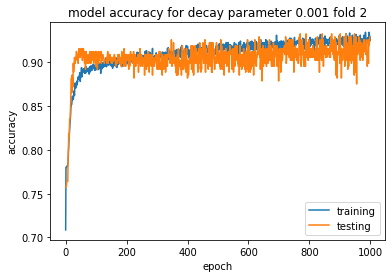

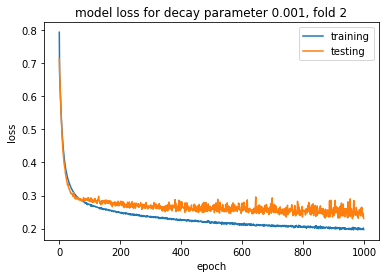

Epoch 1/1000
149/149 - 0s - loss: 0.7784 - accuracy: 0.7313 - val_loss: 0.6138 - val_accuracy: 0.7980
Epoch 2/1000
149/149 - 0s - loss: 0.6399 - accuracy: 0.7699 - val_loss: 0.5843 - val_accuracy: 0.7980
Epoch 3/1000
149/149 - 0s - loss: 0.6131 - accuracy: 0.7699 - val_loss: 0.5614 - val_accuracy: 0.7980
Epoch 4/1000
149/149 - 0s - loss: 0.5893 - accuracy: 0.7708 - val_loss: 0.5446 - val_accuracy: 0.8013
Epoch 5/1000
149/149 - 0s - loss: 0.5672 - accuracy: 0.7750 - val_loss: 0.5210 - val_accuracy: 0.8013
Epoch 6/1000
149/149 - 0s - loss: 0.5463 - accuracy: 0.7792 - val_loss: 0.5067 - val_accuracy: 0.8249
Epoch 7/1000
149/149 - 0s - loss: 0.5277 - accuracy: 0.7901 - val_loss: 0.4884 - val_accuracy: 0.8215
Epoch 8/1000
149/149 - 0s - loss: 0.5103 - accuracy: 0.7968 - val_loss: 0.4714 - val_accuracy: 0.8215
Epoch 9/1000
149/149 - 0s - loss: 0.4945 - accuracy: 0.8002 - val_loss: 0.4599 - val_accuracy: 0.8485
Epoch 10/1000
149/149 - 0s - loss: 0.4796 - accuracy: 0.8102 - val_loss: 0.4458 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2935 - accuracy: 0.8841 - val_loss: 0.2987 - val_accuracy: 0.8788
Epoch 82/1000
149/149 - 0s - loss: 0.2929 - accuracy: 0.8833 - val_loss: 0.2961 - val_accuracy: 0.8822
Epoch 83/1000
149/149 - 0s - loss: 0.2931 - accuracy: 0.8841 - val_loss: 0.2809 - val_accuracy: 0.8889
Epoch 84/1000
149/149 - 0s - loss: 0.2907 - accuracy: 0.8883 - val_loss: 0.2831 - val_accuracy: 0.8822
Epoch 85/1000
149/149 - 0s - loss: 0.2903 - accuracy: 0.8892 - val_loss: 0.2848 - val_accuracy: 0.8822
Epoch 86/1000
149/149 - 0s - loss: 0.2906 - accuracy: 0.8917 - val_loss: 0.2841 - val_accuracy: 0.8822
Epoch 87/1000
149/149 - 0s - loss: 0.2906 - accuracy: 0.8841 - val_loss: 0.2829 - val_accuracy: 0.8855
Epoch 88/1000
149/149 - 0s - loss: 0.2881 - accuracy: 0.8892 - val_loss: 0.2777 - val_accuracy: 0.8956
Epoch 89/1000
149/149 - 0s - loss: 0.2893 - accuracy: 0.8858 - val_loss: 0.2780 - val_accuracy: 0.8889
Epoch 90/1000
149/149 - 0s - loss: 0.2897 - accuracy: 0.8892 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2691 - accuracy: 0.8984 - val_loss: 0.2540 - val_accuracy: 0.9024
Epoch 161/1000
149/149 - 0s - loss: 0.2677 - accuracy: 0.9001 - val_loss: 0.2777 - val_accuracy: 0.8990
Epoch 162/1000
149/149 - 0s - loss: 0.2693 - accuracy: 0.8976 - val_loss: 0.2546 - val_accuracy: 0.9024
Epoch 163/1000
149/149 - 0s - loss: 0.2663 - accuracy: 0.8976 - val_loss: 0.2736 - val_accuracy: 0.8956
Epoch 164/1000
149/149 - 0s - loss: 0.2682 - accuracy: 0.8959 - val_loss: 0.2556 - val_accuracy: 0.9024
Epoch 165/1000
149/149 - 0s - loss: 0.2654 - accuracy: 0.8925 - val_loss: 0.2500 - val_accuracy: 0.9091
Epoch 166/1000
149/149 - 0s - loss: 0.2641 - accuracy: 0.9001 - val_loss: 0.2512 - val_accuracy: 0.9091
Epoch 167/1000
149/149 - 0s - loss: 0.2673 - accuracy: 0.8967 - val_loss: 0.2568 - val_accuracy: 0.8956
Epoch 168/1000
149/149 - 0s - loss: 0.2670 - accuracy: 0.9001 - val_loss: 0.2532 - val_accuracy: 0.9024
Epoch 169/1000
149/149 - 0s - loss: 0.2669 - accuracy: 0.9001 - 

Epoch 239/1000
149/149 - 0s - loss: 0.2519 - accuracy: 0.8984 - val_loss: 0.2513 - val_accuracy: 0.9125
Epoch 240/1000
149/149 - 0s - loss: 0.2544 - accuracy: 0.9043 - val_loss: 0.2574 - val_accuracy: 0.9158
Epoch 241/1000
149/149 - 0s - loss: 0.2550 - accuracy: 0.9001 - val_loss: 0.2524 - val_accuracy: 0.9091
Epoch 242/1000
149/149 - 0s - loss: 0.2531 - accuracy: 0.9009 - val_loss: 0.2390 - val_accuracy: 0.9125
Epoch 243/1000
149/149 - 0s - loss: 0.2539 - accuracy: 0.8992 - val_loss: 0.2433 - val_accuracy: 0.9024
Epoch 244/1000
149/149 - 0s - loss: 0.2550 - accuracy: 0.9001 - val_loss: 0.2440 - val_accuracy: 0.9091
Epoch 245/1000
149/149 - 0s - loss: 0.2537 - accuracy: 0.8967 - val_loss: 0.2483 - val_accuracy: 0.9091
Epoch 246/1000
149/149 - 0s - loss: 0.2537 - accuracy: 0.8976 - val_loss: 0.2422 - val_accuracy: 0.9091
Epoch 247/1000
149/149 - 0s - loss: 0.2504 - accuracy: 0.9009 - val_loss: 0.2543 - val_accuracy: 0.9158
Epoch 248/1000
149/149 - 0s - loss: 0.2527 - accuracy: 0.8984 - 

Epoch 318/1000
149/149 - 0s - loss: 0.2457 - accuracy: 0.9043 - val_loss: 0.2316 - val_accuracy: 0.9226
Epoch 319/1000
149/149 - 0s - loss: 0.2465 - accuracy: 0.9026 - val_loss: 0.2374 - val_accuracy: 0.9158
Epoch 320/1000
149/149 - 0s - loss: 0.2449 - accuracy: 0.9026 - val_loss: 0.2340 - val_accuracy: 0.9125
Epoch 321/1000
149/149 - 0s - loss: 0.2452 - accuracy: 0.9026 - val_loss: 0.2459 - val_accuracy: 0.9125
Epoch 322/1000
149/149 - 0s - loss: 0.2450 - accuracy: 0.9034 - val_loss: 0.2391 - val_accuracy: 0.9125
Epoch 323/1000
149/149 - 0s - loss: 0.2447 - accuracy: 0.9026 - val_loss: 0.2328 - val_accuracy: 0.9091
Epoch 324/1000
149/149 - 0s - loss: 0.2447 - accuracy: 0.8976 - val_loss: 0.2453 - val_accuracy: 0.9158
Epoch 325/1000
149/149 - 0s - loss: 0.2436 - accuracy: 0.9001 - val_loss: 0.2333 - val_accuracy: 0.9158
Epoch 326/1000
149/149 - 0s - loss: 0.2453 - accuracy: 0.8984 - val_loss: 0.2326 - val_accuracy: 0.9091
Epoch 327/1000
149/149 - 0s - loss: 0.2435 - accuracy: 0.8959 - 

Epoch 397/1000
149/149 - 0s - loss: 0.2376 - accuracy: 0.9060 - val_loss: 0.2476 - val_accuracy: 0.9158
Epoch 398/1000
149/149 - 0s - loss: 0.2386 - accuracy: 0.9060 - val_loss: 0.2309 - val_accuracy: 0.9125
Epoch 399/1000
149/149 - 0s - loss: 0.2374 - accuracy: 0.9076 - val_loss: 0.2390 - val_accuracy: 0.9158
Epoch 400/1000
149/149 - 0s - loss: 0.2365 - accuracy: 0.9068 - val_loss: 0.2287 - val_accuracy: 0.9158
Epoch 401/1000
149/149 - 0s - loss: 0.2351 - accuracy: 0.9043 - val_loss: 0.2271 - val_accuracy: 0.9158
Epoch 402/1000
149/149 - 0s - loss: 0.2364 - accuracy: 0.9026 - val_loss: 0.2293 - val_accuracy: 0.9192
Epoch 403/1000
149/149 - 0s - loss: 0.2373 - accuracy: 0.9018 - val_loss: 0.2349 - val_accuracy: 0.9192
Epoch 404/1000
149/149 - 0s - loss: 0.2364 - accuracy: 0.9118 - val_loss: 0.2500 - val_accuracy: 0.9192
Epoch 405/1000
149/149 - 0s - loss: 0.2339 - accuracy: 0.9076 - val_loss: 0.2431 - val_accuracy: 0.9125
Epoch 406/1000
149/149 - 0s - loss: 0.2369 - accuracy: 0.9034 - 

Epoch 476/1000
149/149 - 0s - loss: 0.2305 - accuracy: 0.9118 - val_loss: 0.2447 - val_accuracy: 0.9226
Epoch 477/1000
149/149 - 0s - loss: 0.2295 - accuracy: 0.9085 - val_loss: 0.2378 - val_accuracy: 0.9192
Epoch 478/1000
149/149 - 0s - loss: 0.2306 - accuracy: 0.9102 - val_loss: 0.2377 - val_accuracy: 0.9158
Epoch 479/1000
149/149 - 0s - loss: 0.2313 - accuracy: 0.9076 - val_loss: 0.2296 - val_accuracy: 0.9158
Epoch 480/1000
149/149 - 0s - loss: 0.2304 - accuracy: 0.9110 - val_loss: 0.2450 - val_accuracy: 0.9125
Epoch 481/1000
149/149 - 0s - loss: 0.2308 - accuracy: 0.9034 - val_loss: 0.2368 - val_accuracy: 0.9226
Epoch 482/1000
149/149 - 0s - loss: 0.2270 - accuracy: 0.9076 - val_loss: 0.2249 - val_accuracy: 0.9125
Epoch 483/1000
149/149 - 0s - loss: 0.2310 - accuracy: 0.9051 - val_loss: 0.2397 - val_accuracy: 0.9158
Epoch 484/1000
149/149 - 0s - loss: 0.2303 - accuracy: 0.9076 - val_loss: 0.2396 - val_accuracy: 0.9158
Epoch 485/1000
149/149 - 0s - loss: 0.2301 - accuracy: 0.9127 - 

Epoch 555/1000
149/149 - 0s - loss: 0.2239 - accuracy: 0.9202 - val_loss: 0.2241 - val_accuracy: 0.9158
Epoch 556/1000
149/149 - 0s - loss: 0.2264 - accuracy: 0.9085 - val_loss: 0.2356 - val_accuracy: 0.9226
Epoch 557/1000
149/149 - 0s - loss: 0.2272 - accuracy: 0.9093 - val_loss: 0.2267 - val_accuracy: 0.9226
Epoch 558/1000
149/149 - 0s - loss: 0.2260 - accuracy: 0.9085 - val_loss: 0.2564 - val_accuracy: 0.9125
Epoch 559/1000
149/149 - 0s - loss: 0.2266 - accuracy: 0.9144 - val_loss: 0.2208 - val_accuracy: 0.9226
Epoch 560/1000
149/149 - 0s - loss: 0.2255 - accuracy: 0.9085 - val_loss: 0.2281 - val_accuracy: 0.9192
Epoch 561/1000
149/149 - 0s - loss: 0.2262 - accuracy: 0.9118 - val_loss: 0.2254 - val_accuracy: 0.9158
Epoch 562/1000
149/149 - 0s - loss: 0.2249 - accuracy: 0.9118 - val_loss: 0.2304 - val_accuracy: 0.9226
Epoch 563/1000
149/149 - 0s - loss: 0.2240 - accuracy: 0.9093 - val_loss: 0.2319 - val_accuracy: 0.9158
Epoch 564/1000
149/149 - 0s - loss: 0.2270 - accuracy: 0.9093 - 

Epoch 634/1000
149/149 - 0s - loss: 0.2209 - accuracy: 0.9160 - val_loss: 0.2244 - val_accuracy: 0.9259
Epoch 635/1000
149/149 - 0s - loss: 0.2218 - accuracy: 0.9118 - val_loss: 0.2219 - val_accuracy: 0.9226
Epoch 636/1000
149/149 - 0s - loss: 0.2190 - accuracy: 0.9110 - val_loss: 0.2224 - val_accuracy: 0.9158
Epoch 637/1000
149/149 - 0s - loss: 0.2213 - accuracy: 0.9093 - val_loss: 0.2218 - val_accuracy: 0.9125
Epoch 638/1000
149/149 - 0s - loss: 0.2190 - accuracy: 0.9127 - val_loss: 0.2589 - val_accuracy: 0.9091
Epoch 639/1000
149/149 - 0s - loss: 0.2249 - accuracy: 0.9160 - val_loss: 0.2230 - val_accuracy: 0.9259
Epoch 640/1000
149/149 - 0s - loss: 0.2210 - accuracy: 0.9144 - val_loss: 0.2289 - val_accuracy: 0.9192
Epoch 641/1000
149/149 - 0s - loss: 0.2239 - accuracy: 0.9110 - val_loss: 0.2373 - val_accuracy: 0.9125
Epoch 642/1000
149/149 - 0s - loss: 0.2234 - accuracy: 0.9102 - val_loss: 0.2225 - val_accuracy: 0.9226
Epoch 643/1000
149/149 - 0s - loss: 0.2220 - accuracy: 0.9169 - 

Epoch 713/1000
149/149 - 0s - loss: 0.2187 - accuracy: 0.9144 - val_loss: 0.2209 - val_accuracy: 0.9192
Epoch 714/1000
149/149 - 0s - loss: 0.2195 - accuracy: 0.9110 - val_loss: 0.2199 - val_accuracy: 0.9226
Epoch 715/1000
149/149 - 0s - loss: 0.2208 - accuracy: 0.9076 - val_loss: 0.2272 - val_accuracy: 0.9259
Epoch 716/1000
149/149 - 0s - loss: 0.2175 - accuracy: 0.9177 - val_loss: 0.2179 - val_accuracy: 0.9293
Epoch 717/1000
149/149 - 0s - loss: 0.2191 - accuracy: 0.9152 - val_loss: 0.2215 - val_accuracy: 0.9259
Epoch 718/1000
149/149 - 0s - loss: 0.2189 - accuracy: 0.9051 - val_loss: 0.2205 - val_accuracy: 0.9293
Epoch 719/1000
149/149 - 0s - loss: 0.2146 - accuracy: 0.9135 - val_loss: 0.2214 - val_accuracy: 0.9259
Epoch 720/1000
149/149 - 0s - loss: 0.2209 - accuracy: 0.9060 - val_loss: 0.2178 - val_accuracy: 0.9259
Epoch 721/1000
149/149 - 0s - loss: 0.2185 - accuracy: 0.9127 - val_loss: 0.2172 - val_accuracy: 0.9293
Epoch 722/1000
149/149 - 0s - loss: 0.2196 - accuracy: 0.9135 - 

Epoch 792/1000
149/149 - 0s - loss: 0.2158 - accuracy: 0.9169 - val_loss: 0.2182 - val_accuracy: 0.9293
Epoch 793/1000
149/149 - 0s - loss: 0.2152 - accuracy: 0.9068 - val_loss: 0.2271 - val_accuracy: 0.9259
Epoch 794/1000
149/149 - 0s - loss: 0.2175 - accuracy: 0.9194 - val_loss: 0.2179 - val_accuracy: 0.9360
Epoch 795/1000
149/149 - 0s - loss: 0.2141 - accuracy: 0.9202 - val_loss: 0.2151 - val_accuracy: 0.9259
Epoch 796/1000
149/149 - 0s - loss: 0.2141 - accuracy: 0.9194 - val_loss: 0.2213 - val_accuracy: 0.9226
Epoch 797/1000
149/149 - 0s - loss: 0.2140 - accuracy: 0.9202 - val_loss: 0.2128 - val_accuracy: 0.9360
Epoch 798/1000
149/149 - 0s - loss: 0.2163 - accuracy: 0.9152 - val_loss: 0.2266 - val_accuracy: 0.9226
Epoch 799/1000
149/149 - 0s - loss: 0.2151 - accuracy: 0.9118 - val_loss: 0.2334 - val_accuracy: 0.9192
Epoch 800/1000
149/149 - 0s - loss: 0.2147 - accuracy: 0.9160 - val_loss: 0.2179 - val_accuracy: 0.9259
Epoch 801/1000
149/149 - 0s - loss: 0.2151 - accuracy: 0.9152 - 

Epoch 871/1000
149/149 - 0s - loss: 0.2122 - accuracy: 0.9152 - val_loss: 0.2126 - val_accuracy: 0.9293
Epoch 872/1000
149/149 - 0s - loss: 0.2126 - accuracy: 0.9135 - val_loss: 0.2139 - val_accuracy: 0.9259
Epoch 873/1000
149/149 - 0s - loss: 0.2142 - accuracy: 0.9060 - val_loss: 0.2173 - val_accuracy: 0.9259
Epoch 874/1000
149/149 - 0s - loss: 0.2126 - accuracy: 0.9194 - val_loss: 0.2303 - val_accuracy: 0.9192
Epoch 875/1000
149/149 - 0s - loss: 0.2143 - accuracy: 0.9160 - val_loss: 0.2561 - val_accuracy: 0.9024
Epoch 876/1000
149/149 - 0s - loss: 0.2125 - accuracy: 0.9152 - val_loss: 0.2178 - val_accuracy: 0.9293
Epoch 877/1000
149/149 - 0s - loss: 0.2134 - accuracy: 0.9110 - val_loss: 0.2369 - val_accuracy: 0.9158
Epoch 878/1000
149/149 - 0s - loss: 0.2137 - accuracy: 0.9152 - val_loss: 0.2165 - val_accuracy: 0.9259
Epoch 879/1000
149/149 - 0s - loss: 0.2146 - accuracy: 0.9144 - val_loss: 0.2437 - val_accuracy: 0.9125
Epoch 880/1000
149/149 - 0s - loss: 0.2140 - accuracy: 0.9169 - 

Epoch 950/1000
149/149 - 0s - loss: 0.2095 - accuracy: 0.9102 - val_loss: 0.2083 - val_accuracy: 0.9360
Epoch 951/1000
149/149 - 0s - loss: 0.2130 - accuracy: 0.9152 - val_loss: 0.2217 - val_accuracy: 0.9259
Epoch 952/1000
149/149 - 0s - loss: 0.2107 - accuracy: 0.9186 - val_loss: 0.2224 - val_accuracy: 0.9226
Epoch 953/1000
149/149 - 0s - loss: 0.2114 - accuracy: 0.9194 - val_loss: 0.2100 - val_accuracy: 0.9428
Epoch 954/1000
149/149 - 0s - loss: 0.2090 - accuracy: 0.9169 - val_loss: 0.2273 - val_accuracy: 0.9192
Epoch 955/1000
149/149 - 0s - loss: 0.2115 - accuracy: 0.9177 - val_loss: 0.2200 - val_accuracy: 0.9226
Epoch 956/1000
149/149 - 0s - loss: 0.2094 - accuracy: 0.9152 - val_loss: 0.2111 - val_accuracy: 0.9327
Epoch 957/1000
149/149 - 0s - loss: 0.2123 - accuracy: 0.9135 - val_loss: 0.2160 - val_accuracy: 0.9293
Epoch 958/1000
149/149 - 0s - loss: 0.2123 - accuracy: 0.9135 - val_loss: 0.2135 - val_accuracy: 0.9360
Epoch 959/1000
149/149 - 0s - loss: 0.2116 - accuracy: 0.9152 - 

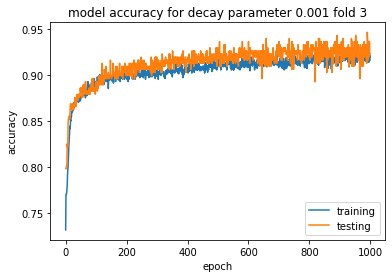

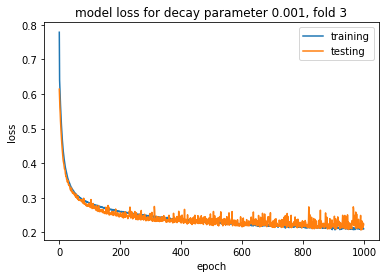

Epoch 1/1000
149/149 - 0s - loss: 0.7774 - accuracy: 0.7523 - val_loss: 0.7410 - val_accuracy: 0.7441
Epoch 2/1000
149/149 - 0s - loss: 0.6426 - accuracy: 0.7834 - val_loss: 0.7072 - val_accuracy: 0.7441
Epoch 3/1000
149/149 - 0s - loss: 0.6109 - accuracy: 0.7834 - val_loss: 0.6780 - val_accuracy: 0.7441
Epoch 4/1000
149/149 - 0s - loss: 0.5846 - accuracy: 0.7834 - val_loss: 0.6532 - val_accuracy: 0.7475
Epoch 5/1000
149/149 - 0s - loss: 0.5644 - accuracy: 0.7842 - val_loss: 0.6391 - val_accuracy: 0.7508
Epoch 6/1000
149/149 - 0s - loss: 0.5440 - accuracy: 0.7884 - val_loss: 0.6187 - val_accuracy: 0.7609
Epoch 7/1000
149/149 - 0s - loss: 0.5267 - accuracy: 0.7918 - val_loss: 0.6048 - val_accuracy: 0.7710
Epoch 8/1000
149/149 - 0s - loss: 0.5101 - accuracy: 0.7985 - val_loss: 0.5926 - val_accuracy: 0.7744
Epoch 9/1000
149/149 - 0s - loss: 0.4943 - accuracy: 0.7976 - val_loss: 0.5768 - val_accuracy: 0.7778
Epoch 10/1000
149/149 - 0s - loss: 0.4808 - accuracy: 0.8086 - val_loss: 0.5687 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2710 - accuracy: 0.9001 - val_loss: 0.3672 - val_accuracy: 0.8384
Epoch 82/1000
149/149 - 0s - loss: 0.2691 - accuracy: 0.9051 - val_loss: 0.3573 - val_accuracy: 0.8283
Epoch 83/1000
149/149 - 0s - loss: 0.2696 - accuracy: 0.9085 - val_loss: 0.3771 - val_accuracy: 0.8418
Epoch 84/1000
149/149 - 0s - loss: 0.2689 - accuracy: 0.9034 - val_loss: 0.3721 - val_accuracy: 0.8418
Epoch 85/1000
149/149 - 0s - loss: 0.2674 - accuracy: 0.9026 - val_loss: 0.3617 - val_accuracy: 0.8283
Epoch 86/1000
149/149 - 0s - loss: 0.2674 - accuracy: 0.9060 - val_loss: 0.3576 - val_accuracy: 0.8215
Epoch 87/1000
149/149 - 0s - loss: 0.2675 - accuracy: 0.9051 - val_loss: 0.3644 - val_accuracy: 0.8384
Epoch 88/1000
149/149 - 0s - loss: 0.2667 - accuracy: 0.9051 - val_loss: 0.3703 - val_accuracy: 0.8418
Epoch 89/1000
149/149 - 0s - loss: 0.2656 - accuracy: 0.9051 - val_loss: 0.3595 - val_accuracy: 0.8215
Epoch 90/1000
149/149 - 0s - loss: 0.2658 - accuracy: 0.9051 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2459 - accuracy: 0.9152 - val_loss: 0.3596 - val_accuracy: 0.8350
Epoch 161/1000
149/149 - 0s - loss: 0.2454 - accuracy: 0.9135 - val_loss: 0.3447 - val_accuracy: 0.8519
Epoch 162/1000
149/149 - 0s - loss: 0.2451 - accuracy: 0.9102 - val_loss: 0.3553 - val_accuracy: 0.8418
Epoch 163/1000
149/149 - 0s - loss: 0.2448 - accuracy: 0.9144 - val_loss: 0.3457 - val_accuracy: 0.8485
Epoch 164/1000
149/149 - 0s - loss: 0.2446 - accuracy: 0.9127 - val_loss: 0.3610 - val_accuracy: 0.8350
Epoch 165/1000
149/149 - 0s - loss: 0.2439 - accuracy: 0.9110 - val_loss: 0.3661 - val_accuracy: 0.8418
Epoch 166/1000
149/149 - 0s - loss: 0.2437 - accuracy: 0.9118 - val_loss: 0.3734 - val_accuracy: 0.8519
Epoch 167/1000
149/149 - 0s - loss: 0.2446 - accuracy: 0.9127 - val_loss: 0.3434 - val_accuracy: 0.8552
Epoch 168/1000
149/149 - 0s - loss: 0.2450 - accuracy: 0.9169 - val_loss: 0.3514 - val_accuracy: 0.8418
Epoch 169/1000
149/149 - 0s - loss: 0.2436 - accuracy: 0.9110 - 

Epoch 239/1000
149/149 - 0s - loss: 0.2315 - accuracy: 0.9127 - val_loss: 0.3515 - val_accuracy: 0.8451
Epoch 240/1000
149/149 - 0s - loss: 0.2334 - accuracy: 0.9118 - val_loss: 0.3532 - val_accuracy: 0.8418
Epoch 241/1000
149/149 - 0s - loss: 0.2342 - accuracy: 0.9127 - val_loss: 0.3452 - val_accuracy: 0.8519
Epoch 242/1000
149/149 - 0s - loss: 0.2329 - accuracy: 0.9144 - val_loss: 0.3633 - val_accuracy: 0.8418
Epoch 243/1000
149/149 - 0s - loss: 0.2334 - accuracy: 0.9169 - val_loss: 0.3525 - val_accuracy: 0.8384
Epoch 244/1000
149/149 - 0s - loss: 0.2338 - accuracy: 0.9135 - val_loss: 0.3656 - val_accuracy: 0.8418
Epoch 245/1000
149/149 - 0s - loss: 0.2341 - accuracy: 0.9127 - val_loss: 0.3529 - val_accuracy: 0.8418
Epoch 246/1000
149/149 - 0s - loss: 0.2335 - accuracy: 0.9144 - val_loss: 0.3580 - val_accuracy: 0.8350
Epoch 247/1000
149/149 - 0s - loss: 0.2314 - accuracy: 0.9144 - val_loss: 0.3511 - val_accuracy: 0.8418
Epoch 248/1000
149/149 - 0s - loss: 0.2326 - accuracy: 0.9118 - 

Epoch 318/1000
149/149 - 0s - loss: 0.2267 - accuracy: 0.9152 - val_loss: 0.3486 - val_accuracy: 0.8451
Epoch 319/1000
149/149 - 0s - loss: 0.2267 - accuracy: 0.9169 - val_loss: 0.3484 - val_accuracy: 0.8451
Epoch 320/1000
149/149 - 0s - loss: 0.2259 - accuracy: 0.9177 - val_loss: 0.3615 - val_accuracy: 0.8384
Epoch 321/1000
149/149 - 0s - loss: 0.2251 - accuracy: 0.9118 - val_loss: 0.3429 - val_accuracy: 0.8485
Epoch 322/1000
149/149 - 0s - loss: 0.2257 - accuracy: 0.9152 - val_loss: 0.3391 - val_accuracy: 0.8519
Epoch 323/1000
149/149 - 0s - loss: 0.2252 - accuracy: 0.9177 - val_loss: 0.3434 - val_accuracy: 0.8586
Epoch 324/1000
149/149 - 0s - loss: 0.2256 - accuracy: 0.9144 - val_loss: 0.3394 - val_accuracy: 0.8519
Epoch 325/1000
149/149 - 0s - loss: 0.2253 - accuracy: 0.9211 - val_loss: 0.3479 - val_accuracy: 0.8418
Epoch 326/1000
149/149 - 0s - loss: 0.2247 - accuracy: 0.9169 - val_loss: 0.3636 - val_accuracy: 0.8485
Epoch 327/1000
149/149 - 0s - loss: 0.2248 - accuracy: 0.9110 - 

Epoch 397/1000
149/149 - 0s - loss: 0.2194 - accuracy: 0.9194 - val_loss: 0.3338 - val_accuracy: 0.8485
Epoch 398/1000
149/149 - 0s - loss: 0.2214 - accuracy: 0.9152 - val_loss: 0.3552 - val_accuracy: 0.8451
Epoch 399/1000
149/149 - 0s - loss: 0.2190 - accuracy: 0.9152 - val_loss: 0.3338 - val_accuracy: 0.8552
Epoch 400/1000
149/149 - 0s - loss: 0.2185 - accuracy: 0.9160 - val_loss: 0.3339 - val_accuracy: 0.8586
Epoch 401/1000
149/149 - 0s - loss: 0.2180 - accuracy: 0.9169 - val_loss: 0.3432 - val_accuracy: 0.8451
Epoch 402/1000
149/149 - 0s - loss: 0.2193 - accuracy: 0.9144 - val_loss: 0.3472 - val_accuracy: 0.8451
Epoch 403/1000
149/149 - 0s - loss: 0.2193 - accuracy: 0.9135 - val_loss: 0.3424 - val_accuracy: 0.8485
Epoch 404/1000
149/149 - 0s - loss: 0.2200 - accuracy: 0.9177 - val_loss: 0.3297 - val_accuracy: 0.8519
Epoch 405/1000
149/149 - 0s - loss: 0.2184 - accuracy: 0.9202 - val_loss: 0.3299 - val_accuracy: 0.8519
Epoch 406/1000
149/149 - 0s - loss: 0.2190 - accuracy: 0.9152 - 

Epoch 476/1000
149/149 - 0s - loss: 0.2150 - accuracy: 0.9228 - val_loss: 0.3419 - val_accuracy: 0.8485
Epoch 477/1000
149/149 - 0s - loss: 0.2124 - accuracy: 0.9202 - val_loss: 0.3391 - val_accuracy: 0.8519
Epoch 478/1000
149/149 - 0s - loss: 0.2148 - accuracy: 0.9127 - val_loss: 0.3306 - val_accuracy: 0.8485
Epoch 479/1000
149/149 - 0s - loss: 0.2131 - accuracy: 0.9244 - val_loss: 0.3455 - val_accuracy: 0.8418
Epoch 480/1000
149/149 - 0s - loss: 0.2133 - accuracy: 0.9194 - val_loss: 0.3312 - val_accuracy: 0.8485
Epoch 481/1000
149/149 - 0s - loss: 0.2145 - accuracy: 0.9169 - val_loss: 0.3339 - val_accuracy: 0.8519
Epoch 482/1000
149/149 - 0s - loss: 0.2096 - accuracy: 0.9186 - val_loss: 0.3613 - val_accuracy: 0.8552
Epoch 483/1000
149/149 - 0s - loss: 0.2138 - accuracy: 0.9186 - val_loss: 0.3379 - val_accuracy: 0.8519
Epoch 484/1000
149/149 - 0s - loss: 0.2136 - accuracy: 0.9228 - val_loss: 0.3289 - val_accuracy: 0.8519
Epoch 485/1000
149/149 - 0s - loss: 0.2128 - accuracy: 0.9194 - 

Epoch 555/1000
149/149 - 0s - loss: 0.2087 - accuracy: 0.9211 - val_loss: 0.3359 - val_accuracy: 0.8485
Epoch 556/1000
149/149 - 0s - loss: 0.2088 - accuracy: 0.9160 - val_loss: 0.3254 - val_accuracy: 0.8519
Epoch 557/1000
149/149 - 0s - loss: 0.2090 - accuracy: 0.9236 - val_loss: 0.3385 - val_accuracy: 0.8418
Epoch 558/1000
149/149 - 0s - loss: 0.2099 - accuracy: 0.9169 - val_loss: 0.3315 - val_accuracy: 0.8519
Epoch 559/1000
149/149 - 0s - loss: 0.2112 - accuracy: 0.9186 - val_loss: 0.3532 - val_accuracy: 0.8485
Epoch 560/1000
149/149 - 0s - loss: 0.2106 - accuracy: 0.9160 - val_loss: 0.3468 - val_accuracy: 0.8418
Epoch 561/1000
149/149 - 0s - loss: 0.2084 - accuracy: 0.9295 - val_loss: 0.3360 - val_accuracy: 0.8451
Epoch 562/1000
149/149 - 0s - loss: 0.2083 - accuracy: 0.9278 - val_loss: 0.3317 - val_accuracy: 0.8552
Epoch 563/1000
149/149 - 0s - loss: 0.2100 - accuracy: 0.9228 - val_loss: 0.3665 - val_accuracy: 0.8552
Epoch 564/1000
149/149 - 0s - loss: 0.2073 - accuracy: 0.9194 - 

Epoch 634/1000
149/149 - 0s - loss: 0.2042 - accuracy: 0.9253 - val_loss: 0.3307 - val_accuracy: 0.8418
Epoch 635/1000
149/149 - 0s - loss: 0.2044 - accuracy: 0.9303 - val_loss: 0.3410 - val_accuracy: 0.8418
Epoch 636/1000
149/149 - 0s - loss: 0.2022 - accuracy: 0.9320 - val_loss: 0.3394 - val_accuracy: 0.8519
Epoch 637/1000
149/149 - 0s - loss: 0.2042 - accuracy: 0.9211 - val_loss: 0.3312 - val_accuracy: 0.8519
Epoch 638/1000
149/149 - 0s - loss: 0.2044 - accuracy: 0.9244 - val_loss: 0.3323 - val_accuracy: 0.8519
Epoch 639/1000
149/149 - 0s - loss: 0.2058 - accuracy: 0.9228 - val_loss: 0.3413 - val_accuracy: 0.8485
Epoch 640/1000
149/149 - 0s - loss: 0.2040 - accuracy: 0.9295 - val_loss: 0.3312 - val_accuracy: 0.8620
Epoch 641/1000
149/149 - 0s - loss: 0.2065 - accuracy: 0.9177 - val_loss: 0.3288 - val_accuracy: 0.8519
Epoch 642/1000
149/149 - 0s - loss: 0.2058 - accuracy: 0.9261 - val_loss: 0.3233 - val_accuracy: 0.8552
Epoch 643/1000
149/149 - 0s - loss: 0.2058 - accuracy: 0.9261 - 

Epoch 713/1000
149/149 - 0s - loss: 0.2016 - accuracy: 0.9228 - val_loss: 0.3424 - val_accuracy: 0.8519
Epoch 714/1000
149/149 - 0s - loss: 0.1989 - accuracy: 0.9169 - val_loss: 0.3322 - val_accuracy: 0.8418
Epoch 715/1000
149/149 - 0s - loss: 0.2008 - accuracy: 0.9211 - val_loss: 0.3184 - val_accuracy: 0.8620
Epoch 716/1000
149/149 - 0s - loss: 0.2000 - accuracy: 0.9261 - val_loss: 0.3326 - val_accuracy: 0.8485
Epoch 717/1000
149/149 - 0s - loss: 0.2016 - accuracy: 0.9228 - val_loss: 0.3407 - val_accuracy: 0.8485
Epoch 718/1000
149/149 - 0s - loss: 0.2003 - accuracy: 0.9194 - val_loss: 0.3230 - val_accuracy: 0.8620
Epoch 719/1000
149/149 - 0s - loss: 0.1966 - accuracy: 0.9270 - val_loss: 0.3578 - val_accuracy: 0.8552
Epoch 720/1000
149/149 - 0s - loss: 0.1995 - accuracy: 0.9270 - val_loss: 0.3270 - val_accuracy: 0.8552
Epoch 721/1000
149/149 - 0s - loss: 0.2005 - accuracy: 0.9228 - val_loss: 0.3210 - val_accuracy: 0.8586
Epoch 722/1000
149/149 - 0s - loss: 0.2002 - accuracy: 0.9270 - 

Epoch 792/1000
149/149 - 0s - loss: 0.1995 - accuracy: 0.9211 - val_loss: 0.3287 - val_accuracy: 0.8586
Epoch 793/1000
149/149 - 0s - loss: 0.1970 - accuracy: 0.9253 - val_loss: 0.3278 - val_accuracy: 0.8552
Epoch 794/1000
149/149 - 0s - loss: 0.1983 - accuracy: 0.9253 - val_loss: 0.3386 - val_accuracy: 0.8485
Epoch 795/1000
149/149 - 0s - loss: 0.1954 - accuracy: 0.9270 - val_loss: 0.3496 - val_accuracy: 0.8586
Epoch 796/1000
149/149 - 0s - loss: 0.1965 - accuracy: 0.9278 - val_loss: 0.3234 - val_accuracy: 0.8586
Epoch 797/1000
149/149 - 0s - loss: 0.1964 - accuracy: 0.9312 - val_loss: 0.3279 - val_accuracy: 0.8485
Epoch 798/1000
149/149 - 0s - loss: 0.1964 - accuracy: 0.9244 - val_loss: 0.3368 - val_accuracy: 0.8485
Epoch 799/1000
149/149 - 0s - loss: 0.1956 - accuracy: 0.9303 - val_loss: 0.3418 - val_accuracy: 0.8519
Epoch 800/1000
149/149 - 0s - loss: 0.1973 - accuracy: 0.9236 - val_loss: 0.3268 - val_accuracy: 0.8620
Epoch 801/1000
149/149 - 0s - loss: 0.1959 - accuracy: 0.9244 - 

Epoch 871/1000
149/149 - 0s - loss: 0.1931 - accuracy: 0.9295 - val_loss: 0.3252 - val_accuracy: 0.8586
Epoch 872/1000
149/149 - 0s - loss: 0.1926 - accuracy: 0.9270 - val_loss: 0.3217 - val_accuracy: 0.8653
Epoch 873/1000
149/149 - 0s - loss: 0.1945 - accuracy: 0.9211 - val_loss: 0.3520 - val_accuracy: 0.8586
Epoch 874/1000
149/149 - 0s - loss: 0.1925 - accuracy: 0.9320 - val_loss: 0.3212 - val_accuracy: 0.8586
Epoch 875/1000
149/149 - 0s - loss: 0.1939 - accuracy: 0.9278 - val_loss: 0.3204 - val_accuracy: 0.8552
Epoch 876/1000
149/149 - 0s - loss: 0.1917 - accuracy: 0.9295 - val_loss: 0.3203 - val_accuracy: 0.8519
Epoch 877/1000
149/149 - 0s - loss: 0.1920 - accuracy: 0.9337 - val_loss: 0.3209 - val_accuracy: 0.8653
Epoch 878/1000
149/149 - 0s - loss: 0.1919 - accuracy: 0.9320 - val_loss: 0.3301 - val_accuracy: 0.8519
Epoch 879/1000
149/149 - 0s - loss: 0.1937 - accuracy: 0.9278 - val_loss: 0.3225 - val_accuracy: 0.8519
Epoch 880/1000
149/149 - 0s - loss: 0.1925 - accuracy: 0.9286 - 

Epoch 950/1000
149/149 - 0s - loss: 0.1887 - accuracy: 0.9345 - val_loss: 0.3773 - val_accuracy: 0.8586
Epoch 951/1000
149/149 - 0s - loss: 0.1940 - accuracy: 0.9270 - val_loss: 0.3229 - val_accuracy: 0.8620
Epoch 952/1000
149/149 - 0s - loss: 0.1921 - accuracy: 0.9261 - val_loss: 0.3187 - val_accuracy: 0.8687
Epoch 953/1000
149/149 - 0s - loss: 0.1897 - accuracy: 0.9345 - val_loss: 0.3379 - val_accuracy: 0.8620
Epoch 954/1000
149/149 - 0s - loss: 0.1889 - accuracy: 0.9278 - val_loss: 0.3394 - val_accuracy: 0.8451
Epoch 955/1000
149/149 - 0s - loss: 0.1885 - accuracy: 0.9345 - val_loss: 0.3558 - val_accuracy: 0.8586
Epoch 956/1000
149/149 - 0s - loss: 0.1887 - accuracy: 0.9345 - val_loss: 0.3593 - val_accuracy: 0.8552
Epoch 957/1000
149/149 - 0s - loss: 0.1927 - accuracy: 0.9286 - val_loss: 0.3262 - val_accuracy: 0.8586
Epoch 958/1000
149/149 - 0s - loss: 0.1907 - accuracy: 0.9278 - val_loss: 0.3177 - val_accuracy: 0.8687
Epoch 959/1000
149/149 - 0s - loss: 0.1912 - accuracy: 0.9353 - 

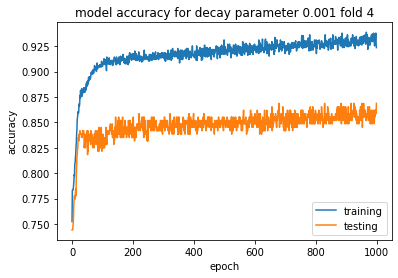

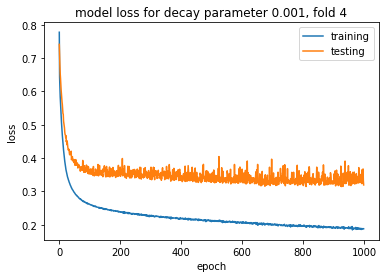

Epoch 1/1000
149/149 - 0s - loss: 0.8333 - accuracy: 0.7045 - val_loss: 0.6933 - val_accuracy: 0.7845
Epoch 2/1000
149/149 - 0s - loss: 0.6867 - accuracy: 0.7733 - val_loss: 0.6510 - val_accuracy: 0.7845
Epoch 3/1000
149/149 - 0s - loss: 0.6486 - accuracy: 0.7733 - val_loss: 0.6240 - val_accuracy: 0.7845
Epoch 4/1000
149/149 - 0s - loss: 0.6189 - accuracy: 0.7733 - val_loss: 0.6044 - val_accuracy: 0.7845
Epoch 5/1000
149/149 - 0s - loss: 0.5950 - accuracy: 0.7733 - val_loss: 0.5815 - val_accuracy: 0.7845
Epoch 6/1000
149/149 - 0s - loss: 0.5723 - accuracy: 0.7750 - val_loss: 0.5682 - val_accuracy: 0.7811
Epoch 7/1000
149/149 - 0s - loss: 0.5536 - accuracy: 0.7800 - val_loss: 0.5485 - val_accuracy: 0.7912
Epoch 8/1000
149/149 - 0s - loss: 0.5354 - accuracy: 0.7842 - val_loss: 0.5333 - val_accuracy: 0.7912
Epoch 9/1000
149/149 - 0s - loss: 0.5195 - accuracy: 0.7943 - val_loss: 0.5198 - val_accuracy: 0.7912
Epoch 10/1000
149/149 - 0s - loss: 0.5044 - accuracy: 0.8035 - val_loss: 0.5033 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2864 - accuracy: 0.8959 - val_loss: 0.2863 - val_accuracy: 0.9024
Epoch 82/1000
149/149 - 0s - loss: 0.2849 - accuracy: 0.8984 - val_loss: 0.2905 - val_accuracy: 0.8923
Epoch 83/1000
149/149 - 0s - loss: 0.2866 - accuracy: 0.8892 - val_loss: 0.2818 - val_accuracy: 0.9125
Epoch 84/1000
149/149 - 0s - loss: 0.2857 - accuracy: 0.8866 - val_loss: 0.2804 - val_accuracy: 0.9125
Epoch 85/1000
149/149 - 0s - loss: 0.2843 - accuracy: 0.8942 - val_loss: 0.2807 - val_accuracy: 0.9091
Epoch 86/1000
149/149 - 0s - loss: 0.2847 - accuracy: 0.9001 - val_loss: 0.2796 - val_accuracy: 0.9125
Epoch 87/1000
149/149 - 0s - loss: 0.2848 - accuracy: 0.8934 - val_loss: 0.2826 - val_accuracy: 0.9024
Epoch 88/1000
149/149 - 0s - loss: 0.2841 - accuracy: 0.8967 - val_loss: 0.2792 - val_accuracy: 0.9192
Epoch 89/1000
149/149 - 0s - loss: 0.2841 - accuracy: 0.8925 - val_loss: 0.2786 - val_accuracy: 0.9091
Epoch 90/1000
149/149 - 0s - loss: 0.2836 - accuracy: 0.8925 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2665 - accuracy: 0.8992 - val_loss: 0.2610 - val_accuracy: 0.9158
Epoch 161/1000
149/149 - 0s - loss: 0.2656 - accuracy: 0.8992 - val_loss: 0.2714 - val_accuracy: 0.8923
Epoch 162/1000
149/149 - 0s - loss: 0.2659 - accuracy: 0.8967 - val_loss: 0.2612 - val_accuracy: 0.8990
Epoch 163/1000
149/149 - 0s - loss: 0.2642 - accuracy: 0.9018 - val_loss: 0.2730 - val_accuracy: 0.8923
Epoch 164/1000
149/149 - 0s - loss: 0.2658 - accuracy: 0.8950 - val_loss: 0.2634 - val_accuracy: 0.9091
Epoch 165/1000
149/149 - 0s - loss: 0.2640 - accuracy: 0.9009 - val_loss: 0.2621 - val_accuracy: 0.8990
Epoch 166/1000
149/149 - 0s - loss: 0.2633 - accuracy: 0.8967 - val_loss: 0.2645 - val_accuracy: 0.9091
Epoch 167/1000
149/149 - 0s - loss: 0.2649 - accuracy: 0.9001 - val_loss: 0.2706 - val_accuracy: 0.8923
Epoch 168/1000
149/149 - 0s - loss: 0.2638 - accuracy: 0.9051 - val_loss: 0.2620 - val_accuracy: 0.9158
Epoch 169/1000
149/149 - 0s - loss: 0.2640 - accuracy: 0.9009 - 

Epoch 239/1000
149/149 - 0s - loss: 0.2523 - accuracy: 0.9076 - val_loss: 0.2515 - val_accuracy: 0.9158
Epoch 240/1000
149/149 - 0s - loss: 0.2527 - accuracy: 0.8984 - val_loss: 0.2525 - val_accuracy: 0.9057
Epoch 241/1000
149/149 - 0s - loss: 0.2539 - accuracy: 0.9034 - val_loss: 0.2517 - val_accuracy: 0.9158
Epoch 242/1000
149/149 - 0s - loss: 0.2527 - accuracy: 0.9026 - val_loss: 0.2508 - val_accuracy: 0.9158
Epoch 243/1000
149/149 - 0s - loss: 0.2531 - accuracy: 0.9043 - val_loss: 0.2534 - val_accuracy: 0.9158
Epoch 244/1000
149/149 - 0s - loss: 0.2551 - accuracy: 0.9009 - val_loss: 0.2519 - val_accuracy: 0.9158
Epoch 245/1000
149/149 - 0s - loss: 0.2530 - accuracy: 0.9001 - val_loss: 0.2510 - val_accuracy: 0.9024
Epoch 246/1000
149/149 - 0s - loss: 0.2527 - accuracy: 0.8967 - val_loss: 0.2527 - val_accuracy: 0.9125
Epoch 247/1000
149/149 - 0s - loss: 0.2515 - accuracy: 0.9076 - val_loss: 0.2508 - val_accuracy: 0.9091
Epoch 248/1000
149/149 - 0s - loss: 0.2506 - accuracy: 0.9051 - 

Epoch 318/1000
149/149 - 0s - loss: 0.2448 - accuracy: 0.9076 - val_loss: 0.2471 - val_accuracy: 0.9091
Epoch 319/1000
149/149 - 0s - loss: 0.2443 - accuracy: 0.9018 - val_loss: 0.2463 - val_accuracy: 0.9158
Epoch 320/1000
149/149 - 0s - loss: 0.2457 - accuracy: 0.9018 - val_loss: 0.2476 - val_accuracy: 0.9091
Epoch 321/1000
149/149 - 0s - loss: 0.2435 - accuracy: 0.9068 - val_loss: 0.2516 - val_accuracy: 0.9125
Epoch 322/1000
149/149 - 0s - loss: 0.2426 - accuracy: 0.9068 - val_loss: 0.2535 - val_accuracy: 0.9158
Epoch 323/1000
149/149 - 0s - loss: 0.2425 - accuracy: 0.9093 - val_loss: 0.2465 - val_accuracy: 0.9057
Epoch 324/1000
149/149 - 0s - loss: 0.2436 - accuracy: 0.9076 - val_loss: 0.2468 - val_accuracy: 0.9057
Epoch 325/1000
149/149 - 0s - loss: 0.2415 - accuracy: 0.9110 - val_loss: 0.2454 - val_accuracy: 0.9158
Epoch 326/1000
149/149 - 0s - loss: 0.2422 - accuracy: 0.9060 - val_loss: 0.2485 - val_accuracy: 0.8990
Epoch 327/1000
149/149 - 0s - loss: 0.2435 - accuracy: 0.9068 - 

Epoch 397/1000
149/149 - 0s - loss: 0.2358 - accuracy: 0.9068 - val_loss: 0.2532 - val_accuracy: 0.9158
Epoch 398/1000
149/149 - 0s - loss: 0.2377 - accuracy: 0.9085 - val_loss: 0.2460 - val_accuracy: 0.8956
Epoch 399/1000
149/149 - 0s - loss: 0.2363 - accuracy: 0.9118 - val_loss: 0.2436 - val_accuracy: 0.9192
Epoch 400/1000
149/149 - 0s - loss: 0.2348 - accuracy: 0.9135 - val_loss: 0.2446 - val_accuracy: 0.9125
Epoch 401/1000
149/149 - 0s - loss: 0.2353 - accuracy: 0.9068 - val_loss: 0.2424 - val_accuracy: 0.9057
Epoch 402/1000
149/149 - 0s - loss: 0.2366 - accuracy: 0.9018 - val_loss: 0.2430 - val_accuracy: 0.9057
Epoch 403/1000
149/149 - 0s - loss: 0.2376 - accuracy: 0.9043 - val_loss: 0.2440 - val_accuracy: 0.9125
Epoch 404/1000
149/149 - 0s - loss: 0.2374 - accuracy: 0.9076 - val_loss: 0.2481 - val_accuracy: 0.9158
Epoch 405/1000
149/149 - 0s - loss: 0.2362 - accuracy: 0.9068 - val_loss: 0.2402 - val_accuracy: 0.9158
Epoch 406/1000
149/149 - 0s - loss: 0.2359 - accuracy: 0.9076 - 

Epoch 476/1000
149/149 - 0s - loss: 0.2317 - accuracy: 0.9060 - val_loss: 0.2399 - val_accuracy: 0.9057
Epoch 477/1000
149/149 - 0s - loss: 0.2266 - accuracy: 0.9152 - val_loss: 0.2414 - val_accuracy: 0.9158
Epoch 478/1000
149/149 - 0s - loss: 0.2305 - accuracy: 0.9085 - val_loss: 0.2459 - val_accuracy: 0.9158
Epoch 479/1000
149/149 - 0s - loss: 0.2303 - accuracy: 0.9135 - val_loss: 0.2412 - val_accuracy: 0.9125
Epoch 480/1000
149/149 - 0s - loss: 0.2288 - accuracy: 0.9127 - val_loss: 0.2385 - val_accuracy: 0.9024
Epoch 481/1000
149/149 - 0s - loss: 0.2315 - accuracy: 0.9144 - val_loss: 0.2399 - val_accuracy: 0.9192
Epoch 482/1000
149/149 - 0s - loss: 0.2298 - accuracy: 0.9127 - val_loss: 0.2374 - val_accuracy: 0.9057
Epoch 483/1000
149/149 - 0s - loss: 0.2285 - accuracy: 0.9127 - val_loss: 0.2418 - val_accuracy: 0.9158
Epoch 484/1000
149/149 - 0s - loss: 0.2290 - accuracy: 0.9135 - val_loss: 0.2414 - val_accuracy: 0.9125
Epoch 485/1000
149/149 - 0s - loss: 0.2289 - accuracy: 0.9127 - 

Epoch 555/1000
149/149 - 0s - loss: 0.2251 - accuracy: 0.9194 - val_loss: 0.2377 - val_accuracy: 0.9125
Epoch 556/1000
149/149 - 0s - loss: 0.2229 - accuracy: 0.9152 - val_loss: 0.2378 - val_accuracy: 0.9125
Epoch 557/1000
149/149 - 0s - loss: 0.2243 - accuracy: 0.9169 - val_loss: 0.2368 - val_accuracy: 0.9024
Epoch 558/1000
149/149 - 0s - loss: 0.2238 - accuracy: 0.9169 - val_loss: 0.2444 - val_accuracy: 0.9158
Epoch 559/1000
149/149 - 0s - loss: 0.2257 - accuracy: 0.9160 - val_loss: 0.2434 - val_accuracy: 0.9125
Epoch 560/1000
149/149 - 0s - loss: 0.2235 - accuracy: 0.9160 - val_loss: 0.2426 - val_accuracy: 0.8990
Epoch 561/1000
149/149 - 0s - loss: 0.2245 - accuracy: 0.9194 - val_loss: 0.2370 - val_accuracy: 0.9158
Epoch 562/1000
149/149 - 0s - loss: 0.2233 - accuracy: 0.9202 - val_loss: 0.2420 - val_accuracy: 0.9125
Epoch 563/1000
149/149 - 0s - loss: 0.2205 - accuracy: 0.9110 - val_loss: 0.2427 - val_accuracy: 0.9024
Epoch 564/1000
149/149 - 0s - loss: 0.2220 - accuracy: 0.9152 - 

Epoch 634/1000
149/149 - 0s - loss: 0.2187 - accuracy: 0.9202 - val_loss: 0.2351 - val_accuracy: 0.9125
Epoch 635/1000
149/149 - 0s - loss: 0.2207 - accuracy: 0.9186 - val_loss: 0.2381 - val_accuracy: 0.9125
Epoch 636/1000
149/149 - 0s - loss: 0.2207 - accuracy: 0.9186 - val_loss: 0.2400 - val_accuracy: 0.9057
Epoch 637/1000
149/149 - 0s - loss: 0.2189 - accuracy: 0.9194 - val_loss: 0.2374 - val_accuracy: 0.9024
Epoch 638/1000
149/149 - 0s - loss: 0.2193 - accuracy: 0.9202 - val_loss: 0.2341 - val_accuracy: 0.9091
Epoch 639/1000
149/149 - 0s - loss: 0.2192 - accuracy: 0.9194 - val_loss: 0.2364 - val_accuracy: 0.9024
Epoch 640/1000
149/149 - 0s - loss: 0.2198 - accuracy: 0.9135 - val_loss: 0.2402 - val_accuracy: 0.9192
Epoch 641/1000
149/149 - 0s - loss: 0.2198 - accuracy: 0.9219 - val_loss: 0.2394 - val_accuracy: 0.9158
Epoch 642/1000
149/149 - 0s - loss: 0.2206 - accuracy: 0.9177 - val_loss: 0.2393 - val_accuracy: 0.9192
Epoch 643/1000
149/149 - 0s - loss: 0.2203 - accuracy: 0.9177 - 

Epoch 713/1000
149/149 - 0s - loss: 0.2172 - accuracy: 0.9169 - val_loss: 0.2399 - val_accuracy: 0.9125
Epoch 714/1000
149/149 - 0s - loss: 0.2152 - accuracy: 0.9160 - val_loss: 0.2358 - val_accuracy: 0.9158
Epoch 715/1000
149/149 - 0s - loss: 0.2152 - accuracy: 0.9160 - val_loss: 0.2366 - val_accuracy: 0.9057
Epoch 716/1000
149/149 - 0s - loss: 0.2166 - accuracy: 0.9144 - val_loss: 0.2378 - val_accuracy: 0.9057
Epoch 717/1000
149/149 - 0s - loss: 0.2168 - accuracy: 0.9160 - val_loss: 0.2379 - val_accuracy: 0.9057
Epoch 718/1000
149/149 - 0s - loss: 0.2147 - accuracy: 0.9177 - val_loss: 0.2388 - val_accuracy: 0.9057
Epoch 719/1000
149/149 - 0s - loss: 0.2116 - accuracy: 0.9253 - val_loss: 0.2461 - val_accuracy: 0.9057
Epoch 720/1000
149/149 - 0s - loss: 0.2142 - accuracy: 0.9186 - val_loss: 0.2472 - val_accuracy: 0.9158
Epoch 721/1000
149/149 - 0s - loss: 0.2155 - accuracy: 0.9202 - val_loss: 0.2428 - val_accuracy: 0.9192
Epoch 722/1000
149/149 - 0s - loss: 0.2162 - accuracy: 0.9127 - 

Epoch 792/1000
149/149 - 0s - loss: 0.2143 - accuracy: 0.9152 - val_loss: 0.2472 - val_accuracy: 0.9158
Epoch 793/1000
149/149 - 0s - loss: 0.2140 - accuracy: 0.9127 - val_loss: 0.2467 - val_accuracy: 0.9091
Epoch 794/1000
149/149 - 0s - loss: 0.2090 - accuracy: 0.9177 - val_loss: 0.2426 - val_accuracy: 0.9057
Epoch 795/1000
149/149 - 0s - loss: 0.2091 - accuracy: 0.9219 - val_loss: 0.2419 - val_accuracy: 0.9091
Epoch 796/1000
149/149 - 0s - loss: 0.2121 - accuracy: 0.9177 - val_loss: 0.2358 - val_accuracy: 0.9091
Epoch 797/1000
149/149 - 0s - loss: 0.2098 - accuracy: 0.9202 - val_loss: 0.2372 - val_accuracy: 0.9125
Epoch 798/1000
149/149 - 0s - loss: 0.2089 - accuracy: 0.9219 - val_loss: 0.2395 - val_accuracy: 0.9158
Epoch 799/1000
149/149 - 0s - loss: 0.2087 - accuracy: 0.9202 - val_loss: 0.2407 - val_accuracy: 0.9091
Epoch 800/1000
149/149 - 0s - loss: 0.2118 - accuracy: 0.9160 - val_loss: 0.2398 - val_accuracy: 0.9158
Epoch 801/1000
149/149 - 0s - loss: 0.2092 - accuracy: 0.9160 - 

Epoch 871/1000
149/149 - 0s - loss: 0.2100 - accuracy: 0.9194 - val_loss: 0.2345 - val_accuracy: 0.9125
Epoch 872/1000
149/149 - 0s - loss: 0.2083 - accuracy: 0.9160 - val_loss: 0.2419 - val_accuracy: 0.9158
Epoch 873/1000
149/149 - 0s - loss: 0.2062 - accuracy: 0.9219 - val_loss: 0.2423 - val_accuracy: 0.9091
Epoch 874/1000
149/149 - 0s - loss: 0.2064 - accuracy: 0.9270 - val_loss: 0.2400 - val_accuracy: 0.9158
Epoch 875/1000
149/149 - 0s - loss: 0.2069 - accuracy: 0.9236 - val_loss: 0.2387 - val_accuracy: 0.9091
Epoch 876/1000
149/149 - 0s - loss: 0.2078 - accuracy: 0.9144 - val_loss: 0.2351 - val_accuracy: 0.9125
Epoch 877/1000
149/149 - 0s - loss: 0.2079 - accuracy: 0.9270 - val_loss: 0.2441 - val_accuracy: 0.9192
Epoch 878/1000
149/149 - 0s - loss: 0.2082 - accuracy: 0.9177 - val_loss: 0.2373 - val_accuracy: 0.9125
Epoch 879/1000
149/149 - 0s - loss: 0.2106 - accuracy: 0.9211 - val_loss: 0.2365 - val_accuracy: 0.9125
Epoch 880/1000
149/149 - 0s - loss: 0.2032 - accuracy: 0.9253 - 

Epoch 950/1000
149/149 - 0s - loss: 0.2027 - accuracy: 0.9236 - val_loss: 0.2373 - val_accuracy: 0.9158
Epoch 951/1000
149/149 - 0s - loss: 0.2048 - accuracy: 0.9202 - val_loss: 0.2449 - val_accuracy: 0.9158
Epoch 952/1000
149/149 - 0s - loss: 0.2070 - accuracy: 0.9228 - val_loss: 0.2506 - val_accuracy: 0.9158
Epoch 953/1000
149/149 - 0s - loss: 0.2023 - accuracy: 0.9236 - val_loss: 0.2412 - val_accuracy: 0.9125
Epoch 954/1000
149/149 - 0s - loss: 0.2025 - accuracy: 0.9135 - val_loss: 0.2497 - val_accuracy: 0.9158
Epoch 955/1000
149/149 - 0s - loss: 0.2046 - accuracy: 0.9236 - val_loss: 0.2401 - val_accuracy: 0.9057
Epoch 956/1000
149/149 - 0s - loss: 0.2030 - accuracy: 0.9253 - val_loss: 0.2413 - val_accuracy: 0.9125
Epoch 957/1000
149/149 - 0s - loss: 0.2049 - accuracy: 0.9211 - val_loss: 0.2368 - val_accuracy: 0.9091
Epoch 958/1000
149/149 - 0s - loss: 0.2027 - accuracy: 0.9244 - val_loss: 0.2400 - val_accuracy: 0.9125
Epoch 959/1000
149/149 - 0s - loss: 0.2028 - accuracy: 0.9144 - 

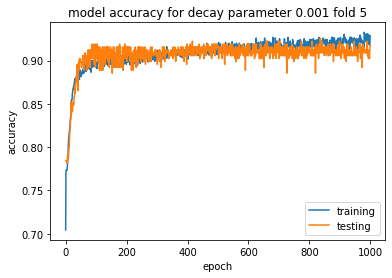

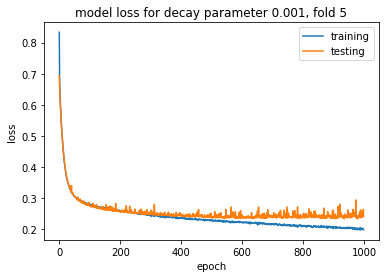

Epoch 1/1000
149/149 - 0s - loss: 0.7549 - accuracy: 0.7481 - val_loss: 0.6139 - val_accuracy: 0.7946
Epoch 2/1000
149/149 - 0s - loss: 0.6320 - accuracy: 0.7708 - val_loss: 0.5721 - val_accuracy: 0.7946
Epoch 3/1000
149/149 - 0s - loss: 0.5919 - accuracy: 0.7708 - val_loss: 0.5378 - val_accuracy: 0.7946
Epoch 4/1000
149/149 - 0s - loss: 0.5585 - accuracy: 0.7708 - val_loss: 0.5113 - val_accuracy: 0.7946
Epoch 5/1000
149/149 - 0s - loss: 0.5318 - accuracy: 0.7758 - val_loss: 0.4897 - val_accuracy: 0.8013
Epoch 6/1000
149/149 - 0s - loss: 0.5084 - accuracy: 0.7809 - val_loss: 0.4742 - val_accuracy: 0.8081
Epoch 7/1000
149/149 - 0s - loss: 0.4887 - accuracy: 0.7951 - val_loss: 0.4567 - val_accuracy: 0.8114
Epoch 8/1000
149/149 - 0s - loss: 0.4705 - accuracy: 0.8052 - val_loss: 0.4386 - val_accuracy: 0.8047
Epoch 9/1000
149/149 - 0s - loss: 0.4550 - accuracy: 0.8086 - val_loss: 0.4244 - val_accuracy: 0.8148
Epoch 10/1000
149/149 - 0s - loss: 0.4397 - accuracy: 0.8212 - val_loss: 0.4120 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2543 - accuracy: 0.8992 - val_loss: 0.2562 - val_accuracy: 0.8923
Epoch 82/1000
149/149 - 0s - loss: 0.2548 - accuracy: 0.8917 - val_loss: 0.2560 - val_accuracy: 0.8923
Epoch 83/1000
149/149 - 0s - loss: 0.2542 - accuracy: 0.8959 - val_loss: 0.2597 - val_accuracy: 0.8923
Epoch 84/1000
149/149 - 0s - loss: 0.2544 - accuracy: 0.8942 - val_loss: 0.2576 - val_accuracy: 0.8889
Epoch 85/1000
149/149 - 0s - loss: 0.2531 - accuracy: 0.8959 - val_loss: 0.2545 - val_accuracy: 0.8956
Epoch 86/1000
149/149 - 0s - loss: 0.2535 - accuracy: 0.8934 - val_loss: 0.2575 - val_accuracy: 0.8822
Epoch 87/1000
149/149 - 0s - loss: 0.2537 - accuracy: 0.8934 - val_loss: 0.2538 - val_accuracy: 0.8923
Epoch 88/1000
149/149 - 0s - loss: 0.2516 - accuracy: 0.8984 - val_loss: 0.2556 - val_accuracy: 0.8855
Epoch 89/1000
149/149 - 0s - loss: 0.2528 - accuracy: 0.8959 - val_loss: 0.2543 - val_accuracy: 0.8956
Epoch 90/1000
149/149 - 0s - loss: 0.2528 - accuracy: 0.8950 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2362 - accuracy: 0.9001 - val_loss: 0.2456 - val_accuracy: 0.8956
Epoch 161/1000
149/149 - 0s - loss: 0.2363 - accuracy: 0.8967 - val_loss: 0.2445 - val_accuracy: 0.9091
Epoch 162/1000
149/149 - 0s - loss: 0.2339 - accuracy: 0.9026 - val_loss: 0.2426 - val_accuracy: 0.8956
Epoch 163/1000
149/149 - 0s - loss: 0.2347 - accuracy: 0.8976 - val_loss: 0.2425 - val_accuracy: 0.8956
Epoch 164/1000
149/149 - 0s - loss: 0.2351 - accuracy: 0.8984 - val_loss: 0.2433 - val_accuracy: 0.8956
Epoch 165/1000
149/149 - 0s - loss: 0.2340 - accuracy: 0.9018 - val_loss: 0.2494 - val_accuracy: 0.8923
Epoch 166/1000
149/149 - 0s - loss: 0.2332 - accuracy: 0.9026 - val_loss: 0.2433 - val_accuracy: 0.8923
Epoch 167/1000
149/149 - 0s - loss: 0.2339 - accuracy: 0.9018 - val_loss: 0.2434 - val_accuracy: 0.8990
Epoch 168/1000
149/149 - 0s - loss: 0.2346 - accuracy: 0.8992 - val_loss: 0.2431 - val_accuracy: 0.8956
Epoch 169/1000
149/149 - 0s - loss: 0.2335 - accuracy: 0.8984 - 

Epoch 239/1000
149/149 - 0s - loss: 0.2220 - accuracy: 0.9009 - val_loss: 0.2374 - val_accuracy: 0.8990
Epoch 240/1000
149/149 - 0s - loss: 0.2208 - accuracy: 0.9051 - val_loss: 0.2505 - val_accuracy: 0.9091
Epoch 241/1000
149/149 - 0s - loss: 0.2238 - accuracy: 0.9034 - val_loss: 0.2373 - val_accuracy: 0.9057
Epoch 242/1000
149/149 - 0s - loss: 0.2216 - accuracy: 0.9034 - val_loss: 0.2413 - val_accuracy: 0.9024
Epoch 243/1000
149/149 - 0s - loss: 0.2235 - accuracy: 0.9051 - val_loss: 0.2353 - val_accuracy: 0.9024
Epoch 244/1000
149/149 - 0s - loss: 0.2237 - accuracy: 0.9026 - val_loss: 0.2374 - val_accuracy: 0.8990
Epoch 245/1000
149/149 - 0s - loss: 0.2209 - accuracy: 0.9018 - val_loss: 0.2394 - val_accuracy: 0.9091
Epoch 246/1000
149/149 - 0s - loss: 0.2228 - accuracy: 0.9043 - val_loss: 0.2395 - val_accuracy: 0.9024
Epoch 247/1000
149/149 - 0s - loss: 0.2204 - accuracy: 0.9060 - val_loss: 0.2346 - val_accuracy: 0.9024
Epoch 248/1000
149/149 - 0s - loss: 0.2220 - accuracy: 0.9051 - 

Epoch 318/1000
149/149 - 0s - loss: 0.2141 - accuracy: 0.9093 - val_loss: 0.2317 - val_accuracy: 0.8990
Epoch 319/1000
149/149 - 0s - loss: 0.2146 - accuracy: 0.9060 - val_loss: 0.2346 - val_accuracy: 0.9091
Epoch 320/1000
149/149 - 0s - loss: 0.2138 - accuracy: 0.9135 - val_loss: 0.2372 - val_accuracy: 0.8956
Epoch 321/1000
149/149 - 0s - loss: 0.2137 - accuracy: 0.9118 - val_loss: 0.2374 - val_accuracy: 0.9024
Epoch 322/1000
149/149 - 0s - loss: 0.2145 - accuracy: 0.9043 - val_loss: 0.2369 - val_accuracy: 0.8956
Epoch 323/1000
149/149 - 0s - loss: 0.2131 - accuracy: 0.9076 - val_loss: 0.2383 - val_accuracy: 0.8956
Epoch 324/1000
149/149 - 0s - loss: 0.2142 - accuracy: 0.9127 - val_loss: 0.2329 - val_accuracy: 0.9091
Epoch 325/1000
149/149 - 0s - loss: 0.2148 - accuracy: 0.9110 - val_loss: 0.2334 - val_accuracy: 0.9024
Epoch 326/1000
149/149 - 0s - loss: 0.2148 - accuracy: 0.9076 - val_loss: 0.2334 - val_accuracy: 0.9024
Epoch 327/1000
149/149 - 0s - loss: 0.2134 - accuracy: 0.9076 - 

Epoch 397/1000
149/149 - 0s - loss: 0.2057 - accuracy: 0.9093 - val_loss: 0.2342 - val_accuracy: 0.9125
Epoch 398/1000
149/149 - 0s - loss: 0.2058 - accuracy: 0.9118 - val_loss: 0.2317 - val_accuracy: 0.9024
Epoch 399/1000
149/149 - 0s - loss: 0.2068 - accuracy: 0.9135 - val_loss: 0.2304 - val_accuracy: 0.9024
Epoch 400/1000
149/149 - 0s - loss: 0.2033 - accuracy: 0.9127 - val_loss: 0.2321 - val_accuracy: 0.9024
Epoch 401/1000
149/149 - 0s - loss: 0.2057 - accuracy: 0.9127 - val_loss: 0.2310 - val_accuracy: 0.8923
Epoch 402/1000
149/149 - 0s - loss: 0.2064 - accuracy: 0.9110 - val_loss: 0.2301 - val_accuracy: 0.8990
Epoch 403/1000
149/149 - 0s - loss: 0.2045 - accuracy: 0.9186 - val_loss: 0.2309 - val_accuracy: 0.8956
Epoch 404/1000
149/149 - 0s - loss: 0.2044 - accuracy: 0.9127 - val_loss: 0.2319 - val_accuracy: 0.9125
Epoch 405/1000
149/149 - 0s - loss: 0.2043 - accuracy: 0.9085 - val_loss: 0.2309 - val_accuracy: 0.9057
Epoch 406/1000
149/149 - 0s - loss: 0.2043 - accuracy: 0.9118 - 

Epoch 476/1000
149/149 - 0s - loss: 0.1984 - accuracy: 0.9160 - val_loss: 0.2328 - val_accuracy: 0.9091
Epoch 477/1000
149/149 - 0s - loss: 0.1981 - accuracy: 0.9160 - val_loss: 0.2337 - val_accuracy: 0.8923
Epoch 478/1000
149/149 - 0s - loss: 0.1986 - accuracy: 0.9186 - val_loss: 0.2315 - val_accuracy: 0.9057
Epoch 479/1000
149/149 - 0s - loss: 0.1987 - accuracy: 0.9177 - val_loss: 0.2318 - val_accuracy: 0.8923
Epoch 480/1000
149/149 - 0s - loss: 0.1966 - accuracy: 0.9236 - val_loss: 0.2307 - val_accuracy: 0.8923
Epoch 481/1000
149/149 - 0s - loss: 0.1959 - accuracy: 0.9169 - val_loss: 0.2404 - val_accuracy: 0.9091
Epoch 482/1000
149/149 - 0s - loss: 0.1988 - accuracy: 0.9152 - val_loss: 0.2319 - val_accuracy: 0.8889
Epoch 483/1000
149/149 - 0s - loss: 0.1972 - accuracy: 0.9177 - val_loss: 0.2297 - val_accuracy: 0.8956
Epoch 484/1000
149/149 - 0s - loss: 0.1967 - accuracy: 0.9144 - val_loss: 0.2340 - val_accuracy: 0.9057
Epoch 485/1000
149/149 - 0s - loss: 0.1988 - accuracy: 0.9160 - 

Epoch 555/1000
149/149 - 0s - loss: 0.1904 - accuracy: 0.9194 - val_loss: 0.2301 - val_accuracy: 0.8923
Epoch 556/1000
149/149 - 0s - loss: 0.1916 - accuracy: 0.9194 - val_loss: 0.2307 - val_accuracy: 0.8956
Epoch 557/1000
149/149 - 0s - loss: 0.1916 - accuracy: 0.9169 - val_loss: 0.2337 - val_accuracy: 0.9125
Epoch 558/1000
149/149 - 0s - loss: 0.1925 - accuracy: 0.9186 - val_loss: 0.2332 - val_accuracy: 0.9125
Epoch 559/1000
149/149 - 0s - loss: 0.1919 - accuracy: 0.9186 - val_loss: 0.2305 - val_accuracy: 0.8923
Epoch 560/1000
149/149 - 0s - loss: 0.1918 - accuracy: 0.9194 - val_loss: 0.2286 - val_accuracy: 0.8990
Epoch 561/1000
149/149 - 0s - loss: 0.1908 - accuracy: 0.9160 - val_loss: 0.2353 - val_accuracy: 0.8956
Epoch 562/1000
149/149 - 0s - loss: 0.1927 - accuracy: 0.9152 - val_loss: 0.2293 - val_accuracy: 0.8889
Epoch 563/1000
149/149 - 0s - loss: 0.1915 - accuracy: 0.9194 - val_loss: 0.2293 - val_accuracy: 0.8956
Epoch 564/1000
149/149 - 0s - loss: 0.1923 - accuracy: 0.9236 - 

Epoch 634/1000
149/149 - 0s - loss: 0.1858 - accuracy: 0.9186 - val_loss: 0.2252 - val_accuracy: 0.9024
Epoch 635/1000
149/149 - 0s - loss: 0.1859 - accuracy: 0.9211 - val_loss: 0.2282 - val_accuracy: 0.9024
Epoch 636/1000
149/149 - 0s - loss: 0.1857 - accuracy: 0.9194 - val_loss: 0.2265 - val_accuracy: 0.9024
Epoch 637/1000
149/149 - 0s - loss: 0.1868 - accuracy: 0.9177 - val_loss: 0.2284 - val_accuracy: 0.8990
Epoch 638/1000
149/149 - 0s - loss: 0.1830 - accuracy: 0.9202 - val_loss: 0.2412 - val_accuracy: 0.9158
Epoch 639/1000
149/149 - 0s - loss: 0.1858 - accuracy: 0.9211 - val_loss: 0.2263 - val_accuracy: 0.9057
Epoch 640/1000
149/149 - 0s - loss: 0.1853 - accuracy: 0.9177 - val_loss: 0.2249 - val_accuracy: 0.8990
Epoch 641/1000
149/149 - 0s - loss: 0.1851 - accuracy: 0.9270 - val_loss: 0.2238 - val_accuracy: 0.9024
Epoch 642/1000
149/149 - 0s - loss: 0.1856 - accuracy: 0.9202 - val_loss: 0.2239 - val_accuracy: 0.8923
Epoch 643/1000
149/149 - 0s - loss: 0.1842 - accuracy: 0.9244 - 

Epoch 713/1000
149/149 - 0s - loss: 0.1788 - accuracy: 0.9236 - val_loss: 0.2210 - val_accuracy: 0.9024
Epoch 714/1000
149/149 - 0s - loss: 0.1789 - accuracy: 0.9253 - val_loss: 0.2188 - val_accuracy: 0.9024
Epoch 715/1000
149/149 - 0s - loss: 0.1789 - accuracy: 0.9219 - val_loss: 0.2224 - val_accuracy: 0.9158
Epoch 716/1000
149/149 - 0s - loss: 0.1792 - accuracy: 0.9253 - val_loss: 0.2195 - val_accuracy: 0.9024
Epoch 717/1000
149/149 - 0s - loss: 0.1743 - accuracy: 0.9303 - val_loss: 0.2292 - val_accuracy: 0.8956
Epoch 718/1000
149/149 - 0s - loss: 0.1802 - accuracy: 0.9202 - val_loss: 0.2182 - val_accuracy: 0.8990
Epoch 719/1000
149/149 - 0s - loss: 0.1760 - accuracy: 0.9303 - val_loss: 0.2197 - val_accuracy: 0.8990
Epoch 720/1000
149/149 - 0s - loss: 0.1798 - accuracy: 0.9261 - val_loss: 0.2216 - val_accuracy: 0.9024
Epoch 721/1000
149/149 - 0s - loss: 0.1775 - accuracy: 0.9278 - val_loss: 0.2182 - val_accuracy: 0.9024
Epoch 722/1000
149/149 - 0s - loss: 0.1786 - accuracy: 0.9253 - 

Epoch 792/1000
149/149 - 0s - loss: 0.1747 - accuracy: 0.9295 - val_loss: 0.2132 - val_accuracy: 0.9091
Epoch 793/1000
149/149 - 0s - loss: 0.1724 - accuracy: 0.9303 - val_loss: 0.2160 - val_accuracy: 0.9158
Epoch 794/1000
149/149 - 0s - loss: 0.1746 - accuracy: 0.9261 - val_loss: 0.2113 - val_accuracy: 0.9024
Epoch 795/1000
149/149 - 0s - loss: 0.1725 - accuracy: 0.9261 - val_loss: 0.2114 - val_accuracy: 0.9091
Epoch 796/1000
149/149 - 0s - loss: 0.1732 - accuracy: 0.9278 - val_loss: 0.2140 - val_accuracy: 0.9024
Epoch 797/1000
149/149 - 0s - loss: 0.1721 - accuracy: 0.9295 - val_loss: 0.2107 - val_accuracy: 0.9057
Epoch 798/1000
149/149 - 0s - loss: 0.1719 - accuracy: 0.9303 - val_loss: 0.2180 - val_accuracy: 0.9024
Epoch 799/1000
149/149 - 0s - loss: 0.1714 - accuracy: 0.9270 - val_loss: 0.2146 - val_accuracy: 0.9125
Epoch 800/1000
149/149 - 0s - loss: 0.1703 - accuracy: 0.9295 - val_loss: 0.2095 - val_accuracy: 0.9024
Epoch 801/1000
149/149 - 0s - loss: 0.1720 - accuracy: 0.9286 - 

Epoch 871/1000
149/149 - 0s - loss: 0.1673 - accuracy: 0.9320 - val_loss: 0.2099 - val_accuracy: 0.9125
Epoch 872/1000
149/149 - 0s - loss: 0.1664 - accuracy: 0.9286 - val_loss: 0.2083 - val_accuracy: 0.9158
Epoch 873/1000
149/149 - 0s - loss: 0.1655 - accuracy: 0.9278 - val_loss: 0.2077 - val_accuracy: 0.9125
Epoch 874/1000
149/149 - 0s - loss: 0.1666 - accuracy: 0.9328 - val_loss: 0.2080 - val_accuracy: 0.9125
Epoch 875/1000
149/149 - 0s - loss: 0.1667 - accuracy: 0.9303 - val_loss: 0.2169 - val_accuracy: 0.9158
Epoch 876/1000
149/149 - 0s - loss: 0.1663 - accuracy: 0.9295 - val_loss: 0.2117 - val_accuracy: 0.9192
Epoch 877/1000
149/149 - 0s - loss: 0.1683 - accuracy: 0.9286 - val_loss: 0.2083 - val_accuracy: 0.9125
Epoch 878/1000
149/149 - 0s - loss: 0.1676 - accuracy: 0.9286 - val_loss: 0.2107 - val_accuracy: 0.9091
Epoch 879/1000
149/149 - 0s - loss: 0.1654 - accuracy: 0.9320 - val_loss: 0.2126 - val_accuracy: 0.9125
Epoch 880/1000
149/149 - 0s - loss: 0.1674 - accuracy: 0.9286 - 

Epoch 950/1000
149/149 - 0s - loss: 0.1619 - accuracy: 0.9362 - val_loss: 0.2057 - val_accuracy: 0.9158
Epoch 951/1000
149/149 - 0s - loss: 0.1611 - accuracy: 0.9320 - val_loss: 0.2062 - val_accuracy: 0.9091
Epoch 952/1000
149/149 - 0s - loss: 0.1618 - accuracy: 0.9278 - val_loss: 0.2162 - val_accuracy: 0.9226
Epoch 953/1000
149/149 - 0s - loss: 0.1634 - accuracy: 0.9328 - val_loss: 0.2077 - val_accuracy: 0.9125
Epoch 954/1000
149/149 - 0s - loss: 0.1579 - accuracy: 0.9370 - val_loss: 0.2058 - val_accuracy: 0.9158
Epoch 955/1000
149/149 - 0s - loss: 0.1628 - accuracy: 0.9337 - val_loss: 0.2046 - val_accuracy: 0.9158
Epoch 956/1000
149/149 - 0s - loss: 0.1586 - accuracy: 0.9328 - val_loss: 0.2048 - val_accuracy: 0.9158
Epoch 957/1000
149/149 - 0s - loss: 0.1611 - accuracy: 0.9320 - val_loss: 0.2066 - val_accuracy: 0.9158
Epoch 958/1000
149/149 - 0s - loss: 0.1597 - accuracy: 0.9286 - val_loss: 0.2051 - val_accuracy: 0.9125
Epoch 959/1000
149/149 - 0s - loss: 0.1611 - accuracy: 0.9337 - 

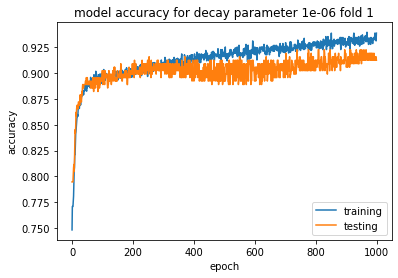

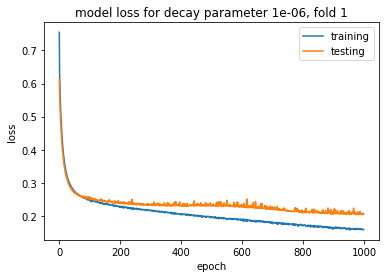

Epoch 1/1000
149/149 - 0s - loss: 0.8011 - accuracy: 0.7557 - val_loss: 0.7199 - val_accuracy: 0.7576
Epoch 2/1000
149/149 - 0s - loss: 0.6679 - accuracy: 0.7800 - val_loss: 0.6794 - val_accuracy: 0.7576
Epoch 3/1000
149/149 - 0s - loss: 0.6420 - accuracy: 0.7800 - val_loss: 0.6518 - val_accuracy: 0.7576
Epoch 4/1000
149/149 - 0s - loss: 0.6221 - accuracy: 0.7800 - val_loss: 0.6263 - val_accuracy: 0.7576
Epoch 5/1000
149/149 - 0s - loss: 0.6033 - accuracy: 0.7800 - val_loss: 0.6013 - val_accuracy: 0.7576
Epoch 6/1000
149/149 - 0s - loss: 0.5843 - accuracy: 0.7800 - val_loss: 0.5758 - val_accuracy: 0.7576
Epoch 7/1000
149/149 - 0s - loss: 0.5663 - accuracy: 0.7800 - val_loss: 0.5530 - val_accuracy: 0.7576
Epoch 8/1000
149/149 - 0s - loss: 0.5488 - accuracy: 0.7800 - val_loss: 0.5322 - val_accuracy: 0.7576
Epoch 9/1000
149/149 - 0s - loss: 0.5314 - accuracy: 0.7800 - val_loss: 0.5090 - val_accuracy: 0.7643
Epoch 10/1000
149/149 - 0s - loss: 0.5139 - accuracy: 0.7842 - val_loss: 0.4884 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2539 - accuracy: 0.8942 - val_loss: 0.2630 - val_accuracy: 0.9057
Epoch 82/1000
149/149 - 0s - loss: 0.2530 - accuracy: 0.8908 - val_loss: 0.2577 - val_accuracy: 0.9091
Epoch 83/1000
149/149 - 0s - loss: 0.2522 - accuracy: 0.8959 - val_loss: 0.2571 - val_accuracy: 0.9024
Epoch 84/1000
149/149 - 0s - loss: 0.2515 - accuracy: 0.8967 - val_loss: 0.2572 - val_accuracy: 0.9024
Epoch 85/1000
149/149 - 0s - loss: 0.2499 - accuracy: 0.8967 - val_loss: 0.2566 - val_accuracy: 0.9057
Epoch 86/1000
149/149 - 0s - loss: 0.2513 - accuracy: 0.8934 - val_loss: 0.2566 - val_accuracy: 0.9024
Epoch 87/1000
149/149 - 0s - loss: 0.2502 - accuracy: 0.8925 - val_loss: 0.2610 - val_accuracy: 0.9125
Epoch 88/1000
149/149 - 0s - loss: 0.2484 - accuracy: 0.9009 - val_loss: 0.2588 - val_accuracy: 0.9024
Epoch 89/1000
149/149 - 0s - loss: 0.2493 - accuracy: 0.8925 - val_loss: 0.2583 - val_accuracy: 0.9057
Epoch 90/1000
149/149 - 0s - loss: 0.2491 - accuracy: 0.8925 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2280 - accuracy: 0.9034 - val_loss: 0.2524 - val_accuracy: 0.9024
Epoch 161/1000
149/149 - 0s - loss: 0.2277 - accuracy: 0.9034 - val_loss: 0.2593 - val_accuracy: 0.9057
Epoch 162/1000
149/149 - 0s - loss: 0.2265 - accuracy: 0.8967 - val_loss: 0.2517 - val_accuracy: 0.9125
Epoch 163/1000
149/149 - 0s - loss: 0.2267 - accuracy: 0.9043 - val_loss: 0.2524 - val_accuracy: 0.9057
Epoch 164/1000
149/149 - 0s - loss: 0.2277 - accuracy: 0.8976 - val_loss: 0.2521 - val_accuracy: 0.9091
Epoch 165/1000
149/149 - 0s - loss: 0.2256 - accuracy: 0.8976 - val_loss: 0.2577 - val_accuracy: 0.9024
Epoch 166/1000
149/149 - 0s - loss: 0.2247 - accuracy: 0.8934 - val_loss: 0.2596 - val_accuracy: 0.9024
Epoch 167/1000
149/149 - 0s - loss: 0.2255 - accuracy: 0.9060 - val_loss: 0.2559 - val_accuracy: 0.9057
Epoch 168/1000
149/149 - 0s - loss: 0.2258 - accuracy: 0.9034 - val_loss: 0.2503 - val_accuracy: 0.9091
Epoch 169/1000
149/149 - 0s - loss: 0.2262 - accuracy: 0.8976 - 

Epoch 239/1000
149/149 - 0s - loss: 0.2123 - accuracy: 0.9026 - val_loss: 0.2486 - val_accuracy: 0.9057
Epoch 240/1000
149/149 - 0s - loss: 0.2119 - accuracy: 0.9085 - val_loss: 0.2579 - val_accuracy: 0.8990
Epoch 241/1000
149/149 - 0s - loss: 0.2139 - accuracy: 0.9068 - val_loss: 0.2507 - val_accuracy: 0.8990
Epoch 242/1000
149/149 - 0s - loss: 0.2121 - accuracy: 0.9034 - val_loss: 0.2458 - val_accuracy: 0.9057
Epoch 243/1000
149/149 - 0s - loss: 0.2131 - accuracy: 0.9034 - val_loss: 0.2510 - val_accuracy: 0.8923
Epoch 244/1000
149/149 - 0s - loss: 0.2133 - accuracy: 0.9026 - val_loss: 0.2515 - val_accuracy: 0.9024
Epoch 245/1000
149/149 - 0s - loss: 0.2103 - accuracy: 0.9060 - val_loss: 0.2449 - val_accuracy: 0.9091
Epoch 246/1000
149/149 - 0s - loss: 0.2130 - accuracy: 0.9076 - val_loss: 0.2518 - val_accuracy: 0.9024
Epoch 247/1000
149/149 - 0s - loss: 0.2104 - accuracy: 0.9060 - val_loss: 0.2578 - val_accuracy: 0.8956
Epoch 248/1000
149/149 - 0s - loss: 0.2115 - accuracy: 0.9076 - 

Epoch 318/1000
149/149 - 0s - loss: 0.2036 - accuracy: 0.9127 - val_loss: 0.2554 - val_accuracy: 0.8889
Epoch 319/1000
149/149 - 0s - loss: 0.2041 - accuracy: 0.9076 - val_loss: 0.2460 - val_accuracy: 0.8889
Epoch 320/1000
149/149 - 0s - loss: 0.2031 - accuracy: 0.9093 - val_loss: 0.2549 - val_accuracy: 0.8889
Epoch 321/1000
149/149 - 0s - loss: 0.2038 - accuracy: 0.9085 - val_loss: 0.2429 - val_accuracy: 0.9057
Epoch 322/1000
149/149 - 0s - loss: 0.2051 - accuracy: 0.9051 - val_loss: 0.2477 - val_accuracy: 0.8956
Epoch 323/1000
149/149 - 0s - loss: 0.2041 - accuracy: 0.9127 - val_loss: 0.2510 - val_accuracy: 0.8923
Epoch 324/1000
149/149 - 0s - loss: 0.2029 - accuracy: 0.9043 - val_loss: 0.2449 - val_accuracy: 0.8990
Epoch 325/1000
149/149 - 0s - loss: 0.2035 - accuracy: 0.9093 - val_loss: 0.2497 - val_accuracy: 0.8956
Epoch 326/1000
149/149 - 0s - loss: 0.2037 - accuracy: 0.9060 - val_loss: 0.2450 - val_accuracy: 0.9024
Epoch 327/1000
149/149 - 0s - loss: 0.2023 - accuracy: 0.9051 - 

Epoch 397/1000
149/149 - 0s - loss: 0.1964 - accuracy: 0.9169 - val_loss: 0.2393 - val_accuracy: 0.9024
Epoch 398/1000
149/149 - 0s - loss: 0.1953 - accuracy: 0.9110 - val_loss: 0.2374 - val_accuracy: 0.9057
Epoch 399/1000
149/149 - 0s - loss: 0.1973 - accuracy: 0.9135 - val_loss: 0.2439 - val_accuracy: 0.8956
Epoch 400/1000
149/149 - 0s - loss: 0.1943 - accuracy: 0.9152 - val_loss: 0.2450 - val_accuracy: 0.9024
Epoch 401/1000
149/149 - 0s - loss: 0.1939 - accuracy: 0.9160 - val_loss: 0.2621 - val_accuracy: 0.8889
Epoch 402/1000
149/149 - 0s - loss: 0.1956 - accuracy: 0.9144 - val_loss: 0.2467 - val_accuracy: 0.8956
Epoch 403/1000
149/149 - 0s - loss: 0.1941 - accuracy: 0.9118 - val_loss: 0.2452 - val_accuracy: 0.8990
Epoch 404/1000
149/149 - 0s - loss: 0.1949 - accuracy: 0.9118 - val_loss: 0.2568 - val_accuracy: 0.8956
Epoch 405/1000
149/149 - 0s - loss: 0.1945 - accuracy: 0.9102 - val_loss: 0.2508 - val_accuracy: 0.8889
Epoch 406/1000
149/149 - 0s - loss: 0.1963 - accuracy: 0.9144 - 

Epoch 476/1000
149/149 - 0s - loss: 0.1900 - accuracy: 0.9177 - val_loss: 0.2382 - val_accuracy: 0.8956
Epoch 477/1000
149/149 - 0s - loss: 0.1875 - accuracy: 0.9186 - val_loss: 0.2301 - val_accuracy: 0.9158
Epoch 478/1000
149/149 - 0s - loss: 0.1886 - accuracy: 0.9202 - val_loss: 0.2395 - val_accuracy: 0.8990
Epoch 479/1000
149/149 - 0s - loss: 0.1894 - accuracy: 0.9152 - val_loss: 0.2348 - val_accuracy: 0.9024
Epoch 480/1000
149/149 - 0s - loss: 0.1882 - accuracy: 0.9144 - val_loss: 0.2514 - val_accuracy: 0.8956
Epoch 481/1000
149/149 - 0s - loss: 0.1891 - accuracy: 0.9236 - val_loss: 0.2363 - val_accuracy: 0.8956
Epoch 482/1000
149/149 - 0s - loss: 0.1876 - accuracy: 0.9169 - val_loss: 0.2572 - val_accuracy: 0.8956
Epoch 483/1000
149/149 - 0s - loss: 0.1885 - accuracy: 0.9177 - val_loss: 0.2414 - val_accuracy: 0.8990
Epoch 484/1000
149/149 - 0s - loss: 0.1889 - accuracy: 0.9135 - val_loss: 0.2318 - val_accuracy: 0.9024
Epoch 485/1000
149/149 - 0s - loss: 0.1891 - accuracy: 0.9177 - 

Epoch 555/1000
149/149 - 0s - loss: 0.1831 - accuracy: 0.9253 - val_loss: 0.2346 - val_accuracy: 0.8990
Epoch 556/1000
149/149 - 0s - loss: 0.1832 - accuracy: 0.9177 - val_loss: 0.2449 - val_accuracy: 0.8956
Epoch 557/1000
149/149 - 0s - loss: 0.1837 - accuracy: 0.9144 - val_loss: 0.2411 - val_accuracy: 0.8923
Epoch 558/1000
149/149 - 0s - loss: 0.1841 - accuracy: 0.9152 - val_loss: 0.2304 - val_accuracy: 0.9024
Epoch 559/1000
149/149 - 0s - loss: 0.1822 - accuracy: 0.9228 - val_loss: 0.2444 - val_accuracy: 0.9024
Epoch 560/1000
149/149 - 0s - loss: 0.1812 - accuracy: 0.9219 - val_loss: 0.2430 - val_accuracy: 0.8923
Epoch 561/1000
149/149 - 0s - loss: 0.1827 - accuracy: 0.9169 - val_loss: 0.2431 - val_accuracy: 0.9091
Epoch 562/1000
149/149 - 0s - loss: 0.1816 - accuracy: 0.9186 - val_loss: 0.2302 - val_accuracy: 0.9125
Epoch 563/1000
149/149 - 0s - loss: 0.1820 - accuracy: 0.9244 - val_loss: 0.2320 - val_accuracy: 0.8990
Epoch 564/1000
149/149 - 0s - loss: 0.1831 - accuracy: 0.9194 - 

Epoch 634/1000
149/149 - 0s - loss: 0.1768 - accuracy: 0.9270 - val_loss: 0.2333 - val_accuracy: 0.8956
Epoch 635/1000
149/149 - 0s - loss: 0.1762 - accuracy: 0.9278 - val_loss: 0.2369 - val_accuracy: 0.9091
Epoch 636/1000
149/149 - 0s - loss: 0.1766 - accuracy: 0.9228 - val_loss: 0.2269 - val_accuracy: 0.9091
Epoch 637/1000
149/149 - 0s - loss: 0.1765 - accuracy: 0.9286 - val_loss: 0.2315 - val_accuracy: 0.9125
Epoch 638/1000
149/149 - 0s - loss: 0.1747 - accuracy: 0.9228 - val_loss: 0.2326 - val_accuracy: 0.9057
Epoch 639/1000
149/149 - 0s - loss: 0.1776 - accuracy: 0.9244 - val_loss: 0.2273 - val_accuracy: 0.9024
Epoch 640/1000
149/149 - 0s - loss: 0.1754 - accuracy: 0.9278 - val_loss: 0.2388 - val_accuracy: 0.8923
Epoch 641/1000
149/149 - 0s - loss: 0.1753 - accuracy: 0.9236 - val_loss: 0.2318 - val_accuracy: 0.9024
Epoch 642/1000
149/149 - 0s - loss: 0.1761 - accuracy: 0.9270 - val_loss: 0.2395 - val_accuracy: 0.9158
Epoch 643/1000
149/149 - 0s - loss: 0.1742 - accuracy: 0.9278 - 

Epoch 713/1000
149/149 - 0s - loss: 0.1697 - accuracy: 0.9295 - val_loss: 0.2319 - val_accuracy: 0.9091
Epoch 714/1000
149/149 - 0s - loss: 0.1707 - accuracy: 0.9236 - val_loss: 0.2379 - val_accuracy: 0.9057
Epoch 715/1000
149/149 - 0s - loss: 0.1703 - accuracy: 0.9295 - val_loss: 0.2349 - val_accuracy: 0.8990
Epoch 716/1000
149/149 - 0s - loss: 0.1696 - accuracy: 0.9328 - val_loss: 0.2282 - val_accuracy: 0.9024
Epoch 717/1000
149/149 - 0s - loss: 0.1706 - accuracy: 0.9270 - val_loss: 0.2295 - val_accuracy: 0.9125
Epoch 718/1000
149/149 - 0s - loss: 0.1699 - accuracy: 0.9253 - val_loss: 0.2331 - val_accuracy: 0.9192
Epoch 719/1000
149/149 - 0s - loss: 0.1686 - accuracy: 0.9270 - val_loss: 0.2350 - val_accuracy: 0.9192
Epoch 720/1000
149/149 - 0s - loss: 0.1706 - accuracy: 0.9219 - val_loss: 0.2392 - val_accuracy: 0.9158
Epoch 721/1000
149/149 - 0s - loss: 0.1694 - accuracy: 0.9295 - val_loss: 0.2320 - val_accuracy: 0.8956
Epoch 722/1000
149/149 - 0s - loss: 0.1704 - accuracy: 0.9303 - 

Epoch 792/1000
149/149 - 0s - loss: 0.1654 - accuracy: 0.9303 - val_loss: 0.2245 - val_accuracy: 0.9091
Epoch 793/1000
149/149 - 0s - loss: 0.1624 - accuracy: 0.9353 - val_loss: 0.2320 - val_accuracy: 0.8990
Epoch 794/1000
149/149 - 0s - loss: 0.1655 - accuracy: 0.9345 - val_loss: 0.2314 - val_accuracy: 0.9024
Epoch 795/1000
149/149 - 0s - loss: 0.1631 - accuracy: 0.9270 - val_loss: 0.2349 - val_accuracy: 0.9024
Epoch 796/1000
149/149 - 0s - loss: 0.1635 - accuracy: 0.9286 - val_loss: 0.2288 - val_accuracy: 0.9057
Epoch 797/1000
149/149 - 0s - loss: 0.1635 - accuracy: 0.9320 - val_loss: 0.2332 - val_accuracy: 0.8990
Epoch 798/1000
149/149 - 0s - loss: 0.1643 - accuracy: 0.9303 - val_loss: 0.2396 - val_accuracy: 0.9091
Epoch 799/1000
149/149 - 0s - loss: 0.1606 - accuracy: 0.9328 - val_loss: 0.2160 - val_accuracy: 0.9226
Epoch 800/1000
149/149 - 0s - loss: 0.1638 - accuracy: 0.9320 - val_loss: 0.2317 - val_accuracy: 0.8990
Epoch 801/1000
149/149 - 0s - loss: 0.1641 - accuracy: 0.9328 - 

Epoch 871/1000
149/149 - 0s - loss: 0.1579 - accuracy: 0.9312 - val_loss: 0.2193 - val_accuracy: 0.9158
Epoch 872/1000
149/149 - 0s - loss: 0.1582 - accuracy: 0.9362 - val_loss: 0.2268 - val_accuracy: 0.9024
Epoch 873/1000
149/149 - 0s - loss: 0.1580 - accuracy: 0.9278 - val_loss: 0.2278 - val_accuracy: 0.9057
Epoch 874/1000
149/149 - 0s - loss: 0.1595 - accuracy: 0.9286 - val_loss: 0.2204 - val_accuracy: 0.9091
Epoch 875/1000
149/149 - 0s - loss: 0.1583 - accuracy: 0.9353 - val_loss: 0.2267 - val_accuracy: 0.9091
Epoch 876/1000
149/149 - 0s - loss: 0.1582 - accuracy: 0.9362 - val_loss: 0.2297 - val_accuracy: 0.9024
Epoch 877/1000
149/149 - 0s - loss: 0.1592 - accuracy: 0.9320 - val_loss: 0.2250 - val_accuracy: 0.9057
Epoch 878/1000
149/149 - 0s - loss: 0.1593 - accuracy: 0.9337 - val_loss: 0.2225 - val_accuracy: 0.9057
Epoch 879/1000
149/149 - 0s - loss: 0.1595 - accuracy: 0.9353 - val_loss: 0.2211 - val_accuracy: 0.9057
Epoch 880/1000
149/149 - 0s - loss: 0.1600 - accuracy: 0.9295 - 

Epoch 950/1000
149/149 - 0s - loss: 0.1538 - accuracy: 0.9295 - val_loss: 0.2361 - val_accuracy: 0.9091
Epoch 951/1000
149/149 - 0s - loss: 0.1552 - accuracy: 0.9370 - val_loss: 0.2397 - val_accuracy: 0.9024
Epoch 952/1000
149/149 - 0s - loss: 0.1534 - accuracy: 0.9370 - val_loss: 0.2400 - val_accuracy: 0.8990
Epoch 953/1000
149/149 - 0s - loss: 0.1544 - accuracy: 0.9320 - val_loss: 0.2362 - val_accuracy: 0.9057
Epoch 954/1000
149/149 - 0s - loss: 0.1527 - accuracy: 0.9353 - val_loss: 0.2294 - val_accuracy: 0.9057
Epoch 955/1000
149/149 - 0s - loss: 0.1555 - accuracy: 0.9353 - val_loss: 0.2348 - val_accuracy: 0.9125
Epoch 956/1000
149/149 - 0s - loss: 0.1514 - accuracy: 0.9379 - val_loss: 0.2596 - val_accuracy: 0.9024
Epoch 957/1000
149/149 - 0s - loss: 0.1528 - accuracy: 0.9395 - val_loss: 0.2272 - val_accuracy: 0.9192
Epoch 958/1000
149/149 - 0s - loss: 0.1531 - accuracy: 0.9362 - val_loss: 0.2279 - val_accuracy: 0.9226
Epoch 959/1000
149/149 - 0s - loss: 0.1535 - accuracy: 0.9362 - 

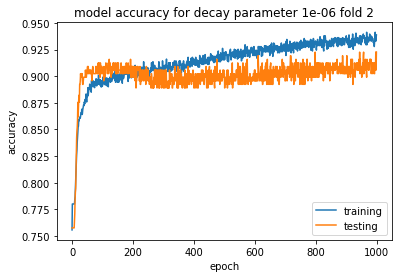

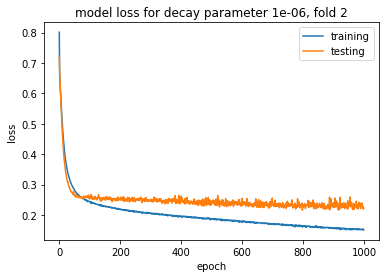

Epoch 1/1000
149/149 - 0s - loss: 0.7724 - accuracy: 0.7380 - val_loss: 0.6211 - val_accuracy: 0.7980
Epoch 2/1000
149/149 - 0s - loss: 0.6412 - accuracy: 0.7699 - val_loss: 0.5832 - val_accuracy: 0.7980
Epoch 3/1000
149/149 - 0s - loss: 0.6071 - accuracy: 0.7699 - val_loss: 0.5485 - val_accuracy: 0.7980
Epoch 4/1000
149/149 - 0s - loss: 0.5728 - accuracy: 0.7699 - val_loss: 0.5250 - val_accuracy: 0.7980
Epoch 5/1000
149/149 - 0s - loss: 0.5486 - accuracy: 0.7699 - val_loss: 0.5005 - val_accuracy: 0.7980
Epoch 6/1000
149/149 - 0s - loss: 0.5279 - accuracy: 0.7725 - val_loss: 0.4858 - val_accuracy: 0.8114
Epoch 7/1000
149/149 - 0s - loss: 0.5100 - accuracy: 0.7825 - val_loss: 0.4665 - val_accuracy: 0.8182
Epoch 8/1000
149/149 - 0s - loss: 0.4937 - accuracy: 0.7943 - val_loss: 0.4496 - val_accuracy: 0.8182
Epoch 9/1000
149/149 - 0s - loss: 0.4792 - accuracy: 0.7985 - val_loss: 0.4384 - val_accuracy: 0.8418
Epoch 10/1000
149/149 - 0s - loss: 0.4658 - accuracy: 0.8077 - val_loss: 0.4242 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2579 - accuracy: 0.8942 - val_loss: 0.2669 - val_accuracy: 0.8855
Epoch 82/1000
149/149 - 0s - loss: 0.2574 - accuracy: 0.8883 - val_loss: 0.2644 - val_accuracy: 0.8855
Epoch 83/1000
149/149 - 0s - loss: 0.2574 - accuracy: 0.8908 - val_loss: 0.2499 - val_accuracy: 0.8923
Epoch 84/1000
149/149 - 0s - loss: 0.2549 - accuracy: 0.8934 - val_loss: 0.2519 - val_accuracy: 0.8788
Epoch 85/1000
149/149 - 0s - loss: 0.2545 - accuracy: 0.8934 - val_loss: 0.2527 - val_accuracy: 0.8822
Epoch 86/1000
149/149 - 0s - loss: 0.2548 - accuracy: 0.8950 - val_loss: 0.2535 - val_accuracy: 0.8822
Epoch 87/1000
149/149 - 0s - loss: 0.2550 - accuracy: 0.8908 - val_loss: 0.2504 - val_accuracy: 0.8822
Epoch 88/1000
149/149 - 0s - loss: 0.2522 - accuracy: 0.8976 - val_loss: 0.2469 - val_accuracy: 0.8956
Epoch 89/1000
149/149 - 0s - loss: 0.2535 - accuracy: 0.8950 - val_loss: 0.2467 - val_accuracy: 0.8889
Epoch 90/1000
149/149 - 0s - loss: 0.2542 - accuracy: 0.8917 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2339 - accuracy: 0.9026 - val_loss: 0.2274 - val_accuracy: 0.8990
Epoch 161/1000
149/149 - 0s - loss: 0.2322 - accuracy: 0.9060 - val_loss: 0.2516 - val_accuracy: 0.8956
Epoch 162/1000
149/149 - 0s - loss: 0.2342 - accuracy: 0.9001 - val_loss: 0.2284 - val_accuracy: 0.8990
Epoch 163/1000
149/149 - 0s - loss: 0.2309 - accuracy: 0.8992 - val_loss: 0.2487 - val_accuracy: 0.8990
Epoch 164/1000
149/149 - 0s - loss: 0.2329 - accuracy: 0.9034 - val_loss: 0.2296 - val_accuracy: 0.8956
Epoch 165/1000
149/149 - 0s - loss: 0.2300 - accuracy: 0.8950 - val_loss: 0.2231 - val_accuracy: 0.8956
Epoch 166/1000
149/149 - 0s - loss: 0.2291 - accuracy: 0.9009 - val_loss: 0.2238 - val_accuracy: 0.8990
Epoch 167/1000
149/149 - 0s - loss: 0.2318 - accuracy: 0.9001 - val_loss: 0.2301 - val_accuracy: 0.9024
Epoch 168/1000
149/149 - 0s - loss: 0.2318 - accuracy: 0.8992 - val_loss: 0.2276 - val_accuracy: 0.8990
Epoch 169/1000
149/149 - 0s - loss: 0.2317 - accuracy: 0.9051 - 

Epoch 239/1000
149/149 - 0s - loss: 0.2169 - accuracy: 0.9034 - val_loss: 0.2274 - val_accuracy: 0.9091
Epoch 240/1000
149/149 - 0s - loss: 0.2193 - accuracy: 0.9026 - val_loss: 0.2294 - val_accuracy: 0.9024
Epoch 241/1000
149/149 - 0s - loss: 0.2194 - accuracy: 0.9009 - val_loss: 0.2293 - val_accuracy: 0.8990
Epoch 242/1000
149/149 - 0s - loss: 0.2177 - accuracy: 0.9034 - val_loss: 0.2154 - val_accuracy: 0.9057
Epoch 243/1000
149/149 - 0s - loss: 0.2188 - accuracy: 0.9009 - val_loss: 0.2215 - val_accuracy: 0.9024
Epoch 244/1000
149/149 - 0s - loss: 0.2191 - accuracy: 0.9018 - val_loss: 0.2193 - val_accuracy: 0.9091
Epoch 245/1000
149/149 - 0s - loss: 0.2178 - accuracy: 0.9051 - val_loss: 0.2233 - val_accuracy: 0.8956
Epoch 246/1000
149/149 - 0s - loss: 0.2184 - accuracy: 0.9018 - val_loss: 0.2199 - val_accuracy: 0.9057
Epoch 247/1000
149/149 - 0s - loss: 0.2154 - accuracy: 0.9051 - val_loss: 0.2267 - val_accuracy: 0.9057
Epoch 248/1000
149/149 - 0s - loss: 0.2176 - accuracy: 0.9026 - 

Epoch 318/1000
149/149 - 0s - loss: 0.2095 - accuracy: 0.9009 - val_loss: 0.2111 - val_accuracy: 0.8990
Epoch 319/1000
149/149 - 0s - loss: 0.2091 - accuracy: 0.9001 - val_loss: 0.2170 - val_accuracy: 0.8990
Epoch 320/1000
149/149 - 0s - loss: 0.2084 - accuracy: 0.9043 - val_loss: 0.2121 - val_accuracy: 0.9091
Epoch 321/1000
149/149 - 0s - loss: 0.2086 - accuracy: 0.9034 - val_loss: 0.2239 - val_accuracy: 0.9091
Epoch 322/1000
149/149 - 0s - loss: 0.2082 - accuracy: 0.9060 - val_loss: 0.2166 - val_accuracy: 0.9024
Epoch 323/1000
149/149 - 0s - loss: 0.2084 - accuracy: 0.9043 - val_loss: 0.2112 - val_accuracy: 0.9057
Epoch 324/1000
149/149 - 0s - loss: 0.2078 - accuracy: 0.9018 - val_loss: 0.2201 - val_accuracy: 0.9057
Epoch 325/1000
149/149 - 0s - loss: 0.2074 - accuracy: 0.9018 - val_loss: 0.2125 - val_accuracy: 0.9057
Epoch 326/1000
149/149 - 0s - loss: 0.2084 - accuracy: 0.9034 - val_loss: 0.2121 - val_accuracy: 0.9024
Epoch 327/1000
149/149 - 0s - loss: 0.2072 - accuracy: 0.8992 - 

Epoch 397/1000
149/149 - 0s - loss: 0.1999 - accuracy: 0.9093 - val_loss: 0.2255 - val_accuracy: 0.9024
Epoch 398/1000
149/149 - 0s - loss: 0.2006 - accuracy: 0.9085 - val_loss: 0.2114 - val_accuracy: 0.9057
Epoch 399/1000
149/149 - 0s - loss: 0.2004 - accuracy: 0.9102 - val_loss: 0.2115 - val_accuracy: 0.9091
Epoch 400/1000
149/149 - 0s - loss: 0.1993 - accuracy: 0.9085 - val_loss: 0.2093 - val_accuracy: 0.9091
Epoch 401/1000
149/149 - 0s - loss: 0.1992 - accuracy: 0.9110 - val_loss: 0.2084 - val_accuracy: 0.9091
Epoch 402/1000
149/149 - 0s - loss: 0.1996 - accuracy: 0.9068 - val_loss: 0.2108 - val_accuracy: 0.9057
Epoch 403/1000
149/149 - 0s - loss: 0.2002 - accuracy: 0.9093 - val_loss: 0.2154 - val_accuracy: 0.9091
Epoch 404/1000
149/149 - 0s - loss: 0.1987 - accuracy: 0.9068 - val_loss: 0.2323 - val_accuracy: 0.8923
Epoch 405/1000
149/149 - 0s - loss: 0.1967 - accuracy: 0.9093 - val_loss: 0.2279 - val_accuracy: 0.8956
Epoch 406/1000
149/149 - 0s - loss: 0.1999 - accuracy: 0.9102 - 

Epoch 476/1000
149/149 - 0s - loss: 0.1935 - accuracy: 0.9110 - val_loss: 0.2167 - val_accuracy: 0.9091
Epoch 477/1000
149/149 - 0s - loss: 0.1913 - accuracy: 0.9127 - val_loss: 0.2212 - val_accuracy: 0.8923
Epoch 478/1000
149/149 - 0s - loss: 0.1926 - accuracy: 0.9144 - val_loss: 0.2149 - val_accuracy: 0.9125
Epoch 479/1000
149/149 - 0s - loss: 0.1918 - accuracy: 0.9118 - val_loss: 0.2106 - val_accuracy: 0.9125
Epoch 480/1000
149/149 - 0s - loss: 0.1920 - accuracy: 0.9076 - val_loss: 0.2250 - val_accuracy: 0.8956
Epoch 481/1000
149/149 - 0s - loss: 0.1926 - accuracy: 0.9110 - val_loss: 0.2186 - val_accuracy: 0.8923
Epoch 482/1000
149/149 - 0s - loss: 0.1889 - accuracy: 0.9144 - val_loss: 0.2043 - val_accuracy: 0.9158
Epoch 483/1000
149/149 - 0s - loss: 0.1926 - accuracy: 0.9110 - val_loss: 0.2198 - val_accuracy: 0.9024
Epoch 484/1000
149/149 - 0s - loss: 0.1914 - accuracy: 0.9135 - val_loss: 0.2207 - val_accuracy: 0.9091
Epoch 485/1000
149/149 - 0s - loss: 0.1913 - accuracy: 0.9127 - 

Epoch 555/1000
149/149 - 0s - loss: 0.1850 - accuracy: 0.9186 - val_loss: 0.2081 - val_accuracy: 0.9125
Epoch 556/1000
149/149 - 0s - loss: 0.1867 - accuracy: 0.9127 - val_loss: 0.2133 - val_accuracy: 0.9024
Epoch 557/1000
149/149 - 0s - loss: 0.1868 - accuracy: 0.9160 - val_loss: 0.2088 - val_accuracy: 0.9125
Epoch 558/1000
149/149 - 0s - loss: 0.1855 - accuracy: 0.9160 - val_loss: 0.2361 - val_accuracy: 0.8889
Epoch 559/1000
149/149 - 0s - loss: 0.1867 - accuracy: 0.9144 - val_loss: 0.2059 - val_accuracy: 0.9125
Epoch 560/1000
149/149 - 0s - loss: 0.1845 - accuracy: 0.9177 - val_loss: 0.2196 - val_accuracy: 0.8956
Epoch 561/1000
149/149 - 0s - loss: 0.1858 - accuracy: 0.9093 - val_loss: 0.2062 - val_accuracy: 0.9158
Epoch 562/1000
149/149 - 0s - loss: 0.1852 - accuracy: 0.9160 - val_loss: 0.2153 - val_accuracy: 0.9024
Epoch 563/1000
149/149 - 0s - loss: 0.1845 - accuracy: 0.9186 - val_loss: 0.2126 - val_accuracy: 0.9125
Epoch 564/1000
149/149 - 0s - loss: 0.1871 - accuracy: 0.9202 - 

Epoch 634/1000
149/149 - 0s - loss: 0.1804 - accuracy: 0.9177 - val_loss: 0.2071 - val_accuracy: 0.9091
Epoch 635/1000
149/149 - 0s - loss: 0.1816 - accuracy: 0.9152 - val_loss: 0.2075 - val_accuracy: 0.9057
Epoch 636/1000
149/149 - 0s - loss: 0.1790 - accuracy: 0.9144 - val_loss: 0.2055 - val_accuracy: 0.9192
Epoch 637/1000
149/149 - 0s - loss: 0.1800 - accuracy: 0.9244 - val_loss: 0.2049 - val_accuracy: 0.9293
Epoch 638/1000
149/149 - 0s - loss: 0.1783 - accuracy: 0.9211 - val_loss: 0.2347 - val_accuracy: 0.8889
Epoch 639/1000
149/149 - 0s - loss: 0.1826 - accuracy: 0.9228 - val_loss: 0.2085 - val_accuracy: 0.9091
Epoch 640/1000
149/149 - 0s - loss: 0.1803 - accuracy: 0.9186 - val_loss: 0.2129 - val_accuracy: 0.9024
Epoch 641/1000
149/149 - 0s - loss: 0.1814 - accuracy: 0.9177 - val_loss: 0.2191 - val_accuracy: 0.8990
Epoch 642/1000
149/149 - 0s - loss: 0.1815 - accuracy: 0.9186 - val_loss: 0.2066 - val_accuracy: 0.9158
Epoch 643/1000
149/149 - 0s - loss: 0.1797 - accuracy: 0.9219 - 

Epoch 713/1000
149/149 - 0s - loss: 0.1763 - accuracy: 0.9228 - val_loss: 0.2041 - val_accuracy: 0.9192
Epoch 714/1000
149/149 - 0s - loss: 0.1764 - accuracy: 0.9253 - val_loss: 0.2086 - val_accuracy: 0.9057
Epoch 715/1000
149/149 - 0s - loss: 0.1773 - accuracy: 0.9186 - val_loss: 0.2107 - val_accuracy: 0.9024
Epoch 716/1000
149/149 - 0s - loss: 0.1759 - accuracy: 0.9219 - val_loss: 0.2018 - val_accuracy: 0.9125
Epoch 717/1000
149/149 - 0s - loss: 0.1768 - accuracy: 0.9244 - val_loss: 0.2041 - val_accuracy: 0.9192
Epoch 718/1000
149/149 - 0s - loss: 0.1750 - accuracy: 0.9228 - val_loss: 0.2002 - val_accuracy: 0.9259
Epoch 719/1000
149/149 - 0s - loss: 0.1737 - accuracy: 0.9244 - val_loss: 0.2025 - val_accuracy: 0.9226
Epoch 720/1000
149/149 - 0s - loss: 0.1779 - accuracy: 0.9169 - val_loss: 0.2023 - val_accuracy: 0.9226
Epoch 721/1000
149/149 - 0s - loss: 0.1746 - accuracy: 0.9236 - val_loss: 0.2012 - val_accuracy: 0.9125
Epoch 722/1000
149/149 - 0s - loss: 0.1763 - accuracy: 0.9270 - 

Epoch 792/1000
149/149 - 0s - loss: 0.1721 - accuracy: 0.9244 - val_loss: 0.1984 - val_accuracy: 0.9226
Epoch 793/1000
149/149 - 0s - loss: 0.1710 - accuracy: 0.9303 - val_loss: 0.2056 - val_accuracy: 0.9125
Epoch 794/1000
149/149 - 0s - loss: 0.1734 - accuracy: 0.9270 - val_loss: 0.1975 - val_accuracy: 0.9226
Epoch 795/1000
149/149 - 0s - loss: 0.1705 - accuracy: 0.9312 - val_loss: 0.2005 - val_accuracy: 0.9091
Epoch 796/1000
149/149 - 0s - loss: 0.1713 - accuracy: 0.9236 - val_loss: 0.1996 - val_accuracy: 0.9192
Epoch 797/1000
149/149 - 0s - loss: 0.1707 - accuracy: 0.9295 - val_loss: 0.2040 - val_accuracy: 0.9057
Epoch 798/1000
149/149 - 0s - loss: 0.1713 - accuracy: 0.9236 - val_loss: 0.2078 - val_accuracy: 0.9091
Epoch 799/1000
149/149 - 0s - loss: 0.1718 - accuracy: 0.9270 - val_loss: 0.2102 - val_accuracy: 0.9125
Epoch 800/1000
149/149 - 0s - loss: 0.1719 - accuracy: 0.9253 - val_loss: 0.2079 - val_accuracy: 0.9057
Epoch 801/1000
149/149 - 0s - loss: 0.1721 - accuracy: 0.9286 - 

Epoch 871/1000
149/149 - 0s - loss: 0.1684 - accuracy: 0.9286 - val_loss: 0.2007 - val_accuracy: 0.9091
Epoch 872/1000
149/149 - 0s - loss: 0.1683 - accuracy: 0.9278 - val_loss: 0.1991 - val_accuracy: 0.9057
Epoch 873/1000
149/149 - 0s - loss: 0.1682 - accuracy: 0.9261 - val_loss: 0.2011 - val_accuracy: 0.9057
Epoch 874/1000
149/149 - 0s - loss: 0.1673 - accuracy: 0.9303 - val_loss: 0.2039 - val_accuracy: 0.9091
Epoch 875/1000
149/149 - 0s - loss: 0.1685 - accuracy: 0.9211 - val_loss: 0.2167 - val_accuracy: 0.9057
Epoch 876/1000
149/149 - 0s - loss: 0.1676 - accuracy: 0.9278 - val_loss: 0.2033 - val_accuracy: 0.9091
Epoch 877/1000
149/149 - 0s - loss: 0.1674 - accuracy: 0.9270 - val_loss: 0.2200 - val_accuracy: 0.8990
Epoch 878/1000
149/149 - 0s - loss: 0.1681 - accuracy: 0.9295 - val_loss: 0.2013 - val_accuracy: 0.9125
Epoch 879/1000
149/149 - 0s - loss: 0.1671 - accuracy: 0.9328 - val_loss: 0.2341 - val_accuracy: 0.8923
Epoch 880/1000
149/149 - 0s - loss: 0.1688 - accuracy: 0.9295 - 

Epoch 950/1000
149/149 - 0s - loss: 0.1635 - accuracy: 0.9270 - val_loss: 0.2012 - val_accuracy: 0.9091
Epoch 951/1000
149/149 - 0s - loss: 0.1652 - accuracy: 0.9337 - val_loss: 0.2090 - val_accuracy: 0.9125
Epoch 952/1000
149/149 - 0s - loss: 0.1645 - accuracy: 0.9295 - val_loss: 0.2103 - val_accuracy: 0.9024
Epoch 953/1000
149/149 - 0s - loss: 0.1636 - accuracy: 0.9379 - val_loss: 0.1963 - val_accuracy: 0.9226
Epoch 954/1000
149/149 - 0s - loss: 0.1630 - accuracy: 0.9312 - val_loss: 0.2075 - val_accuracy: 0.9091
Epoch 955/1000
149/149 - 0s - loss: 0.1642 - accuracy: 0.9303 - val_loss: 0.2024 - val_accuracy: 0.9158
Epoch 956/1000
149/149 - 0s - loss: 0.1634 - accuracy: 0.9328 - val_loss: 0.1961 - val_accuracy: 0.9360
Epoch 957/1000
149/149 - 0s - loss: 0.1655 - accuracy: 0.9345 - val_loss: 0.1966 - val_accuracy: 0.9259
Epoch 958/1000
149/149 - 0s - loss: 0.1641 - accuracy: 0.9295 - val_loss: 0.1975 - val_accuracy: 0.9158
Epoch 959/1000
149/149 - 0s - loss: 0.1649 - accuracy: 0.9328 - 

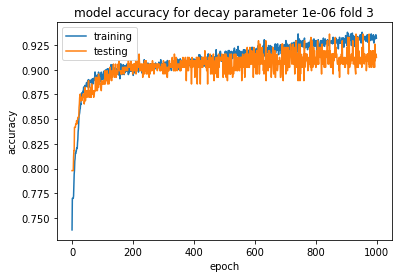

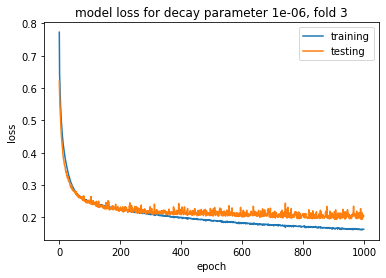

Epoch 1/1000
149/149 - 0s - loss: 0.7793 - accuracy: 0.7599 - val_loss: 0.7377 - val_accuracy: 0.7441
Epoch 2/1000
149/149 - 0s - loss: 0.6634 - accuracy: 0.7834 - val_loss: 0.7208 - val_accuracy: 0.7441
Epoch 3/1000
149/149 - 0s - loss: 0.6419 - accuracy: 0.7834 - val_loss: 0.7005 - val_accuracy: 0.7441
Epoch 4/1000
149/149 - 0s - loss: 0.6213 - accuracy: 0.7834 - val_loss: 0.6801 - val_accuracy: 0.7441
Epoch 5/1000
149/149 - 0s - loss: 0.6031 - accuracy: 0.7834 - val_loss: 0.6651 - val_accuracy: 0.7441
Epoch 6/1000
149/149 - 0s - loss: 0.5833 - accuracy: 0.7834 - val_loss: 0.6452 - val_accuracy: 0.7441
Epoch 7/1000
149/149 - 0s - loss: 0.5635 - accuracy: 0.7834 - val_loss: 0.6279 - val_accuracy: 0.7441
Epoch 8/1000
149/149 - 0s - loss: 0.5434 - accuracy: 0.7834 - val_loss: 0.6121 - val_accuracy: 0.7441
Epoch 9/1000
149/149 - 0s - loss: 0.5220 - accuracy: 0.7825 - val_loss: 0.5926 - val_accuracy: 0.7508
Epoch 10/1000
149/149 - 0s - loss: 0.5016 - accuracy: 0.7876 - val_loss: 0.5773 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2372 - accuracy: 0.9043 - val_loss: 0.3313 - val_accuracy: 0.8283
Epoch 82/1000
149/149 - 0s - loss: 0.2353 - accuracy: 0.9060 - val_loss: 0.3238 - val_accuracy: 0.8350
Epoch 83/1000
149/149 - 0s - loss: 0.2358 - accuracy: 0.9085 - val_loss: 0.3416 - val_accuracy: 0.8418
Epoch 84/1000
149/149 - 0s - loss: 0.2350 - accuracy: 0.9043 - val_loss: 0.3351 - val_accuracy: 0.8384
Epoch 85/1000
149/149 - 0s - loss: 0.2339 - accuracy: 0.9093 - val_loss: 0.3271 - val_accuracy: 0.8283
Epoch 86/1000
149/149 - 0s - loss: 0.2336 - accuracy: 0.9060 - val_loss: 0.3233 - val_accuracy: 0.8350
Epoch 87/1000
149/149 - 0s - loss: 0.2338 - accuracy: 0.9034 - val_loss: 0.3288 - val_accuracy: 0.8283
Epoch 88/1000
149/149 - 0s - loss: 0.2328 - accuracy: 0.9068 - val_loss: 0.3346 - val_accuracy: 0.8384
Epoch 89/1000
149/149 - 0s - loss: 0.2320 - accuracy: 0.9026 - val_loss: 0.3256 - val_accuracy: 0.8283
Epoch 90/1000
149/149 - 0s - loss: 0.2319 - accuracy: 0.9076 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2127 - accuracy: 0.9135 - val_loss: 0.3226 - val_accuracy: 0.8384
Epoch 161/1000
149/149 - 0s - loss: 0.2120 - accuracy: 0.9152 - val_loss: 0.3104 - val_accuracy: 0.8519
Epoch 162/1000
149/149 - 0s - loss: 0.2119 - accuracy: 0.9102 - val_loss: 0.3188 - val_accuracy: 0.8519
Epoch 163/1000
149/149 - 0s - loss: 0.2113 - accuracy: 0.9135 - val_loss: 0.3123 - val_accuracy: 0.8519
Epoch 164/1000
149/149 - 0s - loss: 0.2111 - accuracy: 0.9127 - val_loss: 0.3236 - val_accuracy: 0.8451
Epoch 165/1000
149/149 - 0s - loss: 0.2105 - accuracy: 0.9127 - val_loss: 0.3315 - val_accuracy: 0.8316
Epoch 166/1000
149/149 - 0s - loss: 0.2105 - accuracy: 0.9110 - val_loss: 0.3368 - val_accuracy: 0.8316
Epoch 167/1000
149/149 - 0s - loss: 0.2113 - accuracy: 0.9127 - val_loss: 0.3104 - val_accuracy: 0.8519
Epoch 168/1000
149/149 - 0s - loss: 0.2116 - accuracy: 0.9102 - val_loss: 0.3161 - val_accuracy: 0.8519
Epoch 169/1000
149/149 - 0s - loss: 0.2103 - accuracy: 0.9160 - 

Epoch 239/1000
149/149 - 0s - loss: 0.1983 - accuracy: 0.9169 - val_loss: 0.3179 - val_accuracy: 0.8552
Epoch 240/1000
149/149 - 0s - loss: 0.2007 - accuracy: 0.9160 - val_loss: 0.3247 - val_accuracy: 0.8519
Epoch 241/1000
149/149 - 0s - loss: 0.2010 - accuracy: 0.9110 - val_loss: 0.3161 - val_accuracy: 0.8519
Epoch 242/1000
149/149 - 0s - loss: 0.2000 - accuracy: 0.9135 - val_loss: 0.3366 - val_accuracy: 0.8451
Epoch 243/1000
149/149 - 0s - loss: 0.2007 - accuracy: 0.9135 - val_loss: 0.3241 - val_accuracy: 0.8485
Epoch 244/1000
149/149 - 0s - loss: 0.2007 - accuracy: 0.9144 - val_loss: 0.3343 - val_accuracy: 0.8519
Epoch 245/1000
149/149 - 0s - loss: 0.2011 - accuracy: 0.9160 - val_loss: 0.3242 - val_accuracy: 0.8519
Epoch 246/1000
149/149 - 0s - loss: 0.2006 - accuracy: 0.9152 - val_loss: 0.3253 - val_accuracy: 0.8519
Epoch 247/1000
149/149 - 0s - loss: 0.1992 - accuracy: 0.9127 - val_loss: 0.3237 - val_accuracy: 0.8519
Epoch 248/1000
149/149 - 0s - loss: 0.1999 - accuracy: 0.9177 - 

Epoch 318/1000
149/149 - 0s - loss: 0.1947 - accuracy: 0.9152 - val_loss: 0.3240 - val_accuracy: 0.8586
Epoch 319/1000
149/149 - 0s - loss: 0.1946 - accuracy: 0.9110 - val_loss: 0.3230 - val_accuracy: 0.8586
Epoch 320/1000
149/149 - 0s - loss: 0.1938 - accuracy: 0.9169 - val_loss: 0.3317 - val_accuracy: 0.8519
Epoch 321/1000
149/149 - 0s - loss: 0.1927 - accuracy: 0.9177 - val_loss: 0.3219 - val_accuracy: 0.8485
Epoch 322/1000
149/149 - 0s - loss: 0.1934 - accuracy: 0.9127 - val_loss: 0.3191 - val_accuracy: 0.8485
Epoch 323/1000
149/149 - 0s - loss: 0.1929 - accuracy: 0.9177 - val_loss: 0.3253 - val_accuracy: 0.8586
Epoch 324/1000
149/149 - 0s - loss: 0.1932 - accuracy: 0.9186 - val_loss: 0.3183 - val_accuracy: 0.8485
Epoch 325/1000
149/149 - 0s - loss: 0.1932 - accuracy: 0.9169 - val_loss: 0.3242 - val_accuracy: 0.8586
Epoch 326/1000
149/149 - 0s - loss: 0.1928 - accuracy: 0.9186 - val_loss: 0.3324 - val_accuracy: 0.8519
Epoch 327/1000
149/149 - 0s - loss: 0.1928 - accuracy: 0.9127 - 

Epoch 397/1000
149/149 - 0s - loss: 0.1868 - accuracy: 0.9160 - val_loss: 0.3159 - val_accuracy: 0.8552
Epoch 398/1000
149/149 - 0s - loss: 0.1894 - accuracy: 0.9118 - val_loss: 0.3338 - val_accuracy: 0.8519
Epoch 399/1000
149/149 - 0s - loss: 0.1876 - accuracy: 0.9160 - val_loss: 0.3214 - val_accuracy: 0.8552
Epoch 400/1000
149/149 - 0s - loss: 0.1872 - accuracy: 0.9127 - val_loss: 0.3177 - val_accuracy: 0.8552
Epoch 401/1000
149/149 - 0s - loss: 0.1869 - accuracy: 0.9118 - val_loss: 0.3239 - val_accuracy: 0.8586
Epoch 402/1000
149/149 - 0s - loss: 0.1874 - accuracy: 0.9144 - val_loss: 0.3286 - val_accuracy: 0.8586
Epoch 403/1000
149/149 - 0s - loss: 0.1880 - accuracy: 0.9135 - val_loss: 0.3254 - val_accuracy: 0.8586
Epoch 404/1000
149/149 - 0s - loss: 0.1879 - accuracy: 0.9202 - val_loss: 0.3121 - val_accuracy: 0.8552
Epoch 405/1000
149/149 - 0s - loss: 0.1863 - accuracy: 0.9169 - val_loss: 0.3123 - val_accuracy: 0.8485
Epoch 406/1000
149/149 - 0s - loss: 0.1875 - accuracy: 0.9135 - 

Epoch 476/1000
149/149 - 0s - loss: 0.1834 - accuracy: 0.9169 - val_loss: 0.3244 - val_accuracy: 0.8519
Epoch 477/1000
149/149 - 0s - loss: 0.1813 - accuracy: 0.9169 - val_loss: 0.3224 - val_accuracy: 0.8519
Epoch 478/1000
149/149 - 0s - loss: 0.1835 - accuracy: 0.9228 - val_loss: 0.3178 - val_accuracy: 0.8552
Epoch 479/1000
149/149 - 0s - loss: 0.1817 - accuracy: 0.9270 - val_loss: 0.3288 - val_accuracy: 0.8586
Epoch 480/1000
149/149 - 0s - loss: 0.1827 - accuracy: 0.9169 - val_loss: 0.3217 - val_accuracy: 0.8519
Epoch 481/1000
149/149 - 0s - loss: 0.1834 - accuracy: 0.9177 - val_loss: 0.3189 - val_accuracy: 0.8519
Epoch 482/1000
149/149 - 0s - loss: 0.1790 - accuracy: 0.9202 - val_loss: 0.3418 - val_accuracy: 0.8620
Epoch 483/1000
149/149 - 0s - loss: 0.1825 - accuracy: 0.9127 - val_loss: 0.3261 - val_accuracy: 0.8552
Epoch 484/1000
149/149 - 0s - loss: 0.1825 - accuracy: 0.9177 - val_loss: 0.3156 - val_accuracy: 0.8519
Epoch 485/1000
149/149 - 0s - loss: 0.1820 - accuracy: 0.9236 - 

Epoch 555/1000
149/149 - 0s - loss: 0.1783 - accuracy: 0.9261 - val_loss: 0.3208 - val_accuracy: 0.8552
Epoch 556/1000
149/149 - 0s - loss: 0.1776 - accuracy: 0.9219 - val_loss: 0.3162 - val_accuracy: 0.8586
Epoch 557/1000
149/149 - 0s - loss: 0.1782 - accuracy: 0.9194 - val_loss: 0.3315 - val_accuracy: 0.8586
Epoch 558/1000
149/149 - 0s - loss: 0.1789 - accuracy: 0.9144 - val_loss: 0.3189 - val_accuracy: 0.8519
Epoch 559/1000
149/149 - 0s - loss: 0.1797 - accuracy: 0.9186 - val_loss: 0.3330 - val_accuracy: 0.8586
Epoch 560/1000
149/149 - 0s - loss: 0.1795 - accuracy: 0.9152 - val_loss: 0.3262 - val_accuracy: 0.8586
Epoch 561/1000
149/149 - 0s - loss: 0.1780 - accuracy: 0.9236 - val_loss: 0.3231 - val_accuracy: 0.8519
Epoch 562/1000
149/149 - 0s - loss: 0.1766 - accuracy: 0.9219 - val_loss: 0.3244 - val_accuracy: 0.8519
Epoch 563/1000
149/149 - 0s - loss: 0.1790 - accuracy: 0.9211 - val_loss: 0.3432 - val_accuracy: 0.8552
Epoch 564/1000
149/149 - 0s - loss: 0.1767 - accuracy: 0.9194 - 

Epoch 634/1000
149/149 - 0s - loss: 0.1739 - accuracy: 0.9253 - val_loss: 0.3173 - val_accuracy: 0.8586
Epoch 635/1000
149/149 - 0s - loss: 0.1740 - accuracy: 0.9253 - val_loss: 0.3275 - val_accuracy: 0.8485
Epoch 636/1000
149/149 - 0s - loss: 0.1723 - accuracy: 0.9270 - val_loss: 0.3280 - val_accuracy: 0.8586
Epoch 637/1000
149/149 - 0s - loss: 0.1735 - accuracy: 0.9228 - val_loss: 0.3250 - val_accuracy: 0.8552
Epoch 638/1000
149/149 - 0s - loss: 0.1745 - accuracy: 0.9219 - val_loss: 0.3253 - val_accuracy: 0.8552
Epoch 639/1000
149/149 - 0s - loss: 0.1751 - accuracy: 0.9244 - val_loss: 0.3314 - val_accuracy: 0.8620
Epoch 640/1000
149/149 - 0s - loss: 0.1728 - accuracy: 0.9228 - val_loss: 0.3161 - val_accuracy: 0.8519
Epoch 641/1000
149/149 - 0s - loss: 0.1761 - accuracy: 0.9194 - val_loss: 0.3205 - val_accuracy: 0.8552
Epoch 642/1000
149/149 - 0s - loss: 0.1746 - accuracy: 0.9228 - val_loss: 0.3143 - val_accuracy: 0.8519
Epoch 643/1000
149/149 - 0s - loss: 0.1750 - accuracy: 0.9211 - 

Epoch 713/1000
149/149 - 0s - loss: 0.1715 - accuracy: 0.9211 - val_loss: 0.3302 - val_accuracy: 0.8485
Epoch 714/1000
149/149 - 0s - loss: 0.1691 - accuracy: 0.9253 - val_loss: 0.3201 - val_accuracy: 0.8519
Epoch 715/1000
149/149 - 0s - loss: 0.1707 - accuracy: 0.9270 - val_loss: 0.3138 - val_accuracy: 0.8552
Epoch 716/1000
149/149 - 0s - loss: 0.1689 - accuracy: 0.9312 - val_loss: 0.3229 - val_accuracy: 0.8552
Epoch 717/1000
149/149 - 0s - loss: 0.1707 - accuracy: 0.9261 - val_loss: 0.3255 - val_accuracy: 0.8485
Epoch 718/1000
149/149 - 0s - loss: 0.1698 - accuracy: 0.9270 - val_loss: 0.3193 - val_accuracy: 0.8552
Epoch 719/1000
149/149 - 0s - loss: 0.1666 - accuracy: 0.9253 - val_loss: 0.3473 - val_accuracy: 0.8620
Epoch 720/1000
149/149 - 0s - loss: 0.1699 - accuracy: 0.9253 - val_loss: 0.3172 - val_accuracy: 0.8519
Epoch 721/1000
149/149 - 0s - loss: 0.1698 - accuracy: 0.9261 - val_loss: 0.3114 - val_accuracy: 0.8552
Epoch 722/1000
149/149 - 0s - loss: 0.1698 - accuracy: 0.9244 - 

Epoch 792/1000
149/149 - 0s - loss: 0.1682 - accuracy: 0.9244 - val_loss: 0.3242 - val_accuracy: 0.8519
Epoch 793/1000
149/149 - 0s - loss: 0.1667 - accuracy: 0.9244 - val_loss: 0.3233 - val_accuracy: 0.8519
Epoch 794/1000
149/149 - 0s - loss: 0.1676 - accuracy: 0.9278 - val_loss: 0.3242 - val_accuracy: 0.8519
Epoch 795/1000
149/149 - 0s - loss: 0.1643 - accuracy: 0.9244 - val_loss: 0.3271 - val_accuracy: 0.8485
Epoch 796/1000
149/149 - 0s - loss: 0.1652 - accuracy: 0.9303 - val_loss: 0.3216 - val_accuracy: 0.8485
Epoch 797/1000
149/149 - 0s - loss: 0.1651 - accuracy: 0.9295 - val_loss: 0.3173 - val_accuracy: 0.8519
Epoch 798/1000
149/149 - 0s - loss: 0.1658 - accuracy: 0.9261 - val_loss: 0.3187 - val_accuracy: 0.8485
Epoch 799/1000
149/149 - 0s - loss: 0.1649 - accuracy: 0.9278 - val_loss: 0.3368 - val_accuracy: 0.8552
Epoch 800/1000
149/149 - 0s - loss: 0.1669 - accuracy: 0.9278 - val_loss: 0.3141 - val_accuracy: 0.8586
Epoch 801/1000
149/149 - 0s - loss: 0.1654 - accuracy: 0.9286 - 

Epoch 871/1000
149/149 - 0s - loss: 0.1621 - accuracy: 0.9312 - val_loss: 0.3147 - val_accuracy: 0.8552
Epoch 872/1000
149/149 - 0s - loss: 0.1619 - accuracy: 0.9244 - val_loss: 0.3087 - val_accuracy: 0.8620
Epoch 873/1000
149/149 - 0s - loss: 0.1630 - accuracy: 0.9278 - val_loss: 0.3421 - val_accuracy: 0.8586
Epoch 874/1000
149/149 - 0s - loss: 0.1621 - accuracy: 0.9345 - val_loss: 0.3086 - val_accuracy: 0.8586
Epoch 875/1000
149/149 - 0s - loss: 0.1627 - accuracy: 0.9278 - val_loss: 0.3042 - val_accuracy: 0.8552
Epoch 876/1000
149/149 - 0s - loss: 0.1611 - accuracy: 0.9320 - val_loss: 0.3064 - val_accuracy: 0.8552
Epoch 877/1000
149/149 - 0s - loss: 0.1603 - accuracy: 0.9286 - val_loss: 0.3087 - val_accuracy: 0.8586
Epoch 878/1000
149/149 - 0s - loss: 0.1621 - accuracy: 0.9312 - val_loss: 0.3168 - val_accuracy: 0.8519
Epoch 879/1000
149/149 - 0s - loss: 0.1626 - accuracy: 0.9320 - val_loss: 0.3068 - val_accuracy: 0.8552
Epoch 880/1000
149/149 - 0s - loss: 0.1605 - accuracy: 0.9320 - 

Epoch 950/1000
149/149 - 0s - loss: 0.1580 - accuracy: 0.9312 - val_loss: 0.3548 - val_accuracy: 0.8620
Epoch 951/1000
149/149 - 0s - loss: 0.1611 - accuracy: 0.9312 - val_loss: 0.3096 - val_accuracy: 0.8620
Epoch 952/1000
149/149 - 0s - loss: 0.1602 - accuracy: 0.9328 - val_loss: 0.3134 - val_accuracy: 0.8620
Epoch 953/1000
149/149 - 0s - loss: 0.1590 - accuracy: 0.9320 - val_loss: 0.3204 - val_accuracy: 0.8653
Epoch 954/1000
149/149 - 0s - loss: 0.1569 - accuracy: 0.9337 - val_loss: 0.3256 - val_accuracy: 0.8586
Epoch 955/1000
149/149 - 0s - loss: 0.1574 - accuracy: 0.9337 - val_loss: 0.3396 - val_accuracy: 0.8620
Epoch 956/1000
149/149 - 0s - loss: 0.1581 - accuracy: 0.9337 - val_loss: 0.3406 - val_accuracy: 0.8620
Epoch 957/1000
149/149 - 0s - loss: 0.1603 - accuracy: 0.9270 - val_loss: 0.3100 - val_accuracy: 0.8586
Epoch 958/1000
149/149 - 0s - loss: 0.1598 - accuracy: 0.9286 - val_loss: 0.3031 - val_accuracy: 0.8653
Epoch 959/1000
149/149 - 0s - loss: 0.1597 - accuracy: 0.9353 - 

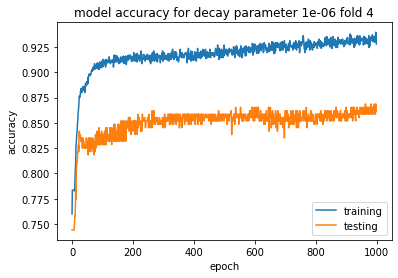

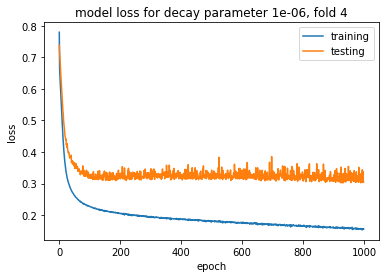

Epoch 1/1000
149/149 - 0s - loss: 0.7968 - accuracy: 0.7254 - val_loss: 0.6600 - val_accuracy: 0.7845
Epoch 2/1000
149/149 - 0s - loss: 0.6542 - accuracy: 0.7733 - val_loss: 0.6280 - val_accuracy: 0.7845
Epoch 3/1000
149/149 - 0s - loss: 0.6293 - accuracy: 0.7733 - val_loss: 0.6072 - val_accuracy: 0.7845
Epoch 4/1000
149/149 - 0s - loss: 0.6072 - accuracy: 0.7733 - val_loss: 0.5894 - val_accuracy: 0.7845
Epoch 5/1000
149/149 - 0s - loss: 0.5875 - accuracy: 0.7733 - val_loss: 0.5686 - val_accuracy: 0.7845
Epoch 6/1000
149/149 - 0s - loss: 0.5669 - accuracy: 0.7733 - val_loss: 0.5521 - val_accuracy: 0.7845
Epoch 7/1000
149/149 - 0s - loss: 0.5479 - accuracy: 0.7741 - val_loss: 0.5320 - val_accuracy: 0.7845
Epoch 8/1000
149/149 - 0s - loss: 0.5288 - accuracy: 0.7767 - val_loss: 0.5145 - val_accuracy: 0.7912
Epoch 9/1000
149/149 - 0s - loss: 0.5111 - accuracy: 0.7817 - val_loss: 0.4985 - val_accuracy: 0.7879
Epoch 10/1000
149/149 - 0s - loss: 0.4938 - accuracy: 0.7909 - val_loss: 0.4810 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2607 - accuracy: 0.8875 - val_loss: 0.2623 - val_accuracy: 0.9091
Epoch 82/1000
149/149 - 0s - loss: 0.2596 - accuracy: 0.8950 - val_loss: 0.2638 - val_accuracy: 0.8889
Epoch 83/1000
149/149 - 0s - loss: 0.2605 - accuracy: 0.8883 - val_loss: 0.2592 - val_accuracy: 0.9125
Epoch 84/1000
149/149 - 0s - loss: 0.2597 - accuracy: 0.8883 - val_loss: 0.2578 - val_accuracy: 0.9091
Epoch 85/1000
149/149 - 0s - loss: 0.2583 - accuracy: 0.8917 - val_loss: 0.2584 - val_accuracy: 0.9158
Epoch 86/1000
149/149 - 0s - loss: 0.2587 - accuracy: 0.8908 - val_loss: 0.2567 - val_accuracy: 0.9125
Epoch 87/1000
149/149 - 0s - loss: 0.2586 - accuracy: 0.8900 - val_loss: 0.2582 - val_accuracy: 0.9057
Epoch 88/1000
149/149 - 0s - loss: 0.2576 - accuracy: 0.8934 - val_loss: 0.2562 - val_accuracy: 0.9091
Epoch 89/1000
149/149 - 0s - loss: 0.2577 - accuracy: 0.8934 - val_loss: 0.2551 - val_accuracy: 0.9091
Epoch 90/1000
149/149 - 0s - loss: 0.2570 - accuracy: 0.8908 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2400 - accuracy: 0.8984 - val_loss: 0.2370 - val_accuracy: 0.9125
Epoch 161/1000
149/149 - 0s - loss: 0.2390 - accuracy: 0.8984 - val_loss: 0.2425 - val_accuracy: 0.8923
Epoch 162/1000
149/149 - 0s - loss: 0.2394 - accuracy: 0.8959 - val_loss: 0.2357 - val_accuracy: 0.9091
Epoch 163/1000
149/149 - 0s - loss: 0.2382 - accuracy: 0.8959 - val_loss: 0.2451 - val_accuracy: 0.8923
Epoch 164/1000
149/149 - 0s - loss: 0.2387 - accuracy: 0.8942 - val_loss: 0.2391 - val_accuracy: 0.9125
Epoch 165/1000
149/149 - 0s - loss: 0.2382 - accuracy: 0.8984 - val_loss: 0.2366 - val_accuracy: 0.9091
Epoch 166/1000
149/149 - 0s - loss: 0.2373 - accuracy: 0.8967 - val_loss: 0.2396 - val_accuracy: 0.9125
Epoch 167/1000
149/149 - 0s - loss: 0.2383 - accuracy: 0.9018 - val_loss: 0.2435 - val_accuracy: 0.8956
Epoch 168/1000
149/149 - 0s - loss: 0.2381 - accuracy: 0.8976 - val_loss: 0.2374 - val_accuracy: 0.9091
Epoch 169/1000
149/149 - 0s - loss: 0.2374 - accuracy: 0.8976 - 

Epoch 239/1000
149/149 - 0s - loss: 0.2274 - accuracy: 0.9026 - val_loss: 0.2281 - val_accuracy: 0.9057
Epoch 240/1000
149/149 - 0s - loss: 0.2281 - accuracy: 0.8992 - val_loss: 0.2287 - val_accuracy: 0.8990
Epoch 241/1000
149/149 - 0s - loss: 0.2287 - accuracy: 0.8992 - val_loss: 0.2289 - val_accuracy: 0.9125
Epoch 242/1000
149/149 - 0s - loss: 0.2282 - accuracy: 0.8976 - val_loss: 0.2281 - val_accuracy: 0.9091
Epoch 243/1000
149/149 - 0s - loss: 0.2284 - accuracy: 0.8976 - val_loss: 0.2309 - val_accuracy: 0.9125
Epoch 244/1000
149/149 - 0s - loss: 0.2297 - accuracy: 0.9009 - val_loss: 0.2295 - val_accuracy: 0.9091
Epoch 245/1000
149/149 - 0s - loss: 0.2278 - accuracy: 0.8992 - val_loss: 0.2284 - val_accuracy: 0.9091
Epoch 246/1000
149/149 - 0s - loss: 0.2280 - accuracy: 0.8934 - val_loss: 0.2295 - val_accuracy: 0.9125
Epoch 247/1000
149/149 - 0s - loss: 0.2270 - accuracy: 0.8992 - val_loss: 0.2277 - val_accuracy: 0.9057
Epoch 248/1000
149/149 - 0s - loss: 0.2261 - accuracy: 0.9009 - 

Epoch 318/1000
149/149 - 0s - loss: 0.2201 - accuracy: 0.9043 - val_loss: 0.2264 - val_accuracy: 0.9057
Epoch 319/1000
149/149 - 0s - loss: 0.2194 - accuracy: 0.9043 - val_loss: 0.2254 - val_accuracy: 0.8956
Epoch 320/1000
149/149 - 0s - loss: 0.2207 - accuracy: 0.9026 - val_loss: 0.2263 - val_accuracy: 0.9091
Epoch 321/1000
149/149 - 0s - loss: 0.2190 - accuracy: 0.9026 - val_loss: 0.2278 - val_accuracy: 0.9024
Epoch 322/1000
149/149 - 0s - loss: 0.2182 - accuracy: 0.9076 - val_loss: 0.2309 - val_accuracy: 0.8956
Epoch 323/1000
149/149 - 0s - loss: 0.2189 - accuracy: 0.9068 - val_loss: 0.2246 - val_accuracy: 0.9091
Epoch 324/1000
149/149 - 0s - loss: 0.2186 - accuracy: 0.9076 - val_loss: 0.2251 - val_accuracy: 0.9057
Epoch 325/1000
149/149 - 0s - loss: 0.2175 - accuracy: 0.9068 - val_loss: 0.2249 - val_accuracy: 0.9091
Epoch 326/1000
149/149 - 0s - loss: 0.2178 - accuracy: 0.9018 - val_loss: 0.2256 - val_accuracy: 0.9125
Epoch 327/1000
149/149 - 0s - loss: 0.2191 - accuracy: 0.9034 - 

Epoch 397/1000
149/149 - 0s - loss: 0.2085 - accuracy: 0.9018 - val_loss: 0.2300 - val_accuracy: 0.9057
Epoch 398/1000
149/149 - 0s - loss: 0.2101 - accuracy: 0.9068 - val_loss: 0.2247 - val_accuracy: 0.9024
Epoch 399/1000
149/149 - 0s - loss: 0.2096 - accuracy: 0.9060 - val_loss: 0.2236 - val_accuracy: 0.9091
Epoch 400/1000
149/149 - 0s - loss: 0.2082 - accuracy: 0.9118 - val_loss: 0.2225 - val_accuracy: 0.9024
Epoch 401/1000
149/149 - 0s - loss: 0.2082 - accuracy: 0.9034 - val_loss: 0.2224 - val_accuracy: 0.9057
Epoch 402/1000
149/149 - 0s - loss: 0.2092 - accuracy: 0.9060 - val_loss: 0.2240 - val_accuracy: 0.9125
Epoch 403/1000
149/149 - 0s - loss: 0.2097 - accuracy: 0.9043 - val_loss: 0.2256 - val_accuracy: 0.9024
Epoch 404/1000
149/149 - 0s - loss: 0.2091 - accuracy: 0.9127 - val_loss: 0.2275 - val_accuracy: 0.9057
Epoch 405/1000
149/149 - 0s - loss: 0.2091 - accuracy: 0.9060 - val_loss: 0.2219 - val_accuracy: 0.9057
Epoch 406/1000
149/149 - 0s - loss: 0.2081 - accuracy: 0.9076 - 

Epoch 476/1000
149/149 - 0s - loss: 0.2014 - accuracy: 0.9051 - val_loss: 0.2214 - val_accuracy: 0.9057
Epoch 477/1000
149/149 - 0s - loss: 0.1970 - accuracy: 0.9144 - val_loss: 0.2231 - val_accuracy: 0.9057
Epoch 478/1000
149/149 - 0s - loss: 0.2003 - accuracy: 0.9093 - val_loss: 0.2216 - val_accuracy: 0.9024
Epoch 479/1000
149/149 - 0s - loss: 0.2004 - accuracy: 0.9076 - val_loss: 0.2229 - val_accuracy: 0.9091
Epoch 480/1000
149/149 - 0s - loss: 0.1992 - accuracy: 0.9076 - val_loss: 0.2182 - val_accuracy: 0.9057
Epoch 481/1000
149/149 - 0s - loss: 0.2004 - accuracy: 0.9110 - val_loss: 0.2208 - val_accuracy: 0.9057
Epoch 482/1000
149/149 - 0s - loss: 0.1996 - accuracy: 0.9102 - val_loss: 0.2180 - val_accuracy: 0.9057
Epoch 483/1000
149/149 - 0s - loss: 0.1981 - accuracy: 0.9085 - val_loss: 0.2196 - val_accuracy: 0.9024
Epoch 484/1000
149/149 - 0s - loss: 0.1997 - accuracy: 0.9102 - val_loss: 0.2202 - val_accuracy: 0.9024
Epoch 485/1000
149/149 - 0s - loss: 0.1995 - accuracy: 0.9110 - 

Epoch 555/1000
149/149 - 0s - loss: 0.1926 - accuracy: 0.9160 - val_loss: 0.2174 - val_accuracy: 0.9057
Epoch 556/1000
149/149 - 0s - loss: 0.1909 - accuracy: 0.9102 - val_loss: 0.2173 - val_accuracy: 0.9057
Epoch 557/1000
149/149 - 0s - loss: 0.1917 - accuracy: 0.9177 - val_loss: 0.2178 - val_accuracy: 0.9091
Epoch 558/1000
149/149 - 0s - loss: 0.1907 - accuracy: 0.9110 - val_loss: 0.2234 - val_accuracy: 0.9125
Epoch 559/1000
149/149 - 0s - loss: 0.1925 - accuracy: 0.9169 - val_loss: 0.2201 - val_accuracy: 0.9057
Epoch 560/1000
149/149 - 0s - loss: 0.1908 - accuracy: 0.9160 - val_loss: 0.2215 - val_accuracy: 0.9091
Epoch 561/1000
149/149 - 0s - loss: 0.1914 - accuracy: 0.9118 - val_loss: 0.2173 - val_accuracy: 0.9024
Epoch 562/1000
149/149 - 0s - loss: 0.1911 - accuracy: 0.9118 - val_loss: 0.2222 - val_accuracy: 0.9057
Epoch 563/1000
149/149 - 0s - loss: 0.1881 - accuracy: 0.9076 - val_loss: 0.2240 - val_accuracy: 0.8956
Epoch 564/1000
149/149 - 0s - loss: 0.1905 - accuracy: 0.9135 - 

Epoch 634/1000
149/149 - 0s - loss: 0.1856 - accuracy: 0.9186 - val_loss: 0.2154 - val_accuracy: 0.9057
Epoch 635/1000
149/149 - 0s - loss: 0.1858 - accuracy: 0.9177 - val_loss: 0.2175 - val_accuracy: 0.9091
Epoch 636/1000
149/149 - 0s - loss: 0.1850 - accuracy: 0.9160 - val_loss: 0.2174 - val_accuracy: 0.9024
Epoch 637/1000
149/149 - 0s - loss: 0.1841 - accuracy: 0.9211 - val_loss: 0.2151 - val_accuracy: 0.9057
Epoch 638/1000
149/149 - 0s - loss: 0.1841 - accuracy: 0.9177 - val_loss: 0.2141 - val_accuracy: 0.9125
Epoch 639/1000
149/149 - 0s - loss: 0.1847 - accuracy: 0.9177 - val_loss: 0.2146 - val_accuracy: 0.9057
Epoch 640/1000
149/149 - 0s - loss: 0.1848 - accuracy: 0.9177 - val_loss: 0.2236 - val_accuracy: 0.8990
Epoch 641/1000
149/149 - 0s - loss: 0.1844 - accuracy: 0.9160 - val_loss: 0.2157 - val_accuracy: 0.9057
Epoch 642/1000
149/149 - 0s - loss: 0.1849 - accuracy: 0.9169 - val_loss: 0.2182 - val_accuracy: 0.9125
Epoch 643/1000
149/149 - 0s - loss: 0.1856 - accuracy: 0.9169 - 

Epoch 713/1000
149/149 - 0s - loss: 0.1811 - accuracy: 0.9169 - val_loss: 0.2200 - val_accuracy: 0.9091
Epoch 714/1000
149/149 - 0s - loss: 0.1797 - accuracy: 0.9177 - val_loss: 0.2109 - val_accuracy: 0.9091
Epoch 715/1000
149/149 - 0s - loss: 0.1797 - accuracy: 0.9135 - val_loss: 0.2110 - val_accuracy: 0.9125
Epoch 716/1000
149/149 - 0s - loss: 0.1804 - accuracy: 0.9144 - val_loss: 0.2134 - val_accuracy: 0.9057
Epoch 717/1000
149/149 - 0s - loss: 0.1810 - accuracy: 0.9118 - val_loss: 0.2182 - val_accuracy: 0.9125
Epoch 718/1000
149/149 - 0s - loss: 0.1790 - accuracy: 0.9177 - val_loss: 0.2130 - val_accuracy: 0.9091
Epoch 719/1000
149/149 - 0s - loss: 0.1765 - accuracy: 0.9244 - val_loss: 0.2215 - val_accuracy: 0.9057
Epoch 720/1000
149/149 - 0s - loss: 0.1795 - accuracy: 0.9152 - val_loss: 0.2138 - val_accuracy: 0.9125
Epoch 721/1000
149/149 - 0s - loss: 0.1797 - accuracy: 0.9219 - val_loss: 0.2133 - val_accuracy: 0.9125
Epoch 722/1000
149/149 - 0s - loss: 0.1812 - accuracy: 0.9160 - 

Epoch 792/1000
149/149 - 0s - loss: 0.1767 - accuracy: 0.9211 - val_loss: 0.2148 - val_accuracy: 0.9125
Epoch 793/1000
149/149 - 0s - loss: 0.1772 - accuracy: 0.9202 - val_loss: 0.2141 - val_accuracy: 0.9125
Epoch 794/1000
149/149 - 0s - loss: 0.1731 - accuracy: 0.9236 - val_loss: 0.2158 - val_accuracy: 0.9091
Epoch 795/1000
149/149 - 0s - loss: 0.1732 - accuracy: 0.9278 - val_loss: 0.2154 - val_accuracy: 0.9057
Epoch 796/1000
149/149 - 0s - loss: 0.1753 - accuracy: 0.9244 - val_loss: 0.2100 - val_accuracy: 0.9192
Epoch 797/1000
149/149 - 0s - loss: 0.1752 - accuracy: 0.9211 - val_loss: 0.2088 - val_accuracy: 0.9158
Epoch 798/1000
149/149 - 0s - loss: 0.1736 - accuracy: 0.9236 - val_loss: 0.2140 - val_accuracy: 0.9125
Epoch 799/1000
149/149 - 0s - loss: 0.1732 - accuracy: 0.9202 - val_loss: 0.2132 - val_accuracy: 0.9192
Epoch 800/1000
149/149 - 0s - loss: 0.1744 - accuracy: 0.9194 - val_loss: 0.2146 - val_accuracy: 0.9091
Epoch 801/1000
149/149 - 0s - loss: 0.1742 - accuracy: 0.9253 - 

Epoch 871/1000
149/149 - 0s - loss: 0.1726 - accuracy: 0.9186 - val_loss: 0.2102 - val_accuracy: 0.9192
Epoch 872/1000
149/149 - 0s - loss: 0.1708 - accuracy: 0.9219 - val_loss: 0.2117 - val_accuracy: 0.9158
Epoch 873/1000
149/149 - 0s - loss: 0.1709 - accuracy: 0.9244 - val_loss: 0.2126 - val_accuracy: 0.9192
Epoch 874/1000
149/149 - 0s - loss: 0.1707 - accuracy: 0.9244 - val_loss: 0.2103 - val_accuracy: 0.9226
Epoch 875/1000
149/149 - 0s - loss: 0.1699 - accuracy: 0.9228 - val_loss: 0.2195 - val_accuracy: 0.9091
Epoch 876/1000
149/149 - 0s - loss: 0.1704 - accuracy: 0.9211 - val_loss: 0.2083 - val_accuracy: 0.9192
Epoch 877/1000
149/149 - 0s - loss: 0.1711 - accuracy: 0.9228 - val_loss: 0.2089 - val_accuracy: 0.9192
Epoch 878/1000
149/149 - 0s - loss: 0.1705 - accuracy: 0.9303 - val_loss: 0.2150 - val_accuracy: 0.9158
Epoch 879/1000
149/149 - 0s - loss: 0.1723 - accuracy: 0.9177 - val_loss: 0.2141 - val_accuracy: 0.9125
Epoch 880/1000
149/149 - 0s - loss: 0.1671 - accuracy: 0.9286 - 

Epoch 950/1000
149/149 - 0s - loss: 0.1655 - accuracy: 0.9261 - val_loss: 0.2127 - val_accuracy: 0.9226
Epoch 951/1000
149/149 - 0s - loss: 0.1680 - accuracy: 0.9219 - val_loss: 0.2140 - val_accuracy: 0.9158
Epoch 952/1000
149/149 - 0s - loss: 0.1692 - accuracy: 0.9244 - val_loss: 0.2127 - val_accuracy: 0.9192
Epoch 953/1000
149/149 - 0s - loss: 0.1656 - accuracy: 0.9303 - val_loss: 0.2080 - val_accuracy: 0.9192
Epoch 954/1000
149/149 - 0s - loss: 0.1665 - accuracy: 0.9219 - val_loss: 0.2301 - val_accuracy: 0.9091
Epoch 955/1000
149/149 - 0s - loss: 0.1674 - accuracy: 0.9278 - val_loss: 0.2118 - val_accuracy: 0.9226
Epoch 956/1000
149/149 - 0s - loss: 0.1659 - accuracy: 0.9286 - val_loss: 0.2129 - val_accuracy: 0.9158
Epoch 957/1000
149/149 - 0s - loss: 0.1688 - accuracy: 0.9253 - val_loss: 0.2117 - val_accuracy: 0.9192
Epoch 958/1000
149/149 - 0s - loss: 0.1665 - accuracy: 0.9236 - val_loss: 0.2083 - val_accuracy: 0.9158
Epoch 959/1000
149/149 - 0s - loss: 0.1663 - accuracy: 0.9328 - 

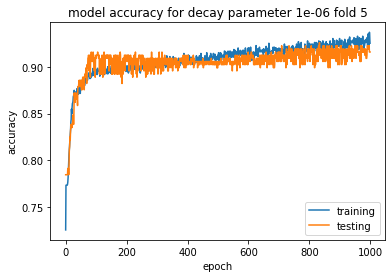

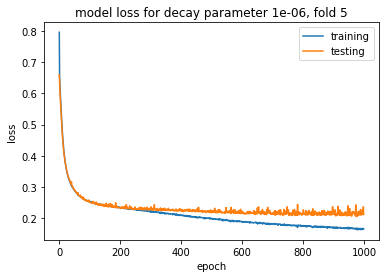

Epoch 1/1000
149/149 - 0s - loss: 0.7672 - accuracy: 0.7439 - val_loss: 0.6402 - val_accuracy: 0.7946
Epoch 2/1000
149/149 - 0s - loss: 0.6703 - accuracy: 0.7708 - val_loss: 0.6105 - val_accuracy: 0.7946
Epoch 3/1000
149/149 - 0s - loss: 0.6417 - accuracy: 0.7708 - val_loss: 0.5828 - val_accuracy: 0.7946
Epoch 4/1000
149/149 - 0s - loss: 0.6157 - accuracy: 0.7708 - val_loss: 0.5609 - val_accuracy: 0.7946
Epoch 5/1000
149/149 - 0s - loss: 0.5917 - accuracy: 0.7708 - val_loss: 0.5392 - val_accuracy: 0.7946
Epoch 6/1000
149/149 - 0s - loss: 0.5675 - accuracy: 0.7708 - val_loss: 0.5192 - val_accuracy: 0.7946
Epoch 7/1000
149/149 - 0s - loss: 0.5443 - accuracy: 0.7716 - val_loss: 0.5001 - val_accuracy: 0.8013
Epoch 8/1000
149/149 - 0s - loss: 0.5221 - accuracy: 0.7767 - val_loss: 0.4787 - val_accuracy: 0.8013
Epoch 9/1000
149/149 - 0s - loss: 0.5014 - accuracy: 0.7876 - val_loss: 0.4608 - val_accuracy: 0.8081
Epoch 10/1000
149/149 - 0s - loss: 0.4816 - accuracy: 0.7985 - val_loss: 0.4453 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2530 - accuracy: 0.8942 - val_loss: 0.2523 - val_accuracy: 0.8990
Epoch 82/1000
149/149 - 0s - loss: 0.2536 - accuracy: 0.8917 - val_loss: 0.2518 - val_accuracy: 0.9024
Epoch 83/1000
149/149 - 0s - loss: 0.2528 - accuracy: 0.8925 - val_loss: 0.2564 - val_accuracy: 0.8923
Epoch 84/1000
149/149 - 0s - loss: 0.2529 - accuracy: 0.8934 - val_loss: 0.2540 - val_accuracy: 0.8990
Epoch 85/1000
149/149 - 0s - loss: 0.2518 - accuracy: 0.8934 - val_loss: 0.2504 - val_accuracy: 0.8990
Epoch 86/1000
149/149 - 0s - loss: 0.2522 - accuracy: 0.8942 - val_loss: 0.2532 - val_accuracy: 0.8956
Epoch 87/1000
149/149 - 0s - loss: 0.2522 - accuracy: 0.8950 - val_loss: 0.2496 - val_accuracy: 0.8990
Epoch 88/1000
149/149 - 0s - loss: 0.2501 - accuracy: 0.8984 - val_loss: 0.2515 - val_accuracy: 0.8990
Epoch 89/1000
149/149 - 0s - loss: 0.2509 - accuracy: 0.8925 - val_loss: 0.2501 - val_accuracy: 0.9024
Epoch 90/1000
149/149 - 0s - loss: 0.2509 - accuracy: 0.8950 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2306 - accuracy: 0.8984 - val_loss: 0.2398 - val_accuracy: 0.8990
Epoch 161/1000
149/149 - 0s - loss: 0.2307 - accuracy: 0.9018 - val_loss: 0.2384 - val_accuracy: 0.8990
Epoch 162/1000
149/149 - 0s - loss: 0.2287 - accuracy: 0.9009 - val_loss: 0.2382 - val_accuracy: 0.9024
Epoch 163/1000
149/149 - 0s - loss: 0.2289 - accuracy: 0.9001 - val_loss: 0.2376 - val_accuracy: 0.8990
Epoch 164/1000
149/149 - 0s - loss: 0.2291 - accuracy: 0.9026 - val_loss: 0.2386 - val_accuracy: 0.8990
Epoch 165/1000
149/149 - 0s - loss: 0.2282 - accuracy: 0.9026 - val_loss: 0.2433 - val_accuracy: 0.8956
Epoch 166/1000
149/149 - 0s - loss: 0.2275 - accuracy: 0.9043 - val_loss: 0.2391 - val_accuracy: 0.8990
Epoch 167/1000
149/149 - 0s - loss: 0.2278 - accuracy: 0.9043 - val_loss: 0.2393 - val_accuracy: 0.8956
Epoch 168/1000
149/149 - 0s - loss: 0.2287 - accuracy: 0.8992 - val_loss: 0.2383 - val_accuracy: 0.9024
Epoch 169/1000
149/149 - 0s - loss: 0.2277 - accuracy: 0.9009 - 

Epoch 239/1000
149/149 - 0s - loss: 0.2123 - accuracy: 0.9068 - val_loss: 0.2314 - val_accuracy: 0.9057
Epoch 240/1000
149/149 - 0s - loss: 0.2117 - accuracy: 0.9152 - val_loss: 0.2399 - val_accuracy: 0.9091
Epoch 241/1000
149/149 - 0s - loss: 0.2138 - accuracy: 0.9110 - val_loss: 0.2310 - val_accuracy: 0.9024
Epoch 242/1000
149/149 - 0s - loss: 0.2122 - accuracy: 0.9034 - val_loss: 0.2362 - val_accuracy: 0.9024
Epoch 243/1000
149/149 - 0s - loss: 0.2134 - accuracy: 0.9152 - val_loss: 0.2290 - val_accuracy: 0.9024
Epoch 244/1000
149/149 - 0s - loss: 0.2137 - accuracy: 0.9076 - val_loss: 0.2318 - val_accuracy: 0.9024
Epoch 245/1000
149/149 - 0s - loss: 0.2113 - accuracy: 0.9093 - val_loss: 0.2311 - val_accuracy: 0.9024
Epoch 246/1000
149/149 - 0s - loss: 0.2126 - accuracy: 0.9102 - val_loss: 0.2342 - val_accuracy: 0.9057
Epoch 247/1000
149/149 - 0s - loss: 0.2108 - accuracy: 0.9102 - val_loss: 0.2284 - val_accuracy: 0.8990
Epoch 248/1000
149/149 - 0s - loss: 0.2118 - accuracy: 0.9093 - 

Epoch 318/1000
149/149 - 0s - loss: 0.2006 - accuracy: 0.9177 - val_loss: 0.2246 - val_accuracy: 0.8956
Epoch 319/1000
149/149 - 0s - loss: 0.2009 - accuracy: 0.9144 - val_loss: 0.2262 - val_accuracy: 0.9057
Epoch 320/1000
149/149 - 0s - loss: 0.2009 - accuracy: 0.9194 - val_loss: 0.2279 - val_accuracy: 0.8990
Epoch 321/1000
149/149 - 0s - loss: 0.1999 - accuracy: 0.9169 - val_loss: 0.2304 - val_accuracy: 0.8990
Epoch 322/1000
149/149 - 0s - loss: 0.2009 - accuracy: 0.9135 - val_loss: 0.2273 - val_accuracy: 0.8990
Epoch 323/1000
149/149 - 0s - loss: 0.1996 - accuracy: 0.9202 - val_loss: 0.2291 - val_accuracy: 0.8990
Epoch 324/1000
149/149 - 0s - loss: 0.2004 - accuracy: 0.9160 - val_loss: 0.2261 - val_accuracy: 0.8956
Epoch 325/1000
149/149 - 0s - loss: 0.2013 - accuracy: 0.9135 - val_loss: 0.2257 - val_accuracy: 0.8923
Epoch 326/1000
149/149 - 0s - loss: 0.2013 - accuracy: 0.9202 - val_loss: 0.2258 - val_accuracy: 0.8923
Epoch 327/1000
149/149 - 0s - loss: 0.1996 - accuracy: 0.9160 - 

Epoch 397/1000
149/149 - 0s - loss: 0.1909 - accuracy: 0.9194 - val_loss: 0.2233 - val_accuracy: 0.8990
Epoch 398/1000
149/149 - 0s - loss: 0.1912 - accuracy: 0.9236 - val_loss: 0.2224 - val_accuracy: 0.8956
Epoch 399/1000
149/149 - 0s - loss: 0.1918 - accuracy: 0.9194 - val_loss: 0.2204 - val_accuracy: 0.8889
Epoch 400/1000
149/149 - 0s - loss: 0.1889 - accuracy: 0.9202 - val_loss: 0.2220 - val_accuracy: 0.8923
Epoch 401/1000
149/149 - 0s - loss: 0.1911 - accuracy: 0.9194 - val_loss: 0.2219 - val_accuracy: 0.8956
Epoch 402/1000
149/149 - 0s - loss: 0.1915 - accuracy: 0.9177 - val_loss: 0.2212 - val_accuracy: 0.8923
Epoch 403/1000
149/149 - 0s - loss: 0.1896 - accuracy: 0.9278 - val_loss: 0.2212 - val_accuracy: 0.8956
Epoch 404/1000
149/149 - 0s - loss: 0.1899 - accuracy: 0.9236 - val_loss: 0.2210 - val_accuracy: 0.8990
Epoch 405/1000
149/149 - 0s - loss: 0.1895 - accuracy: 0.9202 - val_loss: 0.2207 - val_accuracy: 0.8956
Epoch 406/1000
149/149 - 0s - loss: 0.1901 - accuracy: 0.9219 - 

Epoch 476/1000
149/149 - 0s - loss: 0.1827 - accuracy: 0.9236 - val_loss: 0.2191 - val_accuracy: 0.8990
Epoch 477/1000
149/149 - 0s - loss: 0.1823 - accuracy: 0.9202 - val_loss: 0.2256 - val_accuracy: 0.8990
Epoch 478/1000
149/149 - 0s - loss: 0.1829 - accuracy: 0.9211 - val_loss: 0.2190 - val_accuracy: 0.8855
Epoch 479/1000
149/149 - 0s - loss: 0.1824 - accuracy: 0.9244 - val_loss: 0.2206 - val_accuracy: 0.8956
Epoch 480/1000
149/149 - 0s - loss: 0.1814 - accuracy: 0.9261 - val_loss: 0.2181 - val_accuracy: 0.8923
Epoch 481/1000
149/149 - 0s - loss: 0.1802 - accuracy: 0.9236 - val_loss: 0.2223 - val_accuracy: 0.9024
Epoch 482/1000
149/149 - 0s - loss: 0.1827 - accuracy: 0.9244 - val_loss: 0.2202 - val_accuracy: 0.8956
Epoch 483/1000
149/149 - 0s - loss: 0.1806 - accuracy: 0.9194 - val_loss: 0.2184 - val_accuracy: 0.8923
Epoch 484/1000
149/149 - 0s - loss: 0.1815 - accuracy: 0.9228 - val_loss: 0.2210 - val_accuracy: 0.8956
Epoch 485/1000
149/149 - 0s - loss: 0.1830 - accuracy: 0.9244 - 

Epoch 555/1000
149/149 - 0s - loss: 0.1749 - accuracy: 0.9261 - val_loss: 0.2176 - val_accuracy: 0.8923
Epoch 556/1000
149/149 - 0s - loss: 0.1752 - accuracy: 0.9244 - val_loss: 0.2220 - val_accuracy: 0.8990
Epoch 557/1000
149/149 - 0s - loss: 0.1762 - accuracy: 0.9261 - val_loss: 0.2196 - val_accuracy: 0.9024
Epoch 558/1000
149/149 - 0s - loss: 0.1765 - accuracy: 0.9236 - val_loss: 0.2192 - val_accuracy: 0.8956
Epoch 559/1000
149/149 - 0s - loss: 0.1765 - accuracy: 0.9236 - val_loss: 0.2215 - val_accuracy: 0.9024
Epoch 560/1000
149/149 - 0s - loss: 0.1764 - accuracy: 0.9270 - val_loss: 0.2168 - val_accuracy: 0.8956
Epoch 561/1000
149/149 - 0s - loss: 0.1754 - accuracy: 0.9228 - val_loss: 0.2265 - val_accuracy: 0.8923
Epoch 562/1000
149/149 - 0s - loss: 0.1766 - accuracy: 0.9244 - val_loss: 0.2207 - val_accuracy: 0.8990
Epoch 563/1000
149/149 - 0s - loss: 0.1757 - accuracy: 0.9286 - val_loss: 0.2185 - val_accuracy: 0.8956
Epoch 564/1000
149/149 - 0s - loss: 0.1763 - accuracy: 0.9278 - 

Epoch 634/1000
149/149 - 0s - loss: 0.1707 - accuracy: 0.9261 - val_loss: 0.2172 - val_accuracy: 0.8956
Epoch 635/1000
149/149 - 0s - loss: 0.1708 - accuracy: 0.9261 - val_loss: 0.2193 - val_accuracy: 0.9024
Epoch 636/1000
149/149 - 0s - loss: 0.1719 - accuracy: 0.9236 - val_loss: 0.2189 - val_accuracy: 0.8956
Epoch 637/1000
149/149 - 0s - loss: 0.1720 - accuracy: 0.9278 - val_loss: 0.2205 - val_accuracy: 0.8990
Epoch 638/1000
149/149 - 0s - loss: 0.1698 - accuracy: 0.9270 - val_loss: 0.2215 - val_accuracy: 0.9158
Epoch 639/1000
149/149 - 0s - loss: 0.1709 - accuracy: 0.9261 - val_loss: 0.2182 - val_accuracy: 0.8990
Epoch 640/1000
149/149 - 0s - loss: 0.1707 - accuracy: 0.9295 - val_loss: 0.2173 - val_accuracy: 0.8956
Epoch 641/1000
149/149 - 0s - loss: 0.1709 - accuracy: 0.9328 - val_loss: 0.2164 - val_accuracy: 0.8956
Epoch 642/1000
149/149 - 0s - loss: 0.1717 - accuracy: 0.9261 - val_loss: 0.2169 - val_accuracy: 0.8956
Epoch 643/1000
149/149 - 0s - loss: 0.1695 - accuracy: 0.9286 - 

Epoch 713/1000
149/149 - 0s - loss: 0.1671 - accuracy: 0.9337 - val_loss: 0.2203 - val_accuracy: 0.8990
Epoch 714/1000
149/149 - 0s - loss: 0.1664 - accuracy: 0.9312 - val_loss: 0.2209 - val_accuracy: 0.8990
Epoch 715/1000
149/149 - 0s - loss: 0.1667 - accuracy: 0.9303 - val_loss: 0.2178 - val_accuracy: 0.9024
Epoch 716/1000
149/149 - 0s - loss: 0.1672 - accuracy: 0.9278 - val_loss: 0.2177 - val_accuracy: 0.8889
Epoch 717/1000
149/149 - 0s - loss: 0.1629 - accuracy: 0.9312 - val_loss: 0.2288 - val_accuracy: 0.9024
Epoch 718/1000
149/149 - 0s - loss: 0.1683 - accuracy: 0.9278 - val_loss: 0.2176 - val_accuracy: 0.8956
Epoch 719/1000
149/149 - 0s - loss: 0.1640 - accuracy: 0.9320 - val_loss: 0.2208 - val_accuracy: 0.9024
Epoch 720/1000
149/149 - 0s - loss: 0.1680 - accuracy: 0.9278 - val_loss: 0.2200 - val_accuracy: 0.8990
Epoch 721/1000
149/149 - 0s - loss: 0.1656 - accuracy: 0.9286 - val_loss: 0.2172 - val_accuracy: 0.8990
Epoch 722/1000
149/149 - 0s - loss: 0.1666 - accuracy: 0.9261 - 

Epoch 792/1000
149/149 - 0s - loss: 0.1637 - accuracy: 0.9312 - val_loss: 0.2187 - val_accuracy: 0.9091
Epoch 793/1000
149/149 - 0s - loss: 0.1633 - accuracy: 0.9303 - val_loss: 0.2170 - val_accuracy: 0.9091
Epoch 794/1000
149/149 - 0s - loss: 0.1642 - accuracy: 0.9295 - val_loss: 0.2170 - val_accuracy: 0.8956
Epoch 795/1000
149/149 - 0s - loss: 0.1630 - accuracy: 0.9370 - val_loss: 0.2182 - val_accuracy: 0.8990
Epoch 796/1000
149/149 - 0s - loss: 0.1630 - accuracy: 0.9353 - val_loss: 0.2241 - val_accuracy: 0.8956
Epoch 797/1000
149/149 - 0s - loss: 0.1624 - accuracy: 0.9278 - val_loss: 0.2190 - val_accuracy: 0.8956
Epoch 798/1000
149/149 - 0s - loss: 0.1628 - accuracy: 0.9328 - val_loss: 0.2284 - val_accuracy: 0.9024
Epoch 799/1000
149/149 - 0s - loss: 0.1627 - accuracy: 0.9286 - val_loss: 0.2194 - val_accuracy: 0.9091
Epoch 800/1000
149/149 - 0s - loss: 0.1615 - accuracy: 0.9320 - val_loss: 0.2156 - val_accuracy: 0.8923
Epoch 801/1000
149/149 - 0s - loss: 0.1630 - accuracy: 0.9320 - 

Epoch 871/1000
149/149 - 0s - loss: 0.1599 - accuracy: 0.9362 - val_loss: 0.2197 - val_accuracy: 0.8956
Epoch 872/1000
149/149 - 0s - loss: 0.1587 - accuracy: 0.9312 - val_loss: 0.2170 - val_accuracy: 0.8990
Epoch 873/1000
149/149 - 0s - loss: 0.1584 - accuracy: 0.9362 - val_loss: 0.2187 - val_accuracy: 0.8923
Epoch 874/1000
149/149 - 0s - loss: 0.1584 - accuracy: 0.9395 - val_loss: 0.2179 - val_accuracy: 0.8923
Epoch 875/1000
149/149 - 0s - loss: 0.1596 - accuracy: 0.9295 - val_loss: 0.2195 - val_accuracy: 0.9158
Epoch 876/1000
149/149 - 0s - loss: 0.1597 - accuracy: 0.9320 - val_loss: 0.2172 - val_accuracy: 0.9057
Epoch 877/1000
149/149 - 0s - loss: 0.1600 - accuracy: 0.9286 - val_loss: 0.2170 - val_accuracy: 0.9091
Epoch 878/1000
149/149 - 0s - loss: 0.1596 - accuracy: 0.9320 - val_loss: 0.2183 - val_accuracy: 0.9091
Epoch 879/1000
149/149 - 0s - loss: 0.1578 - accuracy: 0.9379 - val_loss: 0.2197 - val_accuracy: 0.9125
Epoch 880/1000
149/149 - 0s - loss: 0.1591 - accuracy: 0.9303 - 

Epoch 950/1000
149/149 - 0s - loss: 0.1560 - accuracy: 0.9353 - val_loss: 0.2287 - val_accuracy: 0.8990
Epoch 951/1000
149/149 - 0s - loss: 0.1549 - accuracy: 0.9312 - val_loss: 0.2174 - val_accuracy: 0.8990
Epoch 952/1000
149/149 - 0s - loss: 0.1563 - accuracy: 0.9312 - val_loss: 0.2308 - val_accuracy: 0.9125
Epoch 953/1000
149/149 - 0s - loss: 0.1576 - accuracy: 0.9328 - val_loss: 0.2184 - val_accuracy: 0.9125
Epoch 954/1000
149/149 - 0s - loss: 0.1523 - accuracy: 0.9412 - val_loss: 0.2189 - val_accuracy: 0.8956
Epoch 955/1000
149/149 - 0s - loss: 0.1566 - accuracy: 0.9337 - val_loss: 0.2187 - val_accuracy: 0.8956
Epoch 956/1000
149/149 - 0s - loss: 0.1535 - accuracy: 0.9345 - val_loss: 0.2197 - val_accuracy: 0.8956
Epoch 957/1000
149/149 - 0s - loss: 0.1545 - accuracy: 0.9312 - val_loss: 0.2228 - val_accuracy: 0.8956
Epoch 958/1000
149/149 - 0s - loss: 0.1542 - accuracy: 0.9353 - val_loss: 0.2215 - val_accuracy: 0.8956
Epoch 959/1000
149/149 - 0s - loss: 0.1552 - accuracy: 0.9295 - 

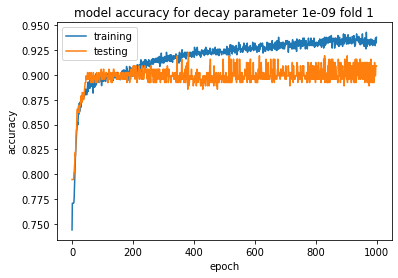

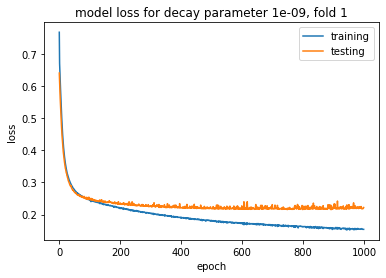

Epoch 1/1000
149/149 - 0s - loss: 0.7204 - accuracy: 0.7565 - val_loss: 0.6244 - val_accuracy: 0.7576
Epoch 2/1000
149/149 - 0s - loss: 0.5905 - accuracy: 0.7767 - val_loss: 0.5740 - val_accuracy: 0.7542
Epoch 3/1000
149/149 - 0s - loss: 0.5595 - accuracy: 0.7783 - val_loss: 0.5388 - val_accuracy: 0.7508
Epoch 4/1000
149/149 - 0s - loss: 0.5356 - accuracy: 0.7783 - val_loss: 0.5105 - val_accuracy: 0.7643
Epoch 5/1000
149/149 - 0s - loss: 0.5149 - accuracy: 0.7876 - val_loss: 0.4867 - val_accuracy: 0.7744
Epoch 6/1000
149/149 - 0s - loss: 0.4954 - accuracy: 0.7893 - val_loss: 0.4637 - val_accuracy: 0.8081
Epoch 7/1000
149/149 - 0s - loss: 0.4788 - accuracy: 0.8052 - val_loss: 0.4434 - val_accuracy: 0.8215
Epoch 8/1000
149/149 - 0s - loss: 0.4627 - accuracy: 0.8111 - val_loss: 0.4264 - val_accuracy: 0.8114
Epoch 9/1000
149/149 - 0s - loss: 0.4485 - accuracy: 0.8128 - val_loss: 0.4085 - val_accuracy: 0.8451
Epoch 10/1000
149/149 - 0s - loss: 0.4340 - accuracy: 0.8178 - val_loss: 0.3935 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2478 - accuracy: 0.8976 - val_loss: 0.2593 - val_accuracy: 0.9125
Epoch 82/1000
149/149 - 0s - loss: 0.2469 - accuracy: 0.8875 - val_loss: 0.2544 - val_accuracy: 0.9125
Epoch 83/1000
149/149 - 0s - loss: 0.2461 - accuracy: 0.8959 - val_loss: 0.2533 - val_accuracy: 0.9125
Epoch 84/1000
149/149 - 0s - loss: 0.2452 - accuracy: 0.8917 - val_loss: 0.2537 - val_accuracy: 0.9057
Epoch 85/1000
149/149 - 0s - loss: 0.2439 - accuracy: 0.8950 - val_loss: 0.2529 - val_accuracy: 0.9091
Epoch 86/1000
149/149 - 0s - loss: 0.2453 - accuracy: 0.8934 - val_loss: 0.2532 - val_accuracy: 0.9125
Epoch 87/1000
149/149 - 0s - loss: 0.2441 - accuracy: 0.8942 - val_loss: 0.2567 - val_accuracy: 0.9125
Epoch 88/1000
149/149 - 0s - loss: 0.2422 - accuracy: 0.8959 - val_loss: 0.2554 - val_accuracy: 0.9125
Epoch 89/1000
149/149 - 0s - loss: 0.2431 - accuracy: 0.8942 - val_loss: 0.2539 - val_accuracy: 0.9125
Epoch 90/1000
149/149 - 0s - loss: 0.2430 - accuracy: 0.8917 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2199 - accuracy: 0.9043 - val_loss: 0.2473 - val_accuracy: 0.9024
Epoch 161/1000
149/149 - 0s - loss: 0.2192 - accuracy: 0.9068 - val_loss: 0.2555 - val_accuracy: 0.9091
Epoch 162/1000
149/149 - 0s - loss: 0.2184 - accuracy: 0.9043 - val_loss: 0.2471 - val_accuracy: 0.8990
Epoch 163/1000
149/149 - 0s - loss: 0.2181 - accuracy: 0.9093 - val_loss: 0.2495 - val_accuracy: 0.9057
Epoch 164/1000
149/149 - 0s - loss: 0.2194 - accuracy: 0.9043 - val_loss: 0.2483 - val_accuracy: 0.9057
Epoch 165/1000
149/149 - 0s - loss: 0.2174 - accuracy: 0.9034 - val_loss: 0.2521 - val_accuracy: 0.8990
Epoch 166/1000
149/149 - 0s - loss: 0.2161 - accuracy: 0.9043 - val_loss: 0.2534 - val_accuracy: 0.9024
Epoch 167/1000
149/149 - 0s - loss: 0.2169 - accuracy: 0.9127 - val_loss: 0.2498 - val_accuracy: 0.9024
Epoch 168/1000
149/149 - 0s - loss: 0.2170 - accuracy: 0.9102 - val_loss: 0.2446 - val_accuracy: 0.9057
Epoch 169/1000
149/149 - 0s - loss: 0.2176 - accuracy: 0.9043 - 

Epoch 239/1000
149/149 - 0s - loss: 0.2027 - accuracy: 0.9085 - val_loss: 0.2394 - val_accuracy: 0.9091
Epoch 240/1000
149/149 - 0s - loss: 0.2025 - accuracy: 0.9152 - val_loss: 0.2489 - val_accuracy: 0.8990
Epoch 241/1000
149/149 - 0s - loss: 0.2043 - accuracy: 0.9110 - val_loss: 0.2417 - val_accuracy: 0.9024
Epoch 242/1000
149/149 - 0s - loss: 0.2023 - accuracy: 0.9085 - val_loss: 0.2375 - val_accuracy: 0.9057
Epoch 243/1000
149/149 - 0s - loss: 0.2035 - accuracy: 0.9093 - val_loss: 0.2423 - val_accuracy: 0.9057
Epoch 244/1000
149/149 - 0s - loss: 0.2037 - accuracy: 0.9085 - val_loss: 0.2435 - val_accuracy: 0.9024
Epoch 245/1000
149/149 - 0s - loss: 0.2012 - accuracy: 0.9135 - val_loss: 0.2367 - val_accuracy: 0.9057
Epoch 246/1000
149/149 - 0s - loss: 0.2033 - accuracy: 0.9102 - val_loss: 0.2428 - val_accuracy: 0.9024
Epoch 247/1000
149/149 - 0s - loss: 0.2008 - accuracy: 0.9060 - val_loss: 0.2487 - val_accuracy: 0.9024
Epoch 248/1000
149/149 - 0s - loss: 0.2016 - accuracy: 0.9110 - 

Epoch 318/1000
149/149 - 0s - loss: 0.1924 - accuracy: 0.9127 - val_loss: 0.2422 - val_accuracy: 0.9057
Epoch 319/1000
149/149 - 0s - loss: 0.1929 - accuracy: 0.9177 - val_loss: 0.2349 - val_accuracy: 0.9125
Epoch 320/1000
149/149 - 0s - loss: 0.1924 - accuracy: 0.9135 - val_loss: 0.2407 - val_accuracy: 0.9057
Epoch 321/1000
149/149 - 0s - loss: 0.1923 - accuracy: 0.9144 - val_loss: 0.2337 - val_accuracy: 0.9024
Epoch 322/1000
149/149 - 0s - loss: 0.1936 - accuracy: 0.9102 - val_loss: 0.2335 - val_accuracy: 0.9158
Epoch 323/1000
149/149 - 0s - loss: 0.1924 - accuracy: 0.9144 - val_loss: 0.2379 - val_accuracy: 0.9091
Epoch 324/1000
149/149 - 0s - loss: 0.1916 - accuracy: 0.9144 - val_loss: 0.2352 - val_accuracy: 0.8956
Epoch 325/1000
149/149 - 0s - loss: 0.1923 - accuracy: 0.9102 - val_loss: 0.2382 - val_accuracy: 0.9024
Epoch 326/1000
149/149 - 0s - loss: 0.1924 - accuracy: 0.9085 - val_loss: 0.2355 - val_accuracy: 0.9024
Epoch 327/1000
149/149 - 0s - loss: 0.1910 - accuracy: 0.9085 - 

Epoch 397/1000
149/149 - 0s - loss: 0.1835 - accuracy: 0.9194 - val_loss: 0.2308 - val_accuracy: 0.9057
Epoch 398/1000
149/149 - 0s - loss: 0.1829 - accuracy: 0.9186 - val_loss: 0.2268 - val_accuracy: 0.9125
Epoch 399/1000
149/149 - 0s - loss: 0.1847 - accuracy: 0.9194 - val_loss: 0.2314 - val_accuracy: 0.9024
Epoch 400/1000
149/149 - 0s - loss: 0.1818 - accuracy: 0.9144 - val_loss: 0.2327 - val_accuracy: 0.9091
Epoch 401/1000
149/149 - 0s - loss: 0.1816 - accuracy: 0.9186 - val_loss: 0.2409 - val_accuracy: 0.9057
Epoch 402/1000
149/149 - 0s - loss: 0.1829 - accuracy: 0.9211 - val_loss: 0.2328 - val_accuracy: 0.9125
Epoch 403/1000
149/149 - 0s - loss: 0.1818 - accuracy: 0.9228 - val_loss: 0.2335 - val_accuracy: 0.9024
Epoch 404/1000
149/149 - 0s - loss: 0.1824 - accuracy: 0.9152 - val_loss: 0.2413 - val_accuracy: 0.8956
Epoch 405/1000
149/149 - 0s - loss: 0.1815 - accuracy: 0.9169 - val_loss: 0.2406 - val_accuracy: 0.8990
Epoch 406/1000
149/149 - 0s - loss: 0.1832 - accuracy: 0.9169 - 

Epoch 476/1000
149/149 - 0s - loss: 0.1757 - accuracy: 0.9194 - val_loss: 0.2278 - val_accuracy: 0.9091
Epoch 477/1000
149/149 - 0s - loss: 0.1728 - accuracy: 0.9244 - val_loss: 0.2194 - val_accuracy: 0.9327
Epoch 478/1000
149/149 - 0s - loss: 0.1748 - accuracy: 0.9236 - val_loss: 0.2284 - val_accuracy: 0.9024
Epoch 479/1000
149/149 - 0s - loss: 0.1746 - accuracy: 0.9194 - val_loss: 0.2245 - val_accuracy: 0.9024
Epoch 480/1000
149/149 - 0s - loss: 0.1733 - accuracy: 0.9236 - val_loss: 0.2385 - val_accuracy: 0.8956
Epoch 481/1000
149/149 - 0s - loss: 0.1743 - accuracy: 0.9236 - val_loss: 0.2258 - val_accuracy: 0.9057
Epoch 482/1000
149/149 - 0s - loss: 0.1727 - accuracy: 0.9194 - val_loss: 0.2419 - val_accuracy: 0.9024
Epoch 483/1000
149/149 - 0s - loss: 0.1736 - accuracy: 0.9228 - val_loss: 0.2320 - val_accuracy: 0.8956
Epoch 484/1000
149/149 - 0s - loss: 0.1744 - accuracy: 0.9219 - val_loss: 0.2230 - val_accuracy: 0.9057
Epoch 485/1000
149/149 - 0s - loss: 0.1747 - accuracy: 0.9236 - 

Epoch 555/1000
149/149 - 0s - loss: 0.1668 - accuracy: 0.9253 - val_loss: 0.2253 - val_accuracy: 0.9091
Epoch 556/1000
149/149 - 0s - loss: 0.1674 - accuracy: 0.9219 - val_loss: 0.2334 - val_accuracy: 0.9091
Epoch 557/1000
149/149 - 0s - loss: 0.1681 - accuracy: 0.9236 - val_loss: 0.2288 - val_accuracy: 0.8990
Epoch 558/1000
149/149 - 0s - loss: 0.1679 - accuracy: 0.9244 - val_loss: 0.2211 - val_accuracy: 0.9125
Epoch 559/1000
149/149 - 0s - loss: 0.1664 - accuracy: 0.9236 - val_loss: 0.2314 - val_accuracy: 0.9091
Epoch 560/1000
149/149 - 0s - loss: 0.1664 - accuracy: 0.9286 - val_loss: 0.2295 - val_accuracy: 0.9057
Epoch 561/1000
149/149 - 0s - loss: 0.1673 - accuracy: 0.9286 - val_loss: 0.2310 - val_accuracy: 0.9158
Epoch 562/1000
149/149 - 0s - loss: 0.1655 - accuracy: 0.9295 - val_loss: 0.2219 - val_accuracy: 0.9192
Epoch 563/1000
149/149 - 0s - loss: 0.1670 - accuracy: 0.9244 - val_loss: 0.2194 - val_accuracy: 0.9057
Epoch 564/1000
149/149 - 0s - loss: 0.1683 - accuracy: 0.9278 - 

Epoch 634/1000
149/149 - 0s - loss: 0.1617 - accuracy: 0.9286 - val_loss: 0.2248 - val_accuracy: 0.9091
Epoch 635/1000
149/149 - 0s - loss: 0.1610 - accuracy: 0.9286 - val_loss: 0.2249 - val_accuracy: 0.9125
Epoch 636/1000
149/149 - 0s - loss: 0.1615 - accuracy: 0.9270 - val_loss: 0.2195 - val_accuracy: 0.9158
Epoch 637/1000
149/149 - 0s - loss: 0.1621 - accuracy: 0.9270 - val_loss: 0.2200 - val_accuracy: 0.9192
Epoch 638/1000
149/149 - 0s - loss: 0.1602 - accuracy: 0.9278 - val_loss: 0.2237 - val_accuracy: 0.9057
Epoch 639/1000
149/149 - 0s - loss: 0.1618 - accuracy: 0.9286 - val_loss: 0.2200 - val_accuracy: 0.9158
Epoch 640/1000
149/149 - 0s - loss: 0.1604 - accuracy: 0.9286 - val_loss: 0.2240 - val_accuracy: 0.9091
Epoch 641/1000
149/149 - 0s - loss: 0.1607 - accuracy: 0.9303 - val_loss: 0.2211 - val_accuracy: 0.9125
Epoch 642/1000
149/149 - 0s - loss: 0.1609 - accuracy: 0.9286 - val_loss: 0.2269 - val_accuracy: 0.9158
Epoch 643/1000
149/149 - 0s - loss: 0.1591 - accuracy: 0.9295 - 

Epoch 713/1000
149/149 - 0s - loss: 0.1561 - accuracy: 0.9337 - val_loss: 0.2211 - val_accuracy: 0.9091
Epoch 714/1000
149/149 - 0s - loss: 0.1567 - accuracy: 0.9320 - val_loss: 0.2264 - val_accuracy: 0.9091
Epoch 715/1000
149/149 - 0s - loss: 0.1569 - accuracy: 0.9312 - val_loss: 0.2262 - val_accuracy: 0.9091
Epoch 716/1000
149/149 - 0s - loss: 0.1560 - accuracy: 0.9362 - val_loss: 0.2227 - val_accuracy: 0.9125
Epoch 717/1000
149/149 - 0s - loss: 0.1573 - accuracy: 0.9295 - val_loss: 0.2174 - val_accuracy: 0.9226
Epoch 718/1000
149/149 - 0s - loss: 0.1564 - accuracy: 0.9345 - val_loss: 0.2251 - val_accuracy: 0.9125
Epoch 719/1000
149/149 - 0s - loss: 0.1545 - accuracy: 0.9345 - val_loss: 0.2276 - val_accuracy: 0.9192
Epoch 720/1000
149/149 - 0s - loss: 0.1565 - accuracy: 0.9295 - val_loss: 0.2302 - val_accuracy: 0.9125
Epoch 721/1000
149/149 - 0s - loss: 0.1561 - accuracy: 0.9362 - val_loss: 0.2268 - val_accuracy: 0.9057
Epoch 722/1000
149/149 - 0s - loss: 0.1563 - accuracy: 0.9328 - 

Epoch 792/1000
149/149 - 0s - loss: 0.1518 - accuracy: 0.9362 - val_loss: 0.2178 - val_accuracy: 0.9125
Epoch 793/1000
149/149 - 0s - loss: 0.1501 - accuracy: 0.9337 - val_loss: 0.2214 - val_accuracy: 0.9091
Epoch 794/1000
149/149 - 0s - loss: 0.1529 - accuracy: 0.9328 - val_loss: 0.2265 - val_accuracy: 0.9125
Epoch 795/1000
149/149 - 0s - loss: 0.1508 - accuracy: 0.9328 - val_loss: 0.2260 - val_accuracy: 0.9091
Epoch 796/1000
149/149 - 0s - loss: 0.1512 - accuracy: 0.9353 - val_loss: 0.2213 - val_accuracy: 0.9192
Epoch 797/1000
149/149 - 0s - loss: 0.1505 - accuracy: 0.9328 - val_loss: 0.2274 - val_accuracy: 0.9091
Epoch 798/1000
149/149 - 0s - loss: 0.1511 - accuracy: 0.9370 - val_loss: 0.2288 - val_accuracy: 0.9091
Epoch 799/1000
149/149 - 0s - loss: 0.1509 - accuracy: 0.9353 - val_loss: 0.2126 - val_accuracy: 0.9226
Epoch 800/1000
149/149 - 0s - loss: 0.1504 - accuracy: 0.9328 - val_loss: 0.2297 - val_accuracy: 0.9091
Epoch 801/1000
149/149 - 0s - loss: 0.1520 - accuracy: 0.9320 - 

Epoch 871/1000
149/149 - 0s - loss: 0.1461 - accuracy: 0.9387 - val_loss: 0.2121 - val_accuracy: 0.9125
Epoch 872/1000
149/149 - 0s - loss: 0.1469 - accuracy: 0.9404 - val_loss: 0.2211 - val_accuracy: 0.9125
Epoch 873/1000
149/149 - 0s - loss: 0.1464 - accuracy: 0.9421 - val_loss: 0.2217 - val_accuracy: 0.9091
Epoch 874/1000
149/149 - 0s - loss: 0.1481 - accuracy: 0.9353 - val_loss: 0.2124 - val_accuracy: 0.9226
Epoch 875/1000
149/149 - 0s - loss: 0.1472 - accuracy: 0.9345 - val_loss: 0.2267 - val_accuracy: 0.9057
Epoch 876/1000
149/149 - 0s - loss: 0.1473 - accuracy: 0.9379 - val_loss: 0.2250 - val_accuracy: 0.9125
Epoch 877/1000
149/149 - 0s - loss: 0.1479 - accuracy: 0.9362 - val_loss: 0.2222 - val_accuracy: 0.9125
Epoch 878/1000
149/149 - 0s - loss: 0.1475 - accuracy: 0.9404 - val_loss: 0.2145 - val_accuracy: 0.9158
Epoch 879/1000
149/149 - 0s - loss: 0.1479 - accuracy: 0.9387 - val_loss: 0.2157 - val_accuracy: 0.9158
Epoch 880/1000
149/149 - 0s - loss: 0.1477 - accuracy: 0.9412 - 

Epoch 950/1000
149/149 - 0s - loss: 0.1434 - accuracy: 0.9412 - val_loss: 0.2292 - val_accuracy: 0.9024
Epoch 951/1000
149/149 - 0s - loss: 0.1440 - accuracy: 0.9429 - val_loss: 0.2306 - val_accuracy: 0.8956
Epoch 952/1000
149/149 - 0s - loss: 0.1429 - accuracy: 0.9387 - val_loss: 0.2331 - val_accuracy: 0.9057
Epoch 953/1000
149/149 - 0s - loss: 0.1445 - accuracy: 0.9395 - val_loss: 0.2263 - val_accuracy: 0.9091
Epoch 954/1000
149/149 - 0s - loss: 0.1422 - accuracy: 0.9437 - val_loss: 0.2194 - val_accuracy: 0.9158
Epoch 955/1000
149/149 - 0s - loss: 0.1439 - accuracy: 0.9387 - val_loss: 0.2250 - val_accuracy: 0.9024
Epoch 956/1000
149/149 - 0s - loss: 0.1414 - accuracy: 0.9395 - val_loss: 0.2364 - val_accuracy: 0.8990
Epoch 957/1000
149/149 - 0s - loss: 0.1431 - accuracy: 0.9404 - val_loss: 0.2162 - val_accuracy: 0.9192
Epoch 958/1000
149/149 - 0s - loss: 0.1438 - accuracy: 0.9412 - val_loss: 0.2177 - val_accuracy: 0.9158
Epoch 959/1000
149/149 - 0s - loss: 0.1429 - accuracy: 0.9454 - 

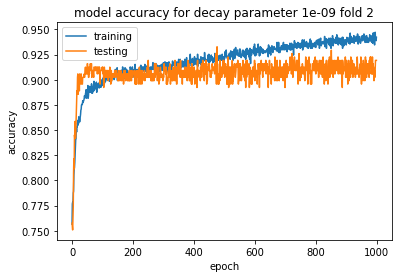

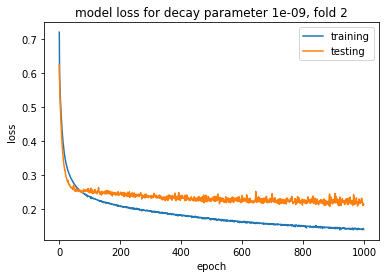

Epoch 1/1000
149/149 - 0s - loss: 0.7538 - accuracy: 0.7414 - val_loss: 0.6334 - val_accuracy: 0.7980
Epoch 2/1000
149/149 - 0s - loss: 0.6474 - accuracy: 0.7699 - val_loss: 0.5937 - val_accuracy: 0.7980
Epoch 3/1000
149/149 - 0s - loss: 0.6074 - accuracy: 0.7699 - val_loss: 0.5604 - val_accuracy: 0.7980
Epoch 4/1000
149/149 - 0s - loss: 0.5726 - accuracy: 0.7699 - val_loss: 0.5351 - val_accuracy: 0.7980
Epoch 5/1000
149/149 - 0s - loss: 0.5415 - accuracy: 0.7699 - val_loss: 0.5043 - val_accuracy: 0.7980
Epoch 6/1000
149/149 - 0s - loss: 0.5133 - accuracy: 0.7750 - val_loss: 0.4843 - val_accuracy: 0.8013
Epoch 7/1000
149/149 - 0s - loss: 0.4892 - accuracy: 0.7834 - val_loss: 0.4623 - val_accuracy: 0.8215
Epoch 8/1000
149/149 - 0s - loss: 0.4681 - accuracy: 0.7960 - val_loss: 0.4415 - val_accuracy: 0.8283
Epoch 9/1000
149/149 - 0s - loss: 0.4494 - accuracy: 0.8077 - val_loss: 0.4272 - val_accuracy: 0.8451
Epoch 10/1000
149/149 - 0s - loss: 0.4326 - accuracy: 0.8212 - val_loss: 0.4108 - 

Epoch 79/1000
149/149 - 0s - loss: 0.2573 - accuracy: 0.8976 - val_loss: 0.2546 - val_accuracy: 0.8822
Epoch 80/1000
149/149 - 0s - loss: 0.2565 - accuracy: 0.8959 - val_loss: 0.2495 - val_accuracy: 0.8788
Epoch 81/1000
149/149 - 0s - loss: 0.2564 - accuracy: 0.8950 - val_loss: 0.2638 - val_accuracy: 0.8822
Epoch 82/1000
149/149 - 0s - loss: 0.2561 - accuracy: 0.8875 - val_loss: 0.2593 - val_accuracy: 0.8889
Epoch 83/1000
149/149 - 0s - loss: 0.2563 - accuracy: 0.8900 - val_loss: 0.2452 - val_accuracy: 0.9024
Epoch 84/1000
149/149 - 0s - loss: 0.2541 - accuracy: 0.8934 - val_loss: 0.2468 - val_accuracy: 0.8822
Epoch 85/1000
149/149 - 0s - loss: 0.2537 - accuracy: 0.8950 - val_loss: 0.2492 - val_accuracy: 0.8855
Epoch 86/1000
149/149 - 0s - loss: 0.2541 - accuracy: 0.8942 - val_loss: 0.2481 - val_accuracy: 0.8822
Epoch 87/1000
149/149 - 0s - loss: 0.2539 - accuracy: 0.8917 - val_loss: 0.2461 - val_accuracy: 0.8788
Epoch 88/1000
149/149 - 0s - loss: 0.2518 - accuracy: 0.8976 - val_loss: 

Epoch 158/1000
149/149 - 0s - loss: 0.2348 - accuracy: 0.8908 - val_loss: 0.2281 - val_accuracy: 0.8923
Epoch 159/1000
149/149 - 0s - loss: 0.2352 - accuracy: 0.8967 - val_loss: 0.2280 - val_accuracy: 0.8923
Epoch 160/1000
149/149 - 0s - loss: 0.2357 - accuracy: 0.8992 - val_loss: 0.2259 - val_accuracy: 0.8923
Epoch 161/1000
149/149 - 0s - loss: 0.2343 - accuracy: 0.9043 - val_loss: 0.2482 - val_accuracy: 0.8923
Epoch 162/1000
149/149 - 0s - loss: 0.2360 - accuracy: 0.9001 - val_loss: 0.2264 - val_accuracy: 0.8889
Epoch 163/1000
149/149 - 0s - loss: 0.2328 - accuracy: 0.9043 - val_loss: 0.2450 - val_accuracy: 0.8990
Epoch 164/1000
149/149 - 0s - loss: 0.2348 - accuracy: 0.9001 - val_loss: 0.2273 - val_accuracy: 0.8923
Epoch 165/1000
149/149 - 0s - loss: 0.2319 - accuracy: 0.8959 - val_loss: 0.2217 - val_accuracy: 0.9024
Epoch 166/1000
149/149 - 0s - loss: 0.2310 - accuracy: 0.8992 - val_loss: 0.2225 - val_accuracy: 0.9125
Epoch 167/1000
149/149 - 0s - loss: 0.2339 - accuracy: 0.8992 - 

Epoch 237/1000
149/149 - 0s - loss: 0.2211 - accuracy: 0.9034 - val_loss: 0.2192 - val_accuracy: 0.9091
Epoch 238/1000
149/149 - 0s - loss: 0.2197 - accuracy: 0.9085 - val_loss: 0.2333 - val_accuracy: 0.9125
Epoch 239/1000
149/149 - 0s - loss: 0.2188 - accuracy: 0.9026 - val_loss: 0.2241 - val_accuracy: 0.9057
Epoch 240/1000
149/149 - 0s - loss: 0.2209 - accuracy: 0.9076 - val_loss: 0.2284 - val_accuracy: 0.9057
Epoch 241/1000
149/149 - 0s - loss: 0.2214 - accuracy: 0.9009 - val_loss: 0.2241 - val_accuracy: 0.9091
Epoch 242/1000
149/149 - 0s - loss: 0.2193 - accuracy: 0.9018 - val_loss: 0.2122 - val_accuracy: 0.9091
Epoch 243/1000
149/149 - 0s - loss: 0.2204 - accuracy: 0.9026 - val_loss: 0.2180 - val_accuracy: 0.9125
Epoch 244/1000
149/149 - 0s - loss: 0.2210 - accuracy: 0.9043 - val_loss: 0.2162 - val_accuracy: 0.9125
Epoch 245/1000
149/149 - 0s - loss: 0.2199 - accuracy: 0.9009 - val_loss: 0.2188 - val_accuracy: 0.9091
Epoch 246/1000
149/149 - 0s - loss: 0.2201 - accuracy: 0.8984 - 

Epoch 316/1000
149/149 - 0s - loss: 0.2099 - accuracy: 0.9068 - val_loss: 0.2146 - val_accuracy: 0.9192
Epoch 317/1000
149/149 - 0s - loss: 0.2087 - accuracy: 0.9110 - val_loss: 0.2092 - val_accuracy: 0.9192
Epoch 318/1000
149/149 - 0s - loss: 0.2099 - accuracy: 0.9085 - val_loss: 0.2057 - val_accuracy: 0.9259
Epoch 319/1000
149/149 - 0s - loss: 0.2103 - accuracy: 0.9060 - val_loss: 0.2102 - val_accuracy: 0.9192
Epoch 320/1000
149/149 - 0s - loss: 0.2090 - accuracy: 0.9068 - val_loss: 0.2074 - val_accuracy: 0.9192
Epoch 321/1000
149/149 - 0s - loss: 0.2094 - accuracy: 0.9076 - val_loss: 0.2167 - val_accuracy: 0.9125
Epoch 322/1000
149/149 - 0s - loss: 0.2092 - accuracy: 0.9085 - val_loss: 0.2115 - val_accuracy: 0.9158
Epoch 323/1000
149/149 - 0s - loss: 0.2088 - accuracy: 0.9068 - val_loss: 0.2062 - val_accuracy: 0.9192
Epoch 324/1000
149/149 - 0s - loss: 0.2086 - accuracy: 0.9043 - val_loss: 0.2146 - val_accuracy: 0.9125
Epoch 325/1000
149/149 - 0s - loss: 0.2080 - accuracy: 0.9085 - 

Epoch 395/1000
149/149 - 0s - loss: 0.1988 - accuracy: 0.9152 - val_loss: 0.2021 - val_accuracy: 0.9226
Epoch 396/1000
149/149 - 0s - loss: 0.1973 - accuracy: 0.9144 - val_loss: 0.2006 - val_accuracy: 0.9158
Epoch 397/1000
149/149 - 0s - loss: 0.1988 - accuracy: 0.9093 - val_loss: 0.2180 - val_accuracy: 0.9091
Epoch 398/1000
149/149 - 0s - loss: 0.1992 - accuracy: 0.9118 - val_loss: 0.2018 - val_accuracy: 0.9226
Epoch 399/1000
149/149 - 0s - loss: 0.1989 - accuracy: 0.9060 - val_loss: 0.2025 - val_accuracy: 0.9226
Epoch 400/1000
149/149 - 0s - loss: 0.1978 - accuracy: 0.9110 - val_loss: 0.1997 - val_accuracy: 0.9158
Epoch 401/1000
149/149 - 0s - loss: 0.1977 - accuracy: 0.9060 - val_loss: 0.1985 - val_accuracy: 0.9158
Epoch 402/1000
149/149 - 0s - loss: 0.1976 - accuracy: 0.9068 - val_loss: 0.2019 - val_accuracy: 0.9226
Epoch 403/1000
149/149 - 0s - loss: 0.1983 - accuracy: 0.9102 - val_loss: 0.2031 - val_accuracy: 0.9259
Epoch 404/1000
149/149 - 0s - loss: 0.1973 - accuracy: 0.9110 - 

Epoch 474/1000
149/149 - 0s - loss: 0.1880 - accuracy: 0.9194 - val_loss: 0.1913 - val_accuracy: 0.9259
Epoch 475/1000
149/149 - 0s - loss: 0.1881 - accuracy: 0.9127 - val_loss: 0.2028 - val_accuracy: 0.9158
Epoch 476/1000
149/149 - 0s - loss: 0.1903 - accuracy: 0.9127 - val_loss: 0.2025 - val_accuracy: 0.9158
Epoch 477/1000
149/149 - 0s - loss: 0.1884 - accuracy: 0.9160 - val_loss: 0.2047 - val_accuracy: 0.9125
Epoch 478/1000
149/149 - 0s - loss: 0.1900 - accuracy: 0.9118 - val_loss: 0.2003 - val_accuracy: 0.9158
Epoch 479/1000
149/149 - 0s - loss: 0.1893 - accuracy: 0.9118 - val_loss: 0.1980 - val_accuracy: 0.9226
Epoch 480/1000
149/149 - 0s - loss: 0.1884 - accuracy: 0.9144 - val_loss: 0.2080 - val_accuracy: 0.9057
Epoch 481/1000
149/149 - 0s - loss: 0.1893 - accuracy: 0.9102 - val_loss: 0.2051 - val_accuracy: 0.9091
Epoch 482/1000
149/149 - 0s - loss: 0.1853 - accuracy: 0.9093 - val_loss: 0.1913 - val_accuracy: 0.9259
Epoch 483/1000
149/149 - 0s - loss: 0.1893 - accuracy: 0.9076 - 

Epoch 553/1000
149/149 - 0s - loss: 0.1812 - accuracy: 0.9144 - val_loss: 0.1905 - val_accuracy: 0.9327
Epoch 554/1000
149/149 - 0s - loss: 0.1805 - accuracy: 0.9118 - val_loss: 0.1864 - val_accuracy: 0.9327
Epoch 555/1000
149/149 - 0s - loss: 0.1799 - accuracy: 0.9169 - val_loss: 0.1886 - val_accuracy: 0.9293
Epoch 556/1000
149/149 - 0s - loss: 0.1824 - accuracy: 0.9093 - val_loss: 0.1990 - val_accuracy: 0.9125
Epoch 557/1000
149/149 - 0s - loss: 0.1824 - accuracy: 0.9127 - val_loss: 0.1904 - val_accuracy: 0.9293
Epoch 558/1000
149/149 - 0s - loss: 0.1811 - accuracy: 0.9202 - val_loss: 0.2226 - val_accuracy: 0.9024
Epoch 559/1000
149/149 - 0s - loss: 0.1826 - accuracy: 0.9194 - val_loss: 0.1870 - val_accuracy: 0.9293
Epoch 560/1000
149/149 - 0s - loss: 0.1806 - accuracy: 0.9194 - val_loss: 0.1985 - val_accuracy: 0.9192
Epoch 561/1000
149/149 - 0s - loss: 0.1820 - accuracy: 0.9169 - val_loss: 0.1888 - val_accuracy: 0.9259
Epoch 562/1000
149/149 - 0s - loss: 0.1806 - accuracy: 0.9160 - 

Epoch 632/1000
149/149 - 0s - loss: 0.1742 - accuracy: 0.9253 - val_loss: 0.1914 - val_accuracy: 0.9226
Epoch 633/1000
149/149 - 0s - loss: 0.1755 - accuracy: 0.9169 - val_loss: 0.1904 - val_accuracy: 0.9226
Epoch 634/1000
149/149 - 0s - loss: 0.1748 - accuracy: 0.9219 - val_loss: 0.1877 - val_accuracy: 0.9226
Epoch 635/1000
149/149 - 0s - loss: 0.1754 - accuracy: 0.9211 - val_loss: 0.1851 - val_accuracy: 0.9259
Epoch 636/1000
149/149 - 0s - loss: 0.1745 - accuracy: 0.9177 - val_loss: 0.1856 - val_accuracy: 0.9293
Epoch 637/1000
149/149 - 0s - loss: 0.1749 - accuracy: 0.9219 - val_loss: 0.1849 - val_accuracy: 0.9293
Epoch 638/1000
149/149 - 0s - loss: 0.1725 - accuracy: 0.9253 - val_loss: 0.2137 - val_accuracy: 0.9057
Epoch 639/1000
149/149 - 0s - loss: 0.1776 - accuracy: 0.9219 - val_loss: 0.1882 - val_accuracy: 0.9259
Epoch 640/1000
149/149 - 0s - loss: 0.1750 - accuracy: 0.9202 - val_loss: 0.1928 - val_accuracy: 0.9226
Epoch 641/1000
149/149 - 0s - loss: 0.1763 - accuracy: 0.9177 - 

Epoch 711/1000
149/149 - 0s - loss: 0.1711 - accuracy: 0.9211 - val_loss: 0.1838 - val_accuracy: 0.9293
Epoch 712/1000
149/149 - 0s - loss: 0.1709 - accuracy: 0.9135 - val_loss: 0.1934 - val_accuracy: 0.9091
Epoch 713/1000
149/149 - 0s - loss: 0.1700 - accuracy: 0.9228 - val_loss: 0.1818 - val_accuracy: 0.9259
Epoch 714/1000
149/149 - 0s - loss: 0.1700 - accuracy: 0.9211 - val_loss: 0.1814 - val_accuracy: 0.9259
Epoch 715/1000
149/149 - 0s - loss: 0.1715 - accuracy: 0.9236 - val_loss: 0.1863 - val_accuracy: 0.9192
Epoch 716/1000
149/149 - 0s - loss: 0.1698 - accuracy: 0.9219 - val_loss: 0.1783 - val_accuracy: 0.9394
Epoch 717/1000
149/149 - 0s - loss: 0.1701 - accuracy: 0.9219 - val_loss: 0.1814 - val_accuracy: 0.9360
Epoch 718/1000
149/149 - 0s - loss: 0.1701 - accuracy: 0.9194 - val_loss: 0.1784 - val_accuracy: 0.9360
Epoch 719/1000
149/149 - 0s - loss: 0.1667 - accuracy: 0.9286 - val_loss: 0.1800 - val_accuracy: 0.9360
Epoch 720/1000
149/149 - 0s - loss: 0.1718 - accuracy: 0.9160 - 

Epoch 790/1000
149/149 - 0s - loss: 0.1658 - accuracy: 0.9278 - val_loss: 0.1767 - val_accuracy: 0.9327
Epoch 791/1000
149/149 - 0s - loss: 0.1655 - accuracy: 0.9261 - val_loss: 0.1887 - val_accuracy: 0.9293
Epoch 792/1000
149/149 - 0s - loss: 0.1654 - accuracy: 0.9261 - val_loss: 0.1771 - val_accuracy: 0.9327
Epoch 793/1000
149/149 - 0s - loss: 0.1638 - accuracy: 0.9186 - val_loss: 0.1843 - val_accuracy: 0.9293
Epoch 794/1000
149/149 - 0s - loss: 0.1669 - accuracy: 0.9303 - val_loss: 0.1742 - val_accuracy: 0.9428
Epoch 795/1000
149/149 - 0s - loss: 0.1637 - accuracy: 0.9202 - val_loss: 0.1738 - val_accuracy: 0.9428
Epoch 796/1000
149/149 - 0s - loss: 0.1641 - accuracy: 0.9253 - val_loss: 0.1759 - val_accuracy: 0.9327
Epoch 797/1000
149/149 - 0s - loss: 0.1642 - accuracy: 0.9270 - val_loss: 0.1770 - val_accuracy: 0.9293
Epoch 798/1000
149/149 - 0s - loss: 0.1646 - accuracy: 0.9278 - val_loss: 0.1835 - val_accuracy: 0.9259
Epoch 799/1000
149/149 - 0s - loss: 0.1653 - accuracy: 0.9236 - 

Epoch 869/1000
149/149 - 0s - loss: 0.1624 - accuracy: 0.9261 - val_loss: 0.1771 - val_accuracy: 0.9327
Epoch 870/1000
149/149 - 0s - loss: 0.1617 - accuracy: 0.9228 - val_loss: 0.1740 - val_accuracy: 0.9327
Epoch 871/1000
149/149 - 0s - loss: 0.1605 - accuracy: 0.9295 - val_loss: 0.1741 - val_accuracy: 0.9327
Epoch 872/1000
149/149 - 0s - loss: 0.1612 - accuracy: 0.9295 - val_loss: 0.1759 - val_accuracy: 0.9293
Epoch 873/1000
149/149 - 0s - loss: 0.1612 - accuracy: 0.9219 - val_loss: 0.1744 - val_accuracy: 0.9327
Epoch 874/1000
149/149 - 0s - loss: 0.1602 - accuracy: 0.9312 - val_loss: 0.1861 - val_accuracy: 0.9158
Epoch 875/1000
149/149 - 0s - loss: 0.1613 - accuracy: 0.9312 - val_loss: 0.2063 - val_accuracy: 0.9057
Epoch 876/1000
149/149 - 0s - loss: 0.1601 - accuracy: 0.9312 - val_loss: 0.1823 - val_accuracy: 0.9192
Epoch 877/1000
149/149 - 0s - loss: 0.1615 - accuracy: 0.9244 - val_loss: 0.1901 - val_accuracy: 0.9158
Epoch 878/1000
149/149 - 0s - loss: 0.1613 - accuracy: 0.9286 - 

Epoch 948/1000
149/149 - 0s - loss: 0.1572 - accuracy: 0.9278 - val_loss: 0.1824 - val_accuracy: 0.9226
Epoch 949/1000
149/149 - 0s - loss: 0.1587 - accuracy: 0.9345 - val_loss: 0.1883 - val_accuracy: 0.9226
Epoch 950/1000
149/149 - 0s - loss: 0.1568 - accuracy: 0.9286 - val_loss: 0.1695 - val_accuracy: 0.9428
Epoch 951/1000
149/149 - 0s - loss: 0.1590 - accuracy: 0.9312 - val_loss: 0.1814 - val_accuracy: 0.9226
Epoch 952/1000
149/149 - 0s - loss: 0.1571 - accuracy: 0.9312 - val_loss: 0.1736 - val_accuracy: 0.9293
Epoch 953/1000
149/149 - 0s - loss: 0.1572 - accuracy: 0.9320 - val_loss: 0.1702 - val_accuracy: 0.9428
Epoch 954/1000
149/149 - 0s - loss: 0.1556 - accuracy: 0.9320 - val_loss: 0.1846 - val_accuracy: 0.9259
Epoch 955/1000
149/149 - 0s - loss: 0.1576 - accuracy: 0.9236 - val_loss: 0.1758 - val_accuracy: 0.9360
Epoch 956/1000
149/149 - 0s - loss: 0.1566 - accuracy: 0.9295 - val_loss: 0.1699 - val_accuracy: 0.9461
Epoch 957/1000
149/149 - 0s - loss: 0.1582 - accuracy: 0.9303 - 

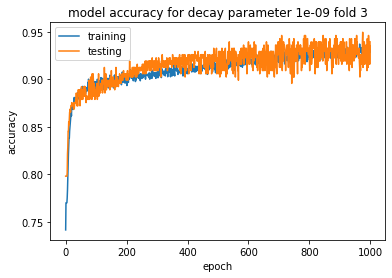

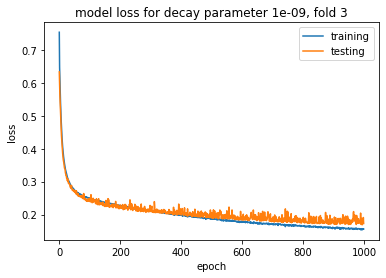

Epoch 1/1000
149/149 - 0s - loss: 0.7152 - accuracy: 0.7817 - val_loss: 0.7238 - val_accuracy: 0.7441
Epoch 2/1000
149/149 - 0s - loss: 0.6343 - accuracy: 0.7834 - val_loss: 0.6943 - val_accuracy: 0.7441
Epoch 3/1000
149/149 - 0s - loss: 0.6008 - accuracy: 0.7834 - val_loss: 0.6639 - val_accuracy: 0.7441
Epoch 4/1000
149/149 - 0s - loss: 0.5696 - accuracy: 0.7834 - val_loss: 0.6359 - val_accuracy: 0.7441
Epoch 5/1000
149/149 - 0s - loss: 0.5442 - accuracy: 0.7834 - val_loss: 0.6155 - val_accuracy: 0.7441
Epoch 6/1000
149/149 - 0s - loss: 0.5187 - accuracy: 0.7834 - val_loss: 0.5919 - val_accuracy: 0.7508
Epoch 7/1000
149/149 - 0s - loss: 0.4964 - accuracy: 0.7859 - val_loss: 0.5735 - val_accuracy: 0.7508
Epoch 8/1000
149/149 - 0s - loss: 0.4758 - accuracy: 0.7935 - val_loss: 0.5571 - val_accuracy: 0.7609
Epoch 9/1000
149/149 - 0s - loss: 0.4566 - accuracy: 0.7985 - val_loss: 0.5389 - val_accuracy: 0.7744
Epoch 10/1000
149/149 - 0s - loss: 0.4400 - accuracy: 0.8136 - val_loss: 0.5270 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2354 - accuracy: 0.9068 - val_loss: 0.3348 - val_accuracy: 0.8283
Epoch 82/1000
149/149 - 0s - loss: 0.2334 - accuracy: 0.9060 - val_loss: 0.3254 - val_accuracy: 0.8350
Epoch 83/1000
149/149 - 0s - loss: 0.2340 - accuracy: 0.9118 - val_loss: 0.3452 - val_accuracy: 0.8384
Epoch 84/1000
149/149 - 0s - loss: 0.2333 - accuracy: 0.9034 - val_loss: 0.3412 - val_accuracy: 0.8418
Epoch 85/1000
149/149 - 0s - loss: 0.2324 - accuracy: 0.9085 - val_loss: 0.3309 - val_accuracy: 0.8283
Epoch 86/1000
149/149 - 0s - loss: 0.2320 - accuracy: 0.9076 - val_loss: 0.3262 - val_accuracy: 0.8283
Epoch 87/1000
149/149 - 0s - loss: 0.2323 - accuracy: 0.9060 - val_loss: 0.3341 - val_accuracy: 0.8316
Epoch 88/1000
149/149 - 0s - loss: 0.2318 - accuracy: 0.9076 - val_loss: 0.3376 - val_accuracy: 0.8316
Epoch 89/1000
149/149 - 0s - loss: 0.2306 - accuracy: 0.9085 - val_loss: 0.3301 - val_accuracy: 0.8249
Epoch 90/1000
149/149 - 0s - loss: 0.2308 - accuracy: 0.9060 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2134 - accuracy: 0.9144 - val_loss: 0.3403 - val_accuracy: 0.8249
Epoch 161/1000
149/149 - 0s - loss: 0.2131 - accuracy: 0.9160 - val_loss: 0.3263 - val_accuracy: 0.8451
Epoch 162/1000
149/149 - 0s - loss: 0.2127 - accuracy: 0.9152 - val_loss: 0.3350 - val_accuracy: 0.8283
Epoch 163/1000
149/149 - 0s - loss: 0.2120 - accuracy: 0.9169 - val_loss: 0.3267 - val_accuracy: 0.8485
Epoch 164/1000
149/149 - 0s - loss: 0.2121 - accuracy: 0.9177 - val_loss: 0.3394 - val_accuracy: 0.8249
Epoch 165/1000
149/149 - 0s - loss: 0.2115 - accuracy: 0.9118 - val_loss: 0.3460 - val_accuracy: 0.8350
Epoch 166/1000
149/149 - 0s - loss: 0.2118 - accuracy: 0.9144 - val_loss: 0.3492 - val_accuracy: 0.8350
Epoch 167/1000
149/149 - 0s - loss: 0.2122 - accuracy: 0.9177 - val_loss: 0.3255 - val_accuracy: 0.8519
Epoch 168/1000
149/149 - 0s - loss: 0.2124 - accuracy: 0.9152 - val_loss: 0.3322 - val_accuracy: 0.8283
Epoch 169/1000
149/149 - 0s - loss: 0.2114 - accuracy: 0.9118 - 

Epoch 239/1000
149/149 - 0s - loss: 0.2006 - accuracy: 0.9186 - val_loss: 0.3373 - val_accuracy: 0.8283
Epoch 240/1000
149/149 - 0s - loss: 0.2028 - accuracy: 0.9135 - val_loss: 0.3420 - val_accuracy: 0.8283
Epoch 241/1000
149/149 - 0s - loss: 0.2030 - accuracy: 0.9186 - val_loss: 0.3341 - val_accuracy: 0.8316
Epoch 242/1000
149/149 - 0s - loss: 0.2020 - accuracy: 0.9236 - val_loss: 0.3509 - val_accuracy: 0.8316
Epoch 243/1000
149/149 - 0s - loss: 0.2026 - accuracy: 0.9144 - val_loss: 0.3411 - val_accuracy: 0.8249
Epoch 244/1000
149/149 - 0s - loss: 0.2023 - accuracy: 0.9202 - val_loss: 0.3582 - val_accuracy: 0.8384
Epoch 245/1000
149/149 - 0s - loss: 0.2028 - accuracy: 0.9135 - val_loss: 0.3465 - val_accuracy: 0.8283
Epoch 246/1000
149/149 - 0s - loss: 0.2027 - accuracy: 0.9152 - val_loss: 0.3431 - val_accuracy: 0.8316
Epoch 247/1000
149/149 - 0s - loss: 0.2013 - accuracy: 0.9202 - val_loss: 0.3451 - val_accuracy: 0.8350
Epoch 248/1000
149/149 - 0s - loss: 0.2019 - accuracy: 0.9177 - 

Epoch 318/1000
149/149 - 0s - loss: 0.1967 - accuracy: 0.9144 - val_loss: 0.3414 - val_accuracy: 0.8316
Epoch 319/1000
149/149 - 0s - loss: 0.1969 - accuracy: 0.9219 - val_loss: 0.3398 - val_accuracy: 0.8316
Epoch 320/1000
149/149 - 0s - loss: 0.1965 - accuracy: 0.9211 - val_loss: 0.3472 - val_accuracy: 0.8283
Epoch 321/1000
149/149 - 0s - loss: 0.1953 - accuracy: 0.9219 - val_loss: 0.3379 - val_accuracy: 0.8350
Epoch 322/1000
149/149 - 0s - loss: 0.1958 - accuracy: 0.9202 - val_loss: 0.3359 - val_accuracy: 0.8384
Epoch 323/1000
149/149 - 0s - loss: 0.1949 - accuracy: 0.9160 - val_loss: 0.3436 - val_accuracy: 0.8316
Epoch 324/1000
149/149 - 0s - loss: 0.1955 - accuracy: 0.9211 - val_loss: 0.3357 - val_accuracy: 0.8418
Epoch 325/1000
149/149 - 0s - loss: 0.1956 - accuracy: 0.9228 - val_loss: 0.3392 - val_accuracy: 0.8283
Epoch 326/1000
149/149 - 0s - loss: 0.1953 - accuracy: 0.9228 - val_loss: 0.3498 - val_accuracy: 0.8418
Epoch 327/1000
149/149 - 0s - loss: 0.1956 - accuracy: 0.9186 - 

Epoch 397/1000
149/149 - 0s - loss: 0.1898 - accuracy: 0.9194 - val_loss: 0.3337 - val_accuracy: 0.8552
Epoch 398/1000
149/149 - 0s - loss: 0.1916 - accuracy: 0.9228 - val_loss: 0.3501 - val_accuracy: 0.8418
Epoch 399/1000
149/149 - 0s - loss: 0.1898 - accuracy: 0.9211 - val_loss: 0.3401 - val_accuracy: 0.8316
Epoch 400/1000
149/149 - 0s - loss: 0.1899 - accuracy: 0.9202 - val_loss: 0.3387 - val_accuracy: 0.8350
Epoch 401/1000
149/149 - 0s - loss: 0.1888 - accuracy: 0.9169 - val_loss: 0.3544 - val_accuracy: 0.8418
Epoch 402/1000
149/149 - 0s - loss: 0.1901 - accuracy: 0.9194 - val_loss: 0.3459 - val_accuracy: 0.8316
Epoch 403/1000
149/149 - 0s - loss: 0.1903 - accuracy: 0.9177 - val_loss: 0.3426 - val_accuracy: 0.8350
Epoch 404/1000
149/149 - 0s - loss: 0.1906 - accuracy: 0.9219 - val_loss: 0.3333 - val_accuracy: 0.8519
Epoch 405/1000
149/149 - 0s - loss: 0.1887 - accuracy: 0.9236 - val_loss: 0.3321 - val_accuracy: 0.8519
Epoch 406/1000
149/149 - 0s - loss: 0.1904 - accuracy: 0.9177 - 

Epoch 476/1000
149/149 - 0s - loss: 0.1843 - accuracy: 0.9177 - val_loss: 0.3333 - val_accuracy: 0.8384
Epoch 477/1000
149/149 - 0s - loss: 0.1817 - accuracy: 0.9202 - val_loss: 0.3368 - val_accuracy: 0.8384
Epoch 478/1000
149/149 - 0s - loss: 0.1844 - accuracy: 0.9186 - val_loss: 0.3296 - val_accuracy: 0.8384
Epoch 479/1000
149/149 - 0s - loss: 0.1823 - accuracy: 0.9244 - val_loss: 0.3457 - val_accuracy: 0.8418
Epoch 480/1000
149/149 - 0s - loss: 0.1828 - accuracy: 0.9194 - val_loss: 0.3344 - val_accuracy: 0.8418
Epoch 481/1000
149/149 - 0s - loss: 0.1839 - accuracy: 0.9194 - val_loss: 0.3280 - val_accuracy: 0.8451
Epoch 482/1000
149/149 - 0s - loss: 0.1809 - accuracy: 0.9253 - val_loss: 0.3446 - val_accuracy: 0.8418
Epoch 483/1000
149/149 - 0s - loss: 0.1829 - accuracy: 0.9186 - val_loss: 0.3394 - val_accuracy: 0.8418
Epoch 484/1000
149/149 - 0s - loss: 0.1832 - accuracy: 0.9186 - val_loss: 0.3285 - val_accuracy: 0.8384
Epoch 485/1000
149/149 - 0s - loss: 0.1825 - accuracy: 0.9278 - 

Epoch 555/1000
149/149 - 0s - loss: 0.1778 - accuracy: 0.9211 - val_loss: 0.3346 - val_accuracy: 0.8418
Epoch 556/1000
149/149 - 0s - loss: 0.1772 - accuracy: 0.9244 - val_loss: 0.3268 - val_accuracy: 0.8384
Epoch 557/1000
149/149 - 0s - loss: 0.1777 - accuracy: 0.9261 - val_loss: 0.3406 - val_accuracy: 0.8418
Epoch 558/1000
149/149 - 0s - loss: 0.1771 - accuracy: 0.9228 - val_loss: 0.3284 - val_accuracy: 0.8552
Epoch 559/1000
149/149 - 0s - loss: 0.1787 - accuracy: 0.9253 - val_loss: 0.3466 - val_accuracy: 0.8451
Epoch 560/1000
149/149 - 0s - loss: 0.1780 - accuracy: 0.9219 - val_loss: 0.3339 - val_accuracy: 0.8350
Epoch 561/1000
149/149 - 0s - loss: 0.1772 - accuracy: 0.9253 - val_loss: 0.3374 - val_accuracy: 0.8350
Epoch 562/1000
149/149 - 0s - loss: 0.1766 - accuracy: 0.9236 - val_loss: 0.3355 - val_accuracy: 0.8350
Epoch 563/1000
149/149 - 0s - loss: 0.1776 - accuracy: 0.9236 - val_loss: 0.3547 - val_accuracy: 0.8418
Epoch 564/1000
149/149 - 0s - loss: 0.1765 - accuracy: 0.9236 - 

Epoch 634/1000
149/149 - 0s - loss: 0.1718 - accuracy: 0.9278 - val_loss: 0.3356 - val_accuracy: 0.8418
Epoch 635/1000
149/149 - 0s - loss: 0.1724 - accuracy: 0.9286 - val_loss: 0.3401 - val_accuracy: 0.8384
Epoch 636/1000
149/149 - 0s - loss: 0.1705 - accuracy: 0.9278 - val_loss: 0.3396 - val_accuracy: 0.8418
Epoch 637/1000
149/149 - 0s - loss: 0.1715 - accuracy: 0.9253 - val_loss: 0.3417 - val_accuracy: 0.8418
Epoch 638/1000
149/149 - 0s - loss: 0.1721 - accuracy: 0.9228 - val_loss: 0.3384 - val_accuracy: 0.8418
Epoch 639/1000
149/149 - 0s - loss: 0.1727 - accuracy: 0.9244 - val_loss: 0.3402 - val_accuracy: 0.8418
Epoch 640/1000
149/149 - 0s - loss: 0.1718 - accuracy: 0.9261 - val_loss: 0.3315 - val_accuracy: 0.8451
Epoch 641/1000
149/149 - 0s - loss: 0.1739 - accuracy: 0.9228 - val_loss: 0.3341 - val_accuracy: 0.8350
Epoch 642/1000
149/149 - 0s - loss: 0.1728 - accuracy: 0.9253 - val_loss: 0.3276 - val_accuracy: 0.8384
Epoch 643/1000
149/149 - 0s - loss: 0.1722 - accuracy: 0.9244 - 

Epoch 713/1000
149/149 - 0s - loss: 0.1683 - accuracy: 0.9211 - val_loss: 0.3402 - val_accuracy: 0.8384
Epoch 714/1000
149/149 - 0s - loss: 0.1662 - accuracy: 0.9286 - val_loss: 0.3452 - val_accuracy: 0.8451
Epoch 715/1000
149/149 - 0s - loss: 0.1669 - accuracy: 0.9244 - val_loss: 0.3291 - val_accuracy: 0.8552
Epoch 716/1000
149/149 - 0s - loss: 0.1667 - accuracy: 0.9270 - val_loss: 0.3387 - val_accuracy: 0.8350
Epoch 717/1000
149/149 - 0s - loss: 0.1682 - accuracy: 0.9270 - val_loss: 0.3470 - val_accuracy: 0.8384
Epoch 718/1000
149/149 - 0s - loss: 0.1677 - accuracy: 0.9278 - val_loss: 0.3350 - val_accuracy: 0.8418
Epoch 719/1000
149/149 - 0s - loss: 0.1648 - accuracy: 0.9278 - val_loss: 0.3538 - val_accuracy: 0.8384
Epoch 720/1000
149/149 - 0s - loss: 0.1663 - accuracy: 0.9261 - val_loss: 0.3371 - val_accuracy: 0.8384
Epoch 721/1000
149/149 - 0s - loss: 0.1668 - accuracy: 0.9278 - val_loss: 0.3313 - val_accuracy: 0.8552
Epoch 722/1000
149/149 - 0s - loss: 0.1670 - accuracy: 0.9312 - 

Epoch 792/1000
149/149 - 0s - loss: 0.1650 - accuracy: 0.9295 - val_loss: 0.3367 - val_accuracy: 0.8485
Epoch 793/1000
149/149 - 0s - loss: 0.1633 - accuracy: 0.9295 - val_loss: 0.3452 - val_accuracy: 0.8384
Epoch 794/1000
149/149 - 0s - loss: 0.1636 - accuracy: 0.9286 - val_loss: 0.3384 - val_accuracy: 0.8485
Epoch 795/1000
149/149 - 0s - loss: 0.1622 - accuracy: 0.9295 - val_loss: 0.3472 - val_accuracy: 0.8350
Epoch 796/1000
149/149 - 0s - loss: 0.1623 - accuracy: 0.9345 - val_loss: 0.3432 - val_accuracy: 0.8418
Epoch 797/1000
149/149 - 0s - loss: 0.1626 - accuracy: 0.9328 - val_loss: 0.3352 - val_accuracy: 0.8485
Epoch 798/1000
149/149 - 0s - loss: 0.1627 - accuracy: 0.9278 - val_loss: 0.3363 - val_accuracy: 0.8451
Epoch 799/1000
149/149 - 0s - loss: 0.1621 - accuracy: 0.9286 - val_loss: 0.3546 - val_accuracy: 0.8316
Epoch 800/1000
149/149 - 0s - loss: 0.1635 - accuracy: 0.9320 - val_loss: 0.3345 - val_accuracy: 0.8519
Epoch 801/1000
149/149 - 0s - loss: 0.1624 - accuracy: 0.9303 - 

Epoch 871/1000
149/149 - 0s - loss: 0.1594 - accuracy: 0.9320 - val_loss: 0.3476 - val_accuracy: 0.8451
Epoch 872/1000
149/149 - 0s - loss: 0.1590 - accuracy: 0.9362 - val_loss: 0.3384 - val_accuracy: 0.8519
Epoch 873/1000
149/149 - 0s - loss: 0.1597 - accuracy: 0.9328 - val_loss: 0.3622 - val_accuracy: 0.8350
Epoch 874/1000
149/149 - 0s - loss: 0.1589 - accuracy: 0.9303 - val_loss: 0.3390 - val_accuracy: 0.8485
Epoch 875/1000
149/149 - 0s - loss: 0.1603 - accuracy: 0.9353 - val_loss: 0.3326 - val_accuracy: 0.8586
Epoch 876/1000
149/149 - 0s - loss: 0.1584 - accuracy: 0.9328 - val_loss: 0.3347 - val_accuracy: 0.8519
Epoch 877/1000
149/149 - 0s - loss: 0.1597 - accuracy: 0.9303 - val_loss: 0.3371 - val_accuracy: 0.8519
Epoch 878/1000
149/149 - 0s - loss: 0.1590 - accuracy: 0.9370 - val_loss: 0.3501 - val_accuracy: 0.8384
Epoch 879/1000
149/149 - 0s - loss: 0.1596 - accuracy: 0.9337 - val_loss: 0.3352 - val_accuracy: 0.8586
Epoch 880/1000
149/149 - 0s - loss: 0.1585 - accuracy: 0.9295 - 

Epoch 950/1000
149/149 - 0s - loss: 0.1561 - accuracy: 0.9337 - val_loss: 0.3728 - val_accuracy: 0.8350
Epoch 951/1000
149/149 - 0s - loss: 0.1581 - accuracy: 0.9278 - val_loss: 0.3421 - val_accuracy: 0.8552
Epoch 952/1000
149/149 - 0s - loss: 0.1577 - accuracy: 0.9370 - val_loss: 0.3429 - val_accuracy: 0.8451
Epoch 953/1000
149/149 - 0s - loss: 0.1568 - accuracy: 0.9303 - val_loss: 0.3605 - val_accuracy: 0.8316
Epoch 954/1000
149/149 - 0s - loss: 0.1571 - accuracy: 0.9270 - val_loss: 0.3535 - val_accuracy: 0.8384
Epoch 955/1000
149/149 - 0s - loss: 0.1544 - accuracy: 0.9345 - val_loss: 0.3692 - val_accuracy: 0.8316
Epoch 956/1000
149/149 - 0s - loss: 0.1556 - accuracy: 0.9345 - val_loss: 0.3593 - val_accuracy: 0.8451
Epoch 957/1000
149/149 - 0s - loss: 0.1579 - accuracy: 0.9270 - val_loss: 0.3395 - val_accuracy: 0.8586
Epoch 958/1000
149/149 - 0s - loss: 0.1573 - accuracy: 0.9328 - val_loss: 0.3411 - val_accuracy: 0.8552
Epoch 959/1000
149/149 - 0s - loss: 0.1567 - accuracy: 0.9345 - 

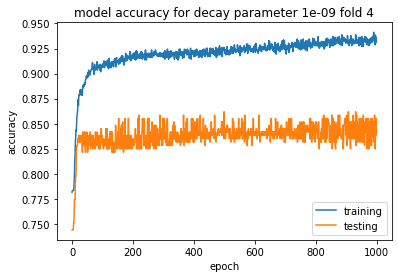

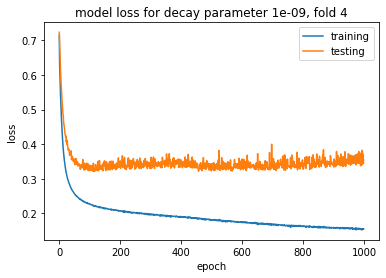

Epoch 1/1000
149/149 - 0s - loss: 0.7753 - accuracy: 0.7296 - val_loss: 0.6476 - val_accuracy: 0.7845
Epoch 2/1000
149/149 - 0s - loss: 0.6340 - accuracy: 0.7733 - val_loss: 0.6065 - val_accuracy: 0.7845
Epoch 3/1000
149/149 - 0s - loss: 0.5988 - accuracy: 0.7733 - val_loss: 0.5786 - val_accuracy: 0.7845
Epoch 4/1000
149/149 - 0s - loss: 0.5706 - accuracy: 0.7733 - val_loss: 0.5570 - val_accuracy: 0.7845
Epoch 5/1000
149/149 - 0s - loss: 0.5473 - accuracy: 0.7733 - val_loss: 0.5327 - val_accuracy: 0.7845
Epoch 6/1000
149/149 - 0s - loss: 0.5244 - accuracy: 0.7750 - val_loss: 0.5183 - val_accuracy: 0.7912
Epoch 7/1000
149/149 - 0s - loss: 0.5055 - accuracy: 0.7859 - val_loss: 0.4971 - val_accuracy: 0.8013
Epoch 8/1000
149/149 - 0s - loss: 0.4871 - accuracy: 0.7926 - val_loss: 0.4795 - val_accuracy: 0.8013
Epoch 9/1000
149/149 - 0s - loss: 0.4706 - accuracy: 0.8069 - val_loss: 0.4649 - val_accuracy: 0.8047
Epoch 10/1000
149/149 - 0s - loss: 0.4548 - accuracy: 0.8161 - val_loss: 0.4467 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2558 - accuracy: 0.8908 - val_loss: 0.2603 - val_accuracy: 0.9024
Epoch 82/1000
149/149 - 0s - loss: 0.2546 - accuracy: 0.8967 - val_loss: 0.2633 - val_accuracy: 0.8889
Epoch 83/1000
149/149 - 0s - loss: 0.2560 - accuracy: 0.8900 - val_loss: 0.2554 - val_accuracy: 0.9024
Epoch 84/1000
149/149 - 0s - loss: 0.2552 - accuracy: 0.8875 - val_loss: 0.2536 - val_accuracy: 0.9057
Epoch 85/1000
149/149 - 0s - loss: 0.2539 - accuracy: 0.8900 - val_loss: 0.2543 - val_accuracy: 0.9024
Epoch 86/1000
149/149 - 0s - loss: 0.2541 - accuracy: 0.8959 - val_loss: 0.2532 - val_accuracy: 0.9024
Epoch 87/1000
149/149 - 0s - loss: 0.2544 - accuracy: 0.8925 - val_loss: 0.2552 - val_accuracy: 0.9024
Epoch 88/1000
149/149 - 0s - loss: 0.2536 - accuracy: 0.8917 - val_loss: 0.2521 - val_accuracy: 0.9091
Epoch 89/1000
149/149 - 0s - loss: 0.2535 - accuracy: 0.8908 - val_loss: 0.2514 - val_accuracy: 0.9057
Epoch 90/1000
149/149 - 0s - loss: 0.2531 - accuracy: 0.8900 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2364 - accuracy: 0.9018 - val_loss: 0.2339 - val_accuracy: 0.9057
Epoch 161/1000
149/149 - 0s - loss: 0.2357 - accuracy: 0.9009 - val_loss: 0.2420 - val_accuracy: 0.8956
Epoch 162/1000
149/149 - 0s - loss: 0.2361 - accuracy: 0.9001 - val_loss: 0.2338 - val_accuracy: 0.9091
Epoch 163/1000
149/149 - 0s - loss: 0.2342 - accuracy: 0.8992 - val_loss: 0.2458 - val_accuracy: 0.8956
Epoch 164/1000
149/149 - 0s - loss: 0.2357 - accuracy: 0.8959 - val_loss: 0.2362 - val_accuracy: 0.9057
Epoch 165/1000
149/149 - 0s - loss: 0.2344 - accuracy: 0.9043 - val_loss: 0.2341 - val_accuracy: 0.9024
Epoch 166/1000
149/149 - 0s - loss: 0.2336 - accuracy: 0.8950 - val_loss: 0.2373 - val_accuracy: 0.9091
Epoch 167/1000
149/149 - 0s - loss: 0.2352 - accuracy: 0.9018 - val_loss: 0.2415 - val_accuracy: 0.8990
Epoch 168/1000
149/149 - 0s - loss: 0.2340 - accuracy: 0.8984 - val_loss: 0.2352 - val_accuracy: 0.9057
Epoch 169/1000
149/149 - 0s - loss: 0.2344 - accuracy: 0.9018 - 

Epoch 239/1000
149/149 - 0s - loss: 0.2230 - accuracy: 0.9068 - val_loss: 0.2260 - val_accuracy: 0.9024
Epoch 240/1000
149/149 - 0s - loss: 0.2243 - accuracy: 0.9026 - val_loss: 0.2270 - val_accuracy: 0.8956
Epoch 241/1000
149/149 - 0s - loss: 0.2246 - accuracy: 0.9018 - val_loss: 0.2269 - val_accuracy: 0.9057
Epoch 242/1000
149/149 - 0s - loss: 0.2240 - accuracy: 0.8992 - val_loss: 0.2259 - val_accuracy: 0.9024
Epoch 243/1000
149/149 - 0s - loss: 0.2241 - accuracy: 0.9026 - val_loss: 0.2291 - val_accuracy: 0.9057
Epoch 244/1000
149/149 - 0s - loss: 0.2258 - accuracy: 0.9018 - val_loss: 0.2271 - val_accuracy: 0.9057
Epoch 245/1000
149/149 - 0s - loss: 0.2239 - accuracy: 0.9034 - val_loss: 0.2264 - val_accuracy: 0.9024
Epoch 246/1000
149/149 - 0s - loss: 0.2237 - accuracy: 0.8976 - val_loss: 0.2276 - val_accuracy: 0.9091
Epoch 247/1000
149/149 - 0s - loss: 0.2224 - accuracy: 0.9060 - val_loss: 0.2253 - val_accuracy: 0.9024
Epoch 248/1000
149/149 - 0s - loss: 0.2217 - accuracy: 0.9034 - 

Epoch 318/1000
149/149 - 0s - loss: 0.2162 - accuracy: 0.9093 - val_loss: 0.2242 - val_accuracy: 0.8990
Epoch 319/1000
149/149 - 0s - loss: 0.2154 - accuracy: 0.9034 - val_loss: 0.2230 - val_accuracy: 0.8956
Epoch 320/1000
149/149 - 0s - loss: 0.2167 - accuracy: 0.9043 - val_loss: 0.2246 - val_accuracy: 0.8990
Epoch 321/1000
149/149 - 0s - loss: 0.2148 - accuracy: 0.9068 - val_loss: 0.2252 - val_accuracy: 0.9057
Epoch 322/1000
149/149 - 0s - loss: 0.2138 - accuracy: 0.9093 - val_loss: 0.2289 - val_accuracy: 0.9057
Epoch 323/1000
149/149 - 0s - loss: 0.2145 - accuracy: 0.9076 - val_loss: 0.2220 - val_accuracy: 0.9024
Epoch 324/1000
149/149 - 0s - loss: 0.2145 - accuracy: 0.9102 - val_loss: 0.2232 - val_accuracy: 0.8990
Epoch 325/1000
149/149 - 0s - loss: 0.2131 - accuracy: 0.9110 - val_loss: 0.2228 - val_accuracy: 0.9024
Epoch 326/1000
149/149 - 0s - loss: 0.2140 - accuracy: 0.9043 - val_loss: 0.2237 - val_accuracy: 0.9024
Epoch 327/1000
149/149 - 0s - loss: 0.2149 - accuracy: 0.9060 - 

Epoch 397/1000
149/149 - 0s - loss: 0.2060 - accuracy: 0.9127 - val_loss: 0.2287 - val_accuracy: 0.9057
Epoch 398/1000
149/149 - 0s - loss: 0.2083 - accuracy: 0.9076 - val_loss: 0.2215 - val_accuracy: 0.8956
Epoch 399/1000
149/149 - 0s - loss: 0.2073 - accuracy: 0.9118 - val_loss: 0.2208 - val_accuracy: 0.8990
Epoch 400/1000
149/149 - 0s - loss: 0.2054 - accuracy: 0.9127 - val_loss: 0.2209 - val_accuracy: 0.9024
Epoch 401/1000
149/149 - 0s - loss: 0.2061 - accuracy: 0.9118 - val_loss: 0.2187 - val_accuracy: 0.9091
Epoch 402/1000
149/149 - 0s - loss: 0.2070 - accuracy: 0.9102 - val_loss: 0.2210 - val_accuracy: 0.9024
Epoch 403/1000
149/149 - 0s - loss: 0.2077 - accuracy: 0.9102 - val_loss: 0.2219 - val_accuracy: 0.9024
Epoch 404/1000
149/149 - 0s - loss: 0.2069 - accuracy: 0.9144 - val_loss: 0.2273 - val_accuracy: 0.9125
Epoch 405/1000
149/149 - 0s - loss: 0.2068 - accuracy: 0.9034 - val_loss: 0.2189 - val_accuracy: 0.9024
Epoch 406/1000
149/149 - 0s - loss: 0.2058 - accuracy: 0.9085 - 

Epoch 476/1000
149/149 - 0s - loss: 0.2003 - accuracy: 0.9135 - val_loss: 0.2176 - val_accuracy: 0.9091
Epoch 477/1000
149/149 - 0s - loss: 0.1960 - accuracy: 0.9152 - val_loss: 0.2207 - val_accuracy: 0.9057
Epoch 478/1000
149/149 - 0s - loss: 0.1999 - accuracy: 0.9102 - val_loss: 0.2174 - val_accuracy: 0.9057
Epoch 479/1000
149/149 - 0s - loss: 0.1993 - accuracy: 0.9144 - val_loss: 0.2198 - val_accuracy: 0.9024
Epoch 480/1000
149/149 - 0s - loss: 0.1985 - accuracy: 0.9110 - val_loss: 0.2154 - val_accuracy: 0.9125
Epoch 481/1000
149/149 - 0s - loss: 0.1998 - accuracy: 0.9135 - val_loss: 0.2174 - val_accuracy: 0.9091
Epoch 482/1000
149/149 - 0s - loss: 0.1990 - accuracy: 0.9160 - val_loss: 0.2151 - val_accuracy: 0.9125
Epoch 483/1000
149/149 - 0s - loss: 0.1977 - accuracy: 0.9169 - val_loss: 0.2176 - val_accuracy: 0.9057
Epoch 484/1000
149/149 - 0s - loss: 0.1985 - accuracy: 0.9135 - val_loss: 0.2186 - val_accuracy: 0.9057
Epoch 485/1000
149/149 - 0s - loss: 0.1986 - accuracy: 0.9118 - 

Epoch 555/1000
149/149 - 0s - loss: 0.1931 - accuracy: 0.9202 - val_loss: 0.2144 - val_accuracy: 0.9091
Epoch 556/1000
149/149 - 0s - loss: 0.1907 - accuracy: 0.9135 - val_loss: 0.2146 - val_accuracy: 0.9158
Epoch 557/1000
149/149 - 0s - loss: 0.1920 - accuracy: 0.9152 - val_loss: 0.2148 - val_accuracy: 0.9125
Epoch 558/1000
149/149 - 0s - loss: 0.1914 - accuracy: 0.9144 - val_loss: 0.2205 - val_accuracy: 0.9125
Epoch 559/1000
149/149 - 0s - loss: 0.1928 - accuracy: 0.9186 - val_loss: 0.2186 - val_accuracy: 0.9057
Epoch 560/1000
149/149 - 0s - loss: 0.1916 - accuracy: 0.9202 - val_loss: 0.2183 - val_accuracy: 0.9091
Epoch 561/1000
149/149 - 0s - loss: 0.1919 - accuracy: 0.9211 - val_loss: 0.2145 - val_accuracy: 0.9091
Epoch 562/1000
149/149 - 0s - loss: 0.1914 - accuracy: 0.9160 - val_loss: 0.2205 - val_accuracy: 0.9057
Epoch 563/1000
149/149 - 0s - loss: 0.1890 - accuracy: 0.9144 - val_loss: 0.2185 - val_accuracy: 0.9057
Epoch 564/1000
149/149 - 0s - loss: 0.1907 - accuracy: 0.9186 - 

Epoch 634/1000
149/149 - 0s - loss: 0.1861 - accuracy: 0.9236 - val_loss: 0.2138 - val_accuracy: 0.9125
Epoch 635/1000
149/149 - 0s - loss: 0.1868 - accuracy: 0.9253 - val_loss: 0.2138 - val_accuracy: 0.9125
Epoch 636/1000
149/149 - 0s - loss: 0.1858 - accuracy: 0.9253 - val_loss: 0.2151 - val_accuracy: 0.9091
Epoch 637/1000
149/149 - 0s - loss: 0.1851 - accuracy: 0.9177 - val_loss: 0.2128 - val_accuracy: 0.9158
Epoch 638/1000
149/149 - 0s - loss: 0.1852 - accuracy: 0.9219 - val_loss: 0.2113 - val_accuracy: 0.9192
Epoch 639/1000
149/149 - 0s - loss: 0.1857 - accuracy: 0.9236 - val_loss: 0.2123 - val_accuracy: 0.9125
Epoch 640/1000
149/149 - 0s - loss: 0.1856 - accuracy: 0.9194 - val_loss: 0.2191 - val_accuracy: 0.9024
Epoch 641/1000
149/149 - 0s - loss: 0.1852 - accuracy: 0.9219 - val_loss: 0.2131 - val_accuracy: 0.9091
Epoch 642/1000
149/149 - 0s - loss: 0.1861 - accuracy: 0.9253 - val_loss: 0.2142 - val_accuracy: 0.9057
Epoch 643/1000
149/149 - 0s - loss: 0.1863 - accuracy: 0.9236 - 

Epoch 713/1000
149/149 - 0s - loss: 0.1824 - accuracy: 0.9211 - val_loss: 0.2167 - val_accuracy: 0.9057
Epoch 714/1000
149/149 - 0s - loss: 0.1807 - accuracy: 0.9202 - val_loss: 0.2112 - val_accuracy: 0.9057
Epoch 715/1000
149/149 - 0s - loss: 0.1804 - accuracy: 0.9228 - val_loss: 0.2096 - val_accuracy: 0.9192
Epoch 716/1000
149/149 - 0s - loss: 0.1812 - accuracy: 0.9228 - val_loss: 0.2110 - val_accuracy: 0.9158
Epoch 717/1000
149/149 - 0s - loss: 0.1820 - accuracy: 0.9244 - val_loss: 0.2145 - val_accuracy: 0.9057
Epoch 718/1000
149/149 - 0s - loss: 0.1794 - accuracy: 0.9219 - val_loss: 0.2101 - val_accuracy: 0.9125
Epoch 719/1000
149/149 - 0s - loss: 0.1771 - accuracy: 0.9295 - val_loss: 0.2151 - val_accuracy: 0.9125
Epoch 720/1000
149/149 - 0s - loss: 0.1807 - accuracy: 0.9228 - val_loss: 0.2132 - val_accuracy: 0.9024
Epoch 721/1000
149/149 - 0s - loss: 0.1810 - accuracy: 0.9286 - val_loss: 0.2124 - val_accuracy: 0.9057
Epoch 722/1000
149/149 - 0s - loss: 0.1822 - accuracy: 0.9211 - 

Epoch 792/1000
149/149 - 0s - loss: 0.1772 - accuracy: 0.9286 - val_loss: 0.2131 - val_accuracy: 0.9057
Epoch 793/1000
149/149 - 0s - loss: 0.1778 - accuracy: 0.9202 - val_loss: 0.2099 - val_accuracy: 0.9091
Epoch 794/1000
149/149 - 0s - loss: 0.1740 - accuracy: 0.9312 - val_loss: 0.2129 - val_accuracy: 0.9091
Epoch 795/1000
149/149 - 0s - loss: 0.1740 - accuracy: 0.9295 - val_loss: 0.2127 - val_accuracy: 0.9192
Epoch 796/1000
149/149 - 0s - loss: 0.1766 - accuracy: 0.9295 - val_loss: 0.2085 - val_accuracy: 0.9192
Epoch 797/1000
149/149 - 0s - loss: 0.1752 - accuracy: 0.9312 - val_loss: 0.2087 - val_accuracy: 0.9125
Epoch 798/1000
149/149 - 0s - loss: 0.1746 - accuracy: 0.9270 - val_loss: 0.2122 - val_accuracy: 0.9192
Epoch 799/1000
149/149 - 0s - loss: 0.1740 - accuracy: 0.9328 - val_loss: 0.2129 - val_accuracy: 0.9091
Epoch 800/1000
149/149 - 0s - loss: 0.1753 - accuracy: 0.9270 - val_loss: 0.2148 - val_accuracy: 0.8990
Epoch 801/1000
149/149 - 0s - loss: 0.1744 - accuracy: 0.9253 - 

Epoch 871/1000
149/149 - 0s - loss: 0.1732 - accuracy: 0.9261 - val_loss: 0.2075 - val_accuracy: 0.9158
Epoch 872/1000
149/149 - 0s - loss: 0.1713 - accuracy: 0.9312 - val_loss: 0.2092 - val_accuracy: 0.9125
Epoch 873/1000
149/149 - 0s - loss: 0.1713 - accuracy: 0.9320 - val_loss: 0.2091 - val_accuracy: 0.9158
Epoch 874/1000
149/149 - 0s - loss: 0.1705 - accuracy: 0.9353 - val_loss: 0.2107 - val_accuracy: 0.9091
Epoch 875/1000
149/149 - 0s - loss: 0.1708 - accuracy: 0.9295 - val_loss: 0.2151 - val_accuracy: 0.9057
Epoch 876/1000
149/149 - 0s - loss: 0.1709 - accuracy: 0.9278 - val_loss: 0.2077 - val_accuracy: 0.9125
Epoch 877/1000
149/149 - 0s - loss: 0.1712 - accuracy: 0.9312 - val_loss: 0.2130 - val_accuracy: 0.9057
Epoch 878/1000
149/149 - 0s - loss: 0.1713 - accuracy: 0.9295 - val_loss: 0.2109 - val_accuracy: 0.9226
Epoch 879/1000
149/149 - 0s - loss: 0.1720 - accuracy: 0.9312 - val_loss: 0.2114 - val_accuracy: 0.9158
Epoch 880/1000
149/149 - 0s - loss: 0.1674 - accuracy: 0.9387 - 

Epoch 950/1000
149/149 - 0s - loss: 0.1639 - accuracy: 0.9345 - val_loss: 0.2129 - val_accuracy: 0.9259
Epoch 951/1000
149/149 - 0s - loss: 0.1675 - accuracy: 0.9337 - val_loss: 0.2155 - val_accuracy: 0.9158
Epoch 952/1000
149/149 - 0s - loss: 0.1690 - accuracy: 0.9328 - val_loss: 0.2146 - val_accuracy: 0.9091
Epoch 953/1000
149/149 - 0s - loss: 0.1649 - accuracy: 0.9379 - val_loss: 0.2101 - val_accuracy: 0.9091
Epoch 954/1000
149/149 - 0s - loss: 0.1660 - accuracy: 0.9303 - val_loss: 0.2225 - val_accuracy: 0.9226
Epoch 955/1000
149/149 - 0s - loss: 0.1663 - accuracy: 0.9387 - val_loss: 0.2101 - val_accuracy: 0.9226
Epoch 956/1000
149/149 - 0s - loss: 0.1651 - accuracy: 0.9387 - val_loss: 0.2113 - val_accuracy: 0.9226
Epoch 957/1000
149/149 - 0s - loss: 0.1673 - accuracy: 0.9312 - val_loss: 0.2109 - val_accuracy: 0.9125
Epoch 958/1000
149/149 - 0s - loss: 0.1658 - accuracy: 0.9295 - val_loss: 0.2077 - val_accuracy: 0.9226
Epoch 959/1000
149/149 - 0s - loss: 0.1656 - accuracy: 0.9320 - 

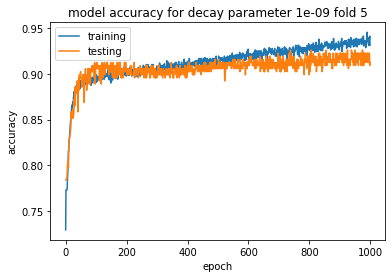

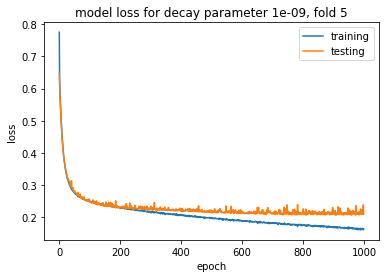

Epoch 1/1000
149/149 - 0s - loss: 0.8104 - accuracy: 0.6608 - val_loss: 0.6646 - val_accuracy: 0.7946
Epoch 2/1000
149/149 - 0s - loss: 0.6813 - accuracy: 0.7708 - val_loss: 0.6358 - val_accuracy: 0.7946
Epoch 3/1000
149/149 - 0s - loss: 0.6517 - accuracy: 0.7708 - val_loss: 0.6040 - val_accuracy: 0.7946
Epoch 4/1000
149/149 - 0s - loss: 0.6235 - accuracy: 0.7708 - val_loss: 0.5812 - val_accuracy: 0.7946
Epoch 5/1000
149/149 - 0s - loss: 0.6006 - accuracy: 0.7708 - val_loss: 0.5612 - val_accuracy: 0.7946
Epoch 6/1000
149/149 - 0s - loss: 0.5790 - accuracy: 0.7708 - val_loss: 0.5441 - val_accuracy: 0.7946
Epoch 7/1000
149/149 - 0s - loss: 0.5593 - accuracy: 0.7708 - val_loss: 0.5269 - val_accuracy: 0.7946
Epoch 8/1000
149/149 - 0s - loss: 0.5404 - accuracy: 0.7733 - val_loss: 0.5080 - val_accuracy: 0.7980
Epoch 9/1000
149/149 - 0s - loss: 0.5228 - accuracy: 0.7750 - val_loss: 0.4922 - val_accuracy: 0.7946
Epoch 10/1000
149/149 - 0s - loss: 0.5053 - accuracy: 0.7842 - val_loss: 0.4775 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2480 - accuracy: 0.9009 - val_loss: 0.2503 - val_accuracy: 0.8923
Epoch 82/1000
149/149 - 0s - loss: 0.2486 - accuracy: 0.8942 - val_loss: 0.2490 - val_accuracy: 0.8990
Epoch 83/1000
149/149 - 0s - loss: 0.2478 - accuracy: 0.8959 - val_loss: 0.2538 - val_accuracy: 0.8923
Epoch 84/1000
149/149 - 0s - loss: 0.2476 - accuracy: 0.8992 - val_loss: 0.2513 - val_accuracy: 0.8956
Epoch 85/1000
149/149 - 0s - loss: 0.2464 - accuracy: 0.8967 - val_loss: 0.2476 - val_accuracy: 0.8990
Epoch 86/1000
149/149 - 0s - loss: 0.2467 - accuracy: 0.9018 - val_loss: 0.2504 - val_accuracy: 0.8923
Epoch 87/1000
149/149 - 0s - loss: 0.2466 - accuracy: 0.8976 - val_loss: 0.2466 - val_accuracy: 0.8990
Epoch 88/1000
149/149 - 0s - loss: 0.2443 - accuracy: 0.9026 - val_loss: 0.2485 - val_accuracy: 0.8956
Epoch 89/1000
149/149 - 0s - loss: 0.2454 - accuracy: 0.8967 - val_loss: 0.2470 - val_accuracy: 0.8956
Epoch 90/1000
149/149 - 0s - loss: 0.2452 - accuracy: 0.8992 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2240 - accuracy: 0.9068 - val_loss: 0.2394 - val_accuracy: 0.9024
Epoch 161/1000
149/149 - 0s - loss: 0.2239 - accuracy: 0.9051 - val_loss: 0.2354 - val_accuracy: 0.9057
Epoch 162/1000
149/149 - 0s - loss: 0.2219 - accuracy: 0.9085 - val_loss: 0.2351 - val_accuracy: 0.8990
Epoch 163/1000
149/149 - 0s - loss: 0.2227 - accuracy: 0.9060 - val_loss: 0.2348 - val_accuracy: 0.9024
Epoch 164/1000
149/149 - 0s - loss: 0.2229 - accuracy: 0.9060 - val_loss: 0.2355 - val_accuracy: 0.8990
Epoch 165/1000
149/149 - 0s - loss: 0.2219 - accuracy: 0.9085 - val_loss: 0.2408 - val_accuracy: 0.8990
Epoch 166/1000
149/149 - 0s - loss: 0.2209 - accuracy: 0.9102 - val_loss: 0.2358 - val_accuracy: 0.9057
Epoch 167/1000
149/149 - 0s - loss: 0.2215 - accuracy: 0.9060 - val_loss: 0.2358 - val_accuracy: 0.9057
Epoch 168/1000
149/149 - 0s - loss: 0.2222 - accuracy: 0.9060 - val_loss: 0.2356 - val_accuracy: 0.9024
Epoch 169/1000
149/149 - 0s - loss: 0.2214 - accuracy: 0.9051 - 

Epoch 239/1000
149/149 - 0s - loss: 0.2081 - accuracy: 0.9102 - val_loss: 0.2325 - val_accuracy: 0.8990
Epoch 240/1000
149/149 - 0s - loss: 0.2071 - accuracy: 0.9144 - val_loss: 0.2413 - val_accuracy: 0.9158
Epoch 241/1000
149/149 - 0s - loss: 0.2094 - accuracy: 0.9144 - val_loss: 0.2307 - val_accuracy: 0.9057
Epoch 242/1000
149/149 - 0s - loss: 0.2078 - accuracy: 0.9093 - val_loss: 0.2359 - val_accuracy: 0.9057
Epoch 243/1000
149/149 - 0s - loss: 0.2094 - accuracy: 0.9093 - val_loss: 0.2300 - val_accuracy: 0.9057
Epoch 244/1000
149/149 - 0s - loss: 0.2095 - accuracy: 0.9085 - val_loss: 0.2328 - val_accuracy: 0.9024
Epoch 245/1000
149/149 - 0s - loss: 0.2070 - accuracy: 0.9110 - val_loss: 0.2336 - val_accuracy: 0.9024
Epoch 246/1000
149/149 - 0s - loss: 0.2087 - accuracy: 0.9169 - val_loss: 0.2341 - val_accuracy: 0.8990
Epoch 247/1000
149/149 - 0s - loss: 0.2060 - accuracy: 0.9135 - val_loss: 0.2298 - val_accuracy: 0.9024
Epoch 248/1000
149/149 - 0s - loss: 0.2078 - accuracy: 0.9135 - 

Epoch 318/1000
149/149 - 0s - loss: 0.1990 - accuracy: 0.9118 - val_loss: 0.2291 - val_accuracy: 0.8923
Epoch 319/1000
149/149 - 0s - loss: 0.1990 - accuracy: 0.9135 - val_loss: 0.2301 - val_accuracy: 0.9057
Epoch 320/1000
149/149 - 0s - loss: 0.1986 - accuracy: 0.9152 - val_loss: 0.2356 - val_accuracy: 0.8956
Epoch 321/1000
149/149 - 0s - loss: 0.1991 - accuracy: 0.9160 - val_loss: 0.2326 - val_accuracy: 0.8923
Epoch 322/1000
149/149 - 0s - loss: 0.1990 - accuracy: 0.9144 - val_loss: 0.2342 - val_accuracy: 0.8956
Epoch 323/1000
149/149 - 0s - loss: 0.1985 - accuracy: 0.9160 - val_loss: 0.2342 - val_accuracy: 0.8923
Epoch 324/1000
149/149 - 0s - loss: 0.1989 - accuracy: 0.9135 - val_loss: 0.2292 - val_accuracy: 0.8956
Epoch 325/1000
149/149 - 0s - loss: 0.1992 - accuracy: 0.9169 - val_loss: 0.2298 - val_accuracy: 0.8923
Epoch 326/1000
149/149 - 0s - loss: 0.1991 - accuracy: 0.9144 - val_loss: 0.2289 - val_accuracy: 0.8923
Epoch 327/1000
149/149 - 0s - loss: 0.1976 - accuracy: 0.9127 - 

Epoch 397/1000
149/149 - 0s - loss: 0.1853 - accuracy: 0.9194 - val_loss: 0.2297 - val_accuracy: 0.8956
Epoch 398/1000
149/149 - 0s - loss: 0.1848 - accuracy: 0.9219 - val_loss: 0.2305 - val_accuracy: 0.8889
Epoch 399/1000
149/149 - 0s - loss: 0.1862 - accuracy: 0.9194 - val_loss: 0.2288 - val_accuracy: 0.8923
Epoch 400/1000
149/149 - 0s - loss: 0.1828 - accuracy: 0.9228 - val_loss: 0.2297 - val_accuracy: 0.8923
Epoch 401/1000
149/149 - 0s - loss: 0.1847 - accuracy: 0.9177 - val_loss: 0.2300 - val_accuracy: 0.8889
Epoch 402/1000
149/149 - 0s - loss: 0.1848 - accuracy: 0.9127 - val_loss: 0.2296 - val_accuracy: 0.8889
Epoch 403/1000
149/149 - 0s - loss: 0.1838 - accuracy: 0.9228 - val_loss: 0.2297 - val_accuracy: 0.8889
Epoch 404/1000
149/149 - 0s - loss: 0.1840 - accuracy: 0.9228 - val_loss: 0.2289 - val_accuracy: 0.8990
Epoch 405/1000
149/149 - 0s - loss: 0.1833 - accuracy: 0.9194 - val_loss: 0.2284 - val_accuracy: 0.9024
Epoch 406/1000
149/149 - 0s - loss: 0.1835 - accuracy: 0.9202 - 

Epoch 476/1000
149/149 - 0s - loss: 0.1745 - accuracy: 0.9236 - val_loss: 0.2310 - val_accuracy: 0.9091
Epoch 477/1000
149/149 - 0s - loss: 0.1746 - accuracy: 0.9211 - val_loss: 0.2347 - val_accuracy: 0.8855
Epoch 478/1000
149/149 - 0s - loss: 0.1747 - accuracy: 0.9211 - val_loss: 0.2298 - val_accuracy: 0.8956
Epoch 479/1000
149/149 - 0s - loss: 0.1748 - accuracy: 0.9270 - val_loss: 0.2304 - val_accuracy: 0.8889
Epoch 480/1000
149/149 - 0s - loss: 0.1734 - accuracy: 0.9244 - val_loss: 0.2299 - val_accuracy: 0.8855
Epoch 481/1000
149/149 - 0s - loss: 0.1718 - accuracy: 0.9244 - val_loss: 0.2370 - val_accuracy: 0.9125
Epoch 482/1000
149/149 - 0s - loss: 0.1748 - accuracy: 0.9202 - val_loss: 0.2299 - val_accuracy: 0.8889
Epoch 483/1000
149/149 - 0s - loss: 0.1729 - accuracy: 0.9244 - val_loss: 0.2285 - val_accuracy: 0.8956
Epoch 484/1000
149/149 - 0s - loss: 0.1731 - accuracy: 0.9211 - val_loss: 0.2302 - val_accuracy: 0.8990
Epoch 485/1000
149/149 - 0s - loss: 0.1746 - accuracy: 0.9211 - 

Epoch 555/1000
149/149 - 0s - loss: 0.1633 - accuracy: 0.9312 - val_loss: 0.2306 - val_accuracy: 0.8956
Epoch 556/1000
149/149 - 0s - loss: 0.1651 - accuracy: 0.9295 - val_loss: 0.2309 - val_accuracy: 0.8923
Epoch 557/1000
149/149 - 0s - loss: 0.1650 - accuracy: 0.9244 - val_loss: 0.2316 - val_accuracy: 0.9057
Epoch 558/1000
149/149 - 0s - loss: 0.1658 - accuracy: 0.9295 - val_loss: 0.2318 - val_accuracy: 0.9024
Epoch 559/1000
149/149 - 0s - loss: 0.1660 - accuracy: 0.9278 - val_loss: 0.2329 - val_accuracy: 0.8923
Epoch 560/1000
149/149 - 0s - loss: 0.1651 - accuracy: 0.9328 - val_loss: 0.2298 - val_accuracy: 0.8956
Epoch 561/1000
149/149 - 0s - loss: 0.1642 - accuracy: 0.9253 - val_loss: 0.2404 - val_accuracy: 0.8855
Epoch 562/1000
149/149 - 0s - loss: 0.1657 - accuracy: 0.9270 - val_loss: 0.2305 - val_accuracy: 0.8956
Epoch 563/1000
149/149 - 0s - loss: 0.1651 - accuracy: 0.9286 - val_loss: 0.2302 - val_accuracy: 0.8923
Epoch 564/1000
149/149 - 0s - loss: 0.1651 - accuracy: 0.9278 - 

Epoch 634/1000
149/149 - 0s - loss: 0.1577 - accuracy: 0.9295 - val_loss: 0.2301 - val_accuracy: 0.9024
Epoch 635/1000
149/149 - 0s - loss: 0.1585 - accuracy: 0.9337 - val_loss: 0.2317 - val_accuracy: 0.8923
Epoch 636/1000
149/149 - 0s - loss: 0.1588 - accuracy: 0.9312 - val_loss: 0.2316 - val_accuracy: 0.8923
Epoch 637/1000
149/149 - 0s - loss: 0.1591 - accuracy: 0.9286 - val_loss: 0.2326 - val_accuracy: 0.8923
Epoch 638/1000
149/149 - 0s - loss: 0.1564 - accuracy: 0.9328 - val_loss: 0.2368 - val_accuracy: 0.9125
Epoch 639/1000
149/149 - 0s - loss: 0.1584 - accuracy: 0.9353 - val_loss: 0.2318 - val_accuracy: 0.9057
Epoch 640/1000
149/149 - 0s - loss: 0.1581 - accuracy: 0.9303 - val_loss: 0.2292 - val_accuracy: 0.9057
Epoch 641/1000
149/149 - 0s - loss: 0.1581 - accuracy: 0.9345 - val_loss: 0.2286 - val_accuracy: 0.9024
Epoch 642/1000
149/149 - 0s - loss: 0.1583 - accuracy: 0.9303 - val_loss: 0.2296 - val_accuracy: 0.8956
Epoch 643/1000
149/149 - 0s - loss: 0.1568 - accuracy: 0.9328 - 

Epoch 713/1000
149/149 - 0s - loss: 0.1520 - accuracy: 0.9353 - val_loss: 0.2311 - val_accuracy: 0.9024
Epoch 714/1000
149/149 - 0s - loss: 0.1522 - accuracy: 0.9353 - val_loss: 0.2295 - val_accuracy: 0.8956
Epoch 715/1000
149/149 - 0s - loss: 0.1524 - accuracy: 0.9337 - val_loss: 0.2301 - val_accuracy: 0.9057
Epoch 716/1000
149/149 - 0s - loss: 0.1523 - accuracy: 0.9320 - val_loss: 0.2307 - val_accuracy: 0.9024
Epoch 717/1000
149/149 - 0s - loss: 0.1482 - accuracy: 0.9362 - val_loss: 0.2420 - val_accuracy: 0.8956
Epoch 718/1000
149/149 - 0s - loss: 0.1533 - accuracy: 0.9337 - val_loss: 0.2303 - val_accuracy: 0.9024
Epoch 719/1000
149/149 - 0s - loss: 0.1500 - accuracy: 0.9395 - val_loss: 0.2331 - val_accuracy: 0.9024
Epoch 720/1000
149/149 - 0s - loss: 0.1528 - accuracy: 0.9345 - val_loss: 0.2315 - val_accuracy: 0.8990
Epoch 721/1000
149/149 - 0s - loss: 0.1512 - accuracy: 0.9345 - val_loss: 0.2295 - val_accuracy: 0.9057
Epoch 722/1000
149/149 - 0s - loss: 0.1514 - accuracy: 0.9370 - 

Epoch 792/1000
149/149 - 0s - loss: 0.1484 - accuracy: 0.9353 - val_loss: 0.2309 - val_accuracy: 0.9091
Epoch 793/1000
149/149 - 0s - loss: 0.1473 - accuracy: 0.9345 - val_loss: 0.2300 - val_accuracy: 0.9125
Epoch 794/1000
149/149 - 0s - loss: 0.1488 - accuracy: 0.9320 - val_loss: 0.2290 - val_accuracy: 0.9024
Epoch 795/1000
149/149 - 0s - loss: 0.1465 - accuracy: 0.9353 - val_loss: 0.2309 - val_accuracy: 0.9091
Epoch 796/1000
149/149 - 0s - loss: 0.1482 - accuracy: 0.9362 - val_loss: 0.2332 - val_accuracy: 0.9024
Epoch 797/1000
149/149 - 0s - loss: 0.1464 - accuracy: 0.9345 - val_loss: 0.2326 - val_accuracy: 0.9091
Epoch 798/1000
149/149 - 0s - loss: 0.1466 - accuracy: 0.9370 - val_loss: 0.2398 - val_accuracy: 0.8990
Epoch 799/1000
149/149 - 0s - loss: 0.1464 - accuracy: 0.9379 - val_loss: 0.2325 - val_accuracy: 0.9125
Epoch 800/1000
149/149 - 0s - loss: 0.1450 - accuracy: 0.9404 - val_loss: 0.2281 - val_accuracy: 0.9125
Epoch 801/1000
149/149 - 0s - loss: 0.1474 - accuracy: 0.9353 - 

Epoch 871/1000
149/149 - 0s - loss: 0.1434 - accuracy: 0.9412 - val_loss: 0.2316 - val_accuracy: 0.9226
Epoch 872/1000
149/149 - 0s - loss: 0.1415 - accuracy: 0.9379 - val_loss: 0.2302 - val_accuracy: 0.9091
Epoch 873/1000
149/149 - 0s - loss: 0.1420 - accuracy: 0.9387 - val_loss: 0.2284 - val_accuracy: 0.9226
Epoch 874/1000
149/149 - 0s - loss: 0.1417 - accuracy: 0.9471 - val_loss: 0.2311 - val_accuracy: 0.9057
Epoch 875/1000
149/149 - 0s - loss: 0.1426 - accuracy: 0.9353 - val_loss: 0.2323 - val_accuracy: 0.9125
Epoch 876/1000
149/149 - 0s - loss: 0.1427 - accuracy: 0.9353 - val_loss: 0.2291 - val_accuracy: 0.9091
Epoch 877/1000
149/149 - 0s - loss: 0.1427 - accuracy: 0.9345 - val_loss: 0.2298 - val_accuracy: 0.9125
Epoch 878/1000
149/149 - 0s - loss: 0.1433 - accuracy: 0.9337 - val_loss: 0.2306 - val_accuracy: 0.9091
Epoch 879/1000
149/149 - 0s - loss: 0.1411 - accuracy: 0.9412 - val_loss: 0.2310 - val_accuracy: 0.9057
Epoch 880/1000
149/149 - 0s - loss: 0.1428 - accuracy: 0.9362 - 

Epoch 950/1000
149/149 - 0s - loss: 0.1373 - accuracy: 0.9437 - val_loss: 0.2345 - val_accuracy: 0.8923
Epoch 951/1000
149/149 - 0s - loss: 0.1380 - accuracy: 0.9412 - val_loss: 0.2254 - val_accuracy: 0.9158
Epoch 952/1000
149/149 - 0s - loss: 0.1380 - accuracy: 0.9362 - val_loss: 0.2304 - val_accuracy: 0.9091
Epoch 953/1000
149/149 - 0s - loss: 0.1391 - accuracy: 0.9421 - val_loss: 0.2272 - val_accuracy: 0.9192
Epoch 954/1000
149/149 - 0s - loss: 0.1363 - accuracy: 0.9421 - val_loss: 0.2263 - val_accuracy: 0.9125
Epoch 955/1000
149/149 - 0s - loss: 0.1397 - accuracy: 0.9387 - val_loss: 0.2257 - val_accuracy: 0.9158
Epoch 956/1000
149/149 - 0s - loss: 0.1347 - accuracy: 0.9412 - val_loss: 0.2266 - val_accuracy: 0.9158
Epoch 957/1000
149/149 - 0s - loss: 0.1363 - accuracy: 0.9353 - val_loss: 0.2279 - val_accuracy: 0.9192
Epoch 958/1000
149/149 - 0s - loss: 0.1363 - accuracy: 0.9429 - val_loss: 0.2265 - val_accuracy: 0.9226
Epoch 959/1000
149/149 - 0s - loss: 0.1379 - accuracy: 0.9404 - 

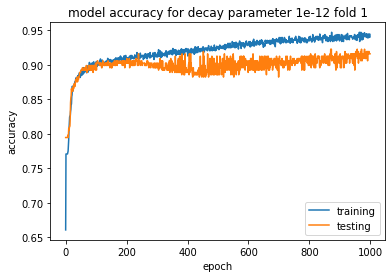

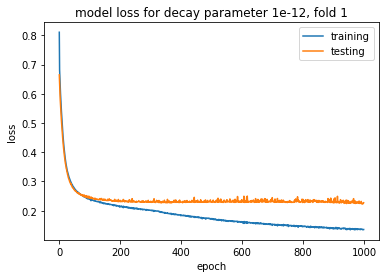

Epoch 1/1000
149/149 - 0s - loss: 0.7499 - accuracy: 0.7708 - val_loss: 0.6940 - val_accuracy: 0.7576
Epoch 2/1000
149/149 - 0s - loss: 0.6468 - accuracy: 0.7800 - val_loss: 0.6678 - val_accuracy: 0.7576
Epoch 3/1000
149/149 - 0s - loss: 0.6261 - accuracy: 0.7800 - val_loss: 0.6466 - val_accuracy: 0.7576
Epoch 4/1000
149/149 - 0s - loss: 0.6074 - accuracy: 0.7800 - val_loss: 0.6243 - val_accuracy: 0.7576
Epoch 5/1000
149/149 - 0s - loss: 0.5876 - accuracy: 0.7800 - val_loss: 0.6008 - val_accuracy: 0.7576
Epoch 6/1000
149/149 - 0s - loss: 0.5665 - accuracy: 0.7800 - val_loss: 0.5768 - val_accuracy: 0.7576
Epoch 7/1000
149/149 - 0s - loss: 0.5469 - accuracy: 0.7800 - val_loss: 0.5550 - val_accuracy: 0.7576
Epoch 8/1000
149/149 - 0s - loss: 0.5290 - accuracy: 0.7809 - val_loss: 0.5341 - val_accuracy: 0.7609
Epoch 9/1000
149/149 - 0s - loss: 0.5121 - accuracy: 0.7842 - val_loss: 0.5143 - val_accuracy: 0.7643
Epoch 10/1000
149/149 - 0s - loss: 0.4955 - accuracy: 0.7918 - val_loss: 0.4962 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2544 - accuracy: 0.8866 - val_loss: 0.2644 - val_accuracy: 0.8990
Epoch 82/1000
149/149 - 0s - loss: 0.2535 - accuracy: 0.8883 - val_loss: 0.2587 - val_accuracy: 0.9057
Epoch 83/1000
149/149 - 0s - loss: 0.2531 - accuracy: 0.8925 - val_loss: 0.2556 - val_accuracy: 0.9091
Epoch 84/1000
149/149 - 0s - loss: 0.2521 - accuracy: 0.8942 - val_loss: 0.2547 - val_accuracy: 0.9024
Epoch 85/1000
149/149 - 0s - loss: 0.2507 - accuracy: 0.8950 - val_loss: 0.2557 - val_accuracy: 0.9125
Epoch 86/1000
149/149 - 0s - loss: 0.2521 - accuracy: 0.8925 - val_loss: 0.2550 - val_accuracy: 0.9091
Epoch 87/1000
149/149 - 0s - loss: 0.2510 - accuracy: 0.8900 - val_loss: 0.2610 - val_accuracy: 0.9125
Epoch 88/1000
149/149 - 0s - loss: 0.2491 - accuracy: 0.9001 - val_loss: 0.2569 - val_accuracy: 0.9125
Epoch 89/1000
149/149 - 0s - loss: 0.2499 - accuracy: 0.8925 - val_loss: 0.2562 - val_accuracy: 0.9125
Epoch 90/1000
149/149 - 0s - loss: 0.2498 - accuracy: 0.8942 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2303 - accuracy: 0.8984 - val_loss: 0.2529 - val_accuracy: 0.8990
Epoch 161/1000
149/149 - 0s - loss: 0.2295 - accuracy: 0.9018 - val_loss: 0.2659 - val_accuracy: 0.9024
Epoch 162/1000
149/149 - 0s - loss: 0.2291 - accuracy: 0.8934 - val_loss: 0.2544 - val_accuracy: 0.9125
Epoch 163/1000
149/149 - 0s - loss: 0.2284 - accuracy: 0.9018 - val_loss: 0.2568 - val_accuracy: 0.9091
Epoch 164/1000
149/149 - 0s - loss: 0.2300 - accuracy: 0.8967 - val_loss: 0.2562 - val_accuracy: 0.9057
Epoch 165/1000
149/149 - 0s - loss: 0.2280 - accuracy: 0.9018 - val_loss: 0.2576 - val_accuracy: 0.9024
Epoch 166/1000
149/149 - 0s - loss: 0.2265 - accuracy: 0.8992 - val_loss: 0.2585 - val_accuracy: 0.8956
Epoch 167/1000
149/149 - 0s - loss: 0.2275 - accuracy: 0.9060 - val_loss: 0.2583 - val_accuracy: 0.9024
Epoch 168/1000
149/149 - 0s - loss: 0.2280 - accuracy: 0.9018 - val_loss: 0.2517 - val_accuracy: 0.9057
Epoch 169/1000
149/149 - 0s - loss: 0.2280 - accuracy: 0.8992 - 

Epoch 239/1000
149/149 - 0s - loss: 0.2156 - accuracy: 0.9026 - val_loss: 0.2532 - val_accuracy: 0.9024
Epoch 240/1000
149/149 - 0s - loss: 0.2156 - accuracy: 0.9076 - val_loss: 0.2677 - val_accuracy: 0.8956
Epoch 241/1000
149/149 - 0s - loss: 0.2174 - accuracy: 0.9060 - val_loss: 0.2574 - val_accuracy: 0.8956
Epoch 242/1000
149/149 - 0s - loss: 0.2153 - accuracy: 0.9026 - val_loss: 0.2497 - val_accuracy: 0.9024
Epoch 243/1000
149/149 - 0s - loss: 0.2166 - accuracy: 0.9001 - val_loss: 0.2553 - val_accuracy: 0.8990
Epoch 244/1000
149/149 - 0s - loss: 0.2171 - accuracy: 0.9001 - val_loss: 0.2552 - val_accuracy: 0.8956
Epoch 245/1000
149/149 - 0s - loss: 0.2146 - accuracy: 0.9060 - val_loss: 0.2520 - val_accuracy: 0.8990
Epoch 246/1000
149/149 - 0s - loss: 0.2164 - accuracy: 0.9051 - val_loss: 0.2554 - val_accuracy: 0.8990
Epoch 247/1000
149/149 - 0s - loss: 0.2138 - accuracy: 0.9009 - val_loss: 0.2668 - val_accuracy: 0.8956
Epoch 248/1000
149/149 - 0s - loss: 0.2147 - accuracy: 0.9110 - 

Epoch 318/1000
149/149 - 0s - loss: 0.2072 - accuracy: 0.9051 - val_loss: 0.2614 - val_accuracy: 0.8956
Epoch 319/1000
149/149 - 0s - loss: 0.2077 - accuracy: 0.9085 - val_loss: 0.2538 - val_accuracy: 0.8923
Epoch 320/1000
149/149 - 0s - loss: 0.2074 - accuracy: 0.9076 - val_loss: 0.2545 - val_accuracy: 0.8923
Epoch 321/1000
149/149 - 0s - loss: 0.2069 - accuracy: 0.9076 - val_loss: 0.2482 - val_accuracy: 0.8956
Epoch 322/1000
149/149 - 0s - loss: 0.2089 - accuracy: 0.9068 - val_loss: 0.2522 - val_accuracy: 0.8956
Epoch 323/1000
149/149 - 0s - loss: 0.2074 - accuracy: 0.9093 - val_loss: 0.2554 - val_accuracy: 0.8990
Epoch 324/1000
149/149 - 0s - loss: 0.2066 - accuracy: 0.9060 - val_loss: 0.2546 - val_accuracy: 0.8956
Epoch 325/1000
149/149 - 0s - loss: 0.2076 - accuracy: 0.9043 - val_loss: 0.2546 - val_accuracy: 0.9024
Epoch 326/1000
149/149 - 0s - loss: 0.2077 - accuracy: 0.9026 - val_loss: 0.2502 - val_accuracy: 0.8956
Epoch 327/1000
149/149 - 0s - loss: 0.2060 - accuracy: 0.9051 - 

Epoch 397/1000
149/149 - 0s - loss: 0.1993 - accuracy: 0.9093 - val_loss: 0.2490 - val_accuracy: 0.8956
Epoch 398/1000
149/149 - 0s - loss: 0.1991 - accuracy: 0.9093 - val_loss: 0.2443 - val_accuracy: 0.9057
Epoch 399/1000
149/149 - 0s - loss: 0.2007 - accuracy: 0.9043 - val_loss: 0.2514 - val_accuracy: 0.8923
Epoch 400/1000
149/149 - 0s - loss: 0.1973 - accuracy: 0.9102 - val_loss: 0.2502 - val_accuracy: 0.8990
Epoch 401/1000
149/149 - 0s - loss: 0.1975 - accuracy: 0.9102 - val_loss: 0.2614 - val_accuracy: 0.8889
Epoch 402/1000
149/149 - 0s - loss: 0.1988 - accuracy: 0.9068 - val_loss: 0.2518 - val_accuracy: 0.9024
Epoch 403/1000
149/149 - 0s - loss: 0.1980 - accuracy: 0.9118 - val_loss: 0.2527 - val_accuracy: 0.8956
Epoch 404/1000
149/149 - 0s - loss: 0.1974 - accuracy: 0.9085 - val_loss: 0.2674 - val_accuracy: 0.8956
Epoch 405/1000
149/149 - 0s - loss: 0.1978 - accuracy: 0.9076 - val_loss: 0.2612 - val_accuracy: 0.8956
Epoch 406/1000
149/149 - 0s - loss: 0.1988 - accuracy: 0.9060 - 

Epoch 476/1000
149/149 - 0s - loss: 0.1923 - accuracy: 0.9152 - val_loss: 0.2478 - val_accuracy: 0.8990
Epoch 477/1000
149/149 - 0s - loss: 0.1898 - accuracy: 0.9127 - val_loss: 0.2377 - val_accuracy: 0.8990
Epoch 478/1000
149/149 - 0s - loss: 0.1919 - accuracy: 0.9169 - val_loss: 0.2496 - val_accuracy: 0.8956
Epoch 479/1000
149/149 - 0s - loss: 0.1913 - accuracy: 0.9110 - val_loss: 0.2408 - val_accuracy: 0.8990
Epoch 480/1000
149/149 - 0s - loss: 0.1897 - accuracy: 0.9152 - val_loss: 0.2652 - val_accuracy: 0.8956
Epoch 481/1000
149/149 - 0s - loss: 0.1912 - accuracy: 0.9102 - val_loss: 0.2415 - val_accuracy: 0.8990
Epoch 482/1000
149/149 - 0s - loss: 0.1892 - accuracy: 0.9043 - val_loss: 0.2604 - val_accuracy: 0.8889
Epoch 483/1000
149/149 - 0s - loss: 0.1905 - accuracy: 0.9144 - val_loss: 0.2476 - val_accuracy: 0.8990
Epoch 484/1000
149/149 - 0s - loss: 0.1912 - accuracy: 0.9085 - val_loss: 0.2393 - val_accuracy: 0.8956
Epoch 485/1000
149/149 - 0s - loss: 0.1917 - accuracy: 0.9118 - 

Epoch 555/1000
149/149 - 0s - loss: 0.1853 - accuracy: 0.9160 - val_loss: 0.2378 - val_accuracy: 0.9057
Epoch 556/1000
149/149 - 0s - loss: 0.1856 - accuracy: 0.9085 - val_loss: 0.2475 - val_accuracy: 0.9024
Epoch 557/1000
149/149 - 0s - loss: 0.1861 - accuracy: 0.9102 - val_loss: 0.2471 - val_accuracy: 0.8956
Epoch 558/1000
149/149 - 0s - loss: 0.1861 - accuracy: 0.9102 - val_loss: 0.2379 - val_accuracy: 0.9024
Epoch 559/1000
149/149 - 0s - loss: 0.1846 - accuracy: 0.9110 - val_loss: 0.2474 - val_accuracy: 0.8990
Epoch 560/1000
149/149 - 0s - loss: 0.1833 - accuracy: 0.9160 - val_loss: 0.2528 - val_accuracy: 0.8956
Epoch 561/1000
149/149 - 0s - loss: 0.1851 - accuracy: 0.9127 - val_loss: 0.2495 - val_accuracy: 0.8956
Epoch 562/1000
149/149 - 0s - loss: 0.1839 - accuracy: 0.9144 - val_loss: 0.2329 - val_accuracy: 0.9125
Epoch 563/1000
149/149 - 0s - loss: 0.1844 - accuracy: 0.9144 - val_loss: 0.2350 - val_accuracy: 0.8956
Epoch 564/1000
149/149 - 0s - loss: 0.1858 - accuracy: 0.9169 - 

Epoch 634/1000
149/149 - 0s - loss: 0.1786 - accuracy: 0.9186 - val_loss: 0.2379 - val_accuracy: 0.9024
Epoch 635/1000
149/149 - 0s - loss: 0.1783 - accuracy: 0.9194 - val_loss: 0.2373 - val_accuracy: 0.9057
Epoch 636/1000
149/149 - 0s - loss: 0.1783 - accuracy: 0.9135 - val_loss: 0.2304 - val_accuracy: 0.9057
Epoch 637/1000
149/149 - 0s - loss: 0.1791 - accuracy: 0.9160 - val_loss: 0.2309 - val_accuracy: 0.9158
Epoch 638/1000
149/149 - 0s - loss: 0.1774 - accuracy: 0.9228 - val_loss: 0.2397 - val_accuracy: 0.9057
Epoch 639/1000
149/149 - 0s - loss: 0.1798 - accuracy: 0.9244 - val_loss: 0.2311 - val_accuracy: 0.9024
Epoch 640/1000
149/149 - 0s - loss: 0.1776 - accuracy: 0.9186 - val_loss: 0.2376 - val_accuracy: 0.9057
Epoch 641/1000
149/149 - 0s - loss: 0.1774 - accuracy: 0.9177 - val_loss: 0.2352 - val_accuracy: 0.9024
Epoch 642/1000
149/149 - 0s - loss: 0.1784 - accuracy: 0.9211 - val_loss: 0.2404 - val_accuracy: 0.9057
Epoch 643/1000
149/149 - 0s - loss: 0.1768 - accuracy: 0.9186 - 

Epoch 713/1000
149/149 - 0s - loss: 0.1730 - accuracy: 0.9228 - val_loss: 0.2352 - val_accuracy: 0.9091
Epoch 714/1000
149/149 - 0s - loss: 0.1738 - accuracy: 0.9211 - val_loss: 0.2388 - val_accuracy: 0.9091
Epoch 715/1000
149/149 - 0s - loss: 0.1739 - accuracy: 0.9177 - val_loss: 0.2394 - val_accuracy: 0.9091
Epoch 716/1000
149/149 - 0s - loss: 0.1728 - accuracy: 0.9244 - val_loss: 0.2360 - val_accuracy: 0.9125
Epoch 717/1000
149/149 - 0s - loss: 0.1746 - accuracy: 0.9194 - val_loss: 0.2303 - val_accuracy: 0.9125
Epoch 718/1000
149/149 - 0s - loss: 0.1742 - accuracy: 0.9194 - val_loss: 0.2319 - val_accuracy: 0.9125
Epoch 719/1000
149/149 - 0s - loss: 0.1725 - accuracy: 0.9186 - val_loss: 0.2360 - val_accuracy: 0.9057
Epoch 720/1000
149/149 - 0s - loss: 0.1739 - accuracy: 0.9144 - val_loss: 0.2430 - val_accuracy: 0.9057
Epoch 721/1000
149/149 - 0s - loss: 0.1733 - accuracy: 0.9211 - val_loss: 0.2410 - val_accuracy: 0.9091
Epoch 722/1000
149/149 - 0s - loss: 0.1740 - accuracy: 0.9160 - 

Epoch 792/1000
149/149 - 0s - loss: 0.1702 - accuracy: 0.9228 - val_loss: 0.2276 - val_accuracy: 0.9091
Epoch 793/1000
149/149 - 0s - loss: 0.1678 - accuracy: 0.9261 - val_loss: 0.2317 - val_accuracy: 0.9091
Epoch 794/1000
149/149 - 0s - loss: 0.1705 - accuracy: 0.9202 - val_loss: 0.2365 - val_accuracy: 0.9125
Epoch 795/1000
149/149 - 0s - loss: 0.1678 - accuracy: 0.9194 - val_loss: 0.2415 - val_accuracy: 0.9024
Epoch 796/1000
149/149 - 0s - loss: 0.1686 - accuracy: 0.9244 - val_loss: 0.2314 - val_accuracy: 0.9158
Epoch 797/1000
149/149 - 0s - loss: 0.1675 - accuracy: 0.9303 - val_loss: 0.2426 - val_accuracy: 0.9057
Epoch 798/1000
149/149 - 0s - loss: 0.1684 - accuracy: 0.9261 - val_loss: 0.2474 - val_accuracy: 0.9024
Epoch 799/1000
149/149 - 0s - loss: 0.1673 - accuracy: 0.9228 - val_loss: 0.2211 - val_accuracy: 0.9192
Epoch 800/1000
149/149 - 0s - loss: 0.1683 - accuracy: 0.9236 - val_loss: 0.2388 - val_accuracy: 0.9091
Epoch 801/1000
149/149 - 0s - loss: 0.1685 - accuracy: 0.9270 - 

Epoch 871/1000
149/149 - 0s - loss: 0.1638 - accuracy: 0.9286 - val_loss: 0.2210 - val_accuracy: 0.9192
Epoch 872/1000
149/149 - 0s - loss: 0.1652 - accuracy: 0.9303 - val_loss: 0.2276 - val_accuracy: 0.9192
Epoch 873/1000
149/149 - 0s - loss: 0.1633 - accuracy: 0.9278 - val_loss: 0.2304 - val_accuracy: 0.9125
Epoch 874/1000
149/149 - 0s - loss: 0.1656 - accuracy: 0.9253 - val_loss: 0.2252 - val_accuracy: 0.9158
Epoch 875/1000
149/149 - 0s - loss: 0.1635 - accuracy: 0.9261 - val_loss: 0.2321 - val_accuracy: 0.9158
Epoch 876/1000
149/149 - 0s - loss: 0.1629 - accuracy: 0.9295 - val_loss: 0.2330 - val_accuracy: 0.9057
Epoch 877/1000
149/149 - 0s - loss: 0.1655 - accuracy: 0.9278 - val_loss: 0.2288 - val_accuracy: 0.9091
Epoch 878/1000
149/149 - 0s - loss: 0.1649 - accuracy: 0.9270 - val_loss: 0.2225 - val_accuracy: 0.9192
Epoch 879/1000
149/149 - 0s - loss: 0.1655 - accuracy: 0.9194 - val_loss: 0.2227 - val_accuracy: 0.9192
Epoch 880/1000
149/149 - 0s - loss: 0.1655 - accuracy: 0.9312 - 

Epoch 950/1000
149/149 - 0s - loss: 0.1609 - accuracy: 0.9228 - val_loss: 0.2349 - val_accuracy: 0.9125
Epoch 951/1000
149/149 - 0s - loss: 0.1613 - accuracy: 0.9328 - val_loss: 0.2449 - val_accuracy: 0.9091
Epoch 952/1000
149/149 - 0s - loss: 0.1600 - accuracy: 0.9253 - val_loss: 0.2403 - val_accuracy: 0.9057
Epoch 953/1000
149/149 - 0s - loss: 0.1611 - accuracy: 0.9244 - val_loss: 0.2424 - val_accuracy: 0.9091
Epoch 954/1000
149/149 - 0s - loss: 0.1590 - accuracy: 0.9312 - val_loss: 0.2267 - val_accuracy: 0.9192
Epoch 955/1000
149/149 - 0s - loss: 0.1607 - accuracy: 0.9320 - val_loss: 0.2393 - val_accuracy: 0.9091
Epoch 956/1000
149/149 - 0s - loss: 0.1582 - accuracy: 0.9312 - val_loss: 0.2604 - val_accuracy: 0.9125
Epoch 957/1000
149/149 - 0s - loss: 0.1603 - accuracy: 0.9320 - val_loss: 0.2247 - val_accuracy: 0.9091
Epoch 958/1000
149/149 - 0s - loss: 0.1604 - accuracy: 0.9320 - val_loss: 0.2298 - val_accuracy: 0.9158
Epoch 959/1000
149/149 - 0s - loss: 0.1603 - accuracy: 0.9295 - 

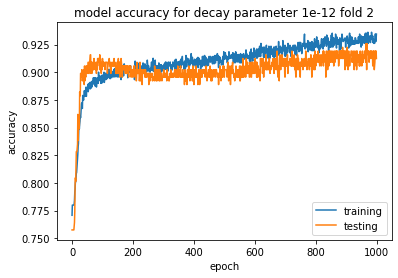

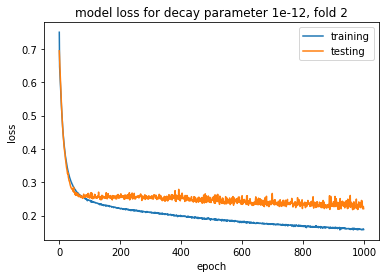

Epoch 1/1000
149/149 - 0s - loss: 0.7683 - accuracy: 0.7674 - val_loss: 0.6349 - val_accuracy: 0.7980
Epoch 2/1000
149/149 - 0s - loss: 0.6507 - accuracy: 0.7699 - val_loss: 0.5980 - val_accuracy: 0.7980
Epoch 3/1000
149/149 - 0s - loss: 0.6195 - accuracy: 0.7699 - val_loss: 0.5692 - val_accuracy: 0.7980
Epoch 4/1000
149/149 - 0s - loss: 0.5906 - accuracy: 0.7699 - val_loss: 0.5458 - val_accuracy: 0.7980
Epoch 5/1000
149/149 - 0s - loss: 0.5633 - accuracy: 0.7699 - val_loss: 0.5169 - val_accuracy: 0.7980
Epoch 6/1000
149/149 - 0s - loss: 0.5376 - accuracy: 0.7699 - val_loss: 0.4973 - val_accuracy: 0.8081
Epoch 7/1000
149/149 - 0s - loss: 0.5136 - accuracy: 0.7683 - val_loss: 0.4745 - val_accuracy: 0.8114
Epoch 8/1000
149/149 - 0s - loss: 0.4912 - accuracy: 0.7809 - val_loss: 0.4523 - val_accuracy: 0.8215
Epoch 9/1000
149/149 - 0s - loss: 0.4710 - accuracy: 0.7926 - val_loss: 0.4376 - val_accuracy: 0.8350
Epoch 10/1000
149/149 - 0s - loss: 0.4527 - accuracy: 0.8060 - val_loss: 0.4193 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2570 - accuracy: 0.8934 - val_loss: 0.2664 - val_accuracy: 0.8822
Epoch 82/1000
149/149 - 0s - loss: 0.2570 - accuracy: 0.8908 - val_loss: 0.2630 - val_accuracy: 0.8822
Epoch 83/1000
149/149 - 0s - loss: 0.2569 - accuracy: 0.8892 - val_loss: 0.2511 - val_accuracy: 0.8754
Epoch 84/1000
149/149 - 0s - loss: 0.2549 - accuracy: 0.8976 - val_loss: 0.2555 - val_accuracy: 0.8788
Epoch 85/1000
149/149 - 0s - loss: 0.2549 - accuracy: 0.8950 - val_loss: 0.2562 - val_accuracy: 0.8788
Epoch 86/1000
149/149 - 0s - loss: 0.2548 - accuracy: 0.8934 - val_loss: 0.2535 - val_accuracy: 0.8822
Epoch 87/1000
149/149 - 0s - loss: 0.2546 - accuracy: 0.8908 - val_loss: 0.2505 - val_accuracy: 0.8788
Epoch 88/1000
149/149 - 0s - loss: 0.2527 - accuracy: 0.9018 - val_loss: 0.2474 - val_accuracy: 0.8956
Epoch 89/1000
149/149 - 0s - loss: 0.2538 - accuracy: 0.8942 - val_loss: 0.2479 - val_accuracy: 0.8754
Epoch 90/1000
149/149 - 0s - loss: 0.2539 - accuracy: 0.8925 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2370 - accuracy: 0.9009 - val_loss: 0.2338 - val_accuracy: 0.8956
Epoch 161/1000
149/149 - 0s - loss: 0.2355 - accuracy: 0.9060 - val_loss: 0.2542 - val_accuracy: 0.8923
Epoch 162/1000
149/149 - 0s - loss: 0.2372 - accuracy: 0.9026 - val_loss: 0.2339 - val_accuracy: 0.8990
Epoch 163/1000
149/149 - 0s - loss: 0.2346 - accuracy: 0.9034 - val_loss: 0.2488 - val_accuracy: 0.8956
Epoch 164/1000
149/149 - 0s - loss: 0.2362 - accuracy: 0.9026 - val_loss: 0.2346 - val_accuracy: 0.8889
Epoch 165/1000
149/149 - 0s - loss: 0.2340 - accuracy: 0.8984 - val_loss: 0.2318 - val_accuracy: 0.8923
Epoch 166/1000
149/149 - 0s - loss: 0.2327 - accuracy: 0.9043 - val_loss: 0.2288 - val_accuracy: 0.8889
Epoch 167/1000
149/149 - 0s - loss: 0.2358 - accuracy: 0.9001 - val_loss: 0.2354 - val_accuracy: 0.8990
Epoch 168/1000
149/149 - 0s - loss: 0.2355 - accuracy: 0.9018 - val_loss: 0.2343 - val_accuracy: 0.8990
Epoch 169/1000
149/149 - 0s - loss: 0.2348 - accuracy: 0.9018 - 

Epoch 239/1000
149/149 - 0s - loss: 0.2223 - accuracy: 0.9009 - val_loss: 0.2359 - val_accuracy: 0.9057
Epoch 240/1000
149/149 - 0s - loss: 0.2244 - accuracy: 0.9060 - val_loss: 0.2382 - val_accuracy: 0.9024
Epoch 241/1000
149/149 - 0s - loss: 0.2246 - accuracy: 0.9018 - val_loss: 0.2300 - val_accuracy: 0.9091
Epoch 242/1000
149/149 - 0s - loss: 0.2233 - accuracy: 0.9043 - val_loss: 0.2210 - val_accuracy: 0.8956
Epoch 243/1000
149/149 - 0s - loss: 0.2237 - accuracy: 0.9018 - val_loss: 0.2283 - val_accuracy: 0.9024
Epoch 244/1000
149/149 - 0s - loss: 0.2245 - accuracy: 0.9026 - val_loss: 0.2266 - val_accuracy: 0.9024
Epoch 245/1000
149/149 - 0s - loss: 0.2231 - accuracy: 0.9068 - val_loss: 0.2263 - val_accuracy: 0.9024
Epoch 246/1000
149/149 - 0s - loss: 0.2234 - accuracy: 0.9051 - val_loss: 0.2248 - val_accuracy: 0.9024
Epoch 247/1000
149/149 - 0s - loss: 0.2208 - accuracy: 0.9068 - val_loss: 0.2313 - val_accuracy: 0.9057
Epoch 248/1000
149/149 - 0s - loss: 0.2224 - accuracy: 0.9034 - 

Epoch 318/1000
149/149 - 0s - loss: 0.2141 - accuracy: 0.9043 - val_loss: 0.2152 - val_accuracy: 0.9057
Epoch 319/1000
149/149 - 0s - loss: 0.2148 - accuracy: 0.9076 - val_loss: 0.2223 - val_accuracy: 0.9057
Epoch 320/1000
149/149 - 0s - loss: 0.2140 - accuracy: 0.9060 - val_loss: 0.2173 - val_accuracy: 0.9024
Epoch 321/1000
149/149 - 0s - loss: 0.2142 - accuracy: 0.9026 - val_loss: 0.2255 - val_accuracy: 0.9091
Epoch 322/1000
149/149 - 0s - loss: 0.2142 - accuracy: 0.9076 - val_loss: 0.2186 - val_accuracy: 0.9057
Epoch 323/1000
149/149 - 0s - loss: 0.2140 - accuracy: 0.9043 - val_loss: 0.2176 - val_accuracy: 0.9091
Epoch 324/1000
149/149 - 0s - loss: 0.2135 - accuracy: 0.9043 - val_loss: 0.2271 - val_accuracy: 0.9125
Epoch 325/1000
149/149 - 0s - loss: 0.2134 - accuracy: 0.9076 - val_loss: 0.2210 - val_accuracy: 0.9158
Epoch 326/1000
149/149 - 0s - loss: 0.2143 - accuracy: 0.9034 - val_loss: 0.2185 - val_accuracy: 0.9057
Epoch 327/1000
149/149 - 0s - loss: 0.2128 - accuracy: 0.9018 - 

Epoch 397/1000
149/149 - 0s - loss: 0.2050 - accuracy: 0.9102 - val_loss: 0.2299 - val_accuracy: 0.9158
Epoch 398/1000
149/149 - 0s - loss: 0.2061 - accuracy: 0.9076 - val_loss: 0.2147 - val_accuracy: 0.9158
Epoch 399/1000
149/149 - 0s - loss: 0.2051 - accuracy: 0.9093 - val_loss: 0.2164 - val_accuracy: 0.9125
Epoch 400/1000
149/149 - 0s - loss: 0.2047 - accuracy: 0.9110 - val_loss: 0.2126 - val_accuracy: 0.9125
Epoch 401/1000
149/149 - 0s - loss: 0.2043 - accuracy: 0.9076 - val_loss: 0.2105 - val_accuracy: 0.9125
Epoch 402/1000
149/149 - 0s - loss: 0.2044 - accuracy: 0.9051 - val_loss: 0.2189 - val_accuracy: 0.9125
Epoch 403/1000
149/149 - 0s - loss: 0.2052 - accuracy: 0.9076 - val_loss: 0.2127 - val_accuracy: 0.9125
Epoch 404/1000
149/149 - 0s - loss: 0.2044 - accuracy: 0.9076 - val_loss: 0.2291 - val_accuracy: 0.9158
Epoch 405/1000
149/149 - 0s - loss: 0.2020 - accuracy: 0.9085 - val_loss: 0.2241 - val_accuracy: 0.9158
Epoch 406/1000
149/149 - 0s - loss: 0.2051 - accuracy: 0.9068 - 

Epoch 476/1000
149/149 - 0s - loss: 0.1980 - accuracy: 0.9102 - val_loss: 0.2162 - val_accuracy: 0.9192
Epoch 477/1000
149/149 - 0s - loss: 0.1961 - accuracy: 0.9110 - val_loss: 0.2181 - val_accuracy: 0.9226
Epoch 478/1000
149/149 - 0s - loss: 0.1975 - accuracy: 0.9118 - val_loss: 0.2151 - val_accuracy: 0.9192
Epoch 479/1000
149/149 - 0s - loss: 0.1974 - accuracy: 0.9110 - val_loss: 0.2143 - val_accuracy: 0.9125
Epoch 480/1000
149/149 - 0s - loss: 0.1962 - accuracy: 0.9068 - val_loss: 0.2295 - val_accuracy: 0.9024
Epoch 481/1000
149/149 - 0s - loss: 0.1976 - accuracy: 0.9060 - val_loss: 0.2192 - val_accuracy: 0.9158
Epoch 482/1000
149/149 - 0s - loss: 0.1931 - accuracy: 0.9135 - val_loss: 0.2053 - val_accuracy: 0.9125
Epoch 483/1000
149/149 - 0s - loss: 0.1981 - accuracy: 0.9102 - val_loss: 0.2183 - val_accuracy: 0.9192
Epoch 484/1000
149/149 - 0s - loss: 0.1967 - accuracy: 0.9068 - val_loss: 0.2184 - val_accuracy: 0.9158
Epoch 485/1000
149/149 - 0s - loss: 0.1963 - accuracy: 0.9093 - 

Epoch 555/1000
149/149 - 0s - loss: 0.1895 - accuracy: 0.9076 - val_loss: 0.2082 - val_accuracy: 0.9158
Epoch 556/1000
149/149 - 0s - loss: 0.1906 - accuracy: 0.9110 - val_loss: 0.2178 - val_accuracy: 0.9158
Epoch 557/1000
149/149 - 0s - loss: 0.1914 - accuracy: 0.9160 - val_loss: 0.2133 - val_accuracy: 0.9158
Epoch 558/1000
149/149 - 0s - loss: 0.1906 - accuracy: 0.9118 - val_loss: 0.2362 - val_accuracy: 0.9057
Epoch 559/1000
149/149 - 0s - loss: 0.1907 - accuracy: 0.9085 - val_loss: 0.2037 - val_accuracy: 0.9226
Epoch 560/1000
149/149 - 0s - loss: 0.1882 - accuracy: 0.9152 - val_loss: 0.2201 - val_accuracy: 0.9125
Epoch 561/1000
149/149 - 0s - loss: 0.1907 - accuracy: 0.9135 - val_loss: 0.2091 - val_accuracy: 0.9158
Epoch 562/1000
149/149 - 0s - loss: 0.1901 - accuracy: 0.9093 - val_loss: 0.2124 - val_accuracy: 0.9192
Epoch 563/1000
149/149 - 0s - loss: 0.1893 - accuracy: 0.9169 - val_loss: 0.2114 - val_accuracy: 0.9158
Epoch 564/1000
149/149 - 0s - loss: 0.1914 - accuracy: 0.9110 - 

Epoch 634/1000
149/149 - 0s - loss: 0.1846 - accuracy: 0.9093 - val_loss: 0.2059 - val_accuracy: 0.9192
Epoch 635/1000
149/149 - 0s - loss: 0.1849 - accuracy: 0.9135 - val_loss: 0.2031 - val_accuracy: 0.9226
Epoch 636/1000
149/149 - 0s - loss: 0.1840 - accuracy: 0.9102 - val_loss: 0.2056 - val_accuracy: 0.9226
Epoch 637/1000
149/149 - 0s - loss: 0.1841 - accuracy: 0.9093 - val_loss: 0.2040 - val_accuracy: 0.9293
Epoch 638/1000
149/149 - 0s - loss: 0.1816 - accuracy: 0.9202 - val_loss: 0.2321 - val_accuracy: 0.9024
Epoch 639/1000
149/149 - 0s - loss: 0.1864 - accuracy: 0.9144 - val_loss: 0.2079 - val_accuracy: 0.9192
Epoch 640/1000
149/149 - 0s - loss: 0.1847 - accuracy: 0.9152 - val_loss: 0.2098 - val_accuracy: 0.9226
Epoch 641/1000
149/149 - 0s - loss: 0.1856 - accuracy: 0.9135 - val_loss: 0.2154 - val_accuracy: 0.9125
Epoch 642/1000
149/149 - 0s - loss: 0.1857 - accuracy: 0.9144 - val_loss: 0.2031 - val_accuracy: 0.9226
Epoch 643/1000
149/149 - 0s - loss: 0.1832 - accuracy: 0.9202 - 

Epoch 713/1000
149/149 - 0s - loss: 0.1792 - accuracy: 0.9228 - val_loss: 0.2033 - val_accuracy: 0.9259
Epoch 714/1000
149/149 - 0s - loss: 0.1788 - accuracy: 0.9202 - val_loss: 0.1996 - val_accuracy: 0.9226
Epoch 715/1000
149/149 - 0s - loss: 0.1795 - accuracy: 0.9194 - val_loss: 0.2059 - val_accuracy: 0.9125
Epoch 716/1000
149/149 - 0s - loss: 0.1786 - accuracy: 0.9202 - val_loss: 0.1983 - val_accuracy: 0.9226
Epoch 717/1000
149/149 - 0s - loss: 0.1785 - accuracy: 0.9253 - val_loss: 0.2068 - val_accuracy: 0.9226
Epoch 718/1000
149/149 - 0s - loss: 0.1781 - accuracy: 0.9202 - val_loss: 0.2000 - val_accuracy: 0.9192
Epoch 719/1000
149/149 - 0s - loss: 0.1761 - accuracy: 0.9211 - val_loss: 0.2008 - val_accuracy: 0.9293
Epoch 720/1000
149/149 - 0s - loss: 0.1800 - accuracy: 0.9160 - val_loss: 0.1987 - val_accuracy: 0.9226
Epoch 721/1000
149/149 - 0s - loss: 0.1774 - accuracy: 0.9177 - val_loss: 0.2063 - val_accuracy: 0.9158
Epoch 722/1000
149/149 - 0s - loss: 0.1784 - accuracy: 0.9228 - 

Epoch 792/1000
149/149 - 0s - loss: 0.1744 - accuracy: 0.9253 - val_loss: 0.2030 - val_accuracy: 0.9226
Epoch 793/1000
149/149 - 0s - loss: 0.1725 - accuracy: 0.9261 - val_loss: 0.2065 - val_accuracy: 0.9158
Epoch 794/1000
149/149 - 0s - loss: 0.1749 - accuracy: 0.9236 - val_loss: 0.2002 - val_accuracy: 0.9226
Epoch 795/1000
149/149 - 0s - loss: 0.1723 - accuracy: 0.9278 - val_loss: 0.1963 - val_accuracy: 0.9259
Epoch 796/1000
149/149 - 0s - loss: 0.1736 - accuracy: 0.9186 - val_loss: 0.2019 - val_accuracy: 0.9226
Epoch 797/1000
149/149 - 0s - loss: 0.1728 - accuracy: 0.9244 - val_loss: 0.1973 - val_accuracy: 0.9226
Epoch 798/1000
149/149 - 0s - loss: 0.1727 - accuracy: 0.9202 - val_loss: 0.2104 - val_accuracy: 0.9091
Epoch 799/1000
149/149 - 0s - loss: 0.1733 - accuracy: 0.9236 - val_loss: 0.2144 - val_accuracy: 0.9091
Epoch 800/1000
149/149 - 0s - loss: 0.1743 - accuracy: 0.9219 - val_loss: 0.2006 - val_accuracy: 0.9259
Epoch 801/1000
149/149 - 0s - loss: 0.1740 - accuracy: 0.9228 - 

Epoch 871/1000
149/149 - 0s - loss: 0.1689 - accuracy: 0.9211 - val_loss: 0.1989 - val_accuracy: 0.9226
Epoch 872/1000
149/149 - 0s - loss: 0.1693 - accuracy: 0.9270 - val_loss: 0.2019 - val_accuracy: 0.9226
Epoch 873/1000
149/149 - 0s - loss: 0.1686 - accuracy: 0.9228 - val_loss: 0.2005 - val_accuracy: 0.9226
Epoch 874/1000
149/149 - 0s - loss: 0.1679 - accuracy: 0.9286 - val_loss: 0.2161 - val_accuracy: 0.9091
Epoch 875/1000
149/149 - 0s - loss: 0.1692 - accuracy: 0.9236 - val_loss: 0.2378 - val_accuracy: 0.8990
Epoch 876/1000
149/149 - 0s - loss: 0.1688 - accuracy: 0.9253 - val_loss: 0.2103 - val_accuracy: 0.9091
Epoch 877/1000
149/149 - 0s - loss: 0.1688 - accuracy: 0.9211 - val_loss: 0.2173 - val_accuracy: 0.9125
Epoch 878/1000
149/149 - 0s - loss: 0.1694 - accuracy: 0.9286 - val_loss: 0.2100 - val_accuracy: 0.9125
Epoch 879/1000
149/149 - 0s - loss: 0.1695 - accuracy: 0.9236 - val_loss: 0.2251 - val_accuracy: 0.8990
Epoch 880/1000
149/149 - 0s - loss: 0.1699 - accuracy: 0.9244 - 

Epoch 950/1000
149/149 - 0s - loss: 0.1640 - accuracy: 0.9253 - val_loss: 0.1992 - val_accuracy: 0.9259
Epoch 951/1000
149/149 - 0s - loss: 0.1660 - accuracy: 0.9253 - val_loss: 0.2178 - val_accuracy: 0.9057
Epoch 952/1000
149/149 - 0s - loss: 0.1655 - accuracy: 0.9312 - val_loss: 0.2013 - val_accuracy: 0.9091
Epoch 953/1000
149/149 - 0s - loss: 0.1646 - accuracy: 0.9286 - val_loss: 0.1997 - val_accuracy: 0.9259
Epoch 954/1000
149/149 - 0s - loss: 0.1634 - accuracy: 0.9236 - val_loss: 0.2164 - val_accuracy: 0.9091
Epoch 955/1000
149/149 - 0s - loss: 0.1659 - accuracy: 0.9228 - val_loss: 0.2091 - val_accuracy: 0.9091
Epoch 956/1000
149/149 - 0s - loss: 0.1635 - accuracy: 0.9261 - val_loss: 0.1982 - val_accuracy: 0.9327
Epoch 957/1000
149/149 - 0s - loss: 0.1663 - accuracy: 0.9295 - val_loss: 0.2049 - val_accuracy: 0.9226
Epoch 958/1000
149/149 - 0s - loss: 0.1653 - accuracy: 0.9261 - val_loss: 0.2035 - val_accuracy: 0.9158
Epoch 959/1000
149/149 - 0s - loss: 0.1658 - accuracy: 0.9286 - 

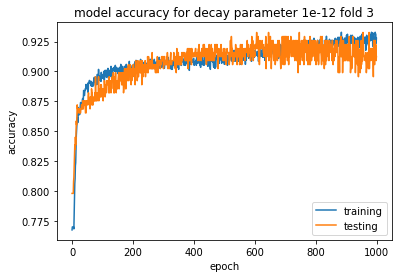

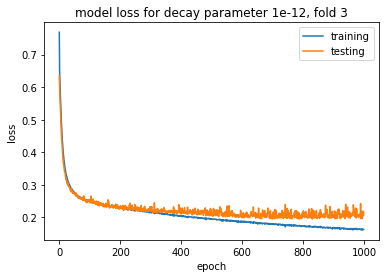

Epoch 1/1000
149/149 - 0s - loss: 0.7518 - accuracy: 0.7506 - val_loss: 0.7113 - val_accuracy: 0.7441
Epoch 2/1000
149/149 - 0s - loss: 0.6199 - accuracy: 0.7834 - val_loss: 0.6782 - val_accuracy: 0.7441
Epoch 3/1000
149/149 - 0s - loss: 0.5841 - accuracy: 0.7834 - val_loss: 0.6456 - val_accuracy: 0.7441
Epoch 4/1000
149/149 - 0s - loss: 0.5547 - accuracy: 0.7834 - val_loss: 0.6202 - val_accuracy: 0.7475
Epoch 5/1000
149/149 - 0s - loss: 0.5313 - accuracy: 0.7859 - val_loss: 0.6036 - val_accuracy: 0.7475
Epoch 6/1000
149/149 - 0s - loss: 0.5079 - accuracy: 0.7867 - val_loss: 0.5804 - val_accuracy: 0.7710
Epoch 7/1000
149/149 - 0s - loss: 0.4885 - accuracy: 0.7867 - val_loss: 0.5648 - val_accuracy: 0.7744
Epoch 8/1000
149/149 - 0s - loss: 0.4700 - accuracy: 0.7985 - val_loss: 0.5522 - val_accuracy: 0.7744
Epoch 9/1000
149/149 - 0s - loss: 0.4528 - accuracy: 0.7993 - val_loss: 0.5345 - val_accuracy: 0.7710
Epoch 10/1000
149/149 - 0s - loss: 0.4385 - accuracy: 0.8119 - val_loss: 0.5260 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2379 - accuracy: 0.9034 - val_loss: 0.3355 - val_accuracy: 0.8316
Epoch 82/1000
149/149 - 0s - loss: 0.2360 - accuracy: 0.9051 - val_loss: 0.3259 - val_accuracy: 0.8316
Epoch 83/1000
149/149 - 0s - loss: 0.2366 - accuracy: 0.9068 - val_loss: 0.3460 - val_accuracy: 0.8451
Epoch 84/1000
149/149 - 0s - loss: 0.2357 - accuracy: 0.9018 - val_loss: 0.3422 - val_accuracy: 0.8384
Epoch 85/1000
149/149 - 0s - loss: 0.2347 - accuracy: 0.9085 - val_loss: 0.3307 - val_accuracy: 0.8316
Epoch 86/1000
149/149 - 0s - loss: 0.2344 - accuracy: 0.9043 - val_loss: 0.3266 - val_accuracy: 0.8316
Epoch 87/1000
149/149 - 0s - loss: 0.2346 - accuracy: 0.9001 - val_loss: 0.3328 - val_accuracy: 0.8350
Epoch 88/1000
149/149 - 0s - loss: 0.2338 - accuracy: 0.9034 - val_loss: 0.3390 - val_accuracy: 0.8350
Epoch 89/1000
149/149 - 0s - loss: 0.2326 - accuracy: 0.9043 - val_loss: 0.3294 - val_accuracy: 0.8316
Epoch 90/1000
149/149 - 0s - loss: 0.2328 - accuracy: 0.9085 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2135 - accuracy: 0.9135 - val_loss: 0.3330 - val_accuracy: 0.8451
Epoch 161/1000
149/149 - 0s - loss: 0.2129 - accuracy: 0.9093 - val_loss: 0.3192 - val_accuracy: 0.8485
Epoch 162/1000
149/149 - 0s - loss: 0.2124 - accuracy: 0.9102 - val_loss: 0.3291 - val_accuracy: 0.8384
Epoch 163/1000
149/149 - 0s - loss: 0.2118 - accuracy: 0.9169 - val_loss: 0.3207 - val_accuracy: 0.8519
Epoch 164/1000
149/149 - 0s - loss: 0.2117 - accuracy: 0.9127 - val_loss: 0.3332 - val_accuracy: 0.8316
Epoch 165/1000
149/149 - 0s - loss: 0.2110 - accuracy: 0.9118 - val_loss: 0.3433 - val_accuracy: 0.8350
Epoch 166/1000
149/149 - 0s - loss: 0.2113 - accuracy: 0.9085 - val_loss: 0.3470 - val_accuracy: 0.8350
Epoch 167/1000
149/149 - 0s - loss: 0.2118 - accuracy: 0.9110 - val_loss: 0.3191 - val_accuracy: 0.8519
Epoch 168/1000
149/149 - 0s - loss: 0.2121 - accuracy: 0.9144 - val_loss: 0.3263 - val_accuracy: 0.8418
Epoch 169/1000
149/149 - 0s - loss: 0.2112 - accuracy: 0.9135 - 

Epoch 239/1000
149/149 - 0s - loss: 0.1986 - accuracy: 0.9244 - val_loss: 0.3289 - val_accuracy: 0.8418
Epoch 240/1000
149/149 - 0s - loss: 0.2010 - accuracy: 0.9160 - val_loss: 0.3372 - val_accuracy: 0.8418
Epoch 241/1000
149/149 - 0s - loss: 0.2010 - accuracy: 0.9135 - val_loss: 0.3265 - val_accuracy: 0.8451
Epoch 242/1000
149/149 - 0s - loss: 0.2000 - accuracy: 0.9152 - val_loss: 0.3505 - val_accuracy: 0.8384
Epoch 243/1000
149/149 - 0s - loss: 0.2007 - accuracy: 0.9118 - val_loss: 0.3350 - val_accuracy: 0.8418
Epoch 244/1000
149/149 - 0s - loss: 0.2005 - accuracy: 0.9169 - val_loss: 0.3484 - val_accuracy: 0.8384
Epoch 245/1000
149/149 - 0s - loss: 0.2010 - accuracy: 0.9194 - val_loss: 0.3363 - val_accuracy: 0.8384
Epoch 246/1000
149/149 - 0s - loss: 0.2007 - accuracy: 0.9160 - val_loss: 0.3377 - val_accuracy: 0.8418
Epoch 247/1000
149/149 - 0s - loss: 0.1990 - accuracy: 0.9169 - val_loss: 0.3356 - val_accuracy: 0.8418
Epoch 248/1000
149/149 - 0s - loss: 0.1997 - accuracy: 0.9160 - 

Epoch 318/1000
149/149 - 0s - loss: 0.1937 - accuracy: 0.9186 - val_loss: 0.3321 - val_accuracy: 0.8451
Epoch 319/1000
149/149 - 0s - loss: 0.1939 - accuracy: 0.9194 - val_loss: 0.3328 - val_accuracy: 0.8418
Epoch 320/1000
149/149 - 0s - loss: 0.1932 - accuracy: 0.9186 - val_loss: 0.3417 - val_accuracy: 0.8485
Epoch 321/1000
149/149 - 0s - loss: 0.1920 - accuracy: 0.9169 - val_loss: 0.3299 - val_accuracy: 0.8519
Epoch 322/1000
149/149 - 0s - loss: 0.1926 - accuracy: 0.9186 - val_loss: 0.3281 - val_accuracy: 0.8519
Epoch 323/1000
149/149 - 0s - loss: 0.1919 - accuracy: 0.9160 - val_loss: 0.3355 - val_accuracy: 0.8451
Epoch 324/1000
149/149 - 0s - loss: 0.1924 - accuracy: 0.9202 - val_loss: 0.3274 - val_accuracy: 0.8519
Epoch 325/1000
149/149 - 0s - loss: 0.1923 - accuracy: 0.9202 - val_loss: 0.3332 - val_accuracy: 0.8451
Epoch 326/1000
149/149 - 0s - loss: 0.1921 - accuracy: 0.9211 - val_loss: 0.3439 - val_accuracy: 0.8418
Epoch 327/1000
149/149 - 0s - loss: 0.1919 - accuracy: 0.9135 - 

Epoch 397/1000
149/149 - 0s - loss: 0.1851 - accuracy: 0.9228 - val_loss: 0.3237 - val_accuracy: 0.8485
Epoch 398/1000
149/149 - 0s - loss: 0.1877 - accuracy: 0.9186 - val_loss: 0.3435 - val_accuracy: 0.8451
Epoch 399/1000
149/149 - 0s - loss: 0.1859 - accuracy: 0.9202 - val_loss: 0.3313 - val_accuracy: 0.8519
Epoch 400/1000
149/149 - 0s - loss: 0.1855 - accuracy: 0.9194 - val_loss: 0.3276 - val_accuracy: 0.8519
Epoch 401/1000
149/149 - 0s - loss: 0.1852 - accuracy: 0.9152 - val_loss: 0.3360 - val_accuracy: 0.8485
Epoch 402/1000
149/149 - 0s - loss: 0.1858 - accuracy: 0.9202 - val_loss: 0.3367 - val_accuracy: 0.8519
Epoch 403/1000
149/149 - 0s - loss: 0.1861 - accuracy: 0.9194 - val_loss: 0.3368 - val_accuracy: 0.8485
Epoch 404/1000
149/149 - 0s - loss: 0.1863 - accuracy: 0.9236 - val_loss: 0.3218 - val_accuracy: 0.8519
Epoch 405/1000
149/149 - 0s - loss: 0.1842 - accuracy: 0.9219 - val_loss: 0.3222 - val_accuracy: 0.8552
Epoch 406/1000
149/149 - 0s - loss: 0.1856 - accuracy: 0.9144 - 

Epoch 476/1000
149/149 - 0s - loss: 0.1806 - accuracy: 0.9186 - val_loss: 0.3314 - val_accuracy: 0.8485
Epoch 477/1000
149/149 - 0s - loss: 0.1780 - accuracy: 0.9211 - val_loss: 0.3318 - val_accuracy: 0.8485
Epoch 478/1000
149/149 - 0s - loss: 0.1807 - accuracy: 0.9186 - val_loss: 0.3260 - val_accuracy: 0.8451
Epoch 479/1000
149/149 - 0s - loss: 0.1786 - accuracy: 0.9261 - val_loss: 0.3393 - val_accuracy: 0.8485
Epoch 480/1000
149/149 - 0s - loss: 0.1794 - accuracy: 0.9211 - val_loss: 0.3280 - val_accuracy: 0.8519
Epoch 481/1000
149/149 - 0s - loss: 0.1803 - accuracy: 0.9211 - val_loss: 0.3242 - val_accuracy: 0.8485
Epoch 482/1000
149/149 - 0s - loss: 0.1762 - accuracy: 0.9194 - val_loss: 0.3500 - val_accuracy: 0.8451
Epoch 483/1000
149/149 - 0s - loss: 0.1793 - accuracy: 0.9169 - val_loss: 0.3353 - val_accuracy: 0.8485
Epoch 484/1000
149/149 - 0s - loss: 0.1795 - accuracy: 0.9261 - val_loss: 0.3233 - val_accuracy: 0.8519
Epoch 485/1000
149/149 - 0s - loss: 0.1789 - accuracy: 0.9253 - 

Epoch 555/1000
149/149 - 0s - loss: 0.1743 - accuracy: 0.9236 - val_loss: 0.3280 - val_accuracy: 0.8485
Epoch 556/1000
149/149 - 0s - loss: 0.1739 - accuracy: 0.9228 - val_loss: 0.3229 - val_accuracy: 0.8519
Epoch 557/1000
149/149 - 0s - loss: 0.1743 - accuracy: 0.9228 - val_loss: 0.3409 - val_accuracy: 0.8485
Epoch 558/1000
149/149 - 0s - loss: 0.1749 - accuracy: 0.9160 - val_loss: 0.3242 - val_accuracy: 0.8418
Epoch 559/1000
149/149 - 0s - loss: 0.1757 - accuracy: 0.9194 - val_loss: 0.3461 - val_accuracy: 0.8485
Epoch 560/1000
149/149 - 0s - loss: 0.1753 - accuracy: 0.9169 - val_loss: 0.3300 - val_accuracy: 0.8485
Epoch 561/1000
149/149 - 0s - loss: 0.1741 - accuracy: 0.9253 - val_loss: 0.3295 - val_accuracy: 0.8485
Epoch 562/1000
149/149 - 0s - loss: 0.1729 - accuracy: 0.9236 - val_loss: 0.3327 - val_accuracy: 0.8485
Epoch 563/1000
149/149 - 0s - loss: 0.1749 - accuracy: 0.9219 - val_loss: 0.3521 - val_accuracy: 0.8451
Epoch 564/1000
149/149 - 0s - loss: 0.1731 - accuracy: 0.9228 - 

Epoch 634/1000
149/149 - 0s - loss: 0.1694 - accuracy: 0.9219 - val_loss: 0.3242 - val_accuracy: 0.8485
Epoch 635/1000
149/149 - 0s - loss: 0.1693 - accuracy: 0.9303 - val_loss: 0.3310 - val_accuracy: 0.8451
Epoch 636/1000
149/149 - 0s - loss: 0.1682 - accuracy: 0.9286 - val_loss: 0.3350 - val_accuracy: 0.8519
Epoch 637/1000
149/149 - 0s - loss: 0.1690 - accuracy: 0.9219 - val_loss: 0.3333 - val_accuracy: 0.8485
Epoch 638/1000
149/149 - 0s - loss: 0.1698 - accuracy: 0.9253 - val_loss: 0.3301 - val_accuracy: 0.8519
Epoch 639/1000
149/149 - 0s - loss: 0.1700 - accuracy: 0.9236 - val_loss: 0.3373 - val_accuracy: 0.8519
Epoch 640/1000
149/149 - 0s - loss: 0.1686 - accuracy: 0.9219 - val_loss: 0.3226 - val_accuracy: 0.8451
Epoch 641/1000
149/149 - 0s - loss: 0.1713 - accuracy: 0.9160 - val_loss: 0.3284 - val_accuracy: 0.8485
Epoch 642/1000
149/149 - 0s - loss: 0.1705 - accuracy: 0.9177 - val_loss: 0.3209 - val_accuracy: 0.8485
Epoch 643/1000
149/149 - 0s - loss: 0.1702 - accuracy: 0.9202 - 

Epoch 713/1000
149/149 - 0s - loss: 0.1661 - accuracy: 0.9194 - val_loss: 0.3342 - val_accuracy: 0.8519
Epoch 714/1000
149/149 - 0s - loss: 0.1640 - accuracy: 0.9228 - val_loss: 0.3198 - val_accuracy: 0.8485
Epoch 715/1000
149/149 - 0s - loss: 0.1656 - accuracy: 0.9253 - val_loss: 0.3161 - val_accuracy: 0.8485
Epoch 716/1000
149/149 - 0s - loss: 0.1639 - accuracy: 0.9286 - val_loss: 0.3254 - val_accuracy: 0.8485
Epoch 717/1000
149/149 - 0s - loss: 0.1658 - accuracy: 0.9236 - val_loss: 0.3346 - val_accuracy: 0.8519
Epoch 718/1000
149/149 - 0s - loss: 0.1644 - accuracy: 0.9244 - val_loss: 0.3256 - val_accuracy: 0.8485
Epoch 719/1000
149/149 - 0s - loss: 0.1618 - accuracy: 0.9295 - val_loss: 0.3470 - val_accuracy: 0.8519
Epoch 720/1000
149/149 - 0s - loss: 0.1645 - accuracy: 0.9219 - val_loss: 0.3207 - val_accuracy: 0.8485
Epoch 721/1000
149/149 - 0s - loss: 0.1647 - accuracy: 0.9244 - val_loss: 0.3145 - val_accuracy: 0.8552
Epoch 722/1000
149/149 - 0s - loss: 0.1647 - accuracy: 0.9228 - 

Epoch 792/1000
149/149 - 0s - loss: 0.1636 - accuracy: 0.9244 - val_loss: 0.3337 - val_accuracy: 0.8519
Epoch 793/1000
149/149 - 0s - loss: 0.1618 - accuracy: 0.9228 - val_loss: 0.3320 - val_accuracy: 0.8552
Epoch 794/1000
149/149 - 0s - loss: 0.1626 - accuracy: 0.9253 - val_loss: 0.3257 - val_accuracy: 0.8519
Epoch 795/1000
149/149 - 0s - loss: 0.1594 - accuracy: 0.9270 - val_loss: 0.3328 - val_accuracy: 0.8519
Epoch 796/1000
149/149 - 0s - loss: 0.1602 - accuracy: 0.9353 - val_loss: 0.3202 - val_accuracy: 0.8586
Epoch 797/1000
149/149 - 0s - loss: 0.1606 - accuracy: 0.9286 - val_loss: 0.3200 - val_accuracy: 0.8519
Epoch 798/1000
149/149 - 0s - loss: 0.1612 - accuracy: 0.9244 - val_loss: 0.3214 - val_accuracy: 0.8519
Epoch 799/1000
149/149 - 0s - loss: 0.1601 - accuracy: 0.9278 - val_loss: 0.3397 - val_accuracy: 0.8485
Epoch 800/1000
149/149 - 0s - loss: 0.1619 - accuracy: 0.9253 - val_loss: 0.3153 - val_accuracy: 0.8519
Epoch 801/1000
149/149 - 0s - loss: 0.1608 - accuracy: 0.9286 - 

Epoch 871/1000
149/149 - 0s - loss: 0.1578 - accuracy: 0.9261 - val_loss: 0.3169 - val_accuracy: 0.8586
Epoch 872/1000
149/149 - 0s - loss: 0.1580 - accuracy: 0.9270 - val_loss: 0.3122 - val_accuracy: 0.8519
Epoch 873/1000
149/149 - 0s - loss: 0.1591 - accuracy: 0.9261 - val_loss: 0.3464 - val_accuracy: 0.8586
Epoch 874/1000
149/149 - 0s - loss: 0.1577 - accuracy: 0.9320 - val_loss: 0.3093 - val_accuracy: 0.8586
Epoch 875/1000
149/149 - 0s - loss: 0.1585 - accuracy: 0.9244 - val_loss: 0.3076 - val_accuracy: 0.8653
Epoch 876/1000
149/149 - 0s - loss: 0.1573 - accuracy: 0.9295 - val_loss: 0.3100 - val_accuracy: 0.8519
Epoch 877/1000
149/149 - 0s - loss: 0.1564 - accuracy: 0.9320 - val_loss: 0.3086 - val_accuracy: 0.8586
Epoch 878/1000
149/149 - 0s - loss: 0.1582 - accuracy: 0.9345 - val_loss: 0.3260 - val_accuracy: 0.8586
Epoch 879/1000
149/149 - 0s - loss: 0.1588 - accuracy: 0.9286 - val_loss: 0.3124 - val_accuracy: 0.8519
Epoch 880/1000
149/149 - 0s - loss: 0.1570 - accuracy: 0.9328 - 

Epoch 950/1000
149/149 - 0s - loss: 0.1550 - accuracy: 0.9303 - val_loss: 0.3585 - val_accuracy: 0.8653
Epoch 951/1000
149/149 - 0s - loss: 0.1577 - accuracy: 0.9244 - val_loss: 0.3137 - val_accuracy: 0.8586
Epoch 952/1000
149/149 - 0s - loss: 0.1570 - accuracy: 0.9295 - val_loss: 0.3230 - val_accuracy: 0.8620
Epoch 953/1000
149/149 - 0s - loss: 0.1558 - accuracy: 0.9303 - val_loss: 0.3250 - val_accuracy: 0.8620
Epoch 954/1000
149/149 - 0s - loss: 0.1537 - accuracy: 0.9320 - val_loss: 0.3329 - val_accuracy: 0.8620
Epoch 955/1000
149/149 - 0s - loss: 0.1542 - accuracy: 0.9328 - val_loss: 0.3562 - val_accuracy: 0.8653
Epoch 956/1000
149/149 - 0s - loss: 0.1552 - accuracy: 0.9278 - val_loss: 0.3483 - val_accuracy: 0.8552
Epoch 957/1000
149/149 - 0s - loss: 0.1573 - accuracy: 0.9270 - val_loss: 0.3215 - val_accuracy: 0.8620
Epoch 958/1000
149/149 - 0s - loss: 0.1566 - accuracy: 0.9261 - val_loss: 0.3082 - val_accuracy: 0.8586
Epoch 959/1000
149/149 - 0s - loss: 0.1566 - accuracy: 0.9320 - 

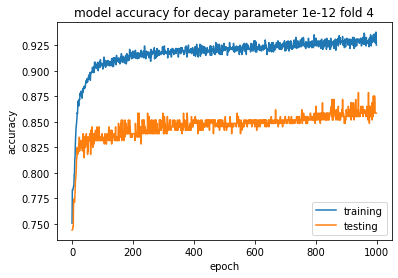

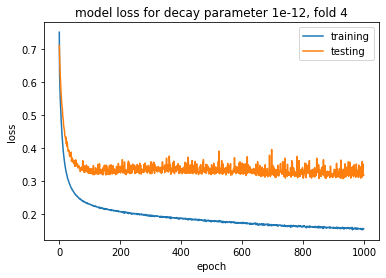

Epoch 1/1000
149/149 - 0s - loss: 0.7444 - accuracy: 0.7565 - val_loss: 0.6261 - val_accuracy: 0.7845
Epoch 2/1000
149/149 - 0s - loss: 0.6216 - accuracy: 0.7733 - val_loss: 0.5901 - val_accuracy: 0.7845
Epoch 3/1000
149/149 - 0s - loss: 0.5923 - accuracy: 0.7733 - val_loss: 0.5689 - val_accuracy: 0.7845
Epoch 4/1000
149/149 - 0s - loss: 0.5695 - accuracy: 0.7733 - val_loss: 0.5511 - val_accuracy: 0.7845
Epoch 5/1000
149/149 - 0s - loss: 0.5496 - accuracy: 0.7733 - val_loss: 0.5306 - val_accuracy: 0.7845
Epoch 6/1000
149/149 - 0s - loss: 0.5296 - accuracy: 0.7750 - val_loss: 0.5164 - val_accuracy: 0.7811
Epoch 7/1000
149/149 - 0s - loss: 0.5124 - accuracy: 0.7792 - val_loss: 0.4976 - val_accuracy: 0.7744
Epoch 8/1000
149/149 - 0s - loss: 0.4951 - accuracy: 0.7867 - val_loss: 0.4817 - val_accuracy: 0.7744
Epoch 9/1000
149/149 - 0s - loss: 0.4793 - accuracy: 0.7968 - val_loss: 0.4670 - val_accuracy: 0.7946
Epoch 10/1000
149/149 - 0s - loss: 0.4641 - accuracy: 0.8060 - val_loss: 0.4507 - 

Epoch 81/1000
149/149 - 0s - loss: 0.2512 - accuracy: 0.8900 - val_loss: 0.2601 - val_accuracy: 0.8990
Epoch 82/1000
149/149 - 0s - loss: 0.2503 - accuracy: 0.8976 - val_loss: 0.2622 - val_accuracy: 0.8889
Epoch 83/1000
149/149 - 0s - loss: 0.2511 - accuracy: 0.8917 - val_loss: 0.2553 - val_accuracy: 0.9024
Epoch 84/1000
149/149 - 0s - loss: 0.2503 - accuracy: 0.8875 - val_loss: 0.2536 - val_accuracy: 0.9125
Epoch 85/1000
149/149 - 0s - loss: 0.2491 - accuracy: 0.8950 - val_loss: 0.2542 - val_accuracy: 0.9024
Epoch 86/1000
149/149 - 0s - loss: 0.2493 - accuracy: 0.8934 - val_loss: 0.2528 - val_accuracy: 0.9091
Epoch 87/1000
149/149 - 0s - loss: 0.2490 - accuracy: 0.8950 - val_loss: 0.2561 - val_accuracy: 0.9024
Epoch 88/1000
149/149 - 0s - loss: 0.2483 - accuracy: 0.8950 - val_loss: 0.2518 - val_accuracy: 0.9057
Epoch 89/1000
149/149 - 0s - loss: 0.2484 - accuracy: 0.8925 - val_loss: 0.2515 - val_accuracy: 0.9091
Epoch 90/1000
149/149 - 0s - loss: 0.2477 - accuracy: 0.8892 - val_loss: 

Epoch 160/1000
149/149 - 0s - loss: 0.2266 - accuracy: 0.9043 - val_loss: 0.2308 - val_accuracy: 0.9125
Epoch 161/1000
149/149 - 0s - loss: 0.2258 - accuracy: 0.9060 - val_loss: 0.2377 - val_accuracy: 0.8889
Epoch 162/1000
149/149 - 0s - loss: 0.2263 - accuracy: 0.9009 - val_loss: 0.2307 - val_accuracy: 0.9057
Epoch 163/1000
149/149 - 0s - loss: 0.2244 - accuracy: 0.9018 - val_loss: 0.2407 - val_accuracy: 0.8923
Epoch 164/1000
149/149 - 0s - loss: 0.2257 - accuracy: 0.8976 - val_loss: 0.2331 - val_accuracy: 0.9057
Epoch 165/1000
149/149 - 0s - loss: 0.2243 - accuracy: 0.9018 - val_loss: 0.2317 - val_accuracy: 0.9024
Epoch 166/1000
149/149 - 0s - loss: 0.2235 - accuracy: 0.9001 - val_loss: 0.2327 - val_accuracy: 0.9158
Epoch 167/1000
149/149 - 0s - loss: 0.2245 - accuracy: 0.9026 - val_loss: 0.2402 - val_accuracy: 0.8923
Epoch 168/1000
149/149 - 0s - loss: 0.2242 - accuracy: 0.9026 - val_loss: 0.2315 - val_accuracy: 0.9057
Epoch 169/1000
149/149 - 0s - loss: 0.2237 - accuracy: 0.9001 - 

Epoch 239/1000
149/149 - 0s - loss: 0.2097 - accuracy: 0.9135 - val_loss: 0.2210 - val_accuracy: 0.9125
Epoch 240/1000
149/149 - 0s - loss: 0.2101 - accuracy: 0.9060 - val_loss: 0.2225 - val_accuracy: 0.9125
Epoch 241/1000
149/149 - 0s - loss: 0.2106 - accuracy: 0.9068 - val_loss: 0.2219 - val_accuracy: 0.9125
Epoch 242/1000
149/149 - 0s - loss: 0.2096 - accuracy: 0.9085 - val_loss: 0.2208 - val_accuracy: 0.9158
Epoch 243/1000
149/149 - 0s - loss: 0.2100 - accuracy: 0.9093 - val_loss: 0.2229 - val_accuracy: 0.9091
Epoch 244/1000
149/149 - 0s - loss: 0.2114 - accuracy: 0.9118 - val_loss: 0.2215 - val_accuracy: 0.9125
Epoch 245/1000
149/149 - 0s - loss: 0.2098 - accuracy: 0.9068 - val_loss: 0.2212 - val_accuracy: 0.9091
Epoch 246/1000
149/149 - 0s - loss: 0.2093 - accuracy: 0.9034 - val_loss: 0.2219 - val_accuracy: 0.9192
Epoch 247/1000
149/149 - 0s - loss: 0.2086 - accuracy: 0.9127 - val_loss: 0.2205 - val_accuracy: 0.9091
Epoch 248/1000
149/149 - 0s - loss: 0.2079 - accuracy: 0.9076 - 

Epoch 318/1000
149/149 - 0s - loss: 0.1991 - accuracy: 0.9102 - val_loss: 0.2203 - val_accuracy: 0.9158
Epoch 319/1000
149/149 - 0s - loss: 0.1986 - accuracy: 0.9093 - val_loss: 0.2189 - val_accuracy: 0.9158
Epoch 320/1000
149/149 - 0s - loss: 0.1994 - accuracy: 0.9169 - val_loss: 0.2187 - val_accuracy: 0.9125
Epoch 321/1000
149/149 - 0s - loss: 0.1978 - accuracy: 0.9127 - val_loss: 0.2220 - val_accuracy: 0.9158
Epoch 322/1000
149/149 - 0s - loss: 0.1969 - accuracy: 0.9102 - val_loss: 0.2258 - val_accuracy: 0.9091
Epoch 323/1000
149/149 - 0s - loss: 0.1972 - accuracy: 0.9127 - val_loss: 0.2169 - val_accuracy: 0.9125
Epoch 324/1000
149/149 - 0s - loss: 0.1976 - accuracy: 0.9135 - val_loss: 0.2183 - val_accuracy: 0.9158
Epoch 325/1000
149/149 - 0s - loss: 0.1968 - accuracy: 0.9127 - val_loss: 0.2171 - val_accuracy: 0.9125
Epoch 326/1000
149/149 - 0s - loss: 0.1965 - accuracy: 0.9144 - val_loss: 0.2179 - val_accuracy: 0.9192
Epoch 327/1000
149/149 - 0s - loss: 0.1974 - accuracy: 0.9144 - 

Epoch 397/1000
149/149 - 0s - loss: 0.1873 - accuracy: 0.9152 - val_loss: 0.2246 - val_accuracy: 0.9192
Epoch 398/1000
149/149 - 0s - loss: 0.1888 - accuracy: 0.9135 - val_loss: 0.2160 - val_accuracy: 0.9125
Epoch 399/1000
149/149 - 0s - loss: 0.1880 - accuracy: 0.9160 - val_loss: 0.2150 - val_accuracy: 0.9158
Epoch 400/1000
149/149 - 0s - loss: 0.1867 - accuracy: 0.9186 - val_loss: 0.2142 - val_accuracy: 0.9125
Epoch 401/1000
149/149 - 0s - loss: 0.1865 - accuracy: 0.9160 - val_loss: 0.2140 - val_accuracy: 0.9091
Epoch 402/1000
149/149 - 0s - loss: 0.1882 - accuracy: 0.9110 - val_loss: 0.2161 - val_accuracy: 0.9158
Epoch 403/1000
149/149 - 0s - loss: 0.1886 - accuracy: 0.9194 - val_loss: 0.2163 - val_accuracy: 0.9125
Epoch 404/1000
149/149 - 0s - loss: 0.1875 - accuracy: 0.9186 - val_loss: 0.2193 - val_accuracy: 0.9192
Epoch 405/1000
149/149 - 0s - loss: 0.1871 - accuracy: 0.9152 - val_loss: 0.2125 - val_accuracy: 0.9125
Epoch 406/1000
149/149 - 0s - loss: 0.1871 - accuracy: 0.9186 - 

Epoch 476/1000
149/149 - 0s - loss: 0.1799 - accuracy: 0.9228 - val_loss: 0.2130 - val_accuracy: 0.9125
Epoch 477/1000
149/149 - 0s - loss: 0.1764 - accuracy: 0.9211 - val_loss: 0.2205 - val_accuracy: 0.9192
Epoch 478/1000
149/149 - 0s - loss: 0.1783 - accuracy: 0.9228 - val_loss: 0.2159 - val_accuracy: 0.9192
Epoch 479/1000
149/149 - 0s - loss: 0.1787 - accuracy: 0.9253 - val_loss: 0.2173 - val_accuracy: 0.9226
Epoch 480/1000
149/149 - 0s - loss: 0.1777 - accuracy: 0.9211 - val_loss: 0.2104 - val_accuracy: 0.9158
Epoch 481/1000
149/149 - 0s - loss: 0.1788 - accuracy: 0.9202 - val_loss: 0.2145 - val_accuracy: 0.9158
Epoch 482/1000
149/149 - 0s - loss: 0.1784 - accuracy: 0.9228 - val_loss: 0.2115 - val_accuracy: 0.9125
Epoch 483/1000
149/149 - 0s - loss: 0.1770 - accuracy: 0.9194 - val_loss: 0.2150 - val_accuracy: 0.9192
Epoch 484/1000
149/149 - 0s - loss: 0.1775 - accuracy: 0.9236 - val_loss: 0.2150 - val_accuracy: 0.9226
Epoch 485/1000
149/149 - 0s - loss: 0.1769 - accuracy: 0.9244 - 

Epoch 555/1000
149/149 - 0s - loss: 0.1722 - accuracy: 0.9278 - val_loss: 0.2138 - val_accuracy: 0.9226
Epoch 556/1000
149/149 - 0s - loss: 0.1707 - accuracy: 0.9261 - val_loss: 0.2108 - val_accuracy: 0.9091
Epoch 557/1000
149/149 - 0s - loss: 0.1712 - accuracy: 0.9286 - val_loss: 0.2123 - val_accuracy: 0.9091
Epoch 558/1000
149/149 - 0s - loss: 0.1711 - accuracy: 0.9244 - val_loss: 0.2197 - val_accuracy: 0.9192
Epoch 559/1000
149/149 - 0s - loss: 0.1725 - accuracy: 0.9261 - val_loss: 0.2177 - val_accuracy: 0.9192
Epoch 560/1000
149/149 - 0s - loss: 0.1713 - accuracy: 0.9219 - val_loss: 0.2151 - val_accuracy: 0.9091
Epoch 561/1000
149/149 - 0s - loss: 0.1711 - accuracy: 0.9228 - val_loss: 0.2121 - val_accuracy: 0.9125
Epoch 562/1000
149/149 - 0s - loss: 0.1698 - accuracy: 0.9244 - val_loss: 0.2159 - val_accuracy: 0.9091
Epoch 563/1000
149/149 - 0s - loss: 0.1676 - accuracy: 0.9253 - val_loss: 0.2182 - val_accuracy: 0.9057
Epoch 564/1000
149/149 - 0s - loss: 0.1707 - accuracy: 0.9253 - 

Epoch 634/1000
149/149 - 0s - loss: 0.1659 - accuracy: 0.9253 - val_loss: 0.2104 - val_accuracy: 0.9057
Epoch 635/1000
149/149 - 0s - loss: 0.1668 - accuracy: 0.9270 - val_loss: 0.2130 - val_accuracy: 0.9091
Epoch 636/1000
149/149 - 0s - loss: 0.1663 - accuracy: 0.9244 - val_loss: 0.2140 - val_accuracy: 0.9125
Epoch 637/1000
149/149 - 0s - loss: 0.1650 - accuracy: 0.9303 - val_loss: 0.2116 - val_accuracy: 0.9091
Epoch 638/1000
149/149 - 0s - loss: 0.1649 - accuracy: 0.9286 - val_loss: 0.2107 - val_accuracy: 0.9091
Epoch 639/1000
149/149 - 0s - loss: 0.1646 - accuracy: 0.9328 - val_loss: 0.2125 - val_accuracy: 0.9125
Epoch 640/1000
149/149 - 0s - loss: 0.1653 - accuracy: 0.9236 - val_loss: 0.2166 - val_accuracy: 0.9158
Epoch 641/1000
149/149 - 0s - loss: 0.1653 - accuracy: 0.9286 - val_loss: 0.2121 - val_accuracy: 0.9125
Epoch 642/1000
149/149 - 0s - loss: 0.1662 - accuracy: 0.9253 - val_loss: 0.2150 - val_accuracy: 0.9226
Epoch 643/1000
149/149 - 0s - loss: 0.1662 - accuracy: 0.9278 - 

Epoch 713/1000
149/149 - 0s - loss: 0.1626 - accuracy: 0.9270 - val_loss: 0.2151 - val_accuracy: 0.9226
Epoch 714/1000
149/149 - 0s - loss: 0.1627 - accuracy: 0.9312 - val_loss: 0.2087 - val_accuracy: 0.9125
Epoch 715/1000
149/149 - 0s - loss: 0.1620 - accuracy: 0.9270 - val_loss: 0.2094 - val_accuracy: 0.9125
Epoch 716/1000
149/149 - 0s - loss: 0.1617 - accuracy: 0.9295 - val_loss: 0.2115 - val_accuracy: 0.9192
Epoch 717/1000
149/149 - 0s - loss: 0.1632 - accuracy: 0.9261 - val_loss: 0.2147 - val_accuracy: 0.9192
Epoch 718/1000
149/149 - 0s - loss: 0.1608 - accuracy: 0.9278 - val_loss: 0.2117 - val_accuracy: 0.9192
Epoch 719/1000
149/149 - 0s - loss: 0.1595 - accuracy: 0.9295 - val_loss: 0.2166 - val_accuracy: 0.9091
Epoch 720/1000
149/149 - 0s - loss: 0.1608 - accuracy: 0.9253 - val_loss: 0.2218 - val_accuracy: 0.9158
Epoch 721/1000
149/149 - 0s - loss: 0.1625 - accuracy: 0.9278 - val_loss: 0.2135 - val_accuracy: 0.9226
Epoch 722/1000
149/149 - 0s - loss: 0.1631 - accuracy: 0.9211 - 

Epoch 792/1000
149/149 - 0s - loss: 0.1601 - accuracy: 0.9286 - val_loss: 0.2154 - val_accuracy: 0.9192
Epoch 793/1000
149/149 - 0s - loss: 0.1607 - accuracy: 0.9295 - val_loss: 0.2155 - val_accuracy: 0.9192
Epoch 794/1000
149/149 - 0s - loss: 0.1571 - accuracy: 0.9303 - val_loss: 0.2120 - val_accuracy: 0.9125
Epoch 795/1000
149/149 - 0s - loss: 0.1581 - accuracy: 0.9244 - val_loss: 0.2159 - val_accuracy: 0.9192
Epoch 796/1000
149/149 - 0s - loss: 0.1591 - accuracy: 0.9303 - val_loss: 0.2091 - val_accuracy: 0.9158
Epoch 797/1000
149/149 - 0s - loss: 0.1573 - accuracy: 0.9286 - val_loss: 0.2093 - val_accuracy: 0.9259
Epoch 798/1000
149/149 - 0s - loss: 0.1576 - accuracy: 0.9278 - val_loss: 0.2104 - val_accuracy: 0.9091
Epoch 799/1000
149/149 - 0s - loss: 0.1577 - accuracy: 0.9295 - val_loss: 0.2101 - val_accuracy: 0.9091
Epoch 800/1000
149/149 - 0s - loss: 0.1579 - accuracy: 0.9295 - val_loss: 0.2178 - val_accuracy: 0.9192
Epoch 801/1000
149/149 - 0s - loss: 0.1574 - accuracy: 0.9312 - 

Epoch 871/1000
149/149 - 0s - loss: 0.1576 - accuracy: 0.9320 - val_loss: 0.2090 - val_accuracy: 0.9091
Epoch 872/1000
149/149 - 0s - loss: 0.1555 - accuracy: 0.9270 - val_loss: 0.2138 - val_accuracy: 0.9226
Epoch 873/1000
149/149 - 0s - loss: 0.1552 - accuracy: 0.9312 - val_loss: 0.2128 - val_accuracy: 0.9057
Epoch 874/1000
149/149 - 0s - loss: 0.1555 - accuracy: 0.9286 - val_loss: 0.2118 - val_accuracy: 0.9226
Epoch 875/1000
149/149 - 0s - loss: 0.1542 - accuracy: 0.9303 - val_loss: 0.2235 - val_accuracy: 0.9125
Epoch 876/1000
149/149 - 0s - loss: 0.1565 - accuracy: 0.9278 - val_loss: 0.2091 - val_accuracy: 0.9158
Epoch 877/1000
149/149 - 0s - loss: 0.1558 - accuracy: 0.9337 - val_loss: 0.2119 - val_accuracy: 0.9226
Epoch 878/1000
149/149 - 0s - loss: 0.1570 - accuracy: 0.9345 - val_loss: 0.2111 - val_accuracy: 0.9091
Epoch 879/1000
149/149 - 0s - loss: 0.1572 - accuracy: 0.9295 - val_loss: 0.2116 - val_accuracy: 0.9158
Epoch 880/1000
149/149 - 0s - loss: 0.1536 - accuracy: 0.9370 - 

Epoch 950/1000
149/149 - 0s - loss: 0.1505 - accuracy: 0.9328 - val_loss: 0.2119 - val_accuracy: 0.9057
Epoch 951/1000
149/149 - 0s - loss: 0.1543 - accuracy: 0.9320 - val_loss: 0.2144 - val_accuracy: 0.9192
Epoch 952/1000
149/149 - 0s - loss: 0.1555 - accuracy: 0.9295 - val_loss: 0.2115 - val_accuracy: 0.9192
Epoch 953/1000
149/149 - 0s - loss: 0.1521 - accuracy: 0.9337 - val_loss: 0.2100 - val_accuracy: 0.9158
Epoch 954/1000
149/149 - 0s - loss: 0.1526 - accuracy: 0.9312 - val_loss: 0.2274 - val_accuracy: 0.9192
Epoch 955/1000
149/149 - 0s - loss: 0.1535 - accuracy: 0.9295 - val_loss: 0.2124 - val_accuracy: 0.9057
Epoch 956/1000
149/149 - 0s - loss: 0.1517 - accuracy: 0.9345 - val_loss: 0.2132 - val_accuracy: 0.9158
Epoch 957/1000
149/149 - 0s - loss: 0.1539 - accuracy: 0.9270 - val_loss: 0.2122 - val_accuracy: 0.9125
Epoch 958/1000
149/149 - 0s - loss: 0.1523 - accuracy: 0.9278 - val_loss: 0.2109 - val_accuracy: 0.9158
Epoch 959/1000
149/149 - 0s - loss: 0.1515 - accuracy: 0.9312 - 

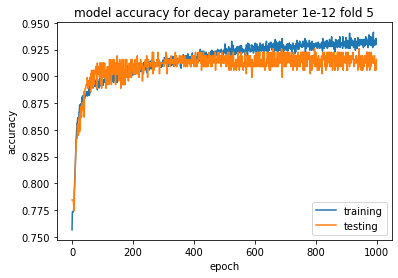

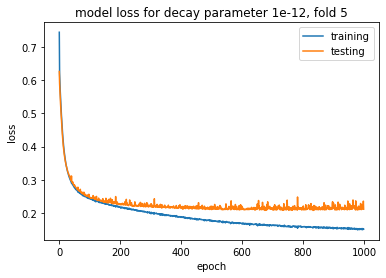

In [8]:
test_acc=[]
train_acc=[]
acc=[]
# range(0, 5)

for i in range(len(d_p)):
    for fold in range(no_folds):
        start, end = fold*nf, (fold+1)*nf
        x_test, y_test = trainX[start:end], trainY[start:end]
        x_train  = np.append(trainX[:start], trainX[end:], axis=0)
        y_train = np.append(trainY[:start], trainY[end:], axis=0) 

        model = keras.Sequential([
            keras.layers.Dense(num_neurons, activation='relu',kernel_regularizer=l2(d_p[i])),
            keras.layers.Dense(NUM_CLASSES, activation='softmax')])

        model.compile(optimizer='sgd', 
                      loss='sparse_categorical_crossentropy',
                      metrics=['accuracy'])

        history = model.fit(x_train, y_train,
                        epochs=epochs,
                        verbose=2,
                        use_multiprocessing=True,
                        batch_size = batch_sizes,
                        validation_data=(x_test, y_test))

        test_acc.append(history.history['val_accuracy'][epochs-1])
        train_acc.append(history.history['accuracy'][epochs-1])

        print('fold %d test accuracy %g decay parameter %d'%(fold+1, test_acc[fold], d_p[i]))
        
        acc.append(history.history['val_accuracy'])
        
    
        plt.plot(history.history['accuracy'], label ="training")
        plt.plot(history.history['val_accuracy'], label = "testing")
        plt.title('model accuracy for decay parameter %s fold %d'%(d_p[i],fold+1))
        plt.ylabel('accuracy')
        plt.xlabel('epoch')
        plt.legend( loc='best')
        plt.savefig("./%s/dp%s_f%d_accuracy.png"%(save_path,d_p[i],fold+1))
        plt.show()

        plt.plot(history.history['loss'], label ="training")
        plt.plot(history.history['val_loss'], label ="testing")
        plt.title('model loss for decay parameter %s, fold %d'%(d_p[i],fold+1))
        plt.ylabel('loss')
        plt.xlabel('epoch')
        plt.legend(loc='best')
        plt.savefig("./%s/dp%s_f%d_loss.png"%(save_path,d_p[i],fold+1))
        plt.show()
    
    

In [10]:
print('* mean accuracy = %g *'% np.mean(test_acc))
print(acc)
print(len(acc))

* mean accuracy = 0.90505 *
[[0.7946127653121948, 0.7946127653121948, 0.7946127653121948, 0.7946127653121948, 0.7946127653121948, 0.7946127653121948, 0.8013467788696289, 0.8013467788696289, 0.81144779920578, 0.808080792427063, 0.8181818127632141, 0.8148148059844971, 0.8181818127632141, 0.8383838534355164, 0.8417508602142334, 0.8451178669929504, 0.8552188277244568, 0.8552188277244568, 0.8552188277244568, 0.8552188277244568, 0.8653198480606079, 0.8619528412818909, 0.875420868396759, 0.872053861618042, 0.868686854839325, 0.868686854839325, 0.8653198480606079, 0.872053861618042, 0.8787878751754761, 0.875420868396759, 0.8787878751754761, 0.8821548819541931, 0.8855218887329102, 0.8821548819541931, 0.8821548819541931, 0.8855218887329102, 0.8855218887329102, 0.8855218887329102, 0.8888888955116272, 0.8855218887329102, 0.8855218887329102, 0.8922559022903442, 0.8922559022903442, 0.8888888955116272, 0.8989899158477783, 0.8956229090690613, 0.8888888955116272, 0.8956229090690613, 0.8989899158477783,

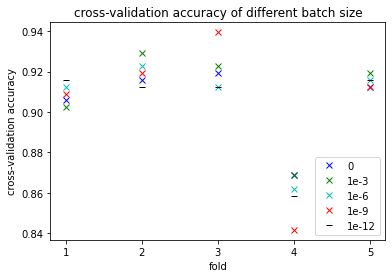

In [11]:
plt.figure(1)
# plt.plot([1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5, 1, 2, 3, 4, 5], acc, marker = 'x', linestyle = 'None')
plt.plot([1, 2, 3, 4, 5], test_acc[:5], label="0", marker = 'x', linestyle = 'None',color="b", )
plt.plot([1, 2, 3, 4, 5], test_acc[5:10], label="1e-3", marker = 'x', linestyle = 'None',color="g")
plt.plot([1, 2, 3, 4, 5], test_acc[10:15], label="1e-6", marker = 'x', linestyle = 'None',color="c")
plt.plot([1, 2, 3, 4, 5], test_acc[15:20], label="1e-9", marker = 'x', linestyle = 'None',color="r")
plt.plot([1, 2, 3, 4, 5], test_acc[20:25], label="1e-12",marker = '_', linestyle = 'None',color="k")
plt.xticks([1, 2, 3, 4, 5])
plt.legend(loc='lower right')
plt.xlabel('fold')
plt.ylabel('cross-validation accuracy')
plt.title("cross-validation accuracy of different batch size")
plt.savefig("./%s/cv_a_VS_fold.png"%(save_path))
plt.show()

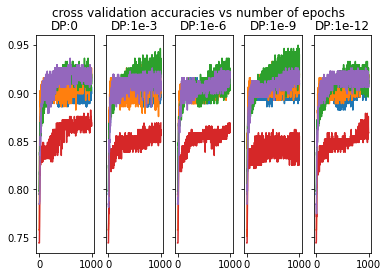

In [12]:
# cross validation accuracies against the number of epochs

fig, axs = plt.subplots(1,5, sharey=True)
fig.suptitle('cross validation accuracies vs number of epochs')
fig.savefig("./%s/cross_vali_against_epochs.png"%(save_path))

axs[0].set_title("DP:0")
axs[0].plot(acc[0])
axs[0].plot(acc[1])
axs[0].plot(acc[2])
axs[0].plot(acc[3])
axs[0].plot(acc[4])

axs[1].set_title("DP:1e-3")
axs[1].plot(acc[5])
axs[1].plot(acc[6])
axs[1].plot(acc[7])
axs[1].plot(acc[8])
axs[1].plot(acc[9])

axs[2].set_title("DP:1e-6")
axs[2].plot(acc[10])
axs[2].plot(acc[11])
axs[2].plot(acc[12])
axs[2].plot(acc[13])
axs[2].plot(acc[14])

axs[3].set_title("DP:1e-9")
axs[3].plot(acc[15])
axs[3].plot(acc[16])
axs[3].plot(acc[17])
axs[3].plot(acc[18])
axs[3].plot(acc[19])

axs[4].set_title("DP:1e-12")
axs[4].plot(acc[20])
axs[4].plot(acc[21])
axs[4].plot(acc[22])
axs[4].plot(acc[23])
axs[4].plot(acc[24])


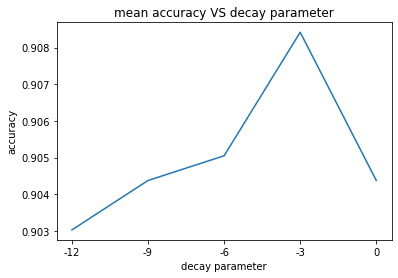

In [28]:
dp0_m_acc=np.mean(test_acc[:5])
dp3_m_acc=np.mean(test_acc[5:10])
dp6_m_acc=np.mean(test_acc[10:15])
dp9_m_acc=np.mean(test_acc[15:20])
dp12_m_acc=np.mean(test_acc[20:25])
mean_acc =[dp0_m_acc,dp3_m_acc,dp6_m_acc,dp9_m_acc,dp12_m_acc]

plt.plot([0, -3, -6, -9, -12 ], mean_acc)
plt.xticks([0, -3, -6, -9, -12 ], [0, -3, -6, -9, -12 ])
plt.xlabel('decay parameter')
plt.ylabel('accuracy')
plt.title('mean accuracy VS decay parameter')
plt.savefig("./%s/mean_cv_accuracy_vs_dp.png"%(save_path))

In [16]:
print(test_acc)

[0.9057239294052124, 0.9158248901367188, 0.9191918969154358, 0.868686854839325, 0.9124578833580017, 0.9023569226264954, 0.9292929172515869, 0.9225589036941528, 0.868686854839325, 0.9191918969154358, 0.9124578833580017, 0.9225589036941528, 0.9124578833580017, 0.8619528412818909, 0.9158248901367188, 0.9090909361839294, 0.9191918969154358, 0.939393937587738, 0.8417508602142334, 0.9124578833580017, 0.9158248901367188, 0.9124578833580017, 0.9124578833580017, 0.8585858345031738, 0.9158248901367188]


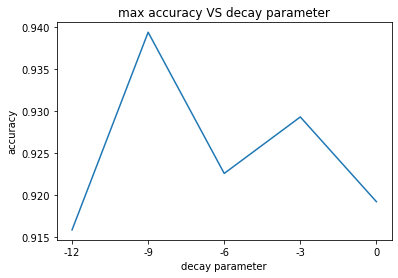

In [29]:
dp0_m_acc=np.max(test_acc[:5])
dp3_m_acc=np.max(test_acc[5:10])
dp6_m_acc=np.max(test_acc[10:15])
dp9_m_acc=np.max(test_acc[15:20])
dp12_m_acc=np.max(test_acc[20:25])
max_acc =[dp0_m_acc,dp3_m_acc,dp6_m_acc,dp9_m_acc,dp12_m_acc]

plt.plot([0, -3, -6, -9, -12 ], max_acc)
plt.xticks([0, -3, -6, -9, -12 ], [0, -3, -6, -9, -12 ])
plt.xlabel('decay parameter')
plt.ylabel('accuracy')
plt.title('max accuracy VS decay parameter')
plt.savefig("./%s/max_cv_accuracy_vs_dp.png"%(save_path))

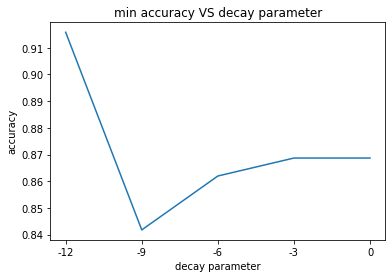

In [30]:
dp0_m_acc=np.min(test_acc[:5])
dp3_m_acc=np.min(test_acc[5:10])
dp6_m_acc=np.min(test_acc[10:15])
dp9_m_acc=np.min(test_acc[15:20])
dp12_m_acc=np.max(test_acc[20:25])
min_acc =[dp0_m_acc,dp3_m_acc,dp6_m_acc,dp9_m_acc,dp12_m_acc]

plt.plot([0, -3, -6, -9, -12 ], min_acc)
plt.xticks([0, -3, -6, -9, -12 ], [0, -3, -6, -9, -12 ])
plt.xlabel('decay parameter')
plt.ylabel('accuracy')
plt.title('min accuracy VS decay parameter')
plt.savefig("./%s/min_cv_accuracy_vs_dp.png"%(save_path))